In [1]:
%pylab inline
import pandas as pd
import sys
import gc
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
DAY=int(os.environ["THE_DAY"])

In [3]:
print "the day", DAY

the day 5


In [4]:
dim=(54, 4100, 1704)
def get_series(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==dim
    return b
def get_series2(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==(4100, 54, 1704)
    return b  
def s_lag(arr,lag=1):
    l,m,n=arr.shape
    assert lag>0 and lag<n
    a=arr[:,:,:-lag]
    b=np.empty(shape=[l,m,lag],dtype=arr.dtype)
    b.fill(np.nan)
    ba=np.concatenate([b,a],axis=2)
    assert ba.shape==arr.shape
    assert ba.dtype==arr.dtype
    return ba    

In [5]:
cat_lag_features={
 "city_0",
  "class_0",
  "cluster_0",
  "family_0",
  "state_0",
  "type_0",

 'city_mv36',
 'class_mv36',
 'cluster_mv36',
 'family_mv36',
 'state_mv36',
 'type_mv36',    
 
 'item_mean_0',
 'store_mean_0',
 }
cat_features={
 'holiday_0',
 #'onpromotion_0',
 'wage_0',
 'd900'
 }
oil_features={'oil_0', 'oil_d1', 'oil_d10', 'oil_d15', 'oil_d3', 'oil_d5'}
sales_ma_features={'sales_ma_112',
 'sales_ma_14',
 'sales_ma_224',
 'sales_ma_28',
 'sales_ma_3',
 'sales_ma_56',
 'sales_ma_7'}
sales_season_ma_features={'sales_week_season_ma_p13',
 'sales_week_season_ma_p2',
 'sales_week_season_ma_p3',
 'sales_week_season_ma_p4',
 'sales_week_season_ma_p7'}

#move x, fix y
def _get_feature(name,lag=0,offset=0):
    if name in cat_lag_features :
        assert lag == 0
        if name in ['item_mean_0','class_mv36','family_mv36','class_0','family_0']:
            s=get_series2(name)
        else:
            s=get_series(name)
        return s_lag(s,offset)
    if name in cat_features or name in oil_features:
        assert offset==0 and lag==0
        s= get_series(name)
        if name =='holiday_0': s[np.isnan(s)]=0
        return s
    if name =="y_0" or name in sales_ma_features or name in sales_season_ma_features:
        #assert  lag == 0
        s=get_series(name)
        if offset==0 and lag==0: return s
        return s_lag(s,lag=offset+lag)
def get_feature(name,lag=0,offset=0):
    s=_get_feature(name=name,lag=lag,offset=offset)
    if s.shape == ( 4100,54, 1704):
        s=np.rollaxis(s,1,0)
    assert s.shape==(54, 4100, 1704), s.shape
    return s
def get_all_features(offset=1):
    assert offset>0
    all_features=[]
    for name in cat_lag_features:
        all_features.append({"name":name,"lag":0,"offset":offset})
    for name in cat_features:
        all_features.append({"name":name,"lag":0,"offset":0})   
#     for name in oil_features:
#         all_features.append({"name":name,"lag":0,"offset":0})  
    for i in range(0,7):
        all_features.append({"name":"y_0","lag":i ,"offset":offset})  
    for name in sales_ma_features:
        all_features.append({"name":name,"lag":0,"offset":offset})  
    for name in sales_season_ma_features:
        all_features.append({"name":name,"lag":(700-offset)%7,"offset":offset})
#     for i in range(1,8):
#         all_features.append({"name":"oil_0","lag":i,"offset":offset})              
    return all_features    
def calc_feature(feat):
    return get_feature(**feat)
def col_name(feat):
    return "{}-lag{}-offset{}".format(feat['name'],feat['lag'],feat['offset'])
def get_train_test(day):
    assert(day>0)
    cols=[]
    train_lst=[]
    
    for feat in get_all_features(day):
        col=col_name(feat)
        print col,
        arr=calc_feature(feat).astype(np.float16)
        train_lst.append(arr)
        cols.append(col)
        gc.collect()
        #break
    return cols,  np.array(train_lst)

In [6]:
def read_data(day):
    print "read data for day", day
    dirname='../input/d'+str(day)+"/"
    y=get_series('y_0')
    cols,train_test=get_train_test(day)
    cols=np.array(cols)    
    train_test=np.rollaxis(train_test,0,4)
    print "loaded", y.shape,train_test.shape 
    return cols,train_test,y.astype(np.float16)

In [7]:
%time cols,train_test,y=read_data(DAY)
rawy=y.copy()
y[np.isnan(y)]=0

read data for day 5


store_mean_0-lag0-offset5

 family_0-lag0-offset5

 city_0-lag0-offset5

 cluster_mv36-lag0-offset5

 cluster_0-lag0-offset5

 city_mv36-lag0-offset5

 item_mean_0-lag0-offset5

 class_0-lag0-offset5

 type_0-lag0-offset5

 type_mv36-lag0-offset5

 state_mv36-lag0-offset5

 class_mv36-lag0-offset5

 state_0-lag0-offset5

 family_mv36-lag0-offset5

 holiday_0-lag0-offset0

 d900-lag0-offset0

 wage_0-lag0-offset0

 y_0-lag0-offset5

 y_0-lag1-offset5

 y_0-lag2-offset5

 y_0-lag3-offset5

 y_0-lag4-offset5

 y_0-lag5-offset5

 y_0-lag6-offset5

 sales_ma_224-lag0-offset5

 sales_ma_14-lag0-offset5

 sales_ma_28-lag0-offset5

 sales_ma_112-lag0-offset5

 sales_ma_7-lag0-offset5

 sales_ma_3-lag0-offset5

 sales_ma_56-lag0-offset5

 sales_week_season_ma_p7-lag2-offset5

 sales_week_season_ma_p4-lag2-offset5

 sales_week_season_ma_p13-lag2-offset5

 sales_week_season_ma_p2-lag2-offset5

 sales_week_season_ma_p3-lag2-offset5

 loaded (54, 4100, 1704) (54, 4100, 1704, 36)


CPU times: user 2min 39s, sys: 27.1 s, total: 3min 6s
Wall time: 3min 6s


In [8]:
print "types", [u.dtype for u in (cols, train_test, y)]
print "shapes", [u.shape for u in (cols, train_test, y)]
print "mem(gb)",np.round(train_test.nbytes/1024.**3,2), np.round(y.nbytes/1024.**3,2)

types [dtype('S37'), dtype('float16'), dtype('float16')]
shapes [(36,), (54, 4100, 1704, 36), (54, 4100, 1704)]
mem(gb) 25.3 0.7


In [9]:
gc.collect()

0

In [10]:
def show_data(store,item,date,filters=None):
    thisy=y[store,item,date-5:date+2]
    a=train_test[store,item,date-5:date+2,:]
    a=np.squeeze(a)
    print a.shape
    columns=cols
    if filters is not None: 
        columns = [u for u in columns if filters(u)]
    df=pd.DataFrame(a,columns=cols,index=range(date-5,date+2))[columns]
    df['target']=thisy
    with pd.option_context('display.max_columns', None):
        display(df)

In [11]:
show_data(0,1000,1688, None)#lambda u: 'y_0' in u)

(7, 36)


store_mean_0-lag0-offset5  family_0-lag0-offset5  city_0-lag0-offset5  \
1683                   1.234375               1.866211             2.031250   
1684                   1.541992               1.696289             1.849609   
1685                   1.560547               1.639648             1.785156   
1686                   1.617188               1.627930             1.789062   
1687                   1.546875               1.627930             1.714844   
1688                   1.312500               1.722656             1.834961   
1689                   1.383789               1.694336             1.823242   

      cluster_mv36-lag0-offset5  cluster_0-lag0-offset5  \
1683                   1.650391                1.664062   
1684                   1.645508                1.623047   
1685                   1.641602                1.563477   
1686                   1.641602                1.624023   
1687                   1.636719                1.526367   
1688                   1.636719                1.576172   
1689                   1.634766                1.574219   

      city_mv36-lag0-offset5  item_mean_0-lag0-offset5  class_0-lag0-offset5  \
1683                1.885742                  2.115234              1.756836   
1684                1.876953                  1.683594              1.583008   
1685                1.872070                  1.707031              1.577148   
1686                1.869141                  1.795898              1.632812   
1687                1.864258                  2.003906              1.706055   
1688                1.866211                  2.191406              1.846680   
1689                1.865234                  2.173828              1.803711   

      type_0-lag0-offset5  type_mv36-lag0-offset5  state_mv36-lag0-offset5  \
1683             1.701172                1.664062                 1.884766   
1684             1.626953                1.658203                 1.875977   
1685             1.561523                1.654297                 1.871094   
1686             1.632812                1.654297                 1.868164   
1687             1.553711                1.650391                 1.863281   
1688             1.637695                1.652344                 1.865234   
1689             1.593750                1.650391                 1.864258   

      class_mv36-lag0-offset5  state_0-lag0-offset5  family_mv36-lag0-offset5  \
1683                 1.676758              2.029297                  1.730469   
1684                 1.670898              1.851562                  1.722656   
1685                 1.669922              1.791016                  1.719727   
1686                 1.669922              1.790039                  1.716797   
1687                 1.671875              1.719727                  1.715820   
1688                 1.678711              1.834961                  1.717773   
1689                 1.679688              1.820312                  1.717773   

      holiday_0-lag0-offset0  d900-lag0-offset0  wage_0-lag0-offset0  \
1683                     1.0                1.0             0.733398   
1684                     0.0                1.0             0.799805   
1685                     0.0                1.0             0.866699   
1686                     0.0                1.0             0.933105   
1687                     0.0                1.0             0.000000   
1688                     0.0                1.0             0.066650   
1689                     0.0                1.0             0.133301   

      y_0-lag0-offset5  y_0-lag1-offset5  y_0-lag2-offset5  y_0-lag3-offset5  \
1683          1.098633          2.080078          2.080078          2.398438   
1684          2.484375          1.098633          2.080078          2.080078   
1685          2.302734          2.484375          1.098633          2.080078   
1686          2.080078          2.302734          2.484375          1.098633   
1687    

In [12]:
def show_data2():
    lst=[]
    days=range(1685,1691)
    for i in range(train_test.shape[-1]):
        lsta=[cols[i]]
        for d in days:
            u=train_test[:,:,d,i]
            lsta.append(np.round(np.isnan(u).mean(),4))
        lst.append(lsta)
            #print '{:>40s} {:.4f} {:.4f} {:.4f} {:.4f}' .format(cols[i],
         #                  np.isnan(u).mean(), np.isnan(v).mean(), np.isnan(w).mean(), np.isnan(ww).mean())
    df=pd.DataFrame(np.array(lst) ,columns=['col']+days)
    return df

In [13]:
show_data2()

col    1685    1686    1687    1688  \
0               store_mean_0-lag0-offset5     0.0     0.0     0.0     0.0   
1                   family_0-lag0-offset5     0.0     0.0  0.0002  0.0002   
2                     city_0-lag0-offset5     0.0     0.0     0.0     0.0   
3               cluster_mv36-lag0-offset5     0.0     0.0     0.0     0.0   
4                  cluster_0-lag0-offset5     0.0     0.0     0.0     0.0   
5                  city_mv36-lag0-offset5     0.0     0.0     0.0     0.0   
6                item_mean_0-lag0-offset5  0.0837  0.0844  0.0849   0.078   
7                    class_0-lag0-offset5  0.0083  0.0085  0.0093  0.0066   
8                     type_0-lag0-offset5     0.0     0.0     0.0     0.0   
9                  type_mv36-lag0-offset5     0.0     0.0     0.0     0.0   
10                state_mv36-lag0-offset5     0.0     0.0     0.0     0.0   
11                class_mv36-lag0-offset5  0.0083  0.0083  0.0083  0.0083   
12                   state_0-lag0-offset5     0.0     0.0     0.0     0.0   
13               family_mv36-lag0-offset5     0.0     0.0     0.0     0.0   
14                 holiday_0-lag0-offset0     0.0     0.0     0.0     0.0   
15                      d900-lag0-offset0     0.0     0.0     0.0     0.0   
16                    wage_0-lag0-offset0     0.0     0.0     0.0     0.0   
17                       y_0-lag0-offset5  0.5431  0.5438  0.5549  0.5276   
18                       y_0-lag1-offset5  0.5308  0.5431  0.5438  0.5549   
19                       y_0-lag2-offset5  0.4994  0.5308  0.5431  0.5438   
20                       y_0-lag3-offset5  0.4992  0.4994  0.5308  0.5431   
21                       y_0-lag4-offset5  0.5295  0.4992  0.4994  0.5308   
22                       y_0-lag5-offset5  0.5382  0.5295  0.4992  0.4994   
23                       y_0-lag6-offset5  0.5149  0.5382  0.5295  0.4992   
24              sales_ma_224-lag0-offset5  0.5025  0.5027  0.5013  0.5006   
25               sales_ma_14-lag0-offset5  0.5084  0.5084   0.508  0.5072   
26               sales_ma_28-lag0-offset5  0.5029  0.5029  0.5026  0.5017   
27              sales_ma_112-lag0-offset5  0.4897  0.4898  0.4897  0.4897   
28                sales_ma_7-lag0-offset5  0.4971  0.5014  0.5043  0.5043   
29                sales_ma_3-lag0-offset5  0.5101  0.5264  0.5347   0.529   
30               sales_ma_56-lag0-offset5  0.4942  0.4944  0.4946  0.4945   
31   sales_week_season_ma_p7-lag2-offset5     0.0     0.0     0.0     0.0   
32   sales_week_season_ma_p4-lag2-offset5     0.0     0.0     0.0     0.0   
33  sales_week_season_ma_p13-lag2-offset5     0.0     0.0     0.0     0.0   
34   sales_week_season_ma_p2-lag2-offset5  0.4994  0.5308  0.5431  0.5438   
35   sales_week_season_ma_p3-lag2-offset5     0.0     0.0     0.0     0.0   

      1689    1690  
0      0.0     0.0  
1   0.0002     0.0  
2      0.0     0.0  
3      0.0     0.0  
4      0.0     0.0  
5      0.0     0.0  
6   0.0827  0.0798  
7   0.0071  0.0068  
8      0.0     0.0  
9      0.0     0.0  
10     0.0     0.0  
11  0.0083  0.0083  
12     0.0     0.0  
13     0.0     0.0  
14     0.0     0.0  
15     0.0     0.0  
16     0.0     0.0  
17  0.5249  0.5208  
18  0.5276  0.5249  
19  0.5549  0.5276  
20  0.5438  0.5549  
21  0.5431  0.5438  
22  0.5308  0.5431  
23  0.4994  0.5308  
24  0.5002  0.4986  
25  0.5092  0.5118  
26  0.5029  0.5039  
27  0.4898  0.4901  
28  0.5092  0.5128  
29  0.5213  0.5104  
30  0.4955  0.4961  
31     0.0     0.0  
32     0.0     0.0  
33     0.0     0.0  
34  0.5549  0.5276  
35     0.0     0.0

# cv

In [14]:
def make_data(train_test,y,low,high):
    y_train=y[:,:,low:high]
    X_train=train_test[:,:,low:high,:]
    #ind=~np.isnan(y_train)
    a,b=X_train.reshape([-1,X_train.shape[-1]]),y_train.reshape(-1)
    print a.shape,b.shape,a.dtype,b.dtype
    return a,b 

In [15]:
if 0:
    X_train,y_train=make_data(train_test,y,100,1628)
    X_valid,y_valid=make_data(train_test,y,1628,1668)
    X_test,y_test=make_data(train_test,y,1668,1688)
else:    
    X_train,y_train=make_data(train_test,y,100,1688)
    X_valid,y_valid=None,None
    X_test,y_test=None,None    

(351583200, 36) (351583200,) float16 float16


In [16]:
from sklearn.model_selection import GridSearchCV,ParameterGrid,ParameterSampler
from sklearn.metrics import  make_scorer
from multiprocessing import Pool

In [17]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer, Dropout,BatchNormalization
from keras import metrics,backend,regularizers, backend as K, losses
import keras
import tensorflow as tf
from keras.engine.topology import Layer
from keras.backend.tensorflow_backend import set_session

Using TensorFlow backend.


In [18]:
print K.floatx()

float32


In [19]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.intra_op_parallelism_threads=8
config.inter_op_parallelism_threads=8
set_session(tf.Session(config=config))

In [20]:
input_dim=train_test.shape[-1]
input_dim

36

In [21]:
class TransformNALayer(Layer):

    def __init__(self,   **kwargs):
        super(TransformNALayer, self).__init__(**kwargs)
        self.supports_masking = True
    def build(self, input_shape):
        super(TransformNALayer, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x,training=None):
        def make_na(x):
            ind=tf.is_nan(x)
            filled_x=tf.where(ind, tf.zeros_like(x,dtype=np.float32), x)
            ind=tf.cast(ind,tf.float32)
            filled_x=tf.cast(filled_x,tf.float32)
            return  tf.cast(tf.concat([filled_x,ind],axis=1),tf.float32)
        def add_dropout(x):
            def f(x):
                ind=tf.random_uniform([1,36])<tf.random_uniform([1])[0]/tf.constant(5.0)
                ind2=tf.cast(ind,tf.float32)*tf.ones_like(x)
                newx=tf.where(ind2>0,tf.constant(np.nan,dtype=tf.float32)*tf.ones_like(x), x)
                return newx
            return tf.cond(tf.random_uniform([1])[0]>tf.constant(0.5),lambda: f(x),lambda : x)
        return K.in_train_phase(make_na(add_dropout(x)),make_na(x),training=training)
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1]*2)        

In [22]:
def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [23]:
def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.5
   epochs_drop = 1.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   print "set learning rate to",lrate
   return lrate
lrate = keras.callbacks.LearningRateScheduler(step_decay)

In [24]:
#plt.plot([step_decay(u) for u in range(5)])

In [25]:
class KerasModel:
    def __init__(self,params={}):
        self.params=params
        self.model=None
    def _make_model(self):
        params=self.params
        model = Sequential()
        model.add(InputLayer(input_shape=params['input_dim']))
        model.add(TransformNALayer())
        for sz in params["hidden_layer_sizes"]:
            if params['batch_normalization']:
                model.add(BatchNormalization())
            model.add(Dense(sz,kernel_regularizer=regularizers.l2(params['l2'])))
            model.add(Dropout(params['dropout_rate']))            
            model.add(Activation(params['activation']))
        if params['loss'] == 'mean_squared_error':
            model.add(Dense(1,activation=None))
            this_loss="mean_squared_error"
            if params['metric']=="mean_squared_error":
                this_metrics=['mean_squared_error']
            else:
                raise Exception("unknown")
        else:
            raise Exception("unknown")
        model.compile(optimizer=params['optimizer'],
          loss=this_loss,
                      metrics=None)
          #metrics=this_metrics)

        self.model=model
        return self
    def fit(self,X,y,valid_X=None,valid_y=None):
        params=self.params
        validation_split=params['validation_split']
        patience=params['patience']
        if self.model is None:
            self._make_model()
        metric_name=self.model.metrics_names[-1]
        #print "earlystopping on "+metric_name
        #self.name='day'+str(DAY)+'_adam.{epoch:02d}-{val_loss:.3f}.h5'
        self.name='day'+str(DAY)+'_adam_w0_wop.h5'
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience)
        checkpoint = keras.callbacks.ModelCheckpoint(self.name, monitor='val_loss', 
                                                     verbose=1, 
                                                     save_best_only=True, 
                                                     save_weights_only=False, 
                                                     mode='auto', period=1)        
        batch_size=params['batch_size']

        validation_data=None
        if valid_X is not None:
            validation_split=None
            validation_data=(X_valid,y_valid)
        self.hist=self.model.fit(X, y, batch_size=batch_size,epochs=200, 
                       validation_split=validation_split, 
                       validation_data=validation_data,
                       callbacks=[early_stopping,checkpoint],verbose=1)
        return self
    def load_best(self):
        return keras.models.load_model(self.name,
                                       custom_objects={'TransformNALayer':TransformNALayer})
    

In [26]:
param_grid={'input_dim':[(input_dim,)],
            'batch_size':[1024],
            'hidden_layer_sizes': [(256,256),()],
            'metric':['mean_squared_error' ],
            'loss':['mean_squared_error'],
            "validation_split":[0.1],"patience":[3],
            "dropout_rate":[0.0],
            "activation":['relu'],    
            "l2":[1e-6,0],
            "epsilon":[0.1],
            'batch_normalization': [False],
            "optimizer":['adam','adam','adagrad']
           }
parameters=list(ParameterGrid(param_grid))
len(parameters)

12

In [27]:
parameter=parameters[0]
parameter

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [28]:
def run_once(parameter):
    backend.clear_session()
    set_session(tf.Session(config=config))
    a=KerasModel(parameter)
    a._make_model()
    h=a.fit(X,y)
    return [parameter,h.history]

In [29]:
if 0:
    backend.clear_session()
    set_session(tf.Session(config=config))    
    a=KerasModel(parameter)
    a._make_model()
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    for l in a.model.layers:
        print l, l.input_shape 
    display(SVG(model_to_dot(a.model).create(prog='dot', format='svg')))
   

In [30]:
backend.clear_session()
set_session(tf.Session(config=config))   
a=KerasModel(parameter)
a._make_model()
a.params

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [31]:
a.fit(X_train,y_train,X_valid,y_valid)

Train on 316424880 samples, validate on 35158320 samples


Epoch 1/200


     1024/316424880 [..............................] - ETA: 2465:04:50 - loss: 2.9643

     8192/316424880 [..............................] - ETA: 308:40:18 - loss: 1.0075 

    16384/316424880 [..............................] - ETA: 154:37:11 - loss: 0.7146

    24576/316424880 [..............................] - ETA: 103:16:40 - loss: 0.5788

    32768/316424880 [..............................] - ETA: 77:35:52 - loss: 0.5058 

    40960/316424880 [..............................] - ETA: 62:11:40 - loss: 0.4668

    49152/316424880 [..............................] - ETA: 51:55:27 - loss: 0.4309

    57344/316424880 [..............................] - ETA: 44:35:17 - loss: 0.4065

    65536/316424880 [..............................] - ETA: 39:05:01 - loss: 0.3857

    73728/316424880 [..............................] - ETA: 34:48:09 - loss: 0.3742

    81920/316424880 [..............................] - ETA: 31:22:49 - loss: 0.3639

    90112/316424880 [..............................] - ETA: 28:34:43 - loss: 0.3527

    98304/316424880 [..............................] - ETA: 26:14:36 - loss: 0.3438

   106496/316424880 [..............................] - ETA: 24:16:10 - loss: 0.3366

   114688/316424880 [..............................] - ETA: 22:34:33 - loss: 0.3319

   122880/316424880 [..............................] - ETA: 21:06:32 - loss: 0.3279

   131072/316424880 [..............................] - ETA: 19:49:29 - loss: 0.3227

   139264/316424880 [..............................] - ETA: 18:41:31 - loss: 0.3191

   147456/316424880 [..............................] - ETA: 17:41:06 - loss: 0.3151

   155648/316424880 [..............................] - ETA: 16:47:04 - loss: 0.3121

   163840/316424880 [..............................] - ETA: 15:58:24 - loss: 0.3093

   172032/316424880 [..............................] - ETA: 15:14:20 - loss: 0.3059

   180224/316424880 [..............................] - ETA: 14:34:18 - loss: 0.3040

   188416/316424880 [..............................] - ETA: 13:57:43 - loss: 0.3019

   196608/316424880 [..............................] - ETA: 13:24:12 - loss: 0.2996

   204800/316424880 [..............................] - ETA: 12:53:21 - loss: 0.2967

   212992/316424880 [..............................] - ETA: 12:24:53 - loss: 0.2948

   221184/316424880 [..............................] - ETA: 11:58:34 - loss: 0.2934

   229376/316424880 [..............................] - ETA: 11:34:06 - loss: 0.2922

   237568/316424880 [..............................] - ETA: 11:11:24 - loss: 0.2910

   245760/316424880 [..............................] - ETA: 10:50:10 - loss: 0.2892

   253952/316424880 [..............................] - ETA: 10:30:17 - loss: 0.2885

   262144/316424880 [..............................] - ETA: 10:11:40 - loss: 0.2875

   270336/316424880 [..............................] - ETA: 9:54:07 - loss: 0.2868 

   278528/316424880 [..............................] - ETA: 9:37:39 - loss: 0.2858

   286720/316424880 [..............................] - ETA: 9:22:04 - loss: 0.2848

   294912/316424880 [..............................] - ETA: 9:07:25 - loss: 0.2839

   303104/316424880 [..............................] - ETA: 8:53:32 - loss: 0.2828

   311296/316424880 [..............................] - ETA: 8:40:25 - loss: 0.2822

   319488/316424880 [..............................] - ETA: 8:27:55 - loss: 0.2817

   327680/316424880 [..............................] - ETA: 8:16:02 - loss: 0.2810

   335872/316424880 [..............................] - ETA: 8:04:45 - loss: 0.2804

   344064/316424880 [..............................] - ETA: 7:54:00 - loss: 0.2798

   352256/316424880 [..............................] - ETA: 7:43:46 - loss: 0.2794

   360448/316424880 [..............................] - ETA: 7:34:01 - loss: 0.2788

   368640/316424880 [..............................] - ETA: 7:24:42 - loss: 0.2780

   376832/316424880 [..............................] - ETA: 7:15:45 - loss: 0.2774

   385024/316424880 [..............................] - ETA: 7:07:12 - loss: 0.2768

   393216/316424880 [..............................] - ETA: 6:59:00 - loss: 0.2764

   400384/316424880 [..............................] - ETA: 6:52:09 - loss: 0.2761

   408576/316424880 [..............................] - ETA: 6:44:35 - loss: 0.2757

   416768/316424880 [..............................] - ETA: 6:37:19 - loss: 0.2750

   424960/316424880 [..............................] - ETA: 6:30:18 - loss: 0.2745

   433152/316424880 [..............................] - ETA: 6:23:35 - loss: 0.2739

   441344/316424880 [..............................] - ETA: 6:17:05 - loss: 0.2735

   449536/316424880 [..............................] - ETA: 6:10:50 - loss: 0.2729

   457728/316424880 [..............................] - ETA: 6:04:49 - loss: 0.2726

   465920/316424880 [..............................] - ETA: 5:58:59 - loss: 0.2722

   474112/316424880 [..............................] - ETA: 5:53:21 - loss: 0.2721

   482304/316424880 [..............................] - ETA: 5:47:57 - loss: 0.2718

   490496/316424880 [..............................] - ETA: 5:42:41 - loss: 0.2718

   498688/316424880 [..............................] - ETA: 5:37:34 - loss: 0.2717

   506880/316424880 [..............................] - ETA: 5:32:38 - loss: 0.2711

   515072/316424880 [..............................] - ETA: 5:27:53 - loss: 0.2707

   523264/316424880 [..............................] - ETA: 5:23:16 - loss: 0.2703

   531456/316424880 [..............................] - ETA: 5:18:49 - loss: 0.2700

   539648/316424880 [..............................] - ETA: 5:14:30 - loss: 0.2697

   547840/316424880 [..............................] - ETA: 5:10:19 - loss: 0.2693

   556032/316424880 [..............................] - ETA: 5:06:15 - loss: 0.2691

   564224/316424880 [..............................] - ETA: 5:02:19 - loss: 0.2687

   572416/316424880 [..............................] - ETA: 4:58:28 - loss: 0.2685

   580608/316424880 [..............................] - ETA: 4:54:44 - loss: 0.2681

   588800/316424880 [..............................] - ETA: 4:51:07 - loss: 0.2678

   596992/316424880 [..............................] - ETA: 4:47:34 - loss: 0.2676

   605184/316424880 [..............................] - ETA: 4:44:08 - loss: 0.2673

   613376/316424880 [..............................] - ETA: 4:40:49 - loss: 0.2671

   621568/316424880 [..............................] - ETA: 4:37:33 - loss: 0.2670

   629760/316424880 [..............................] - ETA: 4:34:23 - loss: 0.2666

   637952/316424880 [..............................] - ETA: 4:31:19 - loss: 0.2663

   646144/316424880 [..............................] - ETA: 4:28:18 - loss: 0.2661

   654336/316424880 [..............................] - ETA: 4:25:22 - loss: 0.2661

   662528/316424880 [..............................] - ETA: 4:22:29 - loss: 0.2657

   670720/316424880 [..............................] - ETA: 4:19:42 - loss: 0.2654

   678912/316424880 [..............................] - ETA: 4:16:59 - loss: 0.2653

   687104/316424880 [..............................] - ETA: 4:14:19 - loss: 0.2650

   695296/316424880 [..............................] - ETA: 4:11:44 - loss: 0.2650

   703488/316424880 [..............................] - ETA: 4:09:12 - loss: 0.2648

   711680/316424880 [..............................] - ETA: 4:06:44 - loss: 0.2645

   719872/316424880 [..............................] - ETA: 4:04:19 - loss: 0.2643

   728064/316424880 [..............................] - ETA: 4:01:56 - loss: 0.2640

   736256/316424880 [..............................] - ETA: 3:59:38 - loss: 0.2639

   744448/316424880 [..............................] - ETA: 3:57:24 - loss: 0.2638

   752640/316424880 [..............................] - ETA: 3:55:11 - loss: 0.2636

   760832/316424880 [..............................] - ETA: 3:53:02 - loss: 0.2638

   769024/316424880 [..............................] - ETA: 3:50:55 - loss: 0.2635

   777216/316424880 [..............................] - ETA: 3:48:49 - loss: 0.2633

   785408/316424880 [..............................] - ETA: 3:46:48 - loss: 0.2631

   793600/316424880 [..............................] - ETA: 3:44:49 - loss: 0.2628

   801792/316424880 [..............................] - ETA: 3:42:52 - loss: 0.2628

   809984/316424880 [..............................] - ETA: 3:40:58 - loss: 0.2627

   818176/316424880 [..............................] - ETA: 3:39:06 - loss: 0.2624

   826368/316424880 [..............................] - ETA: 3:37:17 - loss: 0.2623

   834560/316424880 [..............................] - ETA: 3:35:30 - loss: 0.2620

   842752/316424880 [..............................] - ETA: 3:33:44 - loss: 0.2618

   850944/316424880 [..............................] - ETA: 3:32:00 - loss: 0.2618

   859136/316424880 [..............................] - ETA: 3:30:18 - loss: 0.2618

   867328/316424880 [..............................] - ETA: 3:28:39 - loss: 0.2618

   875520/316424880 [..............................] - ETA: 3:27:01 - loss: 0.2617

   883712/316424880 [..............................] - ETA: 3:25:26 - loss: 0.2616

   891904/316424880 [..............................] - ETA: 3:23:52 - loss: 0.2615

   899072/316424880 [..............................] - ETA: 3:22:32 - loss: 0.2612

   907264/316424880 [..............................] - ETA: 3:21:01 - loss: 0.2610

   915456/316424880 [..............................] - ETA: 3:19:32 - loss: 0.2609

   923648/316424880 [..............................] - ETA: 3:18:04 - loss: 0.2611

   931840/316424880 [..............................] - ETA: 3:16:36 - loss: 0.2609

   940032/316424880 [..............................] - ETA: 3:15:11 - loss: 0.2607

   948224/316424880 [..............................] - ETA: 3:13:47 - loss: 0.2606

   956416/316424880 [..............................] - ETA: 3:12:25 - loss: 0.2606

   964608/316424880 [..............................] - ETA: 3:11:03 - loss: 0.2605

   972800/316424880 [..............................] - ETA: 3:09:44 - loss: 0.2604

   980992/316424880 [..............................] - ETA: 3:08:26 - loss: 0.2602

   988160/316424880 [..............................] - ETA: 3:07:20 - loss: 0.2600

   996352/316424880 [..............................] - ETA: 3:06:05 - loss: 0.2599

  1004544/316424880 [..............................] - ETA: 3:04:50 - loss: 0.2598

  1012736/316424880 [..............................] - ETA: 3:03:37 - loss: 0.2598

  1020928/316424880 [..............................] - ETA: 3:02:25 - loss: 0.2597

  1029120/316424880 [..............................] - ETA: 3:01:14 - loss: 0.2595

  1037312/316424880 [..............................] - ETA: 3:00:04 - loss: 0.2594

  1045504/316424880 [..............................] - ETA: 2:58:55 - loss: 0.2593

  1053696/316424880 [..............................] - ETA: 2:57:47 - loss: 0.2592

  1061888/316424880 [..............................] - ETA: 2:56:41 - loss: 0.2592

  1070080/316424880 [..............................] - ETA: 2:55:35 - loss: 0.2591

  1078272/316424880 [..............................] - ETA: 2:54:30 - loss: 0.2589

  1086464/316424880 [..............................] - ETA: 2:53:26 - loss: 0.2589

  1094656/316424880 [..............................] - ETA: 2:52:24 - loss: 0.2588

  1102848/316424880 [..............................] - ETA: 2:51:22 - loss: 0.2587

  1111040/316424880 [..............................] - ETA: 2:50:20 - loss: 0.2586

  1119232/316424880 [..............................] - ETA: 2:49:20 - loss: 0.2585

  1127424/316424880 [..............................] - ETA: 2:48:21 - loss: 0.2584

  1135616/316424880 [..............................] - ETA: 2:47:22 - loss: 0.2586

  1143808/316424880 [..............................] - ETA: 2:46:25 - loss: 0.2586

  1152000/316424880 [..............................] - ETA: 2:45:28 - loss: 0.2584

  1160192/316424880 [..............................] - ETA: 2:44:33 - loss: 0.2584

  1168384/316424880 [..............................] - ETA: 2:43:38 - loss: 0.2583

  1176576/316424880 [..............................] - ETA: 2:42:44 - loss: 0.2582

  1184768/316424880 [..............................] - ETA: 2:41:51 - loss: 0.2583

  1192960/316424880 [..............................] - ETA: 2:40:58 - loss: 0.2582

  1201152/316424880 [..............................] - ETA: 2:40:05 - loss: 0.2582

  1209344/316424880 [..............................] - ETA: 2:39:14 - loss: 0.2582

  1217536/316424880 [..............................] - ETA: 2:38:23 - loss: 0.2580

  1224704/316424880 [..............................] - ETA: 2:37:40 - loss: 0.2578

  1232896/316424880 [..............................] - ETA: 2:36:51 - loss: 0.2578

  1241088/316424880 [..............................] - ETA: 2:36:02 - loss: 0.2577

  1249280/316424880 [..............................] - ETA: 2:35:13 - loss: 0.2578

  1257472/316424880 [..............................] - ETA: 2:34:25 - loss: 0.2578

  1265664/316424880 [..............................] - ETA: 2:33:38 - loss: 0.2577

  1273856/316424880 [..............................] - ETA: 2:32:52 - loss: 0.2576

  1282048/316424880 [..............................] - ETA: 2:32:06 - loss: 0.2575

  1290240/316424880 [..............................] - ETA: 2:31:21 - loss: 0.2574

  1298432/316424880 [..............................] - ETA: 2:30:36 - loss: 0.2572

  1306624/316424880 [..............................] - ETA: 2:29:52 - loss: 0.2571

  1314816/316424880 [..............................] - ETA: 2:29:09 - loss: 0.2570

  1321984/316424880 [..............................] - ETA: 2:28:32 - loss: 0.2570

  1330176/316424880 [..............................] - ETA: 2:27:49 - loss: 0.2569

  1337344/316424880 [..............................] - ETA: 2:27:14 - loss: 0.2567

  1345536/316424880 [..............................] - ETA: 2:26:32 - loss: 0.2567

  1353728/316424880 [..............................] - ETA: 2:25:51 - loss: 0.2566

  1361920/316424880 [..............................] - ETA: 2:25:12 - loss: 0.2566

  1370112/316424880 [..............................] - ETA: 2:24:32 - loss: 0.2566

  1378304/316424880 [..............................] - ETA: 2:23:52 - loss: 0.2564

  1386496/316424880 [..............................] - ETA: 2:23:13 - loss: 0.2565

  1394688/316424880 [..............................] - ETA: 2:22:35 - loss: 0.2563

  1402880/316424880 [..............................] - ETA: 2:21:56 - loss: 0.2562

  1411072/316424880 [..............................] - ETA: 2:21:19 - loss: 0.2561

  1419264/316424880 [..............................] - ETA: 2:20:42 - loss: 0.2560

  1427456/316424880 [..............................] - ETA: 2:20:05 - loss: 0.2559

  1435648/316424880 [..............................] - ETA: 2:19:28 - loss: 0.2558

  1443840/316424880 [..............................] - ETA: 2:18:52 - loss: 0.2557

  1452032/316424880 [..............................] - ETA: 2:18:17 - loss: 0.2556

  1460224/316424880 [..............................] - ETA: 2:17:42 - loss: 0.2556

  1468416/316424880 [..............................] - ETA: 2:17:07 - loss: 0.2555

  1476608/316424880 [..............................] - ETA: 2:16:33 - loss: 0.2555

  1484800/316424880 [..............................] - ETA: 2:15:59 - loss: 0.2555

  1492992/316424880 [..............................] - ETA: 2:15:25 - loss: 0.2555

  1501184/316424880 [..............................] - ETA: 2:14:52 - loss: 0.2554

  1509376/316424880 [..............................] - ETA: 2:14:19 - loss: 0.2553

  1517568/316424880 [..............................] - ETA: 2:13:47 - loss: 0.2553

  1524736/316424880 [..............................] - ETA: 2:13:19 - loss: 0.2552

  1532928/316424880 [..............................] - ETA: 2:12:47 - loss: 0.2551

  1541120/316424880 [..............................] - ETA: 2:12:16 - loss: 0.2550

  1549312/316424880 [..............................] - ETA: 2:11:44 - loss: 0.2550

  1557504/316424880 [..............................] - ETA: 2:11:13 - loss: 0.2550

  1565696/316424880 [..............................] - ETA: 2:10:42 - loss: 0.2550

  1573888/316424880 [..............................] - ETA: 2:10:12 - loss: 0.2549

  1582080/316424880 [..............................] - ETA: 2:09:42 - loss: 0.2549

  1589248/316424880 [..............................] - ETA: 2:09:17 - loss: 0.2548

  1597440/316424880 [..............................] - ETA: 2:08:48 - loss: 0.2548

  1605632/316424880 [..............................] - ETA: 2:08:19 - loss: 0.2547

  1613824/316424880 [..............................] - ETA: 2:07:50 - loss: 0.2547

  1622016/316424880 [..............................] - ETA: 2:07:22 - loss: 0.2546

  1630208/316424880 [..............................] - ETA: 2:06:54 - loss: 0.2546

  1638400/316424880 [..............................] - ETA: 2:06:26 - loss: 0.2546

  1646592/316424880 [..............................] - ETA: 2:05:58 - loss: 0.2545

  1654784/316424880 [..............................] - ETA: 2:05:31 - loss: 0.2545

  1662976/316424880 [..............................] - ETA: 2:05:04 - loss: 0.2545

  1671168/316424880 [..............................] - ETA: 2:04:37 - loss: 0.2544

  1679360/316424880 [..............................] - ETA: 2:04:10 - loss: 0.2543

  1687552/316424880 [..............................] - ETA: 2:03:44 - loss: 0.2543

  1695744/316424880 [..............................] - ETA: 2:03:18 - loss: 0.2541

  1703936/316424880 [..............................] - ETA: 2:02:52 - loss: 0.2541

  1712128/316424880 [..............................] - ETA: 2:02:27 - loss: 0.2541

  1720320/316424880 [..............................] - ETA: 2:02:01 - loss: 0.2540

  1728512/316424880 [..............................] - ETA: 2:01:36 - loss: 0.2539

  1736704/316424880 [..............................] - ETA: 2:01:11 - loss: 0.2538

  1744896/316424880 [..............................] - ETA: 2:00:47 - loss: 0.2537

  1753088/316424880 [..............................] - ETA: 2:00:23 - loss: 0.2536

  1761280/316424880 [..............................] - ETA: 1:59:59 - loss: 0.2536

  1769472/316424880 [..............................] - ETA: 1:59:35 - loss: 0.2535

  1777664/316424880 [..............................] - ETA: 1:59:11 - loss: 0.2536

  1785856/316424880 [..............................] - ETA: 1:58:47 - loss: 0.2535

  1794048/316424880 [..............................] - ETA: 1:58:24 - loss: 0.2535

  1802240/316424880 [..............................] - ETA: 1:58:01 - loss: 0.2535

  1810432/316424880 [..............................] - ETA: 1:57:38 - loss: 0.2535

  1818624/316424880 [..............................] - ETA: 1:57:15 - loss: 0.2534

  1826816/316424880 [..............................] - ETA: 1:56:52 - loss: 0.2533

  1835008/316424880 [..............................] - ETA: 1:56:30 - loss: 0.2534

  1843200/316424880 [..............................] - ETA: 1:56:08 - loss: 0.2533

  1851392/316424880 [..............................] - ETA: 1:55:46 - loss: 0.2532

  1859584/316424880 [..............................] - ETA: 1:55:24 - loss: 0.2532

  1867776/316424880 [..............................] - ETA: 1:55:03 - loss: 0.2532

  1875968/316424880 [..............................] - ETA: 1:54:42 - loss: 0.2531

  1884160/316424880 [..............................] - ETA: 1:54:20 - loss: 0.2531

  1892352/316424880 [..............................] - ETA: 1:53:59 - loss: 0.2531

  1900544/316424880 [..............................] - ETA: 1:53:39 - loss: 0.2531

  1908736/316424880 [..............................] - ETA: 1:53:19 - loss: 0.2531

  1916928/316424880 [..............................] - ETA: 1:52:58 - loss: 0.2530

  1925120/316424880 [..............................] - ETA: 1:52:38 - loss: 0.2530

  1933312/316424880 [..............................] - ETA: 1:52:18 - loss: 0.2529

  1941504/316424880 [..............................] - ETA: 1:51:58 - loss: 0.2528

  1949696/316424880 [..............................] - ETA: 1:51:38 - loss: 0.2528

  1957888/316424880 [..............................] - ETA: 1:51:19 - loss: 0.2527

  1966080/316424880 [..............................] - ETA: 1:51:00 - loss: 0.2527

  1974272/316424880 [..............................] - ETA: 1:50:40 - loss: 0.2527

  1981440/316424880 [..............................] - ETA: 1:50:24 - loss: 0.2526

  1989632/316424880 [..............................] - ETA: 1:50:05 - loss: 0.2526

  1997824/316424880 [..............................] - ETA: 1:49:46 - loss: 0.2525

  2006016/316424880 [..............................] - ETA: 1:49:28 - loss: 0.2525

  2014208/316424880 [..............................] - ETA: 1:49:10 - loss: 0.2525

  2022400/316424880 [..............................] - ETA: 1:48:52 - loss: 0.2524

  2030592/316424880 [..............................] - ETA: 1:48:33 - loss: 0.2523

  2038784/316424880 [..............................] - ETA: 1:48:15 - loss: 0.2522

  2046976/316424880 [..............................] - ETA: 1:47:57 - loss: 0.2522

  2055168/316424880 [..............................] - ETA: 1:47:40 - loss: 0.2522

  2063360/316424880 [..............................] - ETA: 1:47:22 - loss: 0.2522

  2071552/316424880 [..............................] - ETA: 1:47:05 - loss: 0.2522

  2078720/316424880 [..............................] - ETA: 1:46:51 - loss: 0.2521

  2085888/316424880 [..............................] - ETA: 1:46:36 - loss: 0.2521

  2093056/316424880 [..............................] - ETA: 1:46:22 - loss: 0.2520

  2101248/316424880 [..............................] - ETA: 1:46:05 - loss: 0.2520

  2109440/316424880 [..............................] - ETA: 1:45:48 - loss: 0.2520

  2116608/316424880 [..............................] - ETA: 1:45:34 - loss: 0.2519

  2124800/316424880 [..............................] - ETA: 1:45:18 - loss: 0.2519

  2132992/316424880 [..............................] - ETA: 1:45:01 - loss: 0.2519

  2141184/316424880 [..............................] - ETA: 1:44:45 - loss: 0.2518

  2149376/316424880 [..............................] - ETA: 1:44:28 - loss: 0.2518

  2157568/316424880 [..............................] - ETA: 1:44:12 - loss: 0.2518

  2165760/316424880 [..............................] - ETA: 1:43:57 - loss: 0.2517

  2173952/316424880 [..............................] - ETA: 1:43:41 - loss: 0.2517

  2182144/316424880 [..............................] - ETA: 1:43:25 - loss: 0.2517

  2190336/316424880 [..............................] - ETA: 1:43:10 - loss: 0.2516

  2198528/316424880 [..............................] - ETA: 1:42:54 - loss: 0.2516

  2206720/316424880 [..............................] - ETA: 1:42:38 - loss: 0.2516

  2214912/316424880 [..............................] - ETA: 1:42:23 - loss: 0.2516

  2223104/316424880 [..............................] - ETA: 1:42:08 - loss: 0.2515

  2231296/316424880 [..............................] - ETA: 1:41:53 - loss: 0.2514

  2238464/316424880 [..............................] - ETA: 1:41:40 - loss: 0.2514

  2246656/316424880 [..............................] - ETA: 1:41:25 - loss: 0.2514

  2254848/316424880 [..............................] - ETA: 1:41:11 - loss: 0.2513

  2263040/316424880 [..............................] - ETA: 1:40:56 - loss: 0.2512

  2271232/316424880 [..............................] - ETA: 1:40:42 - loss: 0.2513

  2279424/316424880 [..............................] - ETA: 1:40:27 - loss: 0.2513

  2287616/316424880 [..............................] - ETA: 1:40:13 - loss: 0.2512

  2295808/316424880 [..............................] - ETA: 1:39:59 - loss: 0.2512

  2304000/316424880 [..............................] - ETA: 1:39:45 - loss: 0.2512

  2312192/316424880 [..............................] - ETA: 1:39:30 - loss: 0.2512

  2320384/316424880 [..............................] - ETA: 1:39:16 - loss: 0.2511

  2328576/316424880 [..............................] - ETA: 1:39:02 - loss: 0.2511

  2336768/316424880 [..............................] - ETA: 1:38:48 - loss: 0.2510

  2344960/316424880 [..............................] - ETA: 1:38:35 - loss: 0.2509

  2353152/316424880 [..............................] - ETA: 1:38:21 - loss: 0.2509

  2361344/316424880 [..............................] - ETA: 1:38:08 - loss: 0.2509

  2369536/316424880 [..............................] - ETA: 1:37:54 - loss: 0.2509

  2377728/316424880 [..............................] - ETA: 1:37:41 - loss: 0.2509

  2385920/316424880 [..............................] - ETA: 1:37:28 - loss: 0.2509

  2394112/316424880 [..............................] - ETA: 1:37:15 - loss: 0.2508

  2402304/316424880 [..............................] - ETA: 1:37:02 - loss: 0.2508

  2410496/316424880 [..............................] - ETA: 1:36:49 - loss: 0.2508

  2418688/316424880 [..............................] - ETA: 1:36:36 - loss: 0.2507

  2426880/316424880 [..............................] - ETA: 1:36:23 - loss: 0.2507

  2434048/316424880 [..............................] - ETA: 1:36:13 - loss: 0.2507

  2442240/316424880 [..............................] - ETA: 1:36:00 - loss: 0.2506

  2450432/316424880 [..............................] - ETA: 1:35:48 - loss: 0.2506

  2458624/316424880 [..............................] - ETA: 1:35:35 - loss: 0.2506

  2465792/316424880 [..............................] - ETA: 1:35:25 - loss: 0.2505

  2473984/316424880 [..............................] - ETA: 1:35:12 - loss: 0.2505

  2482176/316424880 [..............................] - ETA: 1:35:00 - loss: 0.2504

  2490368/316424880 [..............................] - ETA: 1:34:48 - loss: 0.2504

  2498560/316424880 [..............................] - ETA: 1:34:36 - loss: 0.2503

  2506752/316424880 [..............................] - ETA: 1:34:24 - loss: 0.2503

  2514944/316424880 [..............................] - ETA: 1:34:13 - loss: 0.2502

  2523136/316424880 [..............................] - ETA: 1:34:01 - loss: 0.2503

  2531328/316424880 [..............................] - ETA: 1:33:49 - loss: 0.2502

  2539520/316424880 [..............................] - ETA: 1:33:38 - loss: 0.2502

  2547712/316424880 [..............................] - ETA: 1:33:26 - loss: 0.2502

  2555904/316424880 [..............................] - ETA: 1:33:15 - loss: 0.2501

  2564096/316424880 [..............................] - ETA: 1:33:03 - loss: 0.2501

  2571264/316424880 [..............................] - ETA: 1:32:54 - loss: 0.2500

  2579456/316424880 [..............................] - ETA: 1:32:43 - loss: 0.2500

  2587648/316424880 [..............................] - ETA: 1:32:32 - loss: 0.2500

  2595840/316424880 [..............................] - ETA: 1:32:21 - loss: 0.2499

  2603008/316424880 [..............................] - ETA: 1:32:12 - loss: 0.2499

  2611200/316424880 [..............................] - ETA: 1:32:01 - loss: 0.2499

  2619392/316424880 [..............................] - ETA: 1:31:50 - loss: 0.2498

  2627584/316424880 [..............................] - ETA: 1:31:39 - loss: 0.2498

  2635776/316424880 [..............................] - ETA: 1:31:28 - loss: 0.2498

  2643968/316424880 [..............................] - ETA: 1:31:17 - loss: 0.2498

  2652160/316424880 [..............................] - ETA: 1:31:07 - loss: 0.2498

  2660352/316424880 [..............................] - ETA: 1:30:56 - loss: 0.2498

  2668544/316424880 [..............................] - ETA: 1:30:46 - loss: 0.2498

  2676736/316424880 [..............................] - ETA: 1:30:35 - loss: 0.2498

  2684928/316424880 [..............................] - ETA: 1:30:25 - loss: 0.2498

  2693120/316424880 [..............................] - ETA: 1:30:15 - loss: 0.2498

  2701312/316424880 [..............................] - ETA: 1:30:05 - loss: 0.2498

  2709504/316424880 [..............................] - ETA: 1:29:54 - loss: 0.2498

  2717696/316424880 [..............................] - ETA: 1:29:44 - loss: 0.2497

  2724864/316424880 [..............................] - ETA: 1:29:36 - loss: 0.2497

  2732032/316424880 [..............................] - ETA: 1:29:28 - loss: 0.2496

  2740224/316424880 [..............................] - ETA: 1:29:18 - loss: 0.2496

  2748416/316424880 [..............................] - ETA: 1:29:08 - loss: 0.2496

  2756608/316424880 [..............................] - ETA: 1:28:58 - loss: 0.2495

  2764800/316424880 [..............................] - ETA: 1:28:48 - loss: 0.2495

  2772992/316424880 [..............................] - ETA: 1:28:38 - loss: 0.2495

  2781184/316424880 [..............................] - ETA: 1:28:29 - loss: 0.2494

  2789376/316424880 [..............................] - ETA: 1:28:19 - loss: 0.2494

  2797568/316424880 [..............................] - ETA: 1:28:10 - loss: 0.2494

  2805760/316424880 [..............................] - ETA: 1:28:01 - loss: 0.2494

  2812928/316424880 [..............................] - ETA: 1:27:53 - loss: 0.2494

  2821120/316424880 [..............................] - ETA: 1:27:43 - loss: 0.2494

  2829312/316424880 [..............................] - ETA: 1:27:34 - loss: 0.2493

  2836480/316424880 [..............................] - ETA: 1:27:26 - loss: 0.2493

  2844672/316424880 [..............................] - ETA: 1:27:17 - loss: 0.2493

  2852864/316424880 [..............................] - ETA: 1:27:08 - loss: 0.2492

  2861056/316424880 [..............................] - ETA: 1:26:59 - loss: 0.2492

  2869248/316424880 [..............................] - ETA: 1:26:50 - loss: 0.2492

  2877440/316424880 [..............................] - ETA: 1:26:40 - loss: 0.2491

  2885632/316424880 [..............................] - ETA: 1:26:31 - loss: 0.2491

  2892800/316424880 [..............................] - ETA: 1:26:24 - loss: 0.2491

  2900992/316424880 [..............................] - ETA: 1:26:15 - loss: 0.2491

  2909184/316424880 [..............................] - ETA: 1:26:06 - loss: 0.2491

  2917376/316424880 [..............................] - ETA: 1:25:57 - loss: 0.2490

  2925568/316424880 [..............................] - ETA: 1:25:48 - loss: 0.2490

  2933760/316424880 [..............................] - ETA: 1:25:40 - loss: 0.2491

  2941952/316424880 [..............................] - ETA: 1:25:31 - loss: 0.2491

  2950144/316424880 [..............................] - ETA: 1:25:22 - loss: 0.2491

  2958336/316424880 [..............................] - ETA: 1:25:14 - loss: 0.2491

  2966528/316424880 [..............................] - ETA: 1:25:05 - loss: 0.2491

  2974720/316424880 [..............................] - ETA: 1:24:56 - loss: 0.2491

  2982912/316424880 [..............................] - ETA: 1:24:48 - loss: 0.2490

  2991104/316424880 [..............................] - ETA: 1:24:39 - loss: 0.2490

  2999296/316424880 [..............................] - ETA: 1:24:31 - loss: 0.2490

  3007488/316424880 [..............................] - ETA: 1:24:23 - loss: 0.2490

  3015680/316424880 [..............................] - ETA: 1:24:15 - loss: 0.2490

  3023872/316424880 [..............................] - ETA: 1:24:06 - loss: 0.2490

  3032064/316424880 [..............................] - ETA: 1:23:58 - loss: 0.2489

  3040256/316424880 [..............................] - ETA: 1:23:50 - loss: 0.2489

  3048448/316424880 [..............................] - ETA: 1:23:42 - loss: 0.2489

  3056640/316424880 [..............................] - ETA: 1:23:33 - loss: 0.2489

  3064832/316424880 [..............................] - ETA: 1:23:26 - loss: 0.2488

  3073024/316424880 [..............................] - ETA: 1:23:18 - loss: 0.2488

  3081216/316424880 [..............................] - ETA: 1:23:10 - loss: 0.2488

  3089408/316424880 [..............................] - ETA: 1:23:02 - loss: 0.2488

  3097600/316424880 [..............................] - ETA: 1:22:54 - loss: 0.2487

  3105792/316424880 [..............................] - ETA: 1:22:46 - loss: 0.2487

  3113984/316424880 [..............................] - ETA: 1:22:38 - loss: 0.2487

  3122176/316424880 [..............................] - ETA: 1:22:31 - loss: 0.2487

  3130368/316424880 [..............................] - ETA: 1:22:23 - loss: 0.2487

  3138560/316424880 [..............................] - ETA: 1:22:15 - loss: 0.2487

  3146752/316424880 [..............................] - ETA: 1:22:08 - loss: 0.2487

  3154944/316424880 [..............................] - ETA: 1:22:00 - loss: 0.2486

  3163136/316424880 [..............................] - ETA: 1:21:53 - loss: 0.2487

  3171328/316424880 [..............................] - ETA: 1:21:45 - loss: 0.2486

  3179520/316424880 [..............................] - ETA: 1:21:38 - loss: 0.2486

  3187712/316424880 [..............................] - ETA: 1:21:30 - loss: 0.2486

  3195904/316424880 [..............................] - ETA: 1:21:23 - loss: 0.2486

  3204096/316424880 [..............................] - ETA: 1:21:16 - loss: 0.2486

  3212288/316424880 [..............................] - ETA: 1:21:08 - loss: 0.2485

  3219456/316424880 [..............................] - ETA: 1:21:02 - loss: 0.2485

  3227648/316424880 [..............................] - ETA: 1:20:55 - loss: 0.2485

  3235840/316424880 [..............................] - ETA: 1:20:48 - loss: 0.2485

  3244032/316424880 [..............................] - ETA: 1:20:40 - loss: 0.2484

  3252224/316424880 [..............................] - ETA: 1:20:33 - loss: 0.2484

  3260416/316424880 [..............................] - ETA: 1:20:26 - loss: 0.2484

  3268608/316424880 [..............................] - ETA: 1:20:19 - loss: 0.2484

  3276800/316424880 [..............................] - ETA: 1:20:12 - loss: 0.2483

  3284992/316424880 [..............................] - ETA: 1:20:05 - loss: 0.2483

  3292160/316424880 [..............................] - ETA: 1:19:59 - loss: 0.2483

  3300352/316424880 [..............................] - ETA: 1:19:53 - loss: 0.2483

  3307520/316424880 [..............................] - ETA: 1:19:47 - loss: 0.2483

  3315712/316424880 [..............................] - ETA: 1:19:40 - loss: 0.2482

  3323904/316424880 [..............................] - ETA: 1:19:33 - loss: 0.2483

  3332096/316424880 [..............................] - ETA: 1:19:26 - loss: 0.2482

  3340288/316424880 [..............................] - ETA: 1:19:20 - loss: 0.2482

  3348480/316424880 [..............................] - ETA: 1:19:13 - loss: 0.2482

  3356672/316424880 [..............................] - ETA: 1:19:07 - loss: 0.2481

  3364864/316424880 [..............................] - ETA: 1:19:00 - loss: 0.2481

  3373056/316424880 [..............................] - ETA: 1:18:53 - loss: 0.2481

  3381248/316424880 [..............................] - ETA: 1:18:46 - loss: 0.2481

  3389440/316424880 [..............................] - ETA: 1:18:40 - loss: 0.2481

  3397632/316424880 [..............................] - ETA: 1:18:33 - loss: 0.2480

  3405824/316424880 [..............................] - ETA: 1:18:27 - loss: 0.2480

  3414016/316424880 [..............................] - ETA: 1:18:20 - loss: 0.2480

  3422208/316424880 [..............................] - ETA: 1:18:14 - loss: 0.2480

  3430400/316424880 [..............................] - ETA: 1:18:07 - loss: 0.2479

  3438592/316424880 [..............................] - ETA: 1:18:01 - loss: 0.2479

  3446784/316424880 [..............................] - ETA: 1:17:55 - loss: 0.2478

  3454976/316424880 [..............................] - ETA: 1:17:48 - loss: 0.2478

  3463168/316424880 [..............................] - ETA: 1:17:42 - loss: 0.2477

  3471360/316424880 [..............................] - ETA: 1:17:36 - loss: 0.2477

  3479552/316424880 [..............................] - ETA: 1:17:30 - loss: 0.2477

  3487744/316424880 [..............................] - ETA: 1:17:23 - loss: 0.2477

  3495936/316424880 [..............................] - ETA: 1:17:17 - loss: 0.2476

  3504128/316424880 [..............................] - ETA: 1:17:11 - loss: 0.2476

  3512320/316424880 [..............................] - ETA: 1:17:05 - loss: 0.2476

  3520512/316424880 [..............................] - ETA: 1:16:59 - loss: 0.2476

  3528704/316424880 [..............................] - ETA: 1:16:53 - loss: 0.2476

  3536896/316424880 [..............................] - ETA: 1:16:46 - loss: 0.2475

  3545088/316424880 [..............................] - ETA: 1:16:40 - loss: 0.2475

  3553280/316424880 [..............................] - ETA: 1:16:34 - loss: 0.2475

  3561472/316424880 [..............................] - ETA: 1:16:28 - loss: 0.2475

  3569664/316424880 [..............................] - ETA: 1:16:22 - loss: 0.2474

  3577856/316424880 [..............................] - ETA: 1:16:16 - loss: 0.2474

  3586048/316424880 [..............................] - ETA: 1:16:10 - loss: 0.2474

  3594240/316424880 [..............................] - ETA: 1:16:04 - loss: 0.2474

  3602432/316424880 [..............................] - ETA: 1:15:58 - loss: 0.2474

  3609600/316424880 [..............................] - ETA: 1:15:54 - loss: 0.2474

  3617792/316424880 [..............................] - ETA: 1:15:48 - loss: 0.2473

  3625984/316424880 [..............................] - ETA: 1:15:42 - loss: 0.2473

  3634176/316424880 [..............................] - ETA: 1:15:36 - loss: 0.2473

  3642368/316424880 [..............................] - ETA: 1:15:31 - loss: 0.2473

  3649536/316424880 [..............................] - ETA: 1:15:26 - loss: 0.2472

  3657728/316424880 [..............................] - ETA: 1:15:20 - loss: 0.2472

  3665920/316424880 [..............................] - ETA: 1:15:14 - loss: 0.2472

  3674112/316424880 [..............................] - ETA: 1:15:09 - loss: 0.2472

  3682304/316424880 [..............................] - ETA: 1:15:03 - loss: 0.2472

  3690496/316424880 [..............................] - ETA: 1:14:57 - loss: 0.2471

  3698688/316424880 [..............................] - ETA: 1:14:52 - loss: 0.2471

  3706880/316424880 [..............................] - ETA: 1:14:47 - loss: 0.2471

  3715072/316424880 [..............................] - ETA: 1:14:41 - loss: 0.2471

  3723264/316424880 [..............................] - ETA: 1:14:36 - loss: 0.2471

  3731456/316424880 [..............................] - ETA: 1:14:31 - loss: 0.2471

  3739648/316424880 [..............................] - ETA: 1:14:25 - loss: 0.2470

  3747840/316424880 [..............................] - ETA: 1:14:20 - loss: 0.2470

  3756032/316424880 [..............................] - ETA: 1:14:15 - loss: 0.2470

  3764224/316424880 [..............................] - ETA: 1:14:09 - loss: 0.2470

  3772416/316424880 [..............................] - ETA: 1:14:04 - loss: 0.2470

  3780608/316424880 [..............................] - ETA: 1:13:59 - loss: 0.2470

  3788800/316424880 [..............................] - ETA: 1:13:54 - loss: 0.2469

  3796992/316424880 [..............................] - ETA: 1:13:48 - loss: 0.2469

  3804160/316424880 [..............................] - ETA: 1:13:44 - loss: 0.2469

  3812352/316424880 [..............................] - ETA: 1:13:39 - loss: 0.2469

  3820544/316424880 [..............................] - ETA: 1:13:34 - loss: 0.2469

  3828736/316424880 [..............................] - ETA: 1:13:28 - loss: 0.2469

  3836928/316424880 [..............................] - ETA: 1:13:23 - loss: 0.2469

  3845120/316424880 [..............................] - ETA: 1:13:18 - loss: 0.2469

  3853312/316424880 [..............................] - ETA: 1:13:13 - loss: 0.2469

  3861504/316424880 [..............................] - ETA: 1:13:08 - loss: 0.2469

  3869696/316424880 [..............................] - ETA: 1:13:03 - loss: 0.2469

  3877888/316424880 [..............................] - ETA: 1:12:58 - loss: 0.2468

  3886080/316424880 [..............................] - ETA: 1:12:53 - loss: 0.2468

  3894272/316424880 [..............................] - ETA: 1:12:48 - loss: 0.2468

  3902464/316424880 [..............................] - ETA: 1:12:43 - loss: 0.2468

  3910656/316424880 [..............................] - ETA: 1:12:38 - loss: 0.2468

  3918848/316424880 [..............................] - ETA: 1:12:33 - loss: 0.2467

  3927040/316424880 [..............................] - ETA: 1:12:28 - loss: 0.2467

  3935232/316424880 [..............................] - ETA: 1:12:23 - loss: 0.2467

  3943424/316424880 [..............................] - ETA: 1:12:18 - loss: 0.2467

  3951616/316424880 [..............................] - ETA: 1:12:13 - loss: 0.2466

  3959808/316424880 [..............................] - ETA: 1:12:08 - loss: 0.2466

  3968000/316424880 [..............................] - ETA: 1:12:04 - loss: 0.2466

  3976192/316424880 [..............................] - ETA: 1:11:59 - loss: 0.2466

  3984384/316424880 [..............................] - ETA: 1:11:54 - loss: 0.2466

  3992576/316424880 [..............................] - ETA: 1:11:50 - loss: 0.2466

  4000768/316424880 [..............................] - ETA: 1:11:45 - loss: 0.2466

  4008960/316424880 [..............................] - ETA: 1:11:40 - loss: 0.2466

  4017152/316424880 [..............................] - ETA: 1:11:35 - loss: 0.2466

  4025344/316424880 [..............................] - ETA: 1:11:30 - loss: 0.2466

  4033536/316424880 [..............................] - ETA: 1:11:26 - loss: 0.2466

  4041728/316424880 [..............................] - ETA: 1:11:21 - loss: 0.2465

  4049920/316424880 [..............................] - ETA: 1:11:17 - loss: 0.2465

  4058112/316424880 [..............................] - ETA: 1:11:12 - loss: 0.2465

  4066304/316424880 [..............................] - ETA: 1:11:07 - loss: 0.2465

  4074496/316424880 [..............................] - ETA: 1:11:03 - loss: 0.2464

  4082688/316424880 [..............................] - ETA: 1:10:58 - loss: 0.2465

  4089856/316424880 [..............................] - ETA: 1:10:55 - loss: 0.2465

  4098048/316424880 [..............................] - ETA: 1:10:50 - loss: 0.2465

  4106240/316424880 [..............................] - ETA: 1:10:46 - loss: 0.2465

  4114432/316424880 [..............................] - ETA: 1:10:41 - loss: 0.2464

  4122624/316424880 [..............................] - ETA: 1:10:37 - loss: 0.2464

  4130816/316424880 [..............................] - ETA: 1:10:32 - loss: 0.2464

  4139008/316424880 [..............................] - ETA: 1:10:28 - loss: 0.2464

  4147200/316424880 [..............................] - ETA: 1:10:23 - loss: 0.2464

  4155392/316424880 [..............................] - ETA: 1:10:19 - loss: 0.2464

  4163584/316424880 [..............................] - ETA: 1:10:15 - loss: 0.2464

  4171776/316424880 [..............................] - ETA: 1:10:10 - loss: 0.2464

  4179968/316424880 [..............................] - ETA: 1:10:06 - loss: 0.2464

  4188160/316424880 [..............................] - ETA: 1:10:02 - loss: 0.2464

  4196352/316424880 [..............................] - ETA: 1:09:57 - loss: 0.2464

  4204544/316424880 [..............................] - ETA: 1:09:53 - loss: 0.2464

  4212736/316424880 [..............................] - ETA: 1:09:49 - loss: 0.2464

  4220928/316424880 [..............................] - ETA: 1:09:44 - loss: 0.2464

  4229120/316424880 [..............................] - ETA: 1:09:40 - loss: 0.2464

  4237312/316424880 [..............................] - ETA: 1:09:36 - loss: 0.2464

  4245504/316424880 [..............................] - ETA: 1:09:32 - loss: 0.2464

  4253696/316424880 [..............................] - ETA: 1:09:28 - loss: 0.2464

  4261888/316424880 [..............................] - ETA: 1:09:24 - loss: 0.2464

  4270080/316424880 [..............................] - ETA: 1:09:20 - loss: 0.2463

  4278272/316424880 [..............................] - ETA: 1:09:15 - loss: 0.2463

  4286464/316424880 [..............................] - ETA: 1:09:11 - loss: 0.2463

  4294656/316424880 [..............................] - ETA: 1:09:07 - loss: 0.2463

  4302848/316424880 [..............................] - ETA: 1:09:03 - loss: 0.2462

  4311040/316424880 [..............................] - ETA: 1:08:59 - loss: 0.2462

  4319232/316424880 [..............................] - ETA: 1:08:55 - loss: 0.2462

  4327424/316424880 [..............................] - ETA: 1:08:51 - loss: 0.2462

  4335616/316424880 [..............................] - ETA: 1:08:47 - loss: 0.2462

  4343808/316424880 [..............................] - ETA: 1:08:43 - loss: 0.2462

  4352000/316424880 [..............................] - ETA: 1:08:39 - loss: 0.2461

  4360192/316424880 [..............................] - ETA: 1:08:35 - loss: 0.2461

  4368384/316424880 [..............................] - ETA: 1:08:31 - loss: 0.2461

  4376576/316424880 [..............................] - ETA: 1:08:27 - loss: 0.2461

  4384768/316424880 [..............................] - ETA: 1:08:23 - loss: 0.2460

  4392960/316424880 [..............................] - ETA: 1:08:19 - loss: 0.2460

  4401152/316424880 [..............................] - ETA: 1:08:15 - loss: 0.2460

  4409344/316424880 [..............................] - ETA: 1:08:11 - loss: 0.2460

  4417536/316424880 [..............................] - ETA: 1:08:07 - loss: 0.2460

  4425728/316424880 [..............................] - ETA: 1:08:03 - loss: 0.2460

  4432896/316424880 [..............................] - ETA: 1:08:00 - loss: 0.2459

  4441088/316424880 [..............................] - ETA: 1:07:56 - loss: 0.2459

  4449280/316424880 [..............................] - ETA: 1:07:53 - loss: 0.2459

  4457472/316424880 [..............................] - ETA: 1:07:49 - loss: 0.2459

  4465664/316424880 [..............................] - ETA: 1:07:45 - loss: 0.2459

  4473856/316424880 [..............................] - ETA: 1:07:41 - loss: 0.2458

  4481024/316424880 [..............................] - ETA: 1:07:38 - loss: 0.2459

  4489216/316424880 [..............................] - ETA: 1:07:34 - loss: 0.2458

  4497408/316424880 [..............................] - ETA: 1:07:31 - loss: 0.2458

  4505600/316424880 [..............................] - ETA: 1:07:27 - loss: 0.2458

  4513792/316424880 [..............................] - ETA: 1:07:23 - loss: 0.2458

  4521984/316424880 [..............................] - ETA: 1:07:20 - loss: 0.2458

  4530176/316424880 [..............................] - ETA: 1:07:16 - loss: 0.2458

  4538368/316424880 [..............................] - ETA: 1:07:12 - loss: 0.2458

  4546560/316424880 [..............................] - ETA: 1:07:09 - loss: 0.2458

  4554752/316424880 [..............................] - ETA: 1:07:05 - loss: 0.2458

  4562944/316424880 [..............................] - ETA: 1:07:02 - loss: 0.2458

  4570112/316424880 [..............................] - ETA: 1:06:59 - loss: 0.2457

  4578304/316424880 [..............................] - ETA: 1:06:55 - loss: 0.2457

  4586496/316424880 [..............................] - ETA: 1:06:51 - loss: 0.2457

  4594688/316424880 [..............................] - ETA: 1:06:47 - loss: 0.2457

  4602880/316424880 [..............................] - ETA: 1:06:44 - loss: 0.2457

  4611072/316424880 [..............................] - ETA: 1:06:40 - loss: 0.2456

  4619264/316424880 [..............................] - ETA: 1:06:37 - loss: 0.2456

  4627456/316424880 [..............................] - ETA: 1:06:33 - loss: 0.2456

  4635648/316424880 [..............................] - ETA: 1:06:30 - loss: 0.2456

  4643840/316424880 [..............................] - ETA: 1:06:26 - loss: 0.2455

  4652032/316424880 [..............................] - ETA: 1:06:23 - loss: 0.2456

  4660224/316424880 [..............................] - ETA: 1:06:19 - loss: 0.2456

  4668416/316424880 [..............................] - ETA: 1:06:16 - loss: 0.2456

  4676608/316424880 [..............................] - ETA: 1:06:12 - loss: 0.2455

  4684800/316424880 [..............................] - ETA: 1:06:09 - loss: 0.2455

  4692992/316424880 [..............................] - ETA: 1:06:05 - loss: 0.2455

  4701184/316424880 [..............................] - ETA: 1:06:02 - loss: 0.2455

  4709376/316424880 [..............................] - ETA: 1:05:59 - loss: 0.2455

  4717568/316424880 [..............................] - ETA: 1:05:55 - loss: 0.2455

  4725760/316424880 [..............................] - ETA: 1:05:52 - loss: 0.2455

  4733952/316424880 [..............................] - ETA: 1:05:48 - loss: 0.2454

  4742144/316424880 [..............................] - ETA: 1:05:45 - loss: 0.2454

  4750336/316424880 [..............................] - ETA: 1:05:41 - loss: 0.2454

  4758528/316424880 [..............................] - ETA: 1:05:38 - loss: 0.2454

  4766720/316424880 [..............................] - ETA: 1:05:35 - loss: 0.2454

  4774912/316424880 [..............................] - ETA: 1:05:31 - loss: 0.2454

  4783104/316424880 [..............................] - ETA: 1:05:28 - loss: 0.2454

  4791296/316424880 [..............................] - ETA: 1:05:25 - loss: 0.2454

  4799488/316424880 [..............................] - ETA: 1:05:21 - loss: 0.2454

  4807680/316424880 [..............................] - ETA: 1:05:18 - loss: 0.2453

  4814848/316424880 [..............................] - ETA: 1:05:15 - loss: 0.2453

  4823040/316424880 [..............................] - ETA: 1:05:12 - loss: 0.2453

  4831232/316424880 [..............................] - ETA: 1:05:09 - loss: 0.2453

  4839424/316424880 [..............................] - ETA: 1:05:05 - loss: 0.2453

  4847616/316424880 [..............................] - ETA: 1:05:02 - loss: 0.2453

  4855808/316424880 [..............................] - ETA: 1:04:59 - loss: 0.2453

  4864000/316424880 [..............................] - ETA: 1:04:56 - loss: 0.2452

  4872192/316424880 [..............................] - ETA: 1:04:52 - loss: 0.2452

  4880384/316424880 [..............................] - ETA: 1:04:49 - loss: 0.2452

  4888576/316424880 [..............................] - ETA: 1:04:46 - loss: 0.2452

  4896768/316424880 [..............................] - ETA: 1:04:43 - loss: 0.2452

  4904960/316424880 [..............................] - ETA: 1:04:39 - loss: 0.2452

  4913152/316424880 [..............................] - ETA: 1:04:36 - loss: 0.2452

  4921344/316424880 [..............................] - ETA: 1:04:33 - loss: 0.2452

  4929536/316424880 [..............................] - ETA: 1:04:30 - loss: 0.2452

  4937728/316424880 [..............................] - ETA: 1:04:27 - loss: 0.2452

  4944896/316424880 [..............................] - ETA: 1:04:25 - loss: 0.2452

  4953088/316424880 [..............................] - ETA: 1:04:21 - loss: 0.2452

  4961280/316424880 [..............................] - ETA: 1:04:19 - loss: 0.2452

  4969472/316424880 [..............................] - ETA: 1:04:15 - loss: 0.2451

  4977664/316424880 [..............................] - ETA: 1:04:12 - loss: 0.2451

  4985856/316424880 [..............................] - ETA: 1:04:09 - loss: 0.2452

  4993024/316424880 [..............................] - ETA: 1:04:07 - loss: 0.2452

  5001216/316424880 [..............................] - ETA: 1:04:04 - loss: 0.2452

  5009408/316424880 [..............................] - ETA: 1:04:01 - loss: 0.2452

  5017600/316424880 [..............................] - ETA: 1:03:58 - loss: 0.2452

  5025792/316424880 [..............................] - ETA: 1:03:55 - loss: 0.2451

  5033984/316424880 [..............................] - ETA: 1:03:52 - loss: 0.2451

  5042176/316424880 [..............................] - ETA: 1:03:49 - loss: 0.2451

  5050368/316424880 [..............................] - ETA: 1:03:46 - loss: 0.2451

  5058560/316424880 [..............................] - ETA: 1:03:43 - loss: 0.2451

  5066752/316424880 [..............................] - ETA: 1:03:40 - loss: 0.2451

  5074944/316424880 [..............................] - ETA: 1:03:37 - loss: 0.2451

  5083136/316424880 [..............................] - ETA: 1:03:34 - loss: 0.2451

  5091328/316424880 [..............................] - ETA: 1:03:31 - loss: 0.2451

  5099520/316424880 [..............................] - ETA: 1:03:28 - loss: 0.2451

  5107712/316424880 [..............................] - ETA: 1:03:25 - loss: 0.2451

  5115904/316424880 [..............................] - ETA: 1:03:23 - loss: 0.2451

  5123072/316424880 [..............................] - ETA: 1:03:20 - loss: 0.2451

  5130240/316424880 [..............................] - ETA: 1:03:18 - loss: 0.2451

  5138432/316424880 [..............................] - ETA: 1:03:15 - loss: 0.2451

  5146624/316424880 [..............................] - ETA: 1:03:12 - loss: 0.2451

  5154816/316424880 [..............................] - ETA: 1:03:09 - loss: 0.2450

  5163008/316424880 [..............................] - ETA: 1:03:06 - loss: 0.2450

  5170176/316424880 [..............................] - ETA: 1:03:04 - loss: 0.2450

  5178368/316424880 [..............................] - ETA: 1:03:01 - loss: 0.2450

  5186560/316424880 [..............................] - ETA: 1:02:59 - loss: 0.2450

  5194752/316424880 [..............................] - ETA: 1:02:56 - loss: 0.2450

  5202944/316424880 [..............................] - ETA: 1:02:53 - loss: 0.2450

  5210112/316424880 [..............................] - ETA: 1:02:51 - loss: 0.2450

  5218304/316424880 [..............................] - ETA: 1:02:48 - loss: 0.2450

  5226496/316424880 [..............................] - ETA: 1:02:45 - loss: 0.2449

  5234688/316424880 [..............................] - ETA: 1:02:43 - loss: 0.2449

  5242880/316424880 [..............................] - ETA: 1:02:40 - loss: 0.2449

  5251072/316424880 [..............................] - ETA: 1:02:37 - loss: 0.2449

  5259264/316424880 [..............................] - ETA: 1:02:34 - loss: 0.2449

  5267456/316424880 [..............................] - ETA: 1:02:31 - loss: 0.2449

  5275648/316424880 [..............................] - ETA: 1:02:29 - loss: 0.2449

  5282816/316424880 [..............................] - ETA: 1:02:26 - loss: 0.2449

  5291008/316424880 [..............................] - ETA: 1:02:24 - loss: 0.2449

  5299200/316424880 [..............................] - ETA: 1:02:21 - loss: 0.2448

  5307392/316424880 [..............................] - ETA: 1:02:18 - loss: 0.2448

  5315584/316424880 [..............................] - ETA: 1:02:15 - loss: 0.2448

  5323776/316424880 [..............................] - ETA: 1:02:13 - loss: 0.2448

  5331968/316424880 [..............................] - ETA: 1:02:10 - loss: 0.2448

  5340160/316424880 [..............................] - ETA: 1:02:07 - loss: 0.2448

  5348352/316424880 [..............................] - ETA: 1:02:04 - loss: 0.2448

  5356544/316424880 [..............................] - ETA: 1:02:01 - loss: 0.2447

  5364736/316424880 [..............................] - ETA: 1:01:59 - loss: 0.2447

  5372928/316424880 [..............................] - ETA: 1:01:56 - loss: 0.2447

  5381120/316424880 [..............................] - ETA: 1:01:53 - loss: 0.2447

  5389312/316424880 [..............................] - ETA: 1:01:51 - loss: 0.2447

  5397504/316424880 [..............................] - ETA: 1:01:48 - loss: 0.2447

  5405696/316424880 [..............................] - ETA: 1:01:45 - loss: 0.2447

  5413888/316424880 [..............................] - ETA: 1:01:43 - loss: 0.2447

  5422080/316424880 [..............................] - ETA: 1:01:40 - loss: 0.2446

  5430272/316424880 [..............................] - ETA: 1:01:37 - loss: 0.2446

  5438464/316424880 [..............................] - ETA: 1:01:35 - loss: 0.2446

  5446656/316424880 [..............................] - ETA: 1:01:32 - loss: 0.2446

  5454848/316424880 [..............................] - ETA: 1:01:30 - loss: 0.2446

  5463040/316424880 [..............................] - ETA: 1:01:27 - loss: 0.2446

  5471232/316424880 [..............................] - ETA: 1:01:24 - loss: 0.2446

  5479424/316424880 [..............................] - ETA: 1:01:22 - loss: 0.2445

  5487616/316424880 [..............................] - ETA: 1:01:19 - loss: 0.2445

  5495808/316424880 [..............................] - ETA: 1:01:17 - loss: 0.2445

  5502976/316424880 [..............................] - ETA: 1:01:15 - loss: 0.2445

  5511168/316424880 [..............................] - ETA: 1:01:12 - loss: 0.2445

  5519360/316424880 [..............................] - ETA: 1:01:10 - loss: 0.2445

  5526528/316424880 [..............................] - ETA: 1:01:08 - loss: 0.2445

  5534720/316424880 [..............................] - ETA: 1:01:05 - loss: 0.2445

  5542912/316424880 [..............................] - ETA: 1:01:03 - loss: 0.2445

  5550080/316424880 [..............................] - ETA: 1:01:01 - loss: 0.2445

  5558272/316424880 [..............................] - ETA: 1:00:59 - loss: 0.2445

  5566464/316424880 [..............................] - ETA: 1:00:56 - loss: 0.2445

  5574656/316424880 [..............................] - ETA: 1:00:54 - loss: 0.2445

  5582848/316424880 [..............................] - ETA: 1:00:51 - loss: 0.2445

  5591040/316424880 [..............................] - ETA: 1:00:49 - loss: 0.2445

  5599232/316424880 [..............................] - ETA: 1:00:46 - loss: 0.2445

  5607424/316424880 [..............................] - ETA: 1:00:44 - loss: 0.2445

  5615616/316424880 [..............................] - ETA: 1:00:42 - loss: 0.2445

  5623808/316424880 [..............................] - ETA: 1:00:39 - loss: 0.2445

  5632000/316424880 [..............................] - ETA: 1:00:37 - loss: 0.2445

  5640192/316424880 [..............................] - ETA: 1:00:34 - loss: 0.2445

  5648384/316424880 [..............................] - ETA: 1:00:32 - loss: 0.2445

  5656576/316424880 [..............................] - ETA: 1:00:29 - loss: 0.2445

  5664768/316424880 [..............................] - ETA: 1:00:27 - loss: 0.2445

  5672960/316424880 [..............................] - ETA: 1:00:25 - loss: 0.2444

  5681152/316424880 [..............................] - ETA: 1:00:22 - loss: 0.2445

  5689344/316424880 [..............................] - ETA: 1:00:20 - loss: 0.2444

  5697536/316424880 [..............................] - ETA: 1:00:17 - loss: 0.2444

  5705728/316424880 [..............................] - ETA: 1:00:15 - loss: 0.2444

  5713920/316424880 [..............................] - ETA: 1:00:13 - loss: 0.2444

  5722112/316424880 [..............................] - ETA: 1:00:10 - loss: 0.2444

  5730304/316424880 [..............................] - ETA: 1:00:08 - loss: 0.2444

  5738496/316424880 [..............................] - ETA: 1:00:06 - loss: 0.2444

  5746688/316424880 [..............................] - ETA: 1:00:03 - loss: 0.2444

  5754880/316424880 [..............................] - ETA: 1:00:01 - loss: 0.2444

  5763072/316424880 [..............................] - ETA: 59:59 - loss: 0.2444  

  5771264/316424880 [..............................] - ETA: 59:56 - loss: 0.2444

  5779456/316424880 [..............................] - ETA: 59:54 - loss: 0.2444

  5787648/316424880 [..............................] - ETA: 59:52 - loss: 0.2444

  5795840/316424880 [..............................] - ETA: 59:49 - loss: 0.2444

  5804032/316424880 [..............................] - ETA: 59:47 - loss: 0.2444

  5812224/316424880 [..............................] - ETA: 59:45 - loss: 0.2444

  5820416/316424880 [..............................] - ETA: 59:43 - loss: 0.2444

  5828608/316424880 [..............................] - ETA: 59:40 - loss: 0.2444

  5836800/316424880 [..............................] - ETA: 59:38 - loss: 0.2443

  5843968/316424880 [..............................] - ETA: 59:36 - loss: 0.2443

  5852160/316424880 [..............................] - ETA: 59:34 - loss: 0.2443

  5860352/316424880 [..............................] - ETA: 59:32 - loss: 0.2443

  5868544/316424880 [..............................] - ETA: 59:30 - loss: 0.2443

  5876736/316424880 [..............................] - ETA: 59:27 - loss: 0.2443

  5884928/316424880 [..............................] - ETA: 59:25 - loss: 0.2443

  5893120/316424880 [..............................] - ETA: 59:23 - loss: 0.2443

  5901312/316424880 [..............................] - ETA: 59:21 - loss: 0.2443

  5909504/316424880 [..............................] - ETA: 59:19 - loss: 0.2443

  5917696/316424880 [..............................] - ETA: 59:16 - loss: 0.2443

  5925888/316424880 [..............................] - ETA: 59:14 - loss: 0.2443

  5934080/316424880 [..............................] - ETA: 59:12 - loss: 0.2443

  5942272/316424880 [..............................] - ETA: 59:10 - loss: 0.2443

  5950464/316424880 [..............................] - ETA: 59:08 - loss: 0.2443

  5958656/316424880 [..............................] - ETA: 59:06 - loss: 0.2443

  5966848/316424880 [..............................] - ETA: 59:04 - loss: 0.2443

  5975040/316424880 [..............................] - ETA: 59:01 - loss: 0.2443

  5983232/316424880 [..............................] - ETA: 58:59 - loss: 0.2443

  5991424/316424880 [..............................] - ETA: 58:57 - loss: 0.2443

  5999616/316424880 [..............................] - ETA: 58:55 - loss: 0.2443

  6007808/316424880 [..............................] - ETA: 58:53 - loss: 0.2443

  6016000/316424880 [..............................] - ETA: 58:51 - loss: 0.2443

  6024192/316424880 [..............................] - ETA: 58:48 - loss: 0.2443

  6032384/316424880 [..............................] - ETA: 58:46 - loss: 0.2443

  6040576/316424880 [..............................] - ETA: 58:44 - loss: 0.2443

  6048768/316424880 [..............................] - ETA: 58:42 - loss: 0.2443

  6056960/316424880 [..............................] - ETA: 58:40 - loss: 0.2442

  6065152/316424880 [..............................] - ETA: 58:38 - loss: 0.2442

  6073344/316424880 [..............................] - ETA: 58:35 - loss: 0.2442

  6081536/316424880 [..............................] - ETA: 58:33 - loss: 0.2442

  6089728/316424880 [..............................] - ETA: 58:31 - loss: 0.2442

  6097920/316424880 [..............................] - ETA: 58:29 - loss: 0.2442

  6106112/316424880 [..............................] - ETA: 58:27 - loss: 0.2442

  6114304/316424880 [..............................] - ETA: 58:25 - loss: 0.2442

  6122496/316424880 [..............................] - ETA: 58:23 - loss: 0.2442

  6130688/316424880 [..............................] - ETA: 58:21 - loss: 0.2442

  6138880/316424880 [..............................] - ETA: 58:19 - loss: 0.2442

  6147072/316424880 [..............................] - ETA: 58:16 - loss: 0.2442

  6155264/316424880 [..............................] - ETA: 58:14 - loss: 0.2441

  6163456/316424880 [..............................] - ETA: 58:12 - loss: 0.2441

  6171648/316424880 [..............................] - ETA: 58:10 - loss: 0.2441

  6179840/316424880 [..............................] - ETA: 58:08 - loss: 0.2441

  6187008/316424880 [..............................] - ETA: 58:07 - loss: 0.2441

  6194176/316424880 [..............................] - ETA: 58:05 - loss: 0.2441

  6202368/316424880 [..............................] - ETA: 58:03 - loss: 0.2441

  6210560/316424880 [..............................] - ETA: 58:01 - loss: 0.2441

  6218752/316424880 [..............................] - ETA: 57:59 - loss: 0.2441

  6226944/316424880 [..............................] - ETA: 57:57 - loss: 0.2441

  6235136/316424880 [..............................] - ETA: 57:55 - loss: 0.2441

  6243328/316424880 [..............................] - ETA: 57:53 - loss: 0.2441

  6251520/316424880 [..............................] - ETA: 57:51 - loss: 0.2441

  6259712/316424880 [..............................] - ETA: 57:49 - loss: 0.2440

  6266880/316424880 [..............................] - ETA: 57:48 - loss: 0.2440

  6275072/316424880 [..............................] - ETA: 57:46 - loss: 0.2440

  6283264/316424880 [..............................] - ETA: 57:44 - loss: 0.2440

  6291456/316424880 [..............................] - ETA: 57:42 - loss: 0.2440

  6299648/316424880 [..............................] - ETA: 57:40 - loss: 0.2440

  6307840/316424880 [..............................] - ETA: 57:38 - loss: 0.2440

  6316032/316424880 [..............................] - ETA: 57:36 - loss: 0.2439

  6323200/316424880 [..............................] - ETA: 57:34 - loss: 0.2439

  6331392/316424880 [..............................] - ETA: 57:33 - loss: 0.2439

  6339584/316424880 [..............................] - ETA: 57:31 - loss: 0.2439

  6347776/316424880 [..............................] - ETA: 57:29 - loss: 0.2439

  6354944/316424880 [..............................] - ETA: 57:27 - loss: 0.2439

  6363136/316424880 [..............................] - ETA: 57:25 - loss: 0.2439

  6371328/316424880 [..............................] - ETA: 57:24 - loss: 0.2439

  6379520/316424880 [..............................] - ETA: 57:22 - loss: 0.2439

  6387712/316424880 [..............................] - ETA: 57:20 - loss: 0.2439

  6395904/316424880 [..............................] - ETA: 57:18 - loss: 0.2439

  6404096/316424880 [..............................] - ETA: 57:16 - loss: 0.2439

  6412288/316424880 [..............................] - ETA: 57:14 - loss: 0.2438

  6420480/316424880 [..............................] - ETA: 57:12 - loss: 0.2438

  6428672/316424880 [..............................] - ETA: 57:10 - loss: 0.2438

  6436864/316424880 [..............................] - ETA: 57:09 - loss: 0.2438

  6445056/316424880 [..............................] - ETA: 57:07 - loss: 0.2438

  6453248/316424880 [..............................] - ETA: 57:05 - loss: 0.2438

  6461440/316424880 [..............................] - ETA: 57:03 - loss: 0.2438

  6469632/316424880 [..............................] - ETA: 57:01 - loss: 0.2438

  6477824/316424880 [..............................] - ETA: 56:59 - loss: 0.2438

  6486016/316424880 [..............................] - ETA: 56:58 - loss: 0.2438

  6493184/316424880 [..............................] - ETA: 56:56 - loss: 0.2438

  6501376/316424880 [..............................] - ETA: 56:54 - loss: 0.2437

  6509568/316424880 [..............................] - ETA: 56:52 - loss: 0.2437

  6517760/316424880 [..............................] - ETA: 56:51 - loss: 0.2437

  6525952/316424880 [..............................] - ETA: 56:49 - loss: 0.2437

  6534144/316424880 [..............................] - ETA: 56:47 - loss: 0.2437

  6542336/316424880 [..............................] - ETA: 56:45 - loss: 0.2437

  6550528/316424880 [..............................] - ETA: 56:44 - loss: 0.2437

  6558720/316424880 [..............................] - ETA: 56:42 - loss: 0.2437

  6566912/316424880 [..............................] - ETA: 56:40 - loss: 0.2436

  6575104/316424880 [..............................] - ETA: 56:38 - loss: 0.2436

  6583296/316424880 [..............................] - ETA: 56:36 - loss: 0.2436

  6591488/316424880 [..............................] - ETA: 56:34 - loss: 0.2436

  6599680/316424880 [..............................] - ETA: 56:33 - loss: 0.2436

  6607872/316424880 [..............................] - ETA: 56:31 - loss: 0.2436

  6616064/316424880 [..............................] - ETA: 56:29 - loss: 0.2436

  6624256/316424880 [..............................] - ETA: 56:27 - loss: 0.2436

  6632448/316424880 [..............................] - ETA: 56:25 - loss: 0.2436

  6640640/316424880 [..............................] - ETA: 56:24 - loss: 0.2436

  6648832/316424880 [..............................] - ETA: 56:22 - loss: 0.2436

  6657024/316424880 [..............................] - ETA: 56:20 - loss: 0.2436

  6665216/316424880 [..............................] - ETA: 56:19 - loss: 0.2436

  6673408/316424880 [..............................] - ETA: 56:17 - loss: 0.2436

  6680576/316424880 [..............................] - ETA: 56:16 - loss: 0.2436

  6688768/316424880 [..............................] - ETA: 56:14 - loss: 0.2436

  6696960/316424880 [..............................] - ETA: 56:12 - loss: 0.2436

  6705152/316424880 [..............................] - ETA: 56:10 - loss: 0.2436

  6713344/316424880 [..............................] - ETA: 56:09 - loss: 0.2436

  6720512/316424880 [..............................] - ETA: 56:07 - loss: 0.2436

  6728704/316424880 [..............................] - ETA: 56:06 - loss: 0.2436

  6736896/316424880 [..............................] - ETA: 56:04 - loss: 0.2436

  6745088/316424880 [..............................] - ETA: 56:02 - loss: 0.2436

  6753280/316424880 [..............................] - ETA: 56:00 - loss: 0.2436

  6761472/316424880 [..............................] - ETA: 55:59 - loss: 0.2436

  6769664/316424880 [..............................] - ETA: 55:57 - loss: 0.2435

  6777856/316424880 [..............................] - ETA: 55:56 - loss: 0.2435

  6786048/316424880 [..............................] - ETA: 55:54 - loss: 0.2435

  6794240/316424880 [..............................] - ETA: 55:52 - loss: 0.2435

  6802432/316424880 [..............................] - ETA: 55:51 - loss: 0.2435

  6810624/316424880 [..............................] - ETA: 55:49 - loss: 0.2435

  6818816/316424880 [..............................] - ETA: 55:47 - loss: 0.2435

  6827008/316424880 [..............................] - ETA: 55:46 - loss: 0.2435

  6835200/316424880 [..............................] - ETA: 55:44 - loss: 0.2435

  6843392/316424880 [..............................] - ETA: 55:43 - loss: 0.2435

  6851584/316424880 [..............................] - ETA: 55:41 - loss: 0.2435

  6859776/316424880 [..............................] - ETA: 55:39 - loss: 0.2435

  6867968/316424880 [..............................] - ETA: 55:38 - loss: 0.2435

  6876160/316424880 [..............................] - ETA: 55:36 - loss: 0.2435

  6884352/316424880 [..............................] - ETA: 55:34 - loss: 0.2435

  6892544/316424880 [..............................] - ETA: 55:33 - loss: 0.2435

  6900736/316424880 [..............................] - ETA: 55:31 - loss: 0.2435

  6908928/316424880 [..............................] - ETA: 55:29 - loss: 0.2435

  6917120/316424880 [..............................] - ETA: 55:28 - loss: 0.2435

  6925312/316424880 [..............................] - ETA: 55:26 - loss: 0.2435

  6933504/316424880 [..............................] - ETA: 55:24 - loss: 0.2434

  6941696/316424880 [..............................] - ETA: 55:23 - loss: 0.2434

  6949888/316424880 [..............................] - ETA: 55:21 - loss: 0.2434

  6958080/316424880 [..............................] - ETA: 55:20 - loss: 0.2434

  6966272/316424880 [..............................] - ETA: 55:18 - loss: 0.2434

  6974464/316424880 [..............................] - ETA: 55:16 - loss: 0.2434

  6982656/316424880 [..............................] - ETA: 55:15 - loss: 0.2434

  6990848/316424880 [..............................] - ETA: 55:13 - loss: 0.2434

  6999040/316424880 [..............................] - ETA: 55:12 - loss: 0.2433

  7007232/316424880 [..............................] - ETA: 55:10 - loss: 0.2434

  7015424/316424880 [..............................] - ETA: 55:08 - loss: 0.2433

  7023616/316424880 [..............................] - ETA: 55:07 - loss: 0.2433

  7031808/316424880 [..............................] - ETA: 55:05 - loss: 0.2433

  7040000/316424880 [..............................] - ETA: 55:04 - loss: 0.2433

  7048192/316424880 [..............................] - ETA: 55:02 - loss: 0.2433

  7056384/316424880 [..............................] - ETA: 55:00 - loss: 0.2433

  7064576/316424880 [..............................] - ETA: 54:59 - loss: 0.2433

  7072768/316424880 [..............................] - ETA: 54:57 - loss: 0.2433

  7080960/316424880 [..............................] - ETA: 54:56 - loss: 0.2433

  7089152/316424880 [..............................] - ETA: 54:54 - loss: 0.2433

  7097344/316424880 [..............................] - ETA: 54:53 - loss: 0.2433

  7105536/316424880 [..............................] - ETA: 54:51 - loss: 0.2432

  7113728/316424880 [..............................] - ETA: 54:50 - loss: 0.2433

  7120896/316424880 [..............................] - ETA: 54:48 - loss: 0.2433

  7129088/316424880 [..............................] - ETA: 54:47 - loss: 0.2432

  7137280/316424880 [..............................] - ETA: 54:45 - loss: 0.2432

  7145472/316424880 [..............................] - ETA: 54:44 - loss: 0.2432

  7153664/316424880 [..............................] - ETA: 54:42 - loss: 0.2433

  7161856/316424880 [..............................] - ETA: 54:41 - loss: 0.2432

  7170048/316424880 [..............................] - ETA: 54:39 - loss: 0.2433

  7178240/316424880 [..............................] - ETA: 54:38 - loss: 0.2433

  7186432/316424880 [..............................] - ETA: 54:36 - loss: 0.2433

  7194624/316424880 [..............................] - ETA: 54:35 - loss: 0.2432

  7202816/316424880 [..............................] - ETA: 54:33 - loss: 0.2432

  7211008/316424880 [..............................] - ETA: 54:32 - loss: 0.2432

  7219200/316424880 [..............................] - ETA: 54:30 - loss: 0.2432

  7227392/316424880 [..............................] - ETA: 54:29 - loss: 0.2432

  7235584/316424880 [..............................] - ETA: 54:27 - loss: 0.2432

  7243776/316424880 [..............................] - ETA: 54:26 - loss: 0.2432

  7251968/316424880 [..............................] - ETA: 54:24 - loss: 0.2432

  7260160/316424880 [..............................] - ETA: 54:23 - loss: 0.2432

  7268352/316424880 [..............................] - ETA: 54:21 - loss: 0.2432

  7276544/316424880 [..............................] - ETA: 54:20 - loss: 0.2432

  7284736/316424880 [..............................] - ETA: 54:18 - loss: 0.2432

  7292928/316424880 [..............................] - ETA: 54:17 - loss: 0.2432

  7300096/316424880 [..............................] - ETA: 54:16 - loss: 0.2432

  7308288/316424880 [..............................] - ETA: 54:14 - loss: 0.2432

  7316480/316424880 [..............................] - ETA: 54:13 - loss: 0.2432

  7323648/316424880 [..............................] - ETA: 54:12 - loss: 0.2432

  7331840/316424880 [..............................] - ETA: 54:10 - loss: 0.2432

  7340032/316424880 [..............................] - ETA: 54:09 - loss: 0.2432

  7348224/316424880 [..............................] - ETA: 54:07 - loss: 0.2432

  7356416/316424880 [..............................] - ETA: 54:06 - loss: 0.2432

  7364608/316424880 [..............................] - ETA: 54:05 - loss: 0.2432

  7372800/316424880 [..............................] - ETA: 54:03 - loss: 0.2432

  7380992/316424880 [..............................] - ETA: 54:02 - loss: 0.2432

  7389184/316424880 [..............................] - ETA: 54:00 - loss: 0.2432

  7397376/316424880 [..............................] - ETA: 53:59 - loss: 0.2432

  7405568/316424880 [..............................] - ETA: 53:57 - loss: 0.2432

  7413760/316424880 [..............................] - ETA: 53:56 - loss: 0.2432

  7421952/316424880 [..............................] - ETA: 53:54 - loss: 0.2432

  7430144/316424880 [..............................] - ETA: 53:53 - loss: 0.2432

  7438336/316424880 [..............................] - ETA: 53:51 - loss: 0.2432

  7446528/316424880 [..............................] - ETA: 53:50 - loss: 0.2432

  7454720/316424880 [..............................] - ETA: 53:48 - loss: 0.2432

  7462912/316424880 [..............................] - ETA: 53:47 - loss: 0.2432

  7471104/316424880 [..............................] - ETA: 53:46 - loss: 0.2432

  7479296/316424880 [..............................] - ETA: 53:44 - loss: 0.2432

  7487488/316424880 [..............................] - ETA: 53:43 - loss: 0.2431

  7495680/316424880 [..............................] - ETA: 53:41 - loss: 0.2431

  7503872/316424880 [..............................] - ETA: 53:40 - loss: 0.2431

  7512064/316424880 [..............................] - ETA: 53:38 - loss: 0.2431

  7519232/316424880 [..............................] - ETA: 53:37 - loss: 0.2431

  7527424/316424880 [..............................] - ETA: 53:36 - loss: 0.2431

  7535616/316424880 [..............................] - ETA: 53:34 - loss: 0.2431

  7543808/316424880 [..............................] - ETA: 53:33 - loss: 0.2431

  7552000/316424880 [..............................] - ETA: 53:32 - loss: 0.2431

  7560192/316424880 [..............................] - ETA: 53:30 - loss: 0.2431

  7568384/316424880 [..............................] - ETA: 53:29 - loss: 0.2430

  7575552/316424880 [..............................] - ETA: 53:28 - loss: 0.2430

  7583744/316424880 [..............................] - ETA: 53:27 - loss: 0.2430

  7591936/316424880 [..............................] - ETA: 53:25 - loss: 0.2430

  7600128/316424880 [..............................] - ETA: 53:24 - loss: 0.2430

  7608320/316424880 [..............................] - ETA: 53:23 - loss: 0.2430

  7616512/316424880 [..............................] - ETA: 53:21 - loss: 0.2430

  7624704/316424880 [..............................] - ETA: 53:20 - loss: 0.2430

  7632896/316424880 [..............................] - ETA: 53:19 - loss: 0.2430

  7641088/316424880 [..............................] - ETA: 53:17 - loss: 0.2430

  7649280/316424880 [..............................] - ETA: 53:16 - loss: 0.2430

  7657472/316424880 [..............................] - ETA: 53:15 - loss: 0.2430

  7665664/316424880 [..............................] - ETA: 53:13 - loss: 0.2430

  7673856/316424880 [..............................] - ETA: 53:12 - loss: 0.2430

  7682048/316424880 [..............................] - ETA: 53:11 - loss: 0.2430

  7690240/316424880 [..............................] - ETA: 53:09 - loss: 0.2430

  7698432/316424880 [..............................] - ETA: 53:08 - loss: 0.2430

  7706624/316424880 [..............................] - ETA: 53:07 - loss: 0.2430

  7714816/316424880 [..............................] - ETA: 53:05 - loss: 0.2430

  7723008/316424880 [..............................] - ETA: 53:04 - loss: 0.2430

  7731200/316424880 [..............................] - ETA: 53:03 - loss: 0.2430

  7739392/316424880 [..............................] - ETA: 53:02 - loss: 0.2430

  7747584/316424880 [..............................] - ETA: 53:00 - loss: 0.2429

  7755776/316424880 [..............................] - ETA: 52:59 - loss: 0.2429

  7763968/316424880 [..............................] - ETA: 52:58 - loss: 0.2429

  7772160/316424880 [..............................] - ETA: 52:56 - loss: 0.2429

  7780352/316424880 [..............................] - ETA: 52:55 - loss: 0.2429

  7788544/316424880 [..............................] - ETA: 52:54 - loss: 0.2429

  7796736/316424880 [..............................] - ETA: 52:52 - loss: 0.2429

  7804928/316424880 [..............................] - ETA: 52:51 - loss: 0.2429

  7813120/316424880 [..............................] - ETA: 52:50 - loss: 0.2429

  7821312/316424880 [..............................] - ETA: 52:49 - loss: 0.2429

  7829504/316424880 [..............................] - ETA: 52:47 - loss: 0.2429

  7837696/316424880 [..............................] - ETA: 52:46 - loss: 0.2429

  7845888/316424880 [..............................] - ETA: 52:45 - loss: 0.2429

  7854080/316424880 [..............................] - ETA: 52:43 - loss: 0.2429

  7862272/316424880 [..............................] - ETA: 52:42 - loss: 0.2429

  7870464/316424880 [..............................] - ETA: 52:41 - loss: 0.2429

  7878656/316424880 [..............................] - ETA: 52:40 - loss: 0.2429

  7886848/316424880 [..............................] - ETA: 52:38 - loss: 0.2428

  7895040/316424880 [..............................] - ETA: 52:37 - loss: 0.2429

  7903232/316424880 [..............................] - ETA: 52:36 - loss: 0.2428

  7911424/316424880 [..............................] - ETA: 52:34 - loss: 0.2428

  7919616/316424880 [..............................] - ETA: 52:33 - loss: 0.2428

  7927808/316424880 [..............................] - ETA: 52:32 - loss: 0.2428

  7936000/316424880 [..............................] - ETA: 52:31 - loss: 0.2428

  7944192/316424880 [..............................] - ETA: 52:29 - loss: 0.2428

  7952384/316424880 [..............................] - ETA: 52:28 - loss: 0.2428

  7960576/316424880 [..............................] - ETA: 52:27 - loss: 0.2428

  7968768/316424880 [..............................] - ETA: 52:26 - loss: 0.2428

  7976960/316424880 [..............................] - ETA: 52:24 - loss: 0.2428

  7985152/316424880 [..............................] - ETA: 52:23 - loss: 0.2428

  7993344/316424880 [..............................] - ETA: 52:22 - loss: 0.2428

  8001536/316424880 [..............................] - ETA: 52:21 - loss: 0.2428

  8009728/316424880 [..............................] - ETA: 52:20 - loss: 0.2428

  8017920/316424880 [..............................] - ETA: 52:18 - loss: 0.2428

  8026112/316424880 [..............................] - ETA: 52:17 - loss: 0.2428

  8034304/316424880 [..............................] - ETA: 52:16 - loss: 0.2428

  8042496/316424880 [..............................] - ETA: 52:15 - loss: 0.2428

  8050688/316424880 [..............................] - ETA: 52:14 - loss: 0.2428

  8058880/316424880 [..............................] - ETA: 52:12 - loss: 0.2428

  8067072/316424880 [..............................] - ETA: 52:11 - loss: 0.2427

  8074240/316424880 [..............................] - ETA: 52:10 - loss: 0.2427

  8082432/316424880 [..............................] - ETA: 52:09 - loss: 0.2427

  8090624/316424880 [..............................] - ETA: 52:08 - loss: 0.2427

  8098816/316424880 [..............................] - ETA: 52:07 - loss: 0.2427

  8107008/316424880 [..............................] - ETA: 52:06 - loss: 0.2427

  8115200/316424880 [..............................] - ETA: 52:04 - loss: 0.2427

  8123392/316424880 [..............................] - ETA: 52:03 - loss: 0.2427

  8130560/316424880 [..............................] - ETA: 52:02 - loss: 0.2427

  8138752/316424880 [..............................] - ETA: 52:01 - loss: 0.2427

  8146944/316424880 [..............................] - ETA: 52:00 - loss: 0.2427

  8155136/316424880 [..............................] - ETA: 51:59 - loss: 0.2427

  8163328/316424880 [..............................] - ETA: 51:58 - loss: 0.2427

  8171520/316424880 [..............................] - ETA: 51:56 - loss: 0.2427

  8179712/316424880 [..............................] - ETA: 51:55 - loss: 0.2427

  8186880/316424880 [..............................] - ETA: 51:54 - loss: 0.2426

  8195072/316424880 [..............................] - ETA: 51:53 - loss: 0.2426

  8203264/316424880 [..............................] - ETA: 51:52 - loss: 0.2426

  8211456/316424880 [..............................] - ETA: 51:51 - loss: 0.2426

  8219648/316424880 [..............................] - ETA: 51:50 - loss: 0.2426

  8227840/316424880 [..............................] - ETA: 51:49 - loss: 0.2426

  8236032/316424880 [..............................] - ETA: 51:47 - loss: 0.2427

  8244224/316424880 [..............................] - ETA: 51:46 - loss: 0.2427

  8252416/316424880 [..............................] - ETA: 51:45 - loss: 0.2427

  8260608/316424880 [..............................] - ETA: 51:44 - loss: 0.2426

  8268800/316424880 [..............................] - ETA: 51:43 - loss: 0.2426

  8275968/316424880 [..............................] - ETA: 51:42 - loss: 0.2426

  8284160/316424880 [..............................] - ETA: 51:41 - loss: 0.2426

  8292352/316424880 [..............................] - ETA: 51:40 - loss: 0.2426

  8300544/316424880 [..............................] - ETA: 51:39 - loss: 0.2426

  8308736/316424880 [..............................] - ETA: 51:38 - loss: 0.2426

  8316928/316424880 [..............................] - ETA: 51:36 - loss: 0.2426

  8325120/316424880 [..............................] - ETA: 51:35 - loss: 0.2426

  8333312/316424880 [..............................] - ETA: 51:34 - loss: 0.2426

  8341504/316424880 [..............................] - ETA: 51:33 - loss: 0.2426

  8349696/316424880 [..............................] - ETA: 51:32 - loss: 0.2426

  8357888/316424880 [..............................] - ETA: 51:31 - loss: 0.2426

  8366080/316424880 [..............................] - ETA: 51:30 - loss: 0.2426

  8374272/316424880 [..............................] - ETA: 51:29 - loss: 0.2426

  8382464/316424880 [..............................] - ETA: 51:28 - loss: 0.2426

  8390656/316424880 [..............................] - ETA: 51:26 - loss: 0.2426

  8398848/316424880 [..............................] - ETA: 51:25 - loss: 0.2426

  8407040/316424880 [..............................] - ETA: 51:24 - loss: 0.2426

  8415232/316424880 [..............................] - ETA: 51:23 - loss: 0.2426

  8423424/316424880 [..............................] - ETA: 51:22 - loss: 0.2426

  8431616/316424880 [..............................] - ETA: 51:21 - loss: 0.2426

  8439808/316424880 [..............................] - ETA: 51:20 - loss: 0.2426

  8448000/316424880 [..............................] - ETA: 51:18 - loss: 0.2426

  8456192/316424880 [..............................] - ETA: 51:17 - loss: 0.2426

  8464384/316424880 [..............................] - ETA: 51:16 - loss: 0.2426

  8472576/316424880 [..............................] - ETA: 51:15 - loss: 0.2426

  8480768/316424880 [..............................] - ETA: 51:14 - loss: 0.2426

  8488960/316424880 [..............................] - ETA: 51:13 - loss: 0.2426

  8497152/316424880 [..............................] - ETA: 51:12 - loss: 0.2425

  8505344/316424880 [..............................] - ETA: 51:11 - loss: 0.2425

  8513536/316424880 [..............................] - ETA: 51:10 - loss: 0.2425

  8521728/316424880 [..............................] - ETA: 51:09 - loss: 0.2425

  8528896/316424880 [..............................] - ETA: 51:08 - loss: 0.2425

  8537088/316424880 [..............................] - ETA: 51:07 - loss: 0.2425

  8545280/316424880 [..............................] - ETA: 51:06 - loss: 0.2425

  8553472/316424880 [..............................] - ETA: 51:05 - loss: 0.2425

  8561664/316424880 [..............................] - ETA: 51:04 - loss: 0.2425

  8569856/316424880 [..............................] - ETA: 51:02 - loss: 0.2426

  8578048/316424880 [..............................] - ETA: 51:01 - loss: 0.2426

  8586240/316424880 [..............................] - ETA: 51:00 - loss: 0.2425

  8593408/316424880 [..............................] - ETA: 50:59 - loss: 0.2425

  8601600/316424880 [..............................] - ETA: 50:58 - loss: 0.2425

  8609792/316424880 [..............................] - ETA: 50:57 - loss: 0.2425

  8617984/316424880 [..............................] - ETA: 50:56 - loss: 0.2425

  8626176/316424880 [..............................] - ETA: 50:55 - loss: 0.2425

  8634368/316424880 [..............................] - ETA: 50:54 - loss: 0.2425

  8642560/316424880 [..............................] - ETA: 50:53 - loss: 0.2425

  8650752/316424880 [..............................] - ETA: 50:52 - loss: 0.2425

  8658944/316424880 [..............................] - ETA: 50:51 - loss: 0.2425

  8667136/316424880 [..............................] - ETA: 50:50 - loss: 0.2425

  8675328/316424880 [..............................] - ETA: 50:49 - loss: 0.2425

  8683520/316424880 [..............................] - ETA: 50:48 - loss: 0.2425

  8691712/316424880 [..............................] - ETA: 50:47 - loss: 0.2425

  8699904/316424880 [..............................] - ETA: 50:46 - loss: 0.2425

  8708096/316424880 [..............................] - ETA: 50:44 - loss: 0.2425

  8716288/316424880 [..............................] - ETA: 50:43 - loss: 0.2425

  8724480/316424880 [..............................] - ETA: 50:42 - loss: 0.2425

  8732672/316424880 [..............................] - ETA: 50:41 - loss: 0.2425

  8740864/316424880 [..............................] - ETA: 50:40 - loss: 0.2425

  8748032/316424880 [..............................] - ETA: 50:39 - loss: 0.2425

  8756224/316424880 [..............................] - ETA: 50:38 - loss: 0.2424

  8764416/316424880 [..............................] - ETA: 50:37 - loss: 0.2424

  8772608/316424880 [..............................] - ETA: 50:36 - loss: 0.2424

  8780800/316424880 [..............................] - ETA: 50:35 - loss: 0.2424

  8788992/316424880 [..............................] - ETA: 50:34 - loss: 0.2424

  8797184/316424880 [..............................] - ETA: 50:33 - loss: 0.2424

  8805376/316424880 [..............................] - ETA: 50:32 - loss: 0.2424

  8813568/316424880 [..............................] - ETA: 50:31 - loss: 0.2424

  8821760/316424880 [..............................] - ETA: 50:30 - loss: 0.2424

  8829952/316424880 [..............................] - ETA: 50:29 - loss: 0.2424

  8838144/316424880 [..............................] - ETA: 50:28 - loss: 0.2424

  8846336/316424880 [..............................] - ETA: 50:27 - loss: 0.2424

  8854528/316424880 [..............................] - ETA: 50:26 - loss: 0.2424

  8862720/316424880 [..............................] - ETA: 50:25 - loss: 0.2424

  8870912/316424880 [..............................] - ETA: 50:24 - loss: 0.2424

  8879104/316424880 [..............................] - ETA: 50:23 - loss: 0.2424

  8887296/316424880 [..............................] - ETA: 50:22 - loss: 0.2424

  8895488/316424880 [..............................] - ETA: 50:21 - loss: 0.2424

  8903680/316424880 [..............................] - ETA: 50:20 - loss: 0.2424

  8911872/316424880 [..............................] - ETA: 50:19 - loss: 0.2424

  8920064/316424880 [..............................] - ETA: 50:18 - loss: 0.2424

  8928256/316424880 [..............................] - ETA: 50:17 - loss: 0.2423

  8936448/316424880 [..............................] - ETA: 50:16 - loss: 0.2423

  8944640/316424880 [..............................] - ETA: 50:15 - loss: 0.2424

  8952832/316424880 [..............................] - ETA: 50:14 - loss: 0.2424

  8961024/316424880 [..............................] - ETA: 50:13 - loss: 0.2423

  8969216/316424880 [..............................] - ETA: 50:13 - loss: 0.2423

  8977408/316424880 [..............................] - ETA: 50:12 - loss: 0.2423

  8985600/316424880 [..............................] - ETA: 50:11 - loss: 0.2423

  8993792/316424880 [..............................] - ETA: 50:10 - loss: 0.2423

  9001984/316424880 [..............................] - ETA: 50:09 - loss: 0.2423

  9010176/316424880 [..............................] - ETA: 50:08 - loss: 0.2423

  9018368/316424880 [..............................] - ETA: 50:07 - loss: 0.2423

  9026560/316424880 [..............................] - ETA: 50:06 - loss: 0.2423

  9034752/316424880 [..............................] - ETA: 50:04 - loss: 0.2423

  9042944/316424880 [..............................] - ETA: 50:04 - loss: 0.2423

  9051136/316424880 [..............................] - ETA: 50:03 - loss: 0.2423

  9059328/316424880 [..............................] - ETA: 50:02 - loss: 0.2422

  9067520/316424880 [..............................] - ETA: 50:01 - loss: 0.2423

  9075712/316424880 [..............................] - ETA: 50:00 - loss: 0.2422

  9082880/316424880 [..............................] - ETA: 49:59 - loss: 0.2422

  9091072/316424880 [..............................] - ETA: 49:58 - loss: 0.2422

  9099264/316424880 [..............................] - ETA: 49:57 - loss: 0.2422

  9107456/316424880 [..............................] - ETA: 49:56 - loss: 0.2422

  9115648/316424880 [..............................] - ETA: 49:55 - loss: 0.2422

  9123840/316424880 [..............................] - ETA: 49:54 - loss: 0.2422

  9132032/316424880 [..............................] - ETA: 49:53 - loss: 0.2422

  9140224/316424880 [..............................] - ETA: 49:53 - loss: 0.2422

  9148416/316424880 [..............................] - ETA: 49:52 - loss: 0.2422

  9156608/316424880 [..............................] - ETA: 49:51 - loss: 0.2422

  9164800/316424880 [..............................] - ETA: 49:50 - loss: 0.2422

  9172992/316424880 [..............................] - ETA: 49:49 - loss: 0.2422

  9181184/316424880 [..............................] - ETA: 49:48 - loss: 0.2422

  9189376/316424880 [..............................] - ETA: 49:47 - loss: 0.2422

  9197568/316424880 [..............................] - ETA: 49:46 - loss: 0.2422

  9204736/316424880 [..............................] - ETA: 49:45 - loss: 0.2422

  9212928/316424880 [..............................] - ETA: 49:44 - loss: 0.2422

  9221120/316424880 [..............................] - ETA: 49:43 - loss: 0.2422

  9229312/316424880 [..............................] - ETA: 49:42 - loss: 0.2421

  9237504/316424880 [..............................] - ETA: 49:41 - loss: 0.2421

  9245696/316424880 [..............................] - ETA: 49:40 - loss: 0.2421

  9253888/316424880 [..............................] - ETA: 49:39 - loss: 0.2422

  9262080/316424880 [..............................] - ETA: 49:38 - loss: 0.2421

  9270272/316424880 [..............................] - ETA: 49:37 - loss: 0.2421

  9278464/316424880 [..............................] - ETA: 49:37 - loss: 0.2421

  9286656/316424880 [..............................] - ETA: 49:36 - loss: 0.2422

  9294848/316424880 [..............................] - ETA: 49:35 - loss: 0.2421

  9303040/316424880 [..............................] - ETA: 49:34 - loss: 0.2421

  9311232/316424880 [..............................] - ETA: 49:33 - loss: 0.2421

  9319424/316424880 [..............................] - ETA: 49:32 - loss: 0.2421

  9327616/316424880 [..............................] - ETA: 49:31 - loss: 0.2421

  9335808/316424880 [..............................] - ETA: 49:30 - loss: 0.2421

  9344000/316424880 [..............................] - ETA: 49:29 - loss: 0.2421

  9352192/316424880 [..............................] - ETA: 49:28 - loss: 0.2421

  9360384/316424880 [..............................] - ETA: 49:27 - loss: 0.2421

  9368576/316424880 [..............................] - ETA: 49:26 - loss: 0.2421

  9376768/316424880 [..............................] - ETA: 49:25 - loss: 0.2421

  9384960/316424880 [..............................] - ETA: 49:25 - loss: 0.2421

  9393152/316424880 [..............................] - ETA: 49:24 - loss: 0.2421

  9401344/316424880 [..............................] - ETA: 49:23 - loss: 0.2421

  9409536/316424880 [..............................] - ETA: 49:22 - loss: 0.2420

  9417728/316424880 [..............................] - ETA: 49:21 - loss: 0.2420

  9425920/316424880 [..............................] - ETA: 49:20 - loss: 0.2420

  9434112/316424880 [..............................] - ETA: 49:19 - loss: 0.2420

  9442304/316424880 [..............................] - ETA: 49:19 - loss: 0.2420

  9450496/316424880 [..............................] - ETA: 49:18 - loss: 0.2420

  9458688/316424880 [..............................] - ETA: 49:17 - loss: 0.2420

  9466880/316424880 [..............................] - ETA: 49:16 - loss: 0.2420

  9475072/316424880 [..............................] - ETA: 49:15 - loss: 0.2420

  9483264/316424880 [..............................] - ETA: 49:14 - loss: 0.2420

  9491456/316424880 [..............................] - ETA: 49:13 - loss: 0.2420

  9499648/316424880 [..............................] - ETA: 49:12 - loss: 0.2420

  9507840/316424880 [..............................] - ETA: 49:11 - loss: 0.2420

  9516032/316424880 [..............................] - ETA: 49:11 - loss: 0.2420

  9524224/316424880 [..............................] - ETA: 49:10 - loss: 0.2420

  9532416/316424880 [..............................] - ETA: 49:09 - loss: 0.2420

  9540608/316424880 [..............................] - ETA: 49:08 - loss: 0.2420

  9548800/316424880 [..............................] - ETA: 49:07 - loss: 0.2420

  9556992/316424880 [..............................] - ETA: 49:06 - loss: 0.2420

  9565184/316424880 [..............................] - ETA: 49:05 - loss: 0.2420

  9573376/316424880 [..............................] - ETA: 49:04 - loss: 0.2419

  9581568/316424880 [..............................] - ETA: 49:04 - loss: 0.2419

  9589760/316424880 [..............................] - ETA: 49:03 - loss: 0.2419

  9597952/316424880 [..............................] - ETA: 49:02 - loss: 0.2419

  9606144/316424880 [..............................] - ETA: 49:01 - loss: 0.2419

  9614336/316424880 [..............................] - ETA: 49:00 - loss: 0.2419

  9622528/316424880 [..............................] - ETA: 48:59 - loss: 0.2419

  9630720/316424880 [..............................] - ETA: 48:58 - loss: 0.2419

  9638912/316424880 [..............................] - ETA: 48:57 - loss: 0.2419

  9647104/316424880 [..............................] - ETA: 48:56 - loss: 0.2419

  9655296/316424880 [..............................] - ETA: 48:56 - loss: 0.2419

  9663488/316424880 [..............................] - ETA: 48:55 - loss: 0.2419

  9671680/316424880 [..............................] - ETA: 48:54 - loss: 0.2419

  9679872/316424880 [..............................] - ETA: 48:53 - loss: 0.2419

  9688064/316424880 [..............................] - ETA: 48:52 - loss: 0.2419

  9696256/316424880 [..............................] - ETA: 48:51 - loss: 0.2419

  9704448/316424880 [..............................] - ETA: 48:50 - loss: 0.2419

  9712640/316424880 [..............................] - ETA: 48:49 - loss: 0.2419

  9719808/316424880 [..............................] - ETA: 48:49 - loss: 0.2419

  9728000/316424880 [..............................] - ETA: 48:48 - loss: 0.2419

  9736192/316424880 [..............................] - ETA: 48:47 - loss: 0.2418

  9744384/316424880 [..............................] - ETA: 48:46 - loss: 0.2418

  9752576/316424880 [..............................] - ETA: 48:45 - loss: 0.2418

  9760768/316424880 [..............................] - ETA: 48:44 - loss: 0.2418

  9768960/316424880 [..............................] - ETA: 48:44 - loss: 0.2418

  9777152/316424880 [..............................] - ETA: 48:43 - loss: 0.2418

  9785344/316424880 [..............................] - ETA: 48:42 - loss: 0.2418

  9793536/316424880 [..............................] - ETA: 48:41 - loss: 0.2418

  9801728/316424880 [..............................] - ETA: 48:40 - loss: 0.2418

  9809920/316424880 [..............................] - ETA: 48:39 - loss: 0.2418

  9818112/316424880 [..............................] - ETA: 48:39 - loss: 0.2418

  9826304/316424880 [..............................] - ETA: 48:38 - loss: 0.2418

  9834496/316424880 [..............................] - ETA: 48:37 - loss: 0.2418

  9842688/316424880 [..............................] - ETA: 48:36 - loss: 0.2418

  9850880/316424880 [..............................] - ETA: 48:35 - loss: 0.2418

  9859072/316424880 [..............................] - ETA: 48:35 - loss: 0.2418

  9867264/316424880 [..............................] - ETA: 48:34 - loss: 0.2418

  9875456/316424880 [..............................] - ETA: 48:33 - loss: 0.2418

  9883648/316424880 [..............................] - ETA: 48:32 - loss: 0.2418

  9891840/316424880 [..............................] - ETA: 48:31 - loss: 0.2418

  9900032/316424880 [..............................] - ETA: 48:30 - loss: 0.2418

  9908224/316424880 [..............................] - ETA: 48:30 - loss: 0.2418

  9916416/316424880 [..............................] - ETA: 48:29 - loss: 0.2418

  9924608/316424880 [..............................] - ETA: 48:28 - loss: 0.2418

  9932800/316424880 [..............................] - ETA: 48:27 - loss: 0.2418

  9940992/316424880 [..............................] - ETA: 48:26 - loss: 0.2417

  9949184/316424880 [..............................] - ETA: 48:26 - loss: 0.2417

  9957376/316424880 [..............................] - ETA: 48:25 - loss: 0.2417

  9965568/316424880 [..............................] - ETA: 48:24 - loss: 0.2417

  9973760/316424880 [..............................] - ETA: 48:23 - loss: 0.2417

  9981952/316424880 [..............................] - ETA: 48:22 - loss: 0.2417

  9990144/316424880 [..............................] - ETA: 48:21 - loss: 0.2417

  9998336/316424880 [..............................] - ETA: 48:21 - loss: 0.2417

 10006528/316424880 [..............................] - ETA: 48:20 - loss: 0.2417

 10014720/316424880 [..............................] - ETA: 48:19 - loss: 0.2417

 10022912/316424880 [..............................] - ETA: 48:18 - loss: 0.2417

 10031104/316424880 [..............................] - ETA: 48:17 - loss: 0.2417

 10039296/316424880 [..............................] - ETA: 48:17 - loss: 0.2417

 10047488/316424880 [..............................] - ETA: 48:16 - loss: 0.2417

 10055680/316424880 [..............................] - ETA: 48:15 - loss: 0.2417

 10063872/316424880 [..............................] - ETA: 48:14 - loss: 0.2417

 10072064/316424880 [..............................] - ETA: 48:13 - loss: 0.2417

 10080256/316424880 [..............................] - ETA: 48:13 - loss: 0.2417

 10088448/316424880 [..............................] - ETA: 48:12 - loss: 0.2417

 10096640/316424880 [..............................] - ETA: 48:11 - loss: 0.2417

 10104832/316424880 [..............................] - ETA: 48:10 - loss: 0.2417

 10112000/316424880 [..............................] - ETA: 48:10 - loss: 0.2417

 10120192/316424880 [..............................] - ETA: 48:09 - loss: 0.2417

 10128384/316424880 [..............................] - ETA: 48:08 - loss: 0.2417

 10136576/316424880 [..............................] - ETA: 48:07 - loss: 0.2417

 10144768/316424880 [..............................] - ETA: 48:07 - loss: 0.2417

 10152960/316424880 [..............................] - ETA: 48:06 - loss: 0.2417

 10161152/316424880 [..............................] - ETA: 48:05 - loss: 0.2417

 10169344/316424880 [..............................] - ETA: 48:04 - loss: 0.2417

 10177536/316424880 [..............................] - ETA: 48:03 - loss: 0.2416

 10185728/316424880 [..............................] - ETA: 48:03 - loss: 0.2416

 10193920/316424880 [..............................] - ETA: 48:02 - loss: 0.2416

 10202112/316424880 [..............................] - ETA: 48:01 - loss: 0.2416

 10210304/316424880 [..............................] - ETA: 48:00 - loss: 0.2416

 10218496/316424880 [..............................] - ETA: 48:00 - loss: 0.2416

 10226688/316424880 [..............................] - ETA: 47:59 - loss: 0.2416

 10234880/316424880 [..............................] - ETA: 47:58 - loss: 0.2416

 10243072/316424880 [..............................] - ETA: 47:57 - loss: 0.2416

 10251264/316424880 [..............................] - ETA: 47:56 - loss: 0.2416

 10259456/316424880 [..............................] - ETA: 47:56 - loss: 0.2416

 10267648/316424880 [..............................] - ETA: 47:55 - loss: 0.2416

 10275840/316424880 [..............................] - ETA: 47:54 - loss: 0.2416

 10284032/316424880 [..............................] - ETA: 47:53 - loss: 0.2416

 10292224/316424880 [..............................] - ETA: 47:53 - loss: 0.2416

 10300416/316424880 [..............................] - ETA: 47:52 - loss: 0.2416

 10308608/316424880 [..............................] - ETA: 47:51 - loss: 0.2416

 10316800/316424880 [..............................] - ETA: 47:50 - loss: 0.2415

 10324992/316424880 [..............................] - ETA: 47:49 - loss: 0.2415

 10333184/316424880 [..............................] - ETA: 47:49 - loss: 0.2415

 10341376/316424880 [..............................] - ETA: 47:48 - loss: 0.2415

 10349568/316424880 [..............................] - ETA: 47:47 - loss: 0.2415

 10357760/316424880 [..............................] - ETA: 47:46 - loss: 0.2415

 10365952/316424880 [..............................] - ETA: 47:46 - loss: 0.2415

 10374144/316424880 [..............................] - ETA: 47:45 - loss: 0.2415

 10382336/316424880 [..............................] - ETA: 47:44 - loss: 0.2415

 10390528/316424880 [..............................] - ETA: 47:43 - loss: 0.2415

 10398720/316424880 [..............................] - ETA: 47:43 - loss: 0.2415

 10406912/316424880 [..............................] - ETA: 47:42 - loss: 0.2415

 10415104/316424880 [..............................] - ETA: 47:41 - loss: 0.2414

 10423296/316424880 [..............................] - ETA: 47:40 - loss: 0.2415

 10431488/316424880 [..............................] - ETA: 47:40 - loss: 0.2415

 10439680/316424880 [..............................] - ETA: 47:39 - loss: 0.2415

 10446848/316424880 [..............................] - ETA: 47:38 - loss: 0.2415

 10455040/316424880 [..............................] - ETA: 47:38 - loss: 0.2415

 10463232/316424880 [..............................] - ETA: 47:37 - loss: 0.2415

 10471424/316424880 [..............................] - ETA: 47:36 - loss: 0.2415

 10479616/316424880 [..............................] - ETA: 47:35 - loss: 0.2415

 10487808/316424880 [..............................] - ETA: 47:35 - loss: 0.2415

 10496000/316424880 [..............................] - ETA: 47:34 - loss: 0.2414

 10504192/316424880 [..............................] - ETA: 47:33 - loss: 0.2414

 10512384/316424880 [..............................] - ETA: 47:32 - loss: 0.2414

 10520576/316424880 [..............................] - ETA: 47:32 - loss: 0.2414

 10528768/316424880 [..............................] - ETA: 47:31 - loss: 0.2414

 10536960/316424880 [..............................] - ETA: 47:30 - loss: 0.2414

 10545152/316424880 [..............................] - ETA: 47:29 - loss: 0.2414

 10553344/316424880 [>.............................] - ETA: 47:29 - loss: 0.2414

 10561536/316424880 [>.............................] - ETA: 47:28 - loss: 0.2414

 10569728/316424880 [>.............................] - ETA: 47:27 - loss: 0.2414

 10577920/316424880 [>.............................] - ETA: 47:27 - loss: 0.2414

 10586112/316424880 [>.............................] - ETA: 47:26 - loss: 0.2414

 10594304/316424880 [>.............................] - ETA: 47:25 - loss: 0.2414

 10601472/316424880 [>.............................] - ETA: 47:25 - loss: 0.2414

 10609664/316424880 [>.............................] - ETA: 47:24 - loss: 0.2414

 10616832/316424880 [>.............................] - ETA: 47:23 - loss: 0.2414

 10625024/316424880 [>.............................] - ETA: 47:23 - loss: 0.2414

 10633216/316424880 [>.............................] - ETA: 47:22 - loss: 0.2414

 10641408/316424880 [>.............................] - ETA: 47:21 - loss: 0.2414

 10649600/316424880 [>.............................] - ETA: 47:21 - loss: 0.2414

 10657792/316424880 [>.............................] - ETA: 47:20 - loss: 0.2414

 10665984/316424880 [>.............................] - ETA: 47:19 - loss: 0.2414

 10674176/316424880 [>.............................] - ETA: 47:18 - loss: 0.2414

 10682368/316424880 [>.............................] - ETA: 47:18 - loss: 0.2414

 10690560/316424880 [>.............................] - ETA: 47:17 - loss: 0.2414

 10698752/316424880 [>.............................] - ETA: 47:16 - loss: 0.2414

 10706944/316424880 [>.............................] - ETA: 47:16 - loss: 0.2414

 10715136/316424880 [>.............................] - ETA: 47:15 - loss: 0.2414

 10723328/316424880 [>.............................] - ETA: 47:14 - loss: 0.2414

 10731520/316424880 [>.............................] - ETA: 47:13 - loss: 0.2414

 10738688/316424880 [>.............................] - ETA: 47:13 - loss: 0.2414

 10746880/316424880 [>.............................] - ETA: 47:12 - loss: 0.2413

 10755072/316424880 [>.............................] - ETA: 47:12 - loss: 0.2413

 10763264/316424880 [>.............................] - ETA: 47:11 - loss: 0.2413

 10771456/316424880 [>.............................] - ETA: 47:10 - loss: 0.2413

 10779648/316424880 [>.............................] - ETA: 47:09 - loss: 0.2413

 10787840/316424880 [>.............................] - ETA: 47:09 - loss: 0.2413

 10796032/316424880 [>.............................] - ETA: 47:08 - loss: 0.2413

 10804224/316424880 [>.............................] - ETA: 47:07 - loss: 0.2413

 10812416/316424880 [>.............................] - ETA: 47:07 - loss: 0.2413

 10820608/316424880 [>.............................] - ETA: 47:06 - loss: 0.2413

 10828800/316424880 [>.............................] - ETA: 47:05 - loss: 0.2413

 10836992/316424880 [>.............................] - ETA: 47:05 - loss: 0.2413

 10845184/316424880 [>.............................] - ETA: 47:04 - loss: 0.2413

 10853376/316424880 [>.............................] - ETA: 47:03 - loss: 0.2413

 10861568/316424880 [>.............................] - ETA: 47:03 - loss: 0.2413

 10869760/316424880 [>.............................] - ETA: 47:02 - loss: 0.2413

 10877952/316424880 [>.............................] - ETA: 47:01 - loss: 0.2413

 10886144/316424880 [>.............................] - ETA: 47:01 - loss: 0.2412

 10894336/316424880 [>.............................] - ETA: 47:00 - loss: 0.2412

 10902528/316424880 [>.............................] - ETA: 46:59 - loss: 0.2412

 10910720/316424880 [>.............................] - ETA: 46:58 - loss: 0.2412

 10918912/316424880 [>.............................] - ETA: 46:58 - loss: 0.2412

 10927104/316424880 [>.............................] - ETA: 46:57 - loss: 0.2412

 10935296/316424880 [>.............................] - ETA: 46:56 - loss: 0.2412

 10943488/316424880 [>.............................] - ETA: 46:56 - loss: 0.2412

 10951680/316424880 [>.............................] - ETA: 46:55 - loss: 0.2412

 10959872/316424880 [>.............................] - ETA: 46:54 - loss: 0.2412

 10968064/316424880 [>.............................] - ETA: 46:54 - loss: 0.2412

 10976256/316424880 [>.............................] - ETA: 46:53 - loss: 0.2412

 10984448/316424880 [>.............................] - ETA: 46:52 - loss: 0.2412

 10992640/316424880 [>.............................] - ETA: 46:52 - loss: 0.2412

 11000832/316424880 [>.............................] - ETA: 46:51 - loss: 0.2412

 11009024/316424880 [>.............................] - ETA: 46:50 - loss: 0.2412

 11017216/316424880 [>.............................] - ETA: 46:49 - loss: 0.2412

 11025408/316424880 [>.............................] - ETA: 46:49 - loss: 0.2412

 11033600/316424880 [>.............................] - ETA: 46:48 - loss: 0.2412

 11041792/316424880 [>.............................] - ETA: 46:47 - loss: 0.2412

 11049984/316424880 [>.............................] - ETA: 46:47 - loss: 0.2412

 11058176/316424880 [>.............................] - ETA: 46:46 - loss: 0.2412

 11066368/316424880 [>.............................] - ETA: 46:45 - loss: 0.2412

 11074560/316424880 [>.............................] - ETA: 46:44 - loss: 0.2412

 11082752/316424880 [>.............................] - ETA: 46:44 - loss: 0.2412

 11090944/316424880 [>.............................] - ETA: 46:43 - loss: 0.2412

 11099136/316424880 [>.............................] - ETA: 46:42 - loss: 0.2412

 11107328/316424880 [>.............................] - ETA: 46:42 - loss: 0.2412

 11115520/316424880 [>.............................] - ETA: 46:41 - loss: 0.2412

 11123712/316424880 [>.............................] - ETA: 46:40 - loss: 0.2412

 11131904/316424880 [>.............................] - ETA: 46:40 - loss: 0.2412

 11140096/316424880 [>.............................] - ETA: 46:39 - loss: 0.2411

 11148288/316424880 [>.............................] - ETA: 46:38 - loss: 0.2411

 11156480/316424880 [>.............................] - ETA: 46:38 - loss: 0.2411

 11164672/316424880 [>.............................] - ETA: 46:37 - loss: 0.2411

 11172864/316424880 [>.............................] - ETA: 46:36 - loss: 0.2411

 11181056/316424880 [>.............................] - ETA: 46:36 - loss: 0.2411

 11189248/316424880 [>.............................] - ETA: 46:35 - loss: 0.2411

 11197440/316424880 [>.............................] - ETA: 46:34 - loss: 0.2411

 11205632/316424880 [>.............................] - ETA: 46:34 - loss: 0.2411

 11212800/316424880 [>.............................] - ETA: 46:33 - loss: 0.2411

 11220992/316424880 [>.............................] - ETA: 46:33 - loss: 0.2411

 11229184/316424880 [>.............................] - ETA: 46:32 - loss: 0.2411

 11237376/316424880 [>.............................] - ETA: 46:31 - loss: 0.2411

 11245568/316424880 [>.............................] - ETA: 46:31 - loss: 0.2411

 11253760/316424880 [>.............................] - ETA: 46:30 - loss: 0.2411

 11261952/316424880 [>.............................] - ETA: 46:29 - loss: 0.2411

 11270144/316424880 [>.............................] - ETA: 46:29 - loss: 0.2411

 11278336/316424880 [>.............................] - ETA: 46:28 - loss: 0.2411

 11286528/316424880 [>.............................] - ETA: 46:27 - loss: 0.2411

 11294720/316424880 [>.............................] - ETA: 46:27 - loss: 0.2411

 11302912/316424880 [>.............................] - ETA: 46:26 - loss: 0.2410

 11311104/316424880 [>.............................] - ETA: 46:25 - loss: 0.2410

 11319296/316424880 [>.............................] - ETA: 46:25 - loss: 0.2410

 11327488/316424880 [>.............................] - ETA: 46:24 - loss: 0.2410

 11335680/316424880 [>.............................] - ETA: 46:23 - loss: 0.2410

 11343872/316424880 [>.............................] - ETA: 46:23 - loss: 0.2410

 11352064/316424880 [>.............................] - ETA: 46:22 - loss: 0.2410

 11360256/316424880 [>.............................] - ETA: 46:21 - loss: 0.2410

 11368448/316424880 [>.............................] - ETA: 46:21 - loss: 0.2410

 11376640/316424880 [>.............................] - ETA: 46:20 - loss: 0.2410

 11384832/316424880 [>.............................] - ETA: 46:19 - loss: 0.2410

 11393024/316424880 [>.............................] - ETA: 46:19 - loss: 0.2410

 11401216/316424880 [>.............................] - ETA: 46:18 - loss: 0.2410

 11409408/316424880 [>.............................] - ETA: 46:18 - loss: 0.2410

 11417600/316424880 [>.............................] - ETA: 46:17 - loss: 0.2410

 11425792/316424880 [>.............................] - ETA: 46:16 - loss: 0.2410

 11433984/316424880 [>.............................] - ETA: 46:16 - loss: 0.2410

 11442176/316424880 [>.............................] - ETA: 46:15 - loss: 0.2410

 11450368/316424880 [>.............................] - ETA: 46:14 - loss: 0.2410

 11458560/316424880 [>.............................] - ETA: 46:14 - loss: 0.2410

 11466752/316424880 [>.............................] - ETA: 46:13 - loss: 0.2410

 11474944/316424880 [>.............................] - ETA: 46:13 - loss: 0.2410

 11483136/316424880 [>.............................] - ETA: 46:12 - loss: 0.2410

 11491328/316424880 [>.............................] - ETA: 46:11 - loss: 0.2410

 11499520/316424880 [>.............................] - ETA: 46:11 - loss: 0.2410

 11507712/316424880 [>.............................] - ETA: 46:10 - loss: 0.2410

 11515904/316424880 [>.............................] - ETA: 46:09 - loss: 0.2410

 11524096/316424880 [>.............................] - ETA: 46:09 - loss: 0.2410

 11532288/316424880 [>.............................] - ETA: 46:08 - loss: 0.2410

 11540480/316424880 [>.............................] - ETA: 46:07 - loss: 0.2409

 11548672/316424880 [>.............................] - ETA: 46:07 - loss: 0.2409

 11556864/316424880 [>.............................] - ETA: 46:06 - loss: 0.2409

 11565056/316424880 [>.............................] - ETA: 46:05 - loss: 0.2409

 11573248/316424880 [>.............................] - ETA: 46:05 - loss: 0.2409

 11581440/316424880 [>.............................] - ETA: 46:04 - loss: 0.2409

 11589632/316424880 [>.............................] - ETA: 46:04 - loss: 0.2409

 11597824/316424880 [>.............................] - ETA: 46:03 - loss: 0.2409

 11606016/316424880 [>.............................] - ETA: 46:02 - loss: 0.2409

 11614208/316424880 [>.............................] - ETA: 46:02 - loss: 0.2409

 11622400/316424880 [>.............................] - ETA: 46:01 - loss: 0.2409

 11630592/316424880 [>.............................] - ETA: 46:00 - loss: 0.2409

 11638784/316424880 [>.............................] - ETA: 46:00 - loss: 0.2409

 11646976/316424880 [>.............................] - ETA: 45:59 - loss: 0.2409

 11655168/316424880 [>.............................] - ETA: 45:59 - loss: 0.2409

 11663360/316424880 [>.............................] - ETA: 45:58 - loss: 0.2409

 11671552/316424880 [>.............................] - ETA: 45:57 - loss: 0.2409

 11679744/316424880 [>.............................] - ETA: 45:57 - loss: 0.2409

 11687936/316424880 [>.............................] - ETA: 45:56 - loss: 0.2409

 11696128/316424880 [>.............................] - ETA: 45:56 - loss: 0.2409

 11704320/316424880 [>.............................] - ETA: 45:55 - loss: 0.2409

 11712512/316424880 [>.............................] - ETA: 45:54 - loss: 0.2409

 11720704/316424880 [>.............................] - ETA: 45:54 - loss: 0.2409

 11728896/316424880 [>.............................] - ETA: 45:53 - loss: 0.2409

 11737088/316424880 [>.............................] - ETA: 45:53 - loss: 0.2409

 11745280/316424880 [>.............................] - ETA: 45:52 - loss: 0.2409

 11753472/316424880 [>.............................] - ETA: 45:51 - loss: 0.2409

 11761664/316424880 [>.............................] - ETA: 45:51 - loss: 0.2409

 11769856/316424880 [>.............................] - ETA: 45:50 - loss: 0.2409

 11778048/316424880 [>.............................] - ETA: 45:50 - loss: 0.2409

 11786240/316424880 [>.............................] - ETA: 45:49 - loss: 0.2409

 11794432/316424880 [>.............................] - ETA: 45:48 - loss: 0.2409

 11802624/316424880 [>.............................] - ETA: 45:48 - loss: 0.2409

 11810816/316424880 [>.............................] - ETA: 45:47 - loss: 0.2409

 11819008/316424880 [>.............................] - ETA: 45:47 - loss: 0.2409

 11827200/316424880 [>.............................] - ETA: 45:46 - loss: 0.2409

 11835392/316424880 [>.............................] - ETA: 45:46 - loss: 0.2408

 11843584/316424880 [>.............................] - ETA: 45:45 - loss: 0.2408

 11851776/316424880 [>.............................] - ETA: 45:44 - loss: 0.2408

 11859968/316424880 [>.............................] - ETA: 45:44 - loss: 0.2408

 11868160/316424880 [>.............................] - ETA: 45:43 - loss: 0.2408

 11876352/316424880 [>.............................] - ETA: 45:43 - loss: 0.2408

 11884544/316424880 [>.............................] - ETA: 45:42 - loss: 0.2408

 11892736/316424880 [>.............................] - ETA: 45:41 - loss: 0.2408

 11900928/316424880 [>.............................] - ETA: 45:41 - loss: 0.2408

 11909120/316424880 [>.............................] - ETA: 45:40 - loss: 0.2408

 11917312/316424880 [>.............................] - ETA: 45:39 - loss: 0.2408

 11925504/316424880 [>.............................] - ETA: 45:39 - loss: 0.2408

 11933696/316424880 [>.............................] - ETA: 45:38 - loss: 0.2408

 11941888/316424880 [>.............................] - ETA: 45:38 - loss: 0.2408

 11950080/316424880 [>.............................] - ETA: 45:37 - loss: 0.2408

 11958272/316424880 [>.............................] - ETA: 45:37 - loss: 0.2408

 11966464/316424880 [>.............................] - ETA: 45:36 - loss: 0.2408

 11974656/316424880 [>.............................] - ETA: 45:35 - loss: 0.2408

 11982848/316424880 [>.............................] - ETA: 45:35 - loss: 0.2408

 11991040/316424880 [>.............................] - ETA: 45:34 - loss: 0.2408

 11999232/316424880 [>.............................] - ETA: 45:34 - loss: 0.2408

 12007424/316424880 [>.............................] - ETA: 45:33 - loss: 0.2408

 12015616/316424880 [>.............................] - ETA: 45:33 - loss: 0.2408

 12023808/316424880 [>.............................] - ETA: 45:32 - loss: 0.2408

 12032000/316424880 [>.............................] - ETA: 45:31 - loss: 0.2408

 12040192/316424880 [>.............................] - ETA: 45:31 - loss: 0.2408

 12048384/316424880 [>.............................] - ETA: 45:30 - loss: 0.2408

 12056576/316424880 [>.............................] - ETA: 45:30 - loss: 0.2408

 12064768/316424880 [>.............................] - ETA: 45:29 - loss: 0.2407

 12072960/316424880 [>.............................] - ETA: 45:28 - loss: 0.2408

 12081152/316424880 [>.............................] - ETA: 45:28 - loss: 0.2407

 12089344/316424880 [>.............................] - ETA: 45:27 - loss: 0.2407

 12097536/316424880 [>.............................] - ETA: 45:27 - loss: 0.2407

 12105728/316424880 [>.............................] - ETA: 45:26 - loss: 0.2407

 12113920/316424880 [>.............................] - ETA: 45:25 - loss: 0.2407

 12122112/316424880 [>.............................] - ETA: 45:25 - loss: 0.2407

 12130304/316424880 [>.............................] - ETA: 45:24 - loss: 0.2407

 12138496/316424880 [>.............................] - ETA: 45:24 - loss: 0.2407

 12146688/316424880 [>.............................] - ETA: 45:23 - loss: 0.2407

 12154880/316424880 [>.............................] - ETA: 45:23 - loss: 0.2407

 12163072/316424880 [>.............................] - ETA: 45:22 - loss: 0.2407

 12171264/316424880 [>.............................] - ETA: 45:22 - loss: 0.2407

 12178432/316424880 [>.............................] - ETA: 45:21 - loss: 0.2407

 12186624/316424880 [>.............................] - ETA: 45:21 - loss: 0.2407

 12194816/316424880 [>.............................] - ETA: 45:20 - loss: 0.2407

 12203008/316424880 [>.............................] - ETA: 45:19 - loss: 0.2407

 12211200/316424880 [>.............................] - ETA: 45:19 - loss: 0.2407

 12219392/316424880 [>.............................] - ETA: 45:18 - loss: 0.2407

 12227584/316424880 [>.............................] - ETA: 45:18 - loss: 0.2407

 12235776/316424880 [>.............................] - ETA: 45:17 - loss: 0.2407

 12243968/316424880 [>.............................] - ETA: 45:17 - loss: 0.2407

 12252160/316424880 [>.............................] - ETA: 45:16 - loss: 0.2407

 12260352/316424880 [>.............................] - ETA: 45:15 - loss: 0.2407

 12268544/316424880 [>.............................] - ETA: 45:15 - loss: 0.2407

 12276736/316424880 [>.............................] - ETA: 45:14 - loss: 0.2407

 12284928/316424880 [>.............................] - ETA: 45:14 - loss: 0.2407

 12293120/316424880 [>.............................] - ETA: 45:13 - loss: 0.2407

 12301312/316424880 [>.............................] - ETA: 45:13 - loss: 0.2407

 12309504/316424880 [>.............................] - ETA: 45:12 - loss: 0.2407

 12316672/316424880 [>.............................] - ETA: 45:12 - loss: 0.2407

 12324864/316424880 [>.............................] - ETA: 45:11 - loss: 0.2407

 12333056/316424880 [>.............................] - ETA: 45:11 - loss: 0.2407

 12341248/316424880 [>.............................] - ETA: 45:10 - loss: 0.2407

 12349440/316424880 [>.............................] - ETA: 45:10 - loss: 0.2407

 12357632/316424880 [>.............................] - ETA: 45:09 - loss: 0.2407

 12365824/316424880 [>.............................] - ETA: 45:09 - loss: 0.2407

 12374016/316424880 [>.............................] - ETA: 45:08 - loss: 0.2407

 12382208/316424880 [>.............................] - ETA: 45:08 - loss: 0.2407

 12390400/316424880 [>.............................] - ETA: 45:07 - loss: 0.2407

 12397568/316424880 [>.............................] - ETA: 45:07 - loss: 0.2407

 12405760/316424880 [>.............................] - ETA: 45:06 - loss: 0.2407

 12413952/316424880 [>.............................] - ETA: 45:05 - loss: 0.2407

 12421120/316424880 [>.............................] - ETA: 45:05 - loss: 0.2406

 12429312/316424880 [>.............................] - ETA: 45:05 - loss: 0.2406

 12437504/316424880 [>.............................] - ETA: 45:04 - loss: 0.2406

 12445696/316424880 [>.............................] - ETA: 45:04 - loss: 0.2406

 12453888/316424880 [>.............................] - ETA: 45:03 - loss: 0.2406

 12462080/316424880 [>.............................] - ETA: 45:03 - loss: 0.2406

 12470272/316424880 [>.............................] - ETA: 45:02 - loss: 0.2406

 12478464/316424880 [>.............................] - ETA: 45:01 - loss: 0.2406

 12486656/316424880 [>.............................] - ETA: 45:01 - loss: 0.2406

 12494848/316424880 [>.............................] - ETA: 45:00 - loss: 0.2406

 12503040/316424880 [>.............................] - ETA: 45:00 - loss: 0.2406

 12511232/316424880 [>.............................] - ETA: 44:59 - loss: 0.2406

 12519424/316424880 [>.............................] - ETA: 44:59 - loss: 0.2406

 12527616/316424880 [>.............................] - ETA: 44:58 - loss: 0.2406

 12535808/316424880 [>.............................] - ETA: 44:58 - loss: 0.2406

 12544000/316424880 [>.............................] - ETA: 44:57 - loss: 0.2406

 12552192/316424880 [>.............................] - ETA: 44:57 - loss: 0.2406

 12560384/316424880 [>.............................] - ETA: 44:56 - loss: 0.2406

 12568576/316424880 [>.............................] - ETA: 44:56 - loss: 0.2406

 12576768/316424880 [>.............................] - ETA: 44:55 - loss: 0.2406

 12584960/316424880 [>.............................] - ETA: 44:55 - loss: 0.2406

 12593152/316424880 [>.............................] - ETA: 44:54 - loss: 0.2406

 12601344/316424880 [>.............................] - ETA: 44:54 - loss: 0.2406

 12609536/316424880 [>.............................] - ETA: 44:53 - loss: 0.2406

 12617728/316424880 [>.............................] - ETA: 44:53 - loss: 0.2406

 12625920/316424880 [>.............................] - ETA: 44:52 - loss: 0.2406

 12634112/316424880 [>.............................] - ETA: 44:52 - loss: 0.2406

 12642304/316424880 [>.............................] - ETA: 44:51 - loss: 0.2405

 12650496/316424880 [>.............................] - ETA: 44:50 - loss: 0.2405

 12658688/316424880 [>.............................] - ETA: 44:50 - loss: 0.2405

 12666880/316424880 [>.............................] - ETA: 44:49 - loss: 0.2405

 12675072/316424880 [>.............................] - ETA: 44:49 - loss: 0.2405

 12683264/316424880 [>.............................] - ETA: 44:48 - loss: 0.2405

 12691456/316424880 [>.............................] - ETA: 44:48 - loss: 0.2405

 12699648/316424880 [>.............................] - ETA: 44:47 - loss: 0.2405

 12707840/316424880 [>.............................] - ETA: 44:47 - loss: 0.2405

 12716032/316424880 [>.............................] - ETA: 44:46 - loss: 0.2405

 12724224/316424880 [>.............................] - ETA: 44:46 - loss: 0.2405

 12732416/316424880 [>.............................] - ETA: 44:45 - loss: 0.2405

 12740608/316424880 [>.............................] - ETA: 44:45 - loss: 0.2405

 12747776/316424880 [>.............................] - ETA: 44:44 - loss: 0.2405

 12754944/316424880 [>.............................] - ETA: 44:44 - loss: 0.2405

 12763136/316424880 [>.............................] - ETA: 44:43 - loss: 0.2405

 12771328/316424880 [>.............................] - ETA: 44:43 - loss: 0.2405

 12779520/316424880 [>.............................] - ETA: 44:43 - loss: 0.2405

 12786688/316424880 [>.............................] - ETA: 44:42 - loss: 0.2405

 12794880/316424880 [>.............................] - ETA: 44:42 - loss: 0.2405

 12802048/316424880 [>.............................] - ETA: 44:41 - loss: 0.2405

 12810240/316424880 [>.............................] - ETA: 44:41 - loss: 0.2405

 12818432/316424880 [>.............................] - ETA: 44:40 - loss: 0.2405

 12826624/316424880 [>.............................] - ETA: 44:40 - loss: 0.2405

 12834816/316424880 [>.............................] - ETA: 44:39 - loss: 0.2405

 12843008/316424880 [>.............................] - ETA: 44:39 - loss: 0.2405

 12851200/316424880 [>.............................] - ETA: 44:38 - loss: 0.2405

 12859392/316424880 [>.............................] - ETA: 44:38 - loss: 0.2405

 12867584/316424880 [>.............................] - ETA: 44:37 - loss: 0.2405

 12875776/316424880 [>.............................] - ETA: 44:36 - loss: 0.2405

 12883968/316424880 [>.............................] - ETA: 44:36 - loss: 0.2405

 12892160/316424880 [>.............................] - ETA: 44:35 - loss: 0.2404

 12900352/316424880 [>.............................] - ETA: 44:35 - loss: 0.2404

 12908544/316424880 [>.............................] - ETA: 44:34 - loss: 0.2404

 12916736/316424880 [>.............................] - ETA: 44:34 - loss: 0.2404

 12924928/316424880 [>.............................] - ETA: 44:33 - loss: 0.2404

 12933120/316424880 [>.............................] - ETA: 44:33 - loss: 0.2404

 12940288/316424880 [>.............................] - ETA: 44:33 - loss: 0.2404

 12948480/316424880 [>.............................] - ETA: 44:32 - loss: 0.2404

 12956672/316424880 [>.............................] - ETA: 44:31 - loss: 0.2404

 12964864/316424880 [>.............................] - ETA: 44:31 - loss: 0.2404

 12972032/316424880 [>.............................] - ETA: 44:31 - loss: 0.2404

 12980224/316424880 [>.............................] - ETA: 44:30 - loss: 0.2404

 12988416/316424880 [>.............................] - ETA: 44:30 - loss: 0.2404

 12996608/316424880 [>.............................] - ETA: 44:29 - loss: 0.2404

 13004800/316424880 [>.............................] - ETA: 44:29 - loss: 0.2404

 13012992/316424880 [>.............................] - ETA: 44:28 - loss: 0.2404

 13021184/316424880 [>.............................] - ETA: 44:28 - loss: 0.2404

 13029376/316424880 [>.............................] - ETA: 44:27 - loss: 0.2404

 13037568/316424880 [>.............................] - ETA: 44:27 - loss: 0.2404

 13045760/316424880 [>.............................] - ETA: 44:26 - loss: 0.2404

 13053952/316424880 [>.............................] - ETA: 44:26 - loss: 0.2404

 13062144/316424880 [>.............................] - ETA: 44:25 - loss: 0.2404

 13070336/316424880 [>.............................] - ETA: 44:25 - loss: 0.2403

 13078528/316424880 [>.............................] - ETA: 44:24 - loss: 0.2403

 13086720/316424880 [>.............................] - ETA: 44:24 - loss: 0.2403

 13094912/316424880 [>.............................] - ETA: 44:23 - loss: 0.2403

 13103104/316424880 [>.............................] - ETA: 44:23 - loss: 0.2403

 13111296/316424880 [>.............................] - ETA: 44:22 - loss: 0.2403

 13119488/316424880 [>.............................] - ETA: 44:22 - loss: 0.2403

 13127680/316424880 [>.............................] - ETA: 44:21 - loss: 0.2403

 13135872/316424880 [>.............................] - ETA: 44:21 - loss: 0.2403

 13144064/316424880 [>.............................] - ETA: 44:21 - loss: 0.2403

 13152256/316424880 [>.............................] - ETA: 44:20 - loss: 0.2403

 13160448/316424880 [>.............................] - ETA: 44:20 - loss: 0.2403

 13168640/316424880 [>.............................] - ETA: 44:19 - loss: 0.2403

 13176832/316424880 [>.............................] - ETA: 44:19 - loss: 0.2403

 13185024/316424880 [>.............................] - ETA: 44:18 - loss: 0.2403

 13193216/316424880 [>.............................] - ETA: 44:18 - loss: 0.2403

 13201408/316424880 [>.............................] - ETA: 44:17 - loss: 0.2403

 13209600/316424880 [>.............................] - ETA: 44:17 - loss: 0.2403

 13217792/316424880 [>.............................] - ETA: 44:16 - loss: 0.2403

 13225984/316424880 [>.............................] - ETA: 44:16 - loss: 0.2403

 13234176/316424880 [>.............................] - ETA: 44:15 - loss: 0.2403

 13242368/316424880 [>.............................] - ETA: 44:15 - loss: 0.2402

 13250560/316424880 [>.............................] - ETA: 44:14 - loss: 0.2402

 13257728/316424880 [>.............................] - ETA: 44:14 - loss: 0.2402

 13265920/316424880 [>.............................] - ETA: 44:13 - loss: 0.2402

 13274112/316424880 [>.............................] - ETA: 44:13 - loss: 0.2402

 13282304/316424880 [>.............................] - ETA: 44:12 - loss: 0.2402

 13290496/316424880 [>.............................] - ETA: 44:12 - loss: 0.2402

 13298688/316424880 [>.............................] - ETA: 44:11 - loss: 0.2402

 13306880/316424880 [>.............................] - ETA: 44:11 - loss: 0.2402

 13315072/316424880 [>.............................] - ETA: 44:10 - loss: 0.2402

 13323264/316424880 [>.............................] - ETA: 44:10 - loss: 0.2402

 13331456/316424880 [>.............................] - ETA: 44:09 - loss: 0.2402

 13339648/316424880 [>.............................] - ETA: 44:09 - loss: 0.2402

 13347840/316424880 [>.............................] - ETA: 44:08 - loss: 0.2402

 13356032/316424880 [>.............................] - ETA: 44:08 - loss: 0.2402

 13364224/316424880 [>.............................] - ETA: 44:08 - loss: 0.2402

 13371392/316424880 [>.............................] - ETA: 44:07 - loss: 0.2402

 13379584/316424880 [>.............................] - ETA: 44:07 - loss: 0.2402

 13387776/316424880 [>.............................] - ETA: 44:06 - loss: 0.2402

 13395968/316424880 [>.............................] - ETA: 44:06 - loss: 0.2402

 13404160/316424880 [>.............................] - ETA: 44:05 - loss: 0.2402

 13411328/316424880 [>.............................] - ETA: 44:05 - loss: 0.2402

 13419520/316424880 [>.............................] - ETA: 44:05 - loss: 0.2402

 13427712/316424880 [>.............................] - ETA: 44:04 - loss: 0.2402

 13435904/316424880 [>.............................] - ETA: 44:04 - loss: 0.2402

 13444096/316424880 [>.............................] - ETA: 44:03 - loss: 0.2402

 13452288/316424880 [>.............................] - ETA: 44:03 - loss: 0.2402

 13460480/316424880 [>.............................] - ETA: 44:02 - loss: 0.2402

 13467648/316424880 [>.............................] - ETA: 44:02 - loss: 0.2402

 13475840/316424880 [>.............................] - ETA: 44:01 - loss: 0.2402

 13484032/316424880 [>.............................] - ETA: 44:01 - loss: 0.2402

 13492224/316424880 [>.............................] - ETA: 44:00 - loss: 0.2402

 13500416/316424880 [>.............................] - ETA: 44:00 - loss: 0.2402

 13507584/316424880 [>.............................] - ETA: 44:00 - loss: 0.2402

 13515776/316424880 [>.............................] - ETA: 43:59 - loss: 0.2402

 13523968/316424880 [>.............................] - ETA: 43:59 - loss: 0.2402

 13532160/316424880 [>.............................] - ETA: 43:58 - loss: 0.2402

 13540352/316424880 [>.............................] - ETA: 43:58 - loss: 0.2402

 13548544/316424880 [>.............................] - ETA: 43:57 - loss: 0.2402

 13556736/316424880 [>.............................] - ETA: 43:57 - loss: 0.2402

 13564928/316424880 [>.............................] - ETA: 43:56 - loss: 0.2402

 13573120/316424880 [>.............................] - ETA: 43:56 - loss: 0.2402

 13581312/316424880 [>.............................] - ETA: 43:56 - loss: 0.2402

 13589504/316424880 [>.............................] - ETA: 43:55 - loss: 0.2402

 13597696/316424880 [>.............................] - ETA: 43:55 - loss: 0.2402

 13605888/316424880 [>.............................] - ETA: 43:54 - loss: 0.2402

 13614080/316424880 [>.............................] - ETA: 43:54 - loss: 0.2402

 13622272/316424880 [>.............................] - ETA: 43:53 - loss: 0.2402

 13630464/316424880 [>.............................] - ETA: 43:53 - loss: 0.2402

 13638656/316424880 [>.............................] - ETA: 43:52 - loss: 0.2401

 13646848/316424880 [>.............................] - ETA: 43:52 - loss: 0.2401

 13655040/316424880 [>.............................] - ETA: 43:51 - loss: 0.2401

 13663232/316424880 [>.............................] - ETA: 43:51 - loss: 0.2401

 13671424/316424880 [>.............................] - ETA: 43:51 - loss: 0.2401

 13679616/316424880 [>.............................] - ETA: 43:50 - loss: 0.2401

 13687808/316424880 [>.............................] - ETA: 43:50 - loss: 0.2401

 13696000/316424880 [>.............................] - ETA: 43:49 - loss: 0.2401

 13704192/316424880 [>.............................] - ETA: 43:49 - loss: 0.2401

 13712384/316424880 [>.............................] - ETA: 43:48 - loss: 0.2401

 13720576/316424880 [>.............................] - ETA: 43:48 - loss: 0.2401

 13728768/316424880 [>.............................] - ETA: 43:47 - loss: 0.2401

 13736960/316424880 [>.............................] - ETA: 43:47 - loss: 0.2401

 13745152/316424880 [>.............................] - ETA: 43:46 - loss: 0.2401

 13753344/316424880 [>.............................] - ETA: 43:46 - loss: 0.2401

 13761536/316424880 [>.............................] - ETA: 43:46 - loss: 0.2401

 13769728/316424880 [>.............................] - ETA: 43:45 - loss: 0.2401

 13777920/316424880 [>.............................] - ETA: 43:45 - loss: 0.2401

 13786112/316424880 [>.............................] - ETA: 43:44 - loss: 0.2401

 13793280/316424880 [>.............................] - ETA: 43:44 - loss: 0.2401

 13801472/316424880 [>.............................] - ETA: 43:43 - loss: 0.2401

 13809664/316424880 [>.............................] - ETA: 43:43 - loss: 0.2401

 13817856/316424880 [>.............................] - ETA: 43:43 - loss: 0.2401

 13826048/316424880 [>.............................] - ETA: 43:42 - loss: 0.2401

 13834240/316424880 [>.............................] - ETA: 43:42 - loss: 0.2401

 13842432/316424880 [>.............................] - ETA: 43:41 - loss: 0.2401

 13850624/316424880 [>.............................] - ETA: 43:41 - loss: 0.2401

 13858816/316424880 [>.............................] - ETA: 43:40 - loss: 0.2401

 13867008/316424880 [>.............................] - ETA: 43:40 - loss: 0.2401

 13875200/316424880 [>.............................] - ETA: 43:39 - loss: 0.2401

 13883392/316424880 [>.............................] - ETA: 43:39 - loss: 0.2401

 13891584/316424880 [>.............................] - ETA: 43:39 - loss: 0.2401

 13899776/316424880 [>.............................] - ETA: 43:38 - loss: 0.2401

 13907968/316424880 [>.............................] - ETA: 43:38 - loss: 0.2401

 13916160/316424880 [>.............................] - ETA: 43:37 - loss: 0.2401

 13924352/316424880 [>.............................] - ETA: 43:37 - loss: 0.2401

 13932544/316424880 [>.............................] - ETA: 43:36 - loss: 0.2401

 13940736/316424880 [>.............................] - ETA: 43:36 - loss: 0.2401

 13948928/316424880 [>.............................] - ETA: 43:35 - loss: 0.2401

 13957120/316424880 [>.............................] - ETA: 43:35 - loss: 0.2401

 13965312/316424880 [>.............................] - ETA: 43:35 - loss: 0.2401

 13973504/316424880 [>.............................] - ETA: 43:34 - loss: 0.2401

 13981696/316424880 [>.............................] - ETA: 43:34 - loss: 0.2401

 13989888/316424880 [>.............................] - ETA: 43:33 - loss: 0.2401

 13997056/316424880 [>.............................] - ETA: 43:33 - loss: 0.2401

 14005248/316424880 [>.............................] - ETA: 43:33 - loss: 0.2401

 14013440/316424880 [>.............................] - ETA: 43:32 - loss: 0.2401

 14021632/316424880 [>.............................] - ETA: 43:32 - loss: 0.2401

 14029824/316424880 [>.............................] - ETA: 43:31 - loss: 0.2401

 14038016/316424880 [>.............................] - ETA: 43:31 - loss: 0.2401

 14046208/316424880 [>.............................] - ETA: 43:30 - loss: 0.2401

 14054400/316424880 [>.............................] - ETA: 43:30 - loss: 0.2401

 14062592/316424880 [>.............................] - ETA: 43:30 - loss: 0.2401

 14070784/316424880 [>.............................] - ETA: 43:29 - loss: 0.2401

 14078976/316424880 [>.............................] - ETA: 43:29 - loss: 0.2401

 14087168/316424880 [>.............................] - ETA: 43:28 - loss: 0.2401

 14095360/316424880 [>.............................] - ETA: 43:28 - loss: 0.2401

 14103552/316424880 [>.............................] - ETA: 43:27 - loss: 0.2401

 14111744/316424880 [>.............................] - ETA: 43:27 - loss: 0.2401

 14119936/316424880 [>.............................] - ETA: 43:27 - loss: 0.2400

 14128128/316424880 [>.............................] - ETA: 43:26 - loss: 0.2400

 14136320/316424880 [>.............................] - ETA: 43:26 - loss: 0.2400

 14144512/316424880 [>.............................] - ETA: 43:25 - loss: 0.2400

 14152704/316424880 [>.............................] - ETA: 43:25 - loss: 0.2400

 14160896/316424880 [>.............................] - ETA: 43:25 - loss: 0.2400

 14169088/316424880 [>.............................] - ETA: 43:24 - loss: 0.2400

 14177280/316424880 [>.............................] - ETA: 43:24 - loss: 0.2400

 14185472/316424880 [>.............................] - ETA: 43:23 - loss: 0.2400

 14193664/316424880 [>.............................] - ETA: 43:23 - loss: 0.2400

 14201856/316424880 [>.............................] - ETA: 43:22 - loss: 0.2400

 14210048/316424880 [>.............................] - ETA: 43:22 - loss: 0.2400

 14218240/316424880 [>.............................] - ETA: 43:22 - loss: 0.2400

 14226432/316424880 [>.............................] - ETA: 43:21 - loss: 0.2400

 14234624/316424880 [>.............................] - ETA: 43:21 - loss: 0.2400

 14242816/316424880 [>.............................] - ETA: 43:20 - loss: 0.2400

 14251008/316424880 [>.............................] - ETA: 43:20 - loss: 0.2400

 14259200/316424880 [>.............................] - ETA: 43:19 - loss: 0.2400

 14267392/316424880 [>.............................] - ETA: 43:19 - loss: 0.2400

 14275584/316424880 [>.............................] - ETA: 43:19 - loss: 0.2400

 14283776/316424880 [>.............................] - ETA: 43:18 - loss: 0.2400

 14291968/316424880 [>.............................] - ETA: 43:18 - loss: 0.2400

 14299136/316424880 [>.............................] - ETA: 43:17 - loss: 0.2400

 14307328/316424880 [>.............................] - ETA: 43:17 - loss: 0.2400

 14315520/316424880 [>.............................] - ETA: 43:17 - loss: 0.2400

 14323712/316424880 [>.............................] - ETA: 43:16 - loss: 0.2400

 14331904/316424880 [>.............................] - ETA: 43:16 - loss: 0.2400

 14340096/316424880 [>.............................] - ETA: 43:15 - loss: 0.2400

 14348288/316424880 [>.............................] - ETA: 43:15 - loss: 0.2400

 14356480/316424880 [>.............................] - ETA: 43:15 - loss: 0.2400

 14364672/316424880 [>.............................] - ETA: 43:14 - loss: 0.2400

 14372864/316424880 [>.............................] - ETA: 43:14 - loss: 0.2400

 14381056/316424880 [>.............................] - ETA: 43:13 - loss: 0.2400

 14389248/316424880 [>.............................] - ETA: 43:13 - loss: 0.2400

 14397440/316424880 [>.............................] - ETA: 43:12 - loss: 0.2399

 14405632/316424880 [>.............................] - ETA: 43:12 - loss: 0.2399

 14413824/316424880 [>.............................] - ETA: 43:11 - loss: 0.2399

 14422016/316424880 [>.............................] - ETA: 43:11 - loss: 0.2399

 14430208/316424880 [>.............................] - ETA: 43:11 - loss: 0.2399

 14438400/316424880 [>.............................] - ETA: 43:10 - loss: 0.2399

 14446592/316424880 [>.............................] - ETA: 43:10 - loss: 0.2399

 14454784/316424880 [>.............................] - ETA: 43:09 - loss: 0.2399

 14462976/316424880 [>.............................] - ETA: 43:09 - loss: 0.2399

 14471168/316424880 [>.............................] - ETA: 43:08 - loss: 0.2399

 14479360/316424880 [>.............................] - ETA: 43:08 - loss: 0.2399

 14487552/316424880 [>.............................] - ETA: 43:08 - loss: 0.2399

 14495744/316424880 [>.............................] - ETA: 43:07 - loss: 0.2399

 14503936/316424880 [>.............................] - ETA: 43:07 - loss: 0.2399

 14512128/316424880 [>.............................] - ETA: 43:06 - loss: 0.2399

 14520320/316424880 [>.............................] - ETA: 43:06 - loss: 0.2399

 14528512/316424880 [>.............................] - ETA: 43:05 - loss: 0.2399

 14536704/316424880 [>.............................] - ETA: 43:05 - loss: 0.2399

 14544896/316424880 [>.............................] - ETA: 43:05 - loss: 0.2399

 14553088/316424880 [>.............................] - ETA: 43:04 - loss: 0.2399

 14561280/316424880 [>.............................] - ETA: 43:04 - loss: 0.2399

 14569472/316424880 [>.............................] - ETA: 43:03 - loss: 0.2399

 14576640/316424880 [>.............................] - ETA: 43:03 - loss: 0.2399

 14584832/316424880 [>.............................] - ETA: 43:03 - loss: 0.2399

 14592000/316424880 [>.............................] - ETA: 43:03 - loss: 0.2399

 14600192/316424880 [>.............................] - ETA: 43:02 - loss: 0.2399

 14608384/316424880 [>.............................] - ETA: 43:02 - loss: 0.2399

 14616576/316424880 [>.............................] - ETA: 43:01 - loss: 0.2398

 14624768/316424880 [>.............................] - ETA: 43:01 - loss: 0.2398

 14632960/316424880 [>.............................] - ETA: 43:01 - loss: 0.2398

 14641152/316424880 [>.............................] - ETA: 43:00 - loss: 0.2398

 14649344/316424880 [>.............................] - ETA: 43:00 - loss: 0.2398

 14657536/316424880 [>.............................] - ETA: 42:59 - loss: 0.2398

 14665728/316424880 [>.............................] - ETA: 42:59 - loss: 0.2398

 14673920/316424880 [>.............................] - ETA: 42:58 - loss: 0.2398

 14682112/316424880 [>.............................] - ETA: 42:58 - loss: 0.2398

 14690304/316424880 [>.............................] - ETA: 42:58 - loss: 0.2398

 14698496/316424880 [>.............................] - ETA: 42:57 - loss: 0.2398

 14706688/316424880 [>.............................] - ETA: 42:57 - loss: 0.2398

 14714880/316424880 [>.............................] - ETA: 42:56 - loss: 0.2398

 14723072/316424880 [>.............................] - ETA: 42:56 - loss: 0.2398

 14731264/316424880 [>.............................] - ETA: 42:56 - loss: 0.2398

 14739456/316424880 [>.............................] - ETA: 42:55 - loss: 0.2398

 14747648/316424880 [>.............................] - ETA: 42:55 - loss: 0.2398

 14755840/316424880 [>.............................] - ETA: 42:54 - loss: 0.2398

 14764032/316424880 [>.............................] - ETA: 42:54 - loss: 0.2398

 14772224/316424880 [>.............................] - ETA: 42:54 - loss: 0.2398

 14780416/316424880 [>.............................] - ETA: 42:53 - loss: 0.2398

 14788608/316424880 [>.............................] - ETA: 42:53 - loss: 0.2398

 14796800/316424880 [>.............................] - ETA: 42:52 - loss: 0.2398

 14804992/316424880 [>.............................] - ETA: 42:52 - loss: 0.2398

 14813184/316424880 [>.............................] - ETA: 42:51 - loss: 0.2398

 14821376/316424880 [>.............................] - ETA: 42:51 - loss: 0.2398

 14829568/316424880 [>.............................] - ETA: 42:51 - loss: 0.2398

 14837760/316424880 [>.............................] - ETA: 42:50 - loss: 0.2398

 14845952/316424880 [>.............................] - ETA: 42:50 - loss: 0.2398

 14854144/316424880 [>.............................] - ETA: 42:49 - loss: 0.2398

 14862336/316424880 [>.............................] - ETA: 42:49 - loss: 0.2398

 14870528/316424880 [>.............................] - ETA: 42:49 - loss: 0.2397

 14878720/316424880 [>.............................] - ETA: 42:48 - loss: 0.2398

 14886912/316424880 [>.............................] - ETA: 42:48 - loss: 0.2397

 14895104/316424880 [>.............................] - ETA: 42:47 - loss: 0.2397

 14903296/316424880 [>.............................] - ETA: 42:47 - loss: 0.2397

 14911488/316424880 [>.............................] - ETA: 42:47 - loss: 0.2397

 14919680/316424880 [>.............................] - ETA: 42:46 - loss: 0.2397

 14926848/316424880 [>.............................] - ETA: 42:46 - loss: 0.2397

 14935040/316424880 [>.............................] - ETA: 42:46 - loss: 0.2397

 14943232/316424880 [>.............................] - ETA: 42:45 - loss: 0.2397

 14951424/316424880 [>.............................] - ETA: 42:45 - loss: 0.2397

 14959616/316424880 [>.............................] - ETA: 42:45 - loss: 0.2397

 14967808/316424880 [>.............................] - ETA: 42:44 - loss: 0.2397

 14976000/316424880 [>.............................] - ETA: 42:44 - loss: 0.2397

 14984192/316424880 [>.............................] - ETA: 42:43 - loss: 0.2397

 14992384/316424880 [>.............................] - ETA: 42:43 - loss: 0.2397

 15000576/316424880 [>.............................] - ETA: 42:43 - loss: 0.2397

 15008768/316424880 [>.............................] - ETA: 42:42 - loss: 0.2397

 15016960/316424880 [>.............................] - ETA: 42:42 - loss: 0.2397

 15025152/316424880 [>.............................] - ETA: 42:41 - loss: 0.2397

 15033344/316424880 [>.............................] - ETA: 42:41 - loss: 0.2397

 15041536/316424880 [>.............................] - ETA: 42:41 - loss: 0.2397

 15049728/316424880 [>.............................] - ETA: 42:40 - loss: 0.2397

 15057920/316424880 [>.............................] - ETA: 42:40 - loss: 0.2397

 15066112/316424880 [>.............................] - ETA: 42:40 - loss: 0.2397

 15074304/316424880 [>.............................] - ETA: 42:39 - loss: 0.2397

 15082496/316424880 [>.............................] - ETA: 42:39 - loss: 0.2397

 15090688/316424880 [>.............................] - ETA: 42:38 - loss: 0.2397

 15098880/316424880 [>.............................] - ETA: 42:38 - loss: 0.2397

 15107072/316424880 [>.............................] - ETA: 42:38 - loss: 0.2397

 15115264/316424880 [>.............................] - ETA: 42:37 - loss: 0.2397

 15123456/316424880 [>.............................] - ETA: 42:37 - loss: 0.2397

 15131648/316424880 [>.............................] - ETA: 42:37 - loss: 0.2397

 15139840/316424880 [>.............................] - ETA: 42:36 - loss: 0.2397

 15148032/316424880 [>.............................] - ETA: 42:36 - loss: 0.2397

 15156224/316424880 [>.............................] - ETA: 42:35 - loss: 0.2397

 15164416/316424880 [>.............................] - ETA: 42:35 - loss: 0.2397

 15172608/316424880 [>.............................] - ETA: 42:35 - loss: 0.2397

 15180800/316424880 [>.............................] - ETA: 42:34 - loss: 0.2397

 15188992/316424880 [>.............................] - ETA: 42:34 - loss: 0.2397

 15197184/316424880 [>.............................] - ETA: 42:33 - loss: 0.2396

 15205376/316424880 [>.............................] - ETA: 42:33 - loss: 0.2396

 15213568/316424880 [>.............................] - ETA: 42:33 - loss: 0.2396

 15221760/316424880 [>.............................] - ETA: 42:32 - loss: 0.2396

 15229952/316424880 [>.............................] - ETA: 42:32 - loss: 0.2396

 15238144/316424880 [>.............................] - ETA: 42:32 - loss: 0.2396

 15246336/316424880 [>.............................] - ETA: 42:31 - loss: 0.2396

 15254528/316424880 [>.............................] - ETA: 42:31 - loss: 0.2396

 15262720/316424880 [>.............................] - ETA: 42:30 - loss: 0.2396

 15270912/316424880 [>.............................] - ETA: 42:30 - loss: 0.2396

 15279104/316424880 [>.............................] - ETA: 42:30 - loss: 0.2396

 15287296/316424880 [>.............................] - ETA: 42:29 - loss: 0.2396

 15295488/316424880 [>.............................] - ETA: 42:29 - loss: 0.2396

 15303680/316424880 [>.............................] - ETA: 42:28 - loss: 0.2396

 15311872/316424880 [>.............................] - ETA: 42:28 - loss: 0.2396

 15320064/316424880 [>.............................] - ETA: 42:28 - loss: 0.2396

 15328256/316424880 [>.............................] - ETA: 42:27 - loss: 0.2396

 15336448/316424880 [>.............................] - ETA: 42:27 - loss: 0.2396

 15344640/316424880 [>.............................] - ETA: 42:27 - loss: 0.2396

 15352832/316424880 [>.............................] - ETA: 42:26 - loss: 0.2396

 15361024/316424880 [>.............................] - ETA: 42:26 - loss: 0.2396

 15369216/316424880 [>.............................] - ETA: 42:25 - loss: 0.2396

 15377408/316424880 [>.............................] - ETA: 42:25 - loss: 0.2396

 15385600/316424880 [>.............................] - ETA: 42:25 - loss: 0.2396

 15393792/316424880 [>.............................] - ETA: 42:24 - loss: 0.2396

 15401984/316424880 [>.............................] - ETA: 42:24 - loss: 0.2396

 15410176/316424880 [>.............................] - ETA: 42:24 - loss: 0.2395

 15417344/316424880 [>.............................] - ETA: 42:23 - loss: 0.2395

 15425536/316424880 [>.............................] - ETA: 42:23 - loss: 0.2395

 15433728/316424880 [>.............................] - ETA: 42:23 - loss: 0.2395

 15441920/316424880 [>.............................] - ETA: 42:22 - loss: 0.2395

 15450112/316424880 [>.............................] - ETA: 42:22 - loss: 0.2395

 15458304/316424880 [>.............................] - ETA: 42:21 - loss: 0.2395

 15466496/316424880 [>.............................] - ETA: 42:21 - loss: 0.2395

 15474688/316424880 [>.............................] - ETA: 42:21 - loss: 0.2395

 15482880/316424880 [>.............................] - ETA: 42:20 - loss: 0.2395

 15490048/316424880 [>.............................] - ETA: 42:20 - loss: 0.2395

 15498240/316424880 [>.............................] - ETA: 42:20 - loss: 0.2395

 15506432/316424880 [>.............................] - ETA: 42:19 - loss: 0.2395

 15514624/316424880 [>.............................] - ETA: 42:19 - loss: 0.2395

 15522816/316424880 [>.............................] - ETA: 42:18 - loss: 0.2395

 15531008/316424880 [>.............................] - ETA: 42:18 - loss: 0.2395

 15539200/316424880 [>.............................] - ETA: 42:18 - loss: 0.2395

 15547392/316424880 [>.............................] - ETA: 42:17 - loss: 0.2395

 15555584/316424880 [>.............................] - ETA: 42:17 - loss: 0.2395

 15563776/316424880 [>.............................] - ETA: 42:17 - loss: 0.2395

 15571968/316424880 [>.............................] - ETA: 42:16 - loss: 0.2395

 15580160/316424880 [>.............................] - ETA: 42:16 - loss: 0.2395

 15588352/316424880 [>.............................] - ETA: 42:16 - loss: 0.2395

 15596544/316424880 [>.............................] - ETA: 42:15 - loss: 0.2395

 15604736/316424880 [>.............................] - ETA: 42:15 - loss: 0.2395

 15612928/316424880 [>.............................] - ETA: 42:14 - loss: 0.2395

 15621120/316424880 [>.............................] - ETA: 42:14 - loss: 0.2395

 15629312/316424880 [>.............................] - ETA: 42:14 - loss: 0.2395

 15637504/316424880 [>.............................] - ETA: 42:13 - loss: 0.2395

 15645696/316424880 [>.............................] - ETA: 42:13 - loss: 0.2395

 15653888/316424880 [>.............................] - ETA: 42:13 - loss: 0.2395

 15662080/316424880 [>.............................] - ETA: 42:12 - loss: 0.2395

 15669248/316424880 [>.............................] - ETA: 42:12 - loss: 0.2395

 15677440/316424880 [>.............................] - ETA: 42:12 - loss: 0.2395

 15685632/316424880 [>.............................] - ETA: 42:11 - loss: 0.2395

 15693824/316424880 [>.............................] - ETA: 42:11 - loss: 0.2395

 15702016/316424880 [>.............................] - ETA: 42:11 - loss: 0.2395

 15710208/316424880 [>.............................] - ETA: 42:10 - loss: 0.2395

 15718400/316424880 [>.............................] - ETA: 42:10 - loss: 0.2395

 15726592/316424880 [>.............................] - ETA: 42:10 - loss: 0.2395

 15734784/316424880 [>.............................] - ETA: 42:09 - loss: 0.2395

 15742976/316424880 [>.............................] - ETA: 42:09 - loss: 0.2395

 15751168/316424880 [>.............................] - ETA: 42:09 - loss: 0.2395

 15759360/316424880 [>.............................] - ETA: 42:08 - loss: 0.2395

 15767552/316424880 [>.............................] - ETA: 42:08 - loss: 0.2395

 15775744/316424880 [>.............................] - ETA: 42:08 - loss: 0.2395

 15783936/316424880 [>.............................] - ETA: 42:07 - loss: 0.2395

 15792128/316424880 [>.............................] - ETA: 42:07 - loss: 0.2395

 15800320/316424880 [>.............................] - ETA: 42:07 - loss: 0.2395

 15808512/316424880 [>.............................] - ETA: 42:06 - loss: 0.2395

 15816704/316424880 [>.............................] - ETA: 42:06 - loss: 0.2395

 15824896/316424880 [>.............................] - ETA: 42:05 - loss: 0.2395

 15833088/316424880 [>.............................] - ETA: 42:05 - loss: 0.2395

 15841280/316424880 [>.............................] - ETA: 42:05 - loss: 0.2395

 15849472/316424880 [>.............................] - ETA: 42:04 - loss: 0.2395

 15856640/316424880 [>.............................] - ETA: 42:04 - loss: 0.2395

 15864832/316424880 [>.............................] - ETA: 42:04 - loss: 0.2395

 15873024/316424880 [>.............................] - ETA: 42:03 - loss: 0.2395

 15881216/316424880 [>.............................] - ETA: 42:03 - loss: 0.2395

 15889408/316424880 [>.............................] - ETA: 42:03 - loss: 0.2394

 15897600/316424880 [>.............................] - ETA: 42:02 - loss: 0.2394

 15905792/316424880 [>.............................] - ETA: 42:02 - loss: 0.2394

 15913984/316424880 [>.............................] - ETA: 42:02 - loss: 0.2394

 15922176/316424880 [>.............................] - ETA: 42:01 - loss: 0.2394

 15930368/316424880 [>.............................] - ETA: 42:01 - loss: 0.2394

 15938560/316424880 [>.............................] - ETA: 42:01 - loss: 0.2394

 15946752/316424880 [>.............................] - ETA: 42:00 - loss: 0.2394

 15954944/316424880 [>.............................] - ETA: 42:00 - loss: 0.2394

 15963136/316424880 [>.............................] - ETA: 42:00 - loss: 0.2394

 15971328/316424880 [>.............................] - ETA: 41:59 - loss: 0.2394

 15978496/316424880 [>.............................] - ETA: 41:59 - loss: 0.2394

 15986688/316424880 [>.............................] - ETA: 41:59 - loss: 0.2394

 15994880/316424880 [>.............................] - ETA: 41:58 - loss: 0.2394

 16003072/316424880 [>.............................] - ETA: 41:58 - loss: 0.2394

 16011264/316424880 [>.............................] - ETA: 41:58 - loss: 0.2394

 16019456/316424880 [>.............................] - ETA: 41:57 - loss: 0.2394

 16027648/316424880 [>.............................] - ETA: 41:57 - loss: 0.2394

 16035840/316424880 [>.............................] - ETA: 41:56 - loss: 0.2394

 16044032/316424880 [>.............................] - ETA: 41:56 - loss: 0.2394

 16052224/316424880 [>.............................] - ETA: 41:56 - loss: 0.2394

 16060416/316424880 [>.............................] - ETA: 41:55 - loss: 0.2394

 16068608/316424880 [>.............................] - ETA: 41:55 - loss: 0.2394

 16076800/316424880 [>.............................] - ETA: 41:55 - loss: 0.2394

 16084992/316424880 [>.............................] - ETA: 41:54 - loss: 0.2394

 16093184/316424880 [>.............................] - ETA: 41:54 - loss: 0.2394

 16101376/316424880 [>.............................] - ETA: 41:54 - loss: 0.2394

 16109568/316424880 [>.............................] - ETA: 41:53 - loss: 0.2394

 16117760/316424880 [>.............................] - ETA: 41:53 - loss: 0.2394

 16125952/316424880 [>.............................] - ETA: 41:53 - loss: 0.2394

 16134144/316424880 [>.............................] - ETA: 41:52 - loss: 0.2394

 16142336/316424880 [>.............................] - ETA: 41:52 - loss: 0.2394

 16150528/316424880 [>.............................] - ETA: 41:52 - loss: 0.2394

 16158720/316424880 [>.............................] - ETA: 41:51 - loss: 0.2394

 16166912/316424880 [>.............................] - ETA: 41:51 - loss: 0.2394

 16175104/316424880 [>.............................] - ETA: 41:51 - loss: 0.2394

 16183296/316424880 [>.............................] - ETA: 41:50 - loss: 0.2394

 16191488/316424880 [>.............................] - ETA: 41:50 - loss: 0.2394

 16199680/316424880 [>.............................] - ETA: 41:50 - loss: 0.2394

 16207872/316424880 [>.............................] - ETA: 41:49 - loss: 0.2394

 16216064/316424880 [>.............................] - ETA: 41:49 - loss: 0.2394

 16224256/316424880 [>.............................] - ETA: 41:49 - loss: 0.2394

 16232448/316424880 [>.............................] - ETA: 41:48 - loss: 0.2394

 16240640/316424880 [>.............................] - ETA: 41:48 - loss: 0.2394

 16248832/316424880 [>.............................] - ETA: 41:48 - loss: 0.2394

 16257024/316424880 [>.............................] - ETA: 41:47 - loss: 0.2394

 16265216/316424880 [>.............................] - ETA: 41:47 - loss: 0.2394

 16273408/316424880 [>.............................] - ETA: 41:47 - loss: 0.2394

 16281600/316424880 [>.............................] - ETA: 41:46 - loss: 0.2394

 16289792/316424880 [>.............................] - ETA: 41:46 - loss: 0.2394

 16297984/316424880 [>.............................] - ETA: 41:46 - loss: 0.2394

 16306176/316424880 [>.............................] - ETA: 41:45 - loss: 0.2393

 16314368/316424880 [>.............................] - ETA: 41:45 - loss: 0.2393

 16322560/316424880 [>.............................] - ETA: 41:45 - loss: 0.2393

 16330752/316424880 [>.............................] - ETA: 41:44 - loss: 0.2393

 16338944/316424880 [>.............................] - ETA: 41:44 - loss: 0.2393

 16347136/316424880 [>.............................] - ETA: 41:44 - loss: 0.2393

 16355328/316424880 [>.............................] - ETA: 41:43 - loss: 0.2393

 16363520/316424880 [>.............................] - ETA: 41:43 - loss: 0.2393

 16371712/316424880 [>.............................] - ETA: 41:43 - loss: 0.2393

 16379904/316424880 [>.............................] - ETA: 41:42 - loss: 0.2393

 16388096/316424880 [>.............................] - ETA: 41:42 - loss: 0.2393

 16396288/316424880 [>.............................] - ETA: 41:42 - loss: 0.2393

 16404480/316424880 [>.............................] - ETA: 41:41 - loss: 0.2393

 16412672/316424880 [>.............................] - ETA: 41:41 - loss: 0.2393

 16420864/316424880 [>.............................] - ETA: 41:41 - loss: 0.2393

 16429056/316424880 [>.............................] - ETA: 41:40 - loss: 0.2393

 16437248/316424880 [>.............................] - ETA: 41:40 - loss: 0.2393

 16445440/316424880 [>.............................] - ETA: 41:40 - loss: 0.2393

 16453632/316424880 [>.............................] - ETA: 41:39 - loss: 0.2393

 16461824/316424880 [>.............................] - ETA: 41:39 - loss: 0.2393

 16470016/316424880 [>.............................] - ETA: 41:39 - loss: 0.2393

 16477184/316424880 [>.............................] - ETA: 41:38 - loss: 0.2393

 16485376/316424880 [>.............................] - ETA: 41:38 - loss: 0.2393

 16493568/316424880 [>.............................] - ETA: 41:38 - loss: 0.2393

 16501760/316424880 [>.............................] - ETA: 41:37 - loss: 0.2393

 16509952/316424880 [>.............................] - ETA: 41:37 - loss: 0.2393

 16518144/316424880 [>.............................] - ETA: 41:37 - loss: 0.2393

 16526336/316424880 [>.............................] - ETA: 41:36 - loss: 0.2393

 16534528/316424880 [>.............................] - ETA: 41:36 - loss: 0.2393

 16542720/316424880 [>.............................] - ETA: 41:36 - loss: 0.2393

 16550912/316424880 [>.............................] - ETA: 41:36 - loss: 0.2393

 16559104/316424880 [>.............................] - ETA: 41:35 - loss: 0.2393

 16567296/316424880 [>.............................] - ETA: 41:35 - loss: 0.2393

 16575488/316424880 [>.............................] - ETA: 41:34 - loss: 0.2393

 16583680/316424880 [>.............................] - ETA: 41:34 - loss: 0.2393

 16591872/316424880 [>.............................] - ETA: 41:34 - loss: 0.2393

 16600064/316424880 [>.............................] - ETA: 41:33 - loss: 0.2393

 16608256/316424880 [>.............................] - ETA: 41:33 - loss: 0.2393

 16616448/316424880 [>.............................] - ETA: 41:33 - loss: 0.2393

 16624640/316424880 [>.............................] - ETA: 41:32 - loss: 0.2393

 16632832/316424880 [>.............................] - ETA: 41:32 - loss: 0.2393

 16641024/316424880 [>.............................] - ETA: 41:32 - loss: 0.2392

 16649216/316424880 [>.............................] - ETA: 41:32 - loss: 0.2392

 16657408/316424880 [>.............................] - ETA: 41:31 - loss: 0.2392

 16665600/316424880 [>.............................] - ETA: 41:31 - loss: 0.2392

 16672768/316424880 [>.............................] - ETA: 41:31 - loss: 0.2392

 16680960/316424880 [>.............................] - ETA: 41:30 - loss: 0.2392

 16689152/316424880 [>.............................] - ETA: 41:30 - loss: 0.2392

 16697344/316424880 [>.............................] - ETA: 41:30 - loss: 0.2392

 16705536/316424880 [>.............................] - ETA: 41:29 - loss: 0.2392

 16713728/316424880 [>.............................] - ETA: 41:29 - loss: 0.2392

 16721920/316424880 [>.............................] - ETA: 41:29 - loss: 0.2392

 16730112/316424880 [>.............................] - ETA: 41:28 - loss: 0.2392

 16738304/316424880 [>.............................] - ETA: 41:28 - loss: 0.2392

 16746496/316424880 [>.............................] - ETA: 41:28 - loss: 0.2392

 16754688/316424880 [>.............................] - ETA: 41:27 - loss: 0.2392

 16762880/316424880 [>.............................] - ETA: 41:27 - loss: 0.2392

 16771072/316424880 [>.............................] - ETA: 41:27 - loss: 0.2392

 16779264/316424880 [>.............................] - ETA: 41:26 - loss: 0.2392

 16787456/316424880 [>.............................] - ETA: 41:26 - loss: 0.2392

 16795648/316424880 [>.............................] - ETA: 41:26 - loss: 0.2392

 16803840/316424880 [>.............................] - ETA: 41:25 - loss: 0.2392

 16812032/316424880 [>.............................] - ETA: 41:25 - loss: 0.2392

 16820224/316424880 [>.............................] - ETA: 41:25 - loss: 0.2392

 16828416/316424880 [>.............................] - ETA: 41:24 - loss: 0.2392

 16836608/316424880 [>.............................] - ETA: 41:24 - loss: 0.2392

 16844800/316424880 [>.............................] - ETA: 41:24 - loss: 0.2392

 16852992/316424880 [>.............................] - ETA: 41:23 - loss: 0.2392

 16861184/316424880 [>.............................] - ETA: 41:23 - loss: 0.2392

 16869376/316424880 [>.............................] - ETA: 41:23 - loss: 0.2392

 16877568/316424880 [>.............................] - ETA: 41:22 - loss: 0.2392

 16885760/316424880 [>.............................] - ETA: 41:22 - loss: 0.2392

 16893952/316424880 [>.............................] - ETA: 41:22 - loss: 0.2392

 16902144/316424880 [>.............................] - ETA: 41:22 - loss: 0.2392

 16910336/316424880 [>.............................] - ETA: 41:21 - loss: 0.2392

 16918528/316424880 [>.............................] - ETA: 41:21 - loss: 0.2392

 16926720/316424880 [>.............................] - ETA: 41:21 - loss: 0.2392

 16933888/316424880 [>.............................] - ETA: 41:20 - loss: 0.2392

 16942080/316424880 [>.............................] - ETA: 41:20 - loss: 0.2392

 16950272/316424880 [>.............................] - ETA: 41:20 - loss: 0.2392

 16958464/316424880 [>.............................] - ETA: 41:19 - loss: 0.2392

 16966656/316424880 [>.............................] - ETA: 41:19 - loss: 0.2392

 16974848/316424880 [>.............................] - ETA: 41:19 - loss: 0.2392

 16983040/316424880 [>.............................] - ETA: 41:18 - loss: 0.2392

 16991232/316424880 [>.............................] - ETA: 41:18 - loss: 0.2392

 16999424/316424880 [>.............................] - ETA: 41:18 - loss: 0.2392

 17007616/316424880 [>.............................] - ETA: 41:17 - loss: 0.2392

 17015808/316424880 [>.............................] - ETA: 41:17 - loss: 0.2392

 17024000/316424880 [>.............................] - ETA: 41:17 - loss: 0.2392

 17032192/316424880 [>.............................] - ETA: 41:16 - loss: 0.2392

 17040384/316424880 [>.............................] - ETA: 41:16 - loss: 0.2392

 17048576/316424880 [>.............................] - ETA: 41:16 - loss: 0.2392

 17056768/316424880 [>.............................] - ETA: 41:15 - loss: 0.2392

 17064960/316424880 [>.............................] - ETA: 41:15 - loss: 0.2392

 17073152/316424880 [>.............................] - ETA: 41:15 - loss: 0.2392

 17081344/316424880 [>.............................] - ETA: 41:15 - loss: 0.2392

 17089536/316424880 [>.............................] - ETA: 41:14 - loss: 0.2391

 17097728/316424880 [>.............................] - ETA: 41:14 - loss: 0.2391

 17105920/316424880 [>.............................] - ETA: 41:14 - loss: 0.2391

 17114112/316424880 [>.............................] - ETA: 41:13 - loss: 0.2391

 17122304/316424880 [>.............................] - ETA: 41:13 - loss: 0.2391

 17130496/316424880 [>.............................] - ETA: 41:13 - loss: 0.2391

 17138688/316424880 [>.............................] - ETA: 41:12 - loss: 0.2391

 17146880/316424880 [>.............................] - ETA: 41:12 - loss: 0.2391

 17155072/316424880 [>.............................] - ETA: 41:12 - loss: 0.2391

 17163264/316424880 [>.............................] - ETA: 41:11 - loss: 0.2391

 17171456/316424880 [>.............................] - ETA: 41:11 - loss: 0.2391

 17179648/316424880 [>.............................] - ETA: 41:11 - loss: 0.2391

 17187840/316424880 [>.............................] - ETA: 41:10 - loss: 0.2391

 17196032/316424880 [>.............................] - ETA: 41:10 - loss: 0.2391

 17203200/316424880 [>.............................] - ETA: 41:10 - loss: 0.2391

 17211392/316424880 [>.............................] - ETA: 41:10 - loss: 0.2391

 17219584/316424880 [>.............................] - ETA: 41:09 - loss: 0.2391

 17227776/316424880 [>.............................] - ETA: 41:09 - loss: 0.2391

 17235968/316424880 [>.............................] - ETA: 41:09 - loss: 0.2391

 17244160/316424880 [>.............................] - ETA: 41:08 - loss: 0.2391

 17252352/316424880 [>.............................] - ETA: 41:08 - loss: 0.2391

 17260544/316424880 [>.............................] - ETA: 41:08 - loss: 0.2391

 17268736/316424880 [>.............................] - ETA: 41:07 - loss: 0.2391

 17276928/316424880 [>.............................] - ETA: 41:07 - loss: 0.2391

 17285120/316424880 [>.............................] - ETA: 41:07 - loss: 0.2391

 17293312/316424880 [>.............................] - ETA: 41:07 - loss: 0.2391

 17301504/316424880 [>.............................] - ETA: 41:06 - loss: 0.2391

 17309696/316424880 [>.............................] - ETA: 41:06 - loss: 0.2391

 17317888/316424880 [>.............................] - ETA: 41:06 - loss: 0.2391

 17326080/316424880 [>.............................] - ETA: 41:05 - loss: 0.2391

 17334272/316424880 [>.............................] - ETA: 41:05 - loss: 0.2391

 17341440/316424880 [>.............................] - ETA: 41:05 - loss: 0.2391

 17349632/316424880 [>.............................] - ETA: 41:05 - loss: 0.2391

 17357824/316424880 [>.............................] - ETA: 41:04 - loss: 0.2391

 17366016/316424880 [>.............................] - ETA: 41:04 - loss: 0.2391

 17374208/316424880 [>.............................] - ETA: 41:04 - loss: 0.2391

 17382400/316424880 [>.............................] - ETA: 41:03 - loss: 0.2391

 17390592/316424880 [>.............................] - ETA: 41:03 - loss: 0.2391

 17398784/316424880 [>.............................] - ETA: 41:03 - loss: 0.2391

 17406976/316424880 [>.............................] - ETA: 41:02 - loss: 0.2391

 17415168/316424880 [>.............................] - ETA: 41:02 - loss: 0.2391

 17423360/316424880 [>.............................] - ETA: 41:02 - loss: 0.2391

 17431552/316424880 [>.............................] - ETA: 41:01 - loss: 0.2391

 17439744/316424880 [>.............................] - ETA: 41:01 - loss: 0.2391

 17447936/316424880 [>.............................] - ETA: 41:01 - loss: 0.2391

 17456128/316424880 [>.............................] - ETA: 41:00 - loss: 0.2391

 17464320/316424880 [>.............................] - ETA: 41:00 - loss: 0.2391

 17472512/316424880 [>.............................] - ETA: 41:00 - loss: 0.2391

 17480704/316424880 [>.............................] - ETA: 40:59 - loss: 0.2391

 17488896/316424880 [>.............................] - ETA: 40:59 - loss: 0.2391

 17497088/316424880 [>.............................] - ETA: 40:59 - loss: 0.2391

 17505280/316424880 [>.............................] - ETA: 40:59 - loss: 0.2391

 17513472/316424880 [>.............................] - ETA: 40:58 - loss: 0.2391

 17521664/316424880 [>.............................] - ETA: 40:58 - loss: 0.2391

 17529856/316424880 [>.............................] - ETA: 40:58 - loss: 0.2390

 17538048/316424880 [>.............................] - ETA: 40:57 - loss: 0.2390

 17546240/316424880 [>.............................] - ETA: 40:57 - loss: 0.2390

 17554432/316424880 [>.............................] - ETA: 40:57 - loss: 0.2390

 17562624/316424880 [>.............................] - ETA: 40:57 - loss: 0.2390

 17570816/316424880 [>.............................] - ETA: 40:56 - loss: 0.2390

 17579008/316424880 [>.............................] - ETA: 40:56 - loss: 0.2390

 17587200/316424880 [>.............................] - ETA: 40:56 - loss: 0.2390

 17595392/316424880 [>.............................] - ETA: 40:55 - loss: 0.2390

 17603584/316424880 [>.............................] - ETA: 40:55 - loss: 0.2390

 17611776/316424880 [>.............................] - ETA: 40:55 - loss: 0.2390

 17618944/316424880 [>.............................] - ETA: 40:55 - loss: 0.2390

 17627136/316424880 [>.............................] - ETA: 40:54 - loss: 0.2390

 17634304/316424880 [>.............................] - ETA: 40:54 - loss: 0.2390

 17642496/316424880 [>.............................] - ETA: 40:54 - loss: 0.2390

 17650688/316424880 [>.............................] - ETA: 40:54 - loss: 0.2390

 17658880/316424880 [>.............................] - ETA: 40:53 - loss: 0.2390

 17667072/316424880 [>.............................] - ETA: 40:53 - loss: 0.2390

 17675264/316424880 [>.............................] - ETA: 40:53 - loss: 0.2390

 17683456/316424880 [>.............................] - ETA: 40:52 - loss: 0.2390

 17691648/316424880 [>.............................] - ETA: 40:52 - loss: 0.2390

 17699840/316424880 [>.............................] - ETA: 40:52 - loss: 0.2390

 17708032/316424880 [>.............................] - ETA: 40:52 - loss: 0.2390

 17715200/316424880 [>.............................] - ETA: 40:51 - loss: 0.2390

 17723392/316424880 [>.............................] - ETA: 40:51 - loss: 0.2390

 17731584/316424880 [>.............................] - ETA: 40:51 - loss: 0.2390

 17739776/316424880 [>.............................] - ETA: 40:50 - loss: 0.2390

 17747968/316424880 [>.............................] - ETA: 40:50 - loss: 0.2390

 17756160/316424880 [>.............................] - ETA: 40:50 - loss: 0.2390

 17764352/316424880 [>.............................] - ETA: 40:50 - loss: 0.2390

 17771520/316424880 [>.............................] - ETA: 40:49 - loss: 0.2390

 17779712/316424880 [>.............................] - ETA: 40:49 - loss: 0.2390

 17787904/316424880 [>.............................] - ETA: 40:49 - loss: 0.2390

 17796096/316424880 [>.............................] - ETA: 40:49 - loss: 0.2390

 17803264/316424880 [>.............................] - ETA: 40:48 - loss: 0.2390

 17811456/316424880 [>.............................] - ETA: 40:48 - loss: 0.2390

 17819648/316424880 [>.............................] - ETA: 40:48 - loss: 0.2390

 17827840/316424880 [>.............................] - ETA: 40:48 - loss: 0.2390

 17836032/316424880 [>.............................] - ETA: 40:47 - loss: 0.2390

 17844224/316424880 [>.............................] - ETA: 40:47 - loss: 0.2390

 17852416/316424880 [>.............................] - ETA: 40:47 - loss: 0.2390

 17860608/316424880 [>.............................] - ETA: 40:46 - loss: 0.2390

 17868800/316424880 [>.............................] - ETA: 40:46 - loss: 0.2390

 17876992/316424880 [>.............................] - ETA: 40:46 - loss: 0.2390

 17885184/316424880 [>.............................] - ETA: 40:46 - loss: 0.2390

 17893376/316424880 [>.............................] - ETA: 40:45 - loss: 0.2390

 17901568/316424880 [>.............................] - ETA: 40:45 - loss: 0.2390

 17909760/316424880 [>.............................] - ETA: 40:45 - loss: 0.2390

 17917952/316424880 [>.............................] - ETA: 40:44 - loss: 0.2390

 17926144/316424880 [>.............................] - ETA: 40:44 - loss: 0.2390

 17934336/316424880 [>.............................] - ETA: 40:44 - loss: 0.2390

 17942528/316424880 [>.............................] - ETA: 40:43 - loss: 0.2390

 17950720/316424880 [>.............................] - ETA: 40:43 - loss: 0.2390

 17958912/316424880 [>.............................] - ETA: 40:43 - loss: 0.2390

 17967104/316424880 [>.............................] - ETA: 40:43 - loss: 0.2390

 17975296/316424880 [>.............................] - ETA: 40:42 - loss: 0.2390

 17983488/316424880 [>.............................] - ETA: 40:42 - loss: 0.2389

 17991680/316424880 [>.............................] - ETA: 40:42 - loss: 0.2389

 17999872/316424880 [>.............................] - ETA: 40:42 - loss: 0.2389

 18008064/316424880 [>.............................] - ETA: 40:41 - loss: 0.2389

 18016256/316424880 [>.............................] - ETA: 40:41 - loss: 0.2389

 18024448/316424880 [>.............................] - ETA: 40:41 - loss: 0.2389

 18032640/316424880 [>.............................] - ETA: 40:40 - loss: 0.2389

 18040832/316424880 [>.............................] - ETA: 40:40 - loss: 0.2389

 18049024/316424880 [>.............................] - ETA: 40:40 - loss: 0.2389

 18057216/316424880 [>.............................] - ETA: 40:39 - loss: 0.2389

 18065408/316424880 [>.............................] - ETA: 40:39 - loss: 0.2389

 18073600/316424880 [>.............................] - ETA: 40:39 - loss: 0.2389

 18081792/316424880 [>.............................] - ETA: 40:39 - loss: 0.2389

 18089984/316424880 [>.............................] - ETA: 40:38 - loss: 0.2389

 18098176/316424880 [>.............................] - ETA: 40:38 - loss: 0.2389

 18106368/316424880 [>.............................] - ETA: 40:38 - loss: 0.2389

 18114560/316424880 [>.............................] - ETA: 40:37 - loss: 0.2389

 18122752/316424880 [>.............................] - ETA: 40:37 - loss: 0.2389

 18130944/316424880 [>.............................] - ETA: 40:37 - loss: 0.2389

 18139136/316424880 [>.............................] - ETA: 40:37 - loss: 0.2389

 18147328/316424880 [>.............................] - ETA: 40:36 - loss: 0.2389

 18155520/316424880 [>.............................] - ETA: 40:36 - loss: 0.2389

 18163712/316424880 [>.............................] - ETA: 40:36 - loss: 0.2389

 18171904/316424880 [>.............................] - ETA: 40:35 - loss: 0.2389

 18180096/316424880 [>.............................] - ETA: 40:35 - loss: 0.2389

 18188288/316424880 [>.............................] - ETA: 40:35 - loss: 0.2389

 18196480/316424880 [>.............................] - ETA: 40:35 - loss: 0.2389

 18204672/316424880 [>.............................] - ETA: 40:34 - loss: 0.2389

 18212864/316424880 [>.............................] - ETA: 40:34 - loss: 0.2389

 18221056/316424880 [>.............................] - ETA: 40:34 - loss: 0.2389

 18229248/316424880 [>.............................] - ETA: 40:33 - loss: 0.2389

 18236416/316424880 [>.............................] - ETA: 40:33 - loss: 0.2389

 18244608/316424880 [>.............................] - ETA: 40:33 - loss: 0.2389

 18252800/316424880 [>.............................] - ETA: 40:33 - loss: 0.2389

 18260992/316424880 [>.............................] - ETA: 40:32 - loss: 0.2389

 18269184/316424880 [>.............................] - ETA: 40:32 - loss: 0.2389

 18277376/316424880 [>.............................] - ETA: 40:32 - loss: 0.2389

 18285568/316424880 [>.............................] - ETA: 40:32 - loss: 0.2388

 18292736/316424880 [>.............................] - ETA: 40:31 - loss: 0.2388

 18300928/316424880 [>.............................] - ETA: 40:31 - loss: 0.2388

 18309120/316424880 [>.............................] - ETA: 40:31 - loss: 0.2388

 18317312/316424880 [>.............................] - ETA: 40:31 - loss: 0.2388

 18325504/316424880 [>.............................] - ETA: 40:30 - loss: 0.2388

 18333696/316424880 [>.............................] - ETA: 40:30 - loss: 0.2388

 18341888/316424880 [>.............................] - ETA: 40:30 - loss: 0.2389

 18350080/316424880 [>.............................] - ETA: 40:29 - loss: 0.2388

 18358272/316424880 [>.............................] - ETA: 40:29 - loss: 0.2388

 18366464/316424880 [>.............................] - ETA: 40:29 - loss: 0.2388

 18374656/316424880 [>.............................] - ETA: 40:29 - loss: 0.2389

 18382848/316424880 [>.............................] - ETA: 40:28 - loss: 0.2388

 18391040/316424880 [>.............................] - ETA: 40:28 - loss: 0.2388

 18399232/316424880 [>.............................] - ETA: 40:28 - loss: 0.2388

 18407424/316424880 [>.............................] - ETA: 40:28 - loss: 0.2388

 18415616/316424880 [>.............................] - ETA: 40:27 - loss: 0.2388

 18423808/316424880 [>.............................] - ETA: 40:27 - loss: 0.2388

 18432000/316424880 [>.............................] - ETA: 40:27 - loss: 0.2388

 18440192/316424880 [>.............................] - ETA: 40:26 - loss: 0.2388

 18447360/316424880 [>.............................] - ETA: 40:26 - loss: 0.2388

 18455552/316424880 [>.............................] - ETA: 40:26 - loss: 0.2388

 18463744/316424880 [>.............................] - ETA: 40:26 - loss: 0.2388

 18471936/316424880 [>.............................] - ETA: 40:25 - loss: 0.2388

 18480128/316424880 [>.............................] - ETA: 40:25 - loss: 0.2388

 18488320/316424880 [>.............................] - ETA: 40:25 - loss: 0.2388

 18496512/316424880 [>.............................] - ETA: 40:25 - loss: 0.2388

 18504704/316424880 [>.............................] - ETA: 40:24 - loss: 0.2388

 18512896/316424880 [>.............................] - ETA: 40:24 - loss: 0.2388

 18521088/316424880 [>.............................] - ETA: 40:24 - loss: 0.2388

 18529280/316424880 [>.............................] - ETA: 40:24 - loss: 0.2388

 18537472/316424880 [>.............................] - ETA: 40:23 - loss: 0.2388

 18545664/316424880 [>.............................] - ETA: 40:23 - loss: 0.2388

 18553856/316424880 [>.............................] - ETA: 40:23 - loss: 0.2388

 18562048/316424880 [>.............................] - ETA: 40:23 - loss: 0.2388

 18570240/316424880 [>.............................] - ETA: 40:22 - loss: 0.2388

 18578432/316424880 [>.............................] - ETA: 40:22 - loss: 0.2388

 18586624/316424880 [>.............................] - ETA: 40:22 - loss: 0.2388

 18594816/316424880 [>.............................] - ETA: 40:22 - loss: 0.2388

 18603008/316424880 [>.............................] - ETA: 40:21 - loss: 0.2388

 18611200/316424880 [>.............................] - ETA: 40:21 - loss: 0.2388

 18619392/316424880 [>.............................] - ETA: 40:21 - loss: 0.2388

 18627584/316424880 [>.............................] - ETA: 40:20 - loss: 0.2388

 18635776/316424880 [>.............................] - ETA: 40:20 - loss: 0.2388

 18643968/316424880 [>.............................] - ETA: 40:20 - loss: 0.2388

 18652160/316424880 [>.............................] - ETA: 40:20 - loss: 0.2388

 18660352/316424880 [>.............................] - ETA: 40:19 - loss: 0.2388

 18668544/316424880 [>.............................] - ETA: 40:19 - loss: 0.2388

 18676736/316424880 [>.............................] - ETA: 40:19 - loss: 0.2388

 18684928/316424880 [>.............................] - ETA: 40:19 - loss: 0.2388

 18693120/316424880 [>.............................] - ETA: 40:18 - loss: 0.2388

 18701312/316424880 [>.............................] - ETA: 40:18 - loss: 0.2388

 18708480/316424880 [>.............................] - ETA: 40:18 - loss: 0.2388

 18715648/316424880 [>.............................] - ETA: 40:18 - loss: 0.2388

 18723840/316424880 [>.............................] - ETA: 40:17 - loss: 0.2388

 18732032/316424880 [>.............................] - ETA: 40:17 - loss: 0.2388

 18740224/316424880 [>.............................] - ETA: 40:17 - loss: 0.2388

 18748416/316424880 [>.............................] - ETA: 40:17 - loss: 0.2388

 18755584/316424880 [>.............................] - ETA: 40:16 - loss: 0.2388

 18763776/316424880 [>.............................] - ETA: 40:16 - loss: 0.2388

 18771968/316424880 [>.............................] - ETA: 40:16 - loss: 0.2388

 18780160/316424880 [>.............................] - ETA: 40:15 - loss: 0.2388

 18788352/316424880 [>.............................] - ETA: 40:15 - loss: 0.2388

 18796544/316424880 [>.............................] - ETA: 40:15 - loss: 0.2388

 18804736/316424880 [>.............................] - ETA: 40:15 - loss: 0.2388

 18812928/316424880 [>.............................] - ETA: 40:14 - loss: 0.2388

 18821120/316424880 [>.............................] - ETA: 40:14 - loss: 0.2388

 18829312/316424880 [>.............................] - ETA: 40:14 - loss: 0.2388

 18837504/316424880 [>.............................] - ETA: 40:14 - loss: 0.2388

 18845696/316424880 [>.............................] - ETA: 40:13 - loss: 0.2388

 18853888/316424880 [>.............................] - ETA: 40:13 - loss: 0.2388

 18862080/316424880 [>.............................] - ETA: 40:13 - loss: 0.2388

 18869248/316424880 [>.............................] - ETA: 40:13 - loss: 0.2388

 18877440/316424880 [>.............................] - ETA: 40:12 - loss: 0.2388

 18885632/316424880 [>.............................] - ETA: 40:12 - loss: 0.2388

 18893824/316424880 [>.............................] - ETA: 40:12 - loss: 0.2388

 18900992/316424880 [>.............................] - ETA: 40:12 - loss: 0.2388

 18909184/316424880 [>.............................] - ETA: 40:12 - loss: 0.2388

 18917376/316424880 [>.............................] - ETA: 40:11 - loss: 0.2388

 18925568/316424880 [>.............................] - ETA: 40:11 - loss: 0.2388

 18933760/316424880 [>.............................] - ETA: 40:11 - loss: 0.2388

 18941952/316424880 [>.............................] - ETA: 40:11 - loss: 0.2388

 18950144/316424880 [>.............................] - ETA: 40:10 - loss: 0.2388

 18958336/316424880 [>.............................] - ETA: 40:10 - loss: 0.2388

 18966528/316424880 [>.............................] - ETA: 40:10 - loss: 0.2388

 18973696/316424880 [>.............................] - ETA: 40:10 - loss: 0.2388

 18980864/316424880 [>.............................] - ETA: 40:09 - loss: 0.2388

 18989056/316424880 [>.............................] - ETA: 40:09 - loss: 0.2388

 18997248/316424880 [>.............................] - ETA: 40:09 - loss: 0.2388

 19004416/316424880 [>.............................] - ETA: 40:09 - loss: 0.2388

 19012608/316424880 [>.............................] - ETA: 40:09 - loss: 0.2387

 19020800/316424880 [>.............................] - ETA: 40:08 - loss: 0.2387

 19028992/316424880 [>.............................] - ETA: 40:08 - loss: 0.2387

 19037184/316424880 [>.............................] - ETA: 40:08 - loss: 0.2387

 19045376/316424880 [>.............................] - ETA: 40:08 - loss: 0.2387

 19053568/316424880 [>.............................] - ETA: 40:07 - loss: 0.2387

 19061760/316424880 [>.............................] - ETA: 40:07 - loss: 0.2387

 19069952/316424880 [>.............................] - ETA: 40:07 - loss: 0.2387

 19078144/316424880 [>.............................] - ETA: 40:07 - loss: 0.2387

 19086336/316424880 [>.............................] - ETA: 40:06 - loss: 0.2387

 19094528/316424880 [>.............................] - ETA: 40:06 - loss: 0.2387

 19102720/316424880 [>.............................] - ETA: 40:06 - loss: 0.2387

 19110912/316424880 [>.............................] - ETA: 40:05 - loss: 0.2387

 19119104/316424880 [>.............................] - ETA: 40:05 - loss: 0.2387

 19127296/316424880 [>.............................] - ETA: 40:05 - loss: 0.2387

 19135488/316424880 [>.............................] - ETA: 40:05 - loss: 0.2387

 19143680/316424880 [>.............................] - ETA: 40:04 - loss: 0.2387

 19151872/316424880 [>.............................] - ETA: 40:04 - loss: 0.2387

 19160064/316424880 [>.............................] - ETA: 40:04 - loss: 0.2387

 19167232/316424880 [>.............................] - ETA: 40:04 - loss: 0.2387

 19174400/316424880 [>.............................] - ETA: 40:04 - loss: 0.2387

 19182592/316424880 [>.............................] - ETA: 40:03 - loss: 0.2387

 19190784/316424880 [>.............................] - ETA: 40:03 - loss: 0.2387

 19198976/316424880 [>.............................] - ETA: 40:03 - loss: 0.2387

 19207168/316424880 [>.............................] - ETA: 40:03 - loss: 0.2387

 19214336/316424880 [>.............................] - ETA: 40:02 - loss: 0.2387

 19222528/316424880 [>.............................] - ETA: 40:02 - loss: 0.2387

 19230720/316424880 [>.............................] - ETA: 40:02 - loss: 0.2387

 19238912/316424880 [>.............................] - ETA: 40:02 - loss: 0.2387

 19247104/316424880 [>.............................] - ETA: 40:01 - loss: 0.2387

 19255296/316424880 [>.............................] - ETA: 40:01 - loss: 0.2387

 19262464/316424880 [>.............................] - ETA: 40:01 - loss: 0.2387

 19270656/316424880 [>.............................] - ETA: 40:01 - loss: 0.2387

 19278848/316424880 [>.............................] - ETA: 40:00 - loss: 0.2387

 19287040/316424880 [>.............................] - ETA: 40:00 - loss: 0.2387

 19295232/316424880 [>.............................] - ETA: 40:00 - loss: 0.2387

 19303424/316424880 [>.............................] - ETA: 40:00 - loss: 0.2387

 19311616/316424880 [>.............................] - ETA: 39:59 - loss: 0.2387

 19319808/316424880 [>.............................] - ETA: 39:59 - loss: 0.2387

 19328000/316424880 [>.............................] - ETA: 39:59 - loss: 0.2387

 19336192/316424880 [>.............................] - ETA: 39:59 - loss: 0.2387

 19344384/316424880 [>.............................] - ETA: 39:58 - loss: 0.2387

 19352576/316424880 [>.............................] - ETA: 39:58 - loss: 0.2387

 19360768/316424880 [>.............................] - ETA: 39:58 - loss: 0.2387

 19368960/316424880 [>.............................] - ETA: 39:58 - loss: 0.2387

 19377152/316424880 [>.............................] - ETA: 39:57 - loss: 0.2387

 19385344/316424880 [>.............................] - ETA: 39:57 - loss: 0.2387

 19393536/316424880 [>.............................] - ETA: 39:57 - loss: 0.2387

 19401728/316424880 [>.............................] - ETA: 39:57 - loss: 0.2387

 19409920/316424880 [>.............................] - ETA: 39:56 - loss: 0.2387

 19418112/316424880 [>.............................] - ETA: 39:56 - loss: 0.2387

 19426304/316424880 [>.............................] - ETA: 39:56 - loss: 0.2387

 19434496/316424880 [>.............................] - ETA: 39:55 - loss: 0.2387

 19442688/316424880 [>.............................] - ETA: 39:55 - loss: 0.2387

 19450880/316424880 [>.............................] - ETA: 39:55 - loss: 0.2386

 19459072/316424880 [>.............................] - ETA: 39:55 - loss: 0.2386

 19466240/316424880 [>.............................] - ETA: 39:55 - loss: 0.2386

 19473408/316424880 [>.............................] - ETA: 39:54 - loss: 0.2386

 19481600/316424880 [>.............................] - ETA: 39:54 - loss: 0.2386

 19489792/316424880 [>.............................] - ETA: 39:54 - loss: 0.2386

 19497984/316424880 [>.............................] - ETA: 39:54 - loss: 0.2386

 19506176/316424880 [>.............................] - ETA: 39:53 - loss: 0.2386

 19514368/316424880 [>.............................] - ETA: 39:53 - loss: 0.2386

 19522560/316424880 [>.............................] - ETA: 39:53 - loss: 0.2386

 19529728/316424880 [>.............................] - ETA: 39:53 - loss: 0.2386

 19537920/316424880 [>.............................] - ETA: 39:52 - loss: 0.2386

 19546112/316424880 [>.............................] - ETA: 39:52 - loss: 0.2386

 19554304/316424880 [>.............................] - ETA: 39:52 - loss: 0.2386

 19562496/316424880 [>.............................] - ETA: 39:52 - loss: 0.2386

 19570688/316424880 [>.............................] - ETA: 39:51 - loss: 0.2386

 19578880/316424880 [>.............................] - ETA: 39:51 - loss: 0.2386

 19586048/316424880 [>.............................] - ETA: 39:51 - loss: 0.2386

 19594240/316424880 [>.............................] - ETA: 39:51 - loss: 0.2386

 19602432/316424880 [>.............................] - ETA: 39:51 - loss: 0.2386

 19610624/316424880 [>.............................] - ETA: 39:50 - loss: 0.2386

 19618816/316424880 [>.............................] - ETA: 39:50 - loss: 0.2386

 19627008/316424880 [>.............................] - ETA: 39:50 - loss: 0.2386

 19635200/316424880 [>.............................] - ETA: 39:49 - loss: 0.2386

 19643392/316424880 [>.............................] - ETA: 39:49 - loss: 0.2386

 19651584/316424880 [>.............................] - ETA: 39:49 - loss: 0.2386

 19659776/316424880 [>.............................] - ETA: 39:49 - loss: 0.2386

 19667968/316424880 [>.............................] - ETA: 39:49 - loss: 0.2386

 19676160/316424880 [>.............................] - ETA: 39:48 - loss: 0.2386

 19684352/316424880 [>.............................] - ETA: 39:48 - loss: 0.2386

 19692544/316424880 [>.............................] - ETA: 39:48 - loss: 0.2386

 19700736/316424880 [>.............................] - ETA: 39:47 - loss: 0.2386

 19708928/316424880 [>.............................] - ETA: 39:47 - loss: 0.2386

 19717120/316424880 [>.............................] - ETA: 39:47 - loss: 0.2386

 19725312/316424880 [>.............................] - ETA: 39:47 - loss: 0.2386

 19733504/316424880 [>.............................] - ETA: 39:47 - loss: 0.2386

 19741696/316424880 [>.............................] - ETA: 39:46 - loss: 0.2386

 19749888/316424880 [>.............................] - ETA: 39:46 - loss: 0.2386

 19758080/316424880 [>.............................] - ETA: 39:46 - loss: 0.2386

 19766272/316424880 [>.............................] - ETA: 39:46 - loss: 0.2386

 19774464/316424880 [>.............................] - ETA: 39:45 - loss: 0.2386

 19782656/316424880 [>.............................] - ETA: 39:45 - loss: 0.2386

 19790848/316424880 [>.............................] - ETA: 39:45 - loss: 0.2386

 19799040/316424880 [>.............................] - ETA: 39:45 - loss: 0.2386

 19807232/316424880 [>.............................] - ETA: 39:44 - loss: 0.2386

 19815424/316424880 [>.............................] - ETA: 39:44 - loss: 0.2386

 19823616/316424880 [>.............................] - ETA: 39:44 - loss: 0.2386

 19831808/316424880 [>.............................] - ETA: 39:44 - loss: 0.2386

 19840000/316424880 [>.............................] - ETA: 39:43 - loss: 0.2386

 19848192/316424880 [>.............................] - ETA: 39:43 - loss: 0.2386

 19856384/316424880 [>.............................] - ETA: 39:43 - loss: 0.2386

 19864576/316424880 [>.............................] - ETA: 39:43 - loss: 0.2386

 19872768/316424880 [>.............................] - ETA: 39:42 - loss: 0.2386

 19880960/316424880 [>.............................] - ETA: 39:42 - loss: 0.2386

 19889152/316424880 [>.............................] - ETA: 39:42 - loss: 0.2386

 19897344/316424880 [>.............................] - ETA: 39:42 - loss: 0.2386

 19905536/316424880 [>.............................] - ETA: 39:41 - loss: 0.2386

 19913728/316424880 [>.............................] - ETA: 39:41 - loss: 0.2386

 19921920/316424880 [>.............................] - ETA: 39:41 - loss: 0.2386

 19930112/316424880 [>.............................] - ETA: 39:41 - loss: 0.2386

 19938304/316424880 [>.............................] - ETA: 39:40 - loss: 0.2386

 19946496/316424880 [>.............................] - ETA: 39:40 - loss: 0.2386

 19954688/316424880 [>.............................] - ETA: 39:40 - loss: 0.2386

 19962880/316424880 [>.............................] - ETA: 39:40 - loss: 0.2386

 19971072/316424880 [>.............................] - ETA: 39:39 - loss: 0.2386

 19979264/316424880 [>.............................] - ETA: 39:39 - loss: 0.2386

 19987456/316424880 [>.............................] - ETA: 39:39 - loss: 0.2386

 19995648/316424880 [>.............................] - ETA: 39:39 - loss: 0.2386

 20003840/316424880 [>.............................] - ETA: 39:38 - loss: 0.2386

 20012032/316424880 [>.............................] - ETA: 39:38 - loss: 0.2386

 20020224/316424880 [>.............................] - ETA: 39:38 - loss: 0.2386

 20028416/316424880 [>.............................] - ETA: 39:38 - loss: 0.2386

 20036608/316424880 [>.............................] - ETA: 39:37 - loss: 0.2385

 20044800/316424880 [>.............................] - ETA: 39:37 - loss: 0.2385

 20051968/316424880 [>.............................] - ETA: 39:37 - loss: 0.2385

 20060160/316424880 [>.............................] - ETA: 39:37 - loss: 0.2385

 20068352/316424880 [>.............................] - ETA: 39:36 - loss: 0.2385

 20076544/316424880 [>.............................] - ETA: 39:36 - loss: 0.2385

 20084736/316424880 [>.............................] - ETA: 39:36 - loss: 0.2385

 20092928/316424880 [>.............................] - ETA: 39:36 - loss: 0.2385

 20101120/316424880 [>.............................] - ETA: 39:36 - loss: 0.2385

 20108288/316424880 [>.............................] - ETA: 39:35 - loss: 0.2385

 20116480/316424880 [>.............................] - ETA: 39:35 - loss: 0.2385

 20123648/316424880 [>.............................] - ETA: 39:35 - loss: 0.2385

 20131840/316424880 [>.............................] - ETA: 39:35 - loss: 0.2385

 20140032/316424880 [>.............................] - ETA: 39:35 - loss: 0.2385

 20148224/316424880 [>.............................] - ETA: 39:34 - loss: 0.2385

 20156416/316424880 [>.............................] - ETA: 39:34 - loss: 0.2385

 20164608/316424880 [>.............................] - ETA: 39:34 - loss: 0.2385

 20172800/316424880 [>.............................] - ETA: 39:34 - loss: 0.2385

 20180992/316424880 [>.............................] - ETA: 39:33 - loss: 0.2385

 20188160/316424880 [>.............................] - ETA: 39:33 - loss: 0.2385

 20196352/316424880 [>.............................] - ETA: 39:33 - loss: 0.2385

 20204544/316424880 [>.............................] - ETA: 39:33 - loss: 0.2385

 20212736/316424880 [>.............................] - ETA: 39:32 - loss: 0.2385

 20220928/316424880 [>.............................] - ETA: 39:32 - loss: 0.2385

 20229120/316424880 [>.............................] - ETA: 39:32 - loss: 0.2385

 20237312/316424880 [>.............................] - ETA: 39:32 - loss: 0.2385

 20245504/316424880 [>.............................] - ETA: 39:32 - loss: 0.2385

 20253696/316424880 [>.............................] - ETA: 39:31 - loss: 0.2385

 20261888/316424880 [>.............................] - ETA: 39:31 - loss: 0.2385

 20270080/316424880 [>.............................] - ETA: 39:31 - loss: 0.2385

 20278272/316424880 [>.............................] - ETA: 39:31 - loss: 0.2385

 20286464/316424880 [>.............................] - ETA: 39:30 - loss: 0.2385

 20294656/316424880 [>.............................] - ETA: 39:30 - loss: 0.2385

 20302848/316424880 [>.............................] - ETA: 39:30 - loss: 0.2385

 20311040/316424880 [>.............................] - ETA: 39:30 - loss: 0.2385

 20319232/316424880 [>.............................] - ETA: 39:30 - loss: 0.2385

 20327424/316424880 [>.............................] - ETA: 39:29 - loss: 0.2385

 20335616/316424880 [>.............................] - ETA: 39:29 - loss: 0.2385

 20343808/316424880 [>.............................] - ETA: 39:29 - loss: 0.2385

 20352000/316424880 [>.............................] - ETA: 39:29 - loss: 0.2385

 20360192/316424880 [>.............................] - ETA: 39:28 - loss: 0.2385

 20368384/316424880 [>.............................] - ETA: 39:28 - loss: 0.2385

 20376576/316424880 [>.............................] - ETA: 39:28 - loss: 0.2385

 20384768/316424880 [>.............................] - ETA: 39:28 - loss: 0.2385

 20392960/316424880 [>.............................] - ETA: 39:27 - loss: 0.2385

 20401152/316424880 [>.............................] - ETA: 39:27 - loss: 0.2385

 20409344/316424880 [>.............................] - ETA: 39:27 - loss: 0.2385

 20417536/316424880 [>.............................] - ETA: 39:27 - loss: 0.2385

 20425728/316424880 [>.............................] - ETA: 39:26 - loss: 0.2385

 20433920/316424880 [>.............................] - ETA: 39:26 - loss: 0.2385

 20442112/316424880 [>.............................] - ETA: 39:26 - loss: 0.2385

 20450304/316424880 [>.............................] - ETA: 39:26 - loss: 0.2385

 20458496/316424880 [>.............................] - ETA: 39:25 - loss: 0.2385

 20466688/316424880 [>.............................] - ETA: 39:25 - loss: 0.2385

 20474880/316424880 [>.............................] - ETA: 39:25 - loss: 0.2385

 20483072/316424880 [>.............................] - ETA: 39:25 - loss: 0.2385

 20491264/316424880 [>.............................] - ETA: 39:24 - loss: 0.2385

 20499456/316424880 [>.............................] - ETA: 39:24 - loss: 0.2385

 20507648/316424880 [>.............................] - ETA: 39:24 - loss: 0.2385

 20515840/316424880 [>.............................] - ETA: 39:24 - loss: 0.2385

 20524032/316424880 [>.............................] - ETA: 39:24 - loss: 0.2385

 20532224/316424880 [>.............................] - ETA: 39:23 - loss: 0.2385

 20540416/316424880 [>.............................] - ETA: 39:23 - loss: 0.2385

 20548608/316424880 [>.............................] - ETA: 39:23 - loss: 0.2384

 20556800/316424880 [>.............................] - ETA: 39:23 - loss: 0.2384

 20564992/316424880 [>.............................] - ETA: 39:22 - loss: 0.2384

 20573184/316424880 [>.............................] - ETA: 39:22 - loss: 0.2384

 20581376/316424880 [>.............................] - ETA: 39:22 - loss: 0.2384

 20589568/316424880 [>.............................] - ETA: 39:22 - loss: 0.2384

 20597760/316424880 [>.............................] - ETA: 39:21 - loss: 0.2384

 20605952/316424880 [>.............................] - ETA: 39:21 - loss: 0.2384

 20614144/316424880 [>.............................] - ETA: 39:21 - loss: 0.2384

 20622336/316424880 [>.............................] - ETA: 39:21 - loss: 0.2384

 20630528/316424880 [>.............................] - ETA: 39:20 - loss: 0.2384

 20638720/316424880 [>.............................] - ETA: 39:20 - loss: 0.2384

 20646912/316424880 [>.............................] - ETA: 39:20 - loss: 0.2384

 20654080/316424880 [>.............................] - ETA: 39:20 - loss: 0.2384

 20662272/316424880 [>.............................] - ETA: 39:20 - loss: 0.2384

 20670464/316424880 [>.............................] - ETA: 39:19 - loss: 0.2384

 20678656/316424880 [>.............................] - ETA: 39:19 - loss: 0.2384

 20686848/316424880 [>.............................] - ETA: 39:19 - loss: 0.2384

 20695040/316424880 [>.............................] - ETA: 39:19 - loss: 0.2384

 20703232/316424880 [>.............................] - ETA: 39:18 - loss: 0.2384

 20711424/316424880 [>.............................] - ETA: 39:18 - loss: 0.2384

 20719616/316424880 [>.............................] - ETA: 39:18 - loss: 0.2384

 20727808/316424880 [>.............................] - ETA: 39:18 - loss: 0.2384

 20736000/316424880 [>.............................] - ETA: 39:18 - loss: 0.2384

 20744192/316424880 [>.............................] - ETA: 39:17 - loss: 0.2384

 20752384/316424880 [>.............................] - ETA: 39:17 - loss: 0.2384

 20760576/316424880 [>.............................] - ETA: 39:17 - loss: 0.2384

 20768768/316424880 [>.............................] - ETA: 39:17 - loss: 0.2384

 20776960/316424880 [>.............................] - ETA: 39:16 - loss: 0.2384

 20785152/316424880 [>.............................] - ETA: 39:16 - loss: 0.2384

 20793344/316424880 [>.............................] - ETA: 39:16 - loss: 0.2384

 20801536/316424880 [>.............................] - ETA: 39:16 - loss: 0.2384

 20809728/316424880 [>.............................] - ETA: 39:16 - loss: 0.2384

 20817920/316424880 [>.............................] - ETA: 39:15 - loss: 0.2384

 20826112/316424880 [>.............................] - ETA: 39:15 - loss: 0.2384

 20834304/316424880 [>.............................] - ETA: 39:15 - loss: 0.2384

 20842496/316424880 [>.............................] - ETA: 39:15 - loss: 0.2384

 20850688/316424880 [>.............................] - ETA: 39:14 - loss: 0.2384

 20858880/316424880 [>.............................] - ETA: 39:14 - loss: 0.2384

 20867072/316424880 [>.............................] - ETA: 39:14 - loss: 0.2384

 20874240/316424880 [>.............................] - ETA: 39:14 - loss: 0.2384

 20882432/316424880 [>.............................] - ETA: 39:13 - loss: 0.2383

 20890624/316424880 [>.............................] - ETA: 39:13 - loss: 0.2383

 20898816/316424880 [>.............................] - ETA: 39:13 - loss: 0.2383

 20907008/316424880 [>.............................] - ETA: 39:13 - loss: 0.2383

 20915200/316424880 [>.............................] - ETA: 39:13 - loss: 0.2383

 20922368/316424880 [>.............................] - ETA: 39:12 - loss: 0.2383

 20930560/316424880 [>.............................] - ETA: 39:12 - loss: 0.2383

 20938752/316424880 [>.............................] - ETA: 39:12 - loss: 0.2383

 20946944/316424880 [>.............................] - ETA: 39:12 - loss: 0.2383

 20955136/316424880 [>.............................] - ETA: 39:12 - loss: 0.2383

 20963328/316424880 [>.............................] - ETA: 39:11 - loss: 0.2383

 20970496/316424880 [>.............................] - ETA: 39:11 - loss: 0.2383

 20978688/316424880 [>.............................] - ETA: 39:11 - loss: 0.2383

 20986880/316424880 [>.............................] - ETA: 39:11 - loss: 0.2383

 20995072/316424880 [>.............................] - ETA: 39:11 - loss: 0.2383

 21002240/316424880 [>.............................] - ETA: 39:10 - loss: 0.2383

 21010432/316424880 [>.............................] - ETA: 39:10 - loss: 0.2383

 21018624/316424880 [>.............................] - ETA: 39:10 - loss: 0.2383

 21026816/316424880 [>.............................] - ETA: 39:10 - loss: 0.2383

 21035008/316424880 [>.............................] - ETA: 39:10 - loss: 0.2383

 21043200/316424880 [>.............................] - ETA: 39:09 - loss: 0.2383

 21051392/316424880 [>.............................] - ETA: 39:09 - loss: 0.2383

 21059584/316424880 [>.............................] - ETA: 39:09 - loss: 0.2383

 21067776/316424880 [>.............................] - ETA: 39:09 - loss: 0.2383

 21075968/316424880 [>.............................] - ETA: 39:08 - loss: 0.2383

 21084160/316424880 [>.............................] - ETA: 39:08 - loss: 0.2383

 21092352/316424880 [>.............................] - ETA: 39:08 - loss: 0.2383

 21100544/316424880 [=>............................] - ETA: 39:08 - loss: 0.2383

 21108736/316424880 [=>............................] - ETA: 39:07 - loss: 0.2383

 21116928/316424880 [=>............................] - ETA: 39:07 - loss: 0.2383

 21125120/316424880 [=>............................] - ETA: 39:07 - loss: 0.2383

 21133312/316424880 [=>............................] - ETA: 39:07 - loss: 0.2383

 21141504/316424880 [=>............................] - ETA: 39:07 - loss: 0.2383

 21149696/316424880 [=>............................] - ETA: 39:06 - loss: 0.2383

 21157888/316424880 [=>............................] - ETA: 39:06 - loss: 0.2383

 21166080/316424880 [=>............................] - ETA: 39:06 - loss: 0.2383

 21174272/316424880 [=>............................] - ETA: 39:06 - loss: 0.2383

 21182464/316424880 [=>............................] - ETA: 39:05 - loss: 0.2383

 21190656/316424880 [=>............................] - ETA: 39:05 - loss: 0.2383

 21198848/316424880 [=>............................] - ETA: 39:05 - loss: 0.2383

 21207040/316424880 [=>............................] - ETA: 39:05 - loss: 0.2383

 21215232/316424880 [=>............................] - ETA: 39:04 - loss: 0.2383

 21223424/316424880 [=>............................] - ETA: 39:04 - loss: 0.2383

 21231616/316424880 [=>............................] - ETA: 39:04 - loss: 0.2383

 21239808/316424880 [=>............................] - ETA: 39:04 - loss: 0.2383

 21248000/316424880 [=>............................] - ETA: 39:03 - loss: 0.2383

 21256192/316424880 [=>............................] - ETA: 39:03 - loss: 0.2383

 21264384/316424880 [=>............................] - ETA: 39:03 - loss: 0.2383

 21272576/316424880 [=>............................] - ETA: 39:03 - loss: 0.2383

 21280768/316424880 [=>............................] - ETA: 39:02 - loss: 0.2383

 21288960/316424880 [=>............................] - ETA: 39:02 - loss: 0.2383

 21297152/316424880 [=>............................] - ETA: 39:02 - loss: 0.2383

 21305344/316424880 [=>............................] - ETA: 39:02 - loss: 0.2383

 21313536/316424880 [=>............................] - ETA: 39:02 - loss: 0.2383

 21321728/316424880 [=>............................] - ETA: 39:01 - loss: 0.2383

 21329920/316424880 [=>............................] - ETA: 39:01 - loss: 0.2383

 21338112/316424880 [=>............................] - ETA: 39:01 - loss: 0.2383

 21346304/316424880 [=>............................] - ETA: 39:01 - loss: 0.2383

 21354496/316424880 [=>............................] - ETA: 39:00 - loss: 0.2383

 21362688/316424880 [=>............................] - ETA: 39:00 - loss: 0.2383

 21370880/316424880 [=>............................] - ETA: 39:00 - loss: 0.2383

 21379072/316424880 [=>............................] - ETA: 39:00 - loss: 0.2383

 21387264/316424880 [=>............................] - ETA: 39:00 - loss: 0.2383

 21395456/316424880 [=>............................] - ETA: 38:59 - loss: 0.2383

 21403648/316424880 [=>............................] - ETA: 38:59 - loss: 0.2383

 21411840/316424880 [=>............................] - ETA: 38:59 - loss: 0.2383

 21420032/316424880 [=>............................] - ETA: 38:59 - loss: 0.2383

 21428224/316424880 [=>............................] - ETA: 38:58 - loss: 0.2383

 21436416/316424880 [=>............................] - ETA: 38:58 - loss: 0.2383

 21444608/316424880 [=>............................] - ETA: 38:58 - loss: 0.2383

 21452800/316424880 [=>............................] - ETA: 38:58 - loss: 0.2382

 21460992/316424880 [=>............................] - ETA: 38:58 - loss: 0.2382

 21468160/316424880 [=>............................] - ETA: 38:57 - loss: 0.2382

 21476352/316424880 [=>............................] - ETA: 38:57 - loss: 0.2382

 21484544/316424880 [=>............................] - ETA: 38:57 - loss: 0.2382

 21492736/316424880 [=>............................] - ETA: 38:57 - loss: 0.2382

 21500928/316424880 [=>............................] - ETA: 38:57 - loss: 0.2382

 21509120/316424880 [=>............................] - ETA: 38:56 - loss: 0.2382

 21517312/316424880 [=>............................] - ETA: 38:56 - loss: 0.2382

 21525504/316424880 [=>............................] - ETA: 38:56 - loss: 0.2382

 21533696/316424880 [=>............................] - ETA: 38:56 - loss: 0.2382

 21541888/316424880 [=>............................] - ETA: 38:55 - loss: 0.2382

 21550080/316424880 [=>............................] - ETA: 38:55 - loss: 0.2382

 21558272/316424880 [=>............................] - ETA: 38:55 - loss: 0.2382

 21566464/316424880 [=>............................] - ETA: 38:55 - loss: 0.2382

 21574656/316424880 [=>............................] - ETA: 38:55 - loss: 0.2382

 21582848/316424880 [=>............................] - ETA: 38:54 - loss: 0.2382

 21591040/316424880 [=>............................] - ETA: 38:54 - loss: 0.2382

 21599232/316424880 [=>............................] - ETA: 38:54 - loss: 0.2382

 21607424/316424880 [=>............................] - ETA: 38:54 - loss: 0.2382

 21615616/316424880 [=>............................] - ETA: 38:54 - loss: 0.2382

 21623808/316424880 [=>............................] - ETA: 38:53 - loss: 0.2382

 21632000/316424880 [=>............................] - ETA: 38:53 - loss: 0.2382

 21640192/316424880 [=>............................] - ETA: 38:53 - loss: 0.2382

 21648384/316424880 [=>............................] - ETA: 38:53 - loss: 0.2382

 21656576/316424880 [=>............................] - ETA: 38:52 - loss: 0.2382

 21663744/316424880 [=>............................] - ETA: 38:52 - loss: 0.2382

 21671936/316424880 [=>............................] - ETA: 38:52 - loss: 0.2382

 21680128/316424880 [=>............................] - ETA: 38:52 - loss: 0.2382

 21688320/316424880 [=>............................] - ETA: 38:52 - loss: 0.2382

 21696512/316424880 [=>............................] - ETA: 38:51 - loss: 0.2382

 21704704/316424880 [=>............................] - ETA: 38:51 - loss: 0.2382

 21712896/316424880 [=>............................] - ETA: 38:51 - loss: 0.2382

 21721088/316424880 [=>............................] - ETA: 38:51 - loss: 0.2382

 21729280/316424880 [=>............................] - ETA: 38:51 - loss: 0.2382

 21737472/316424880 [=>............................] - ETA: 38:50 - loss: 0.2382

 21745664/316424880 [=>............................] - ETA: 38:50 - loss: 0.2382

 21753856/316424880 [=>............................] - ETA: 38:50 - loss: 0.2382

 21762048/316424880 [=>............................] - ETA: 38:50 - loss: 0.2382

 21770240/316424880 [=>............................] - ETA: 38:50 - loss: 0.2382

 21778432/316424880 [=>............................] - ETA: 38:49 - loss: 0.2382

 21786624/316424880 [=>............................] - ETA: 38:49 - loss: 0.2382

 21794816/316424880 [=>............................] - ETA: 38:49 - loss: 0.2382

 21803008/316424880 [=>............................] - ETA: 38:49 - loss: 0.2382

 21811200/316424880 [=>............................] - ETA: 38:48 - loss: 0.2382

 21819392/316424880 [=>............................] - ETA: 38:48 - loss: 0.2382

 21827584/316424880 [=>............................] - ETA: 38:48 - loss: 0.2382

 21835776/316424880 [=>............................] - ETA: 38:48 - loss: 0.2382

 21843968/316424880 [=>............................] - ETA: 38:47 - loss: 0.2382

 21852160/316424880 [=>............................] - ETA: 38:47 - loss: 0.2382

 21860352/316424880 [=>............................] - ETA: 38:47 - loss: 0.2382

 21868544/316424880 [=>............................] - ETA: 38:47 - loss: 0.2382

 21876736/316424880 [=>............................] - ETA: 38:47 - loss: 0.2382

 21884928/316424880 [=>............................] - ETA: 38:47 - loss: 0.2382

 21893120/316424880 [=>............................] - ETA: 38:46 - loss: 0.2381

 21901312/316424880 [=>............................] - ETA: 38:46 - loss: 0.2381

 21909504/316424880 [=>............................] - ETA: 38:46 - loss: 0.2381

 21917696/316424880 [=>............................] - ETA: 38:46 - loss: 0.2381

 21925888/316424880 [=>............................] - ETA: 38:45 - loss: 0.2381

 21934080/316424880 [=>............................] - ETA: 38:45 - loss: 0.2381

 21942272/316424880 [=>............................] - ETA: 38:45 - loss: 0.2381

 21950464/316424880 [=>............................] - ETA: 38:45 - loss: 0.2381

 21957632/316424880 [=>............................] - ETA: 38:45 - loss: 0.2381

 21965824/316424880 [=>............................] - ETA: 38:45 - loss: 0.2381

 21974016/316424880 [=>............................] - ETA: 38:44 - loss: 0.2381

 21982208/316424880 [=>............................] - ETA: 38:44 - loss: 0.2381

 21990400/316424880 [=>............................] - ETA: 38:44 - loss: 0.2381

 21998592/316424880 [=>............................] - ETA: 38:44 - loss: 0.2381

 22006784/316424880 [=>............................] - ETA: 38:44 - loss: 0.2381

 22014976/316424880 [=>............................] - ETA: 38:43 - loss: 0.2381

 22023168/316424880 [=>............................] - ETA: 38:43 - loss: 0.2381

 22031360/316424880 [=>............................] - ETA: 38:43 - loss: 0.2381

 22038528/316424880 [=>............................] - ETA: 38:43 - loss: 0.2381

 22046720/316424880 [=>............................] - ETA: 38:43 - loss: 0.2381

 22054912/316424880 [=>............................] - ETA: 38:42 - loss: 0.2381

 22063104/316424880 [=>............................] - ETA: 38:42 - loss: 0.2381

 22071296/316424880 [=>............................] - ETA: 38:42 - loss: 0.2381

 22079488/316424880 [=>............................] - ETA: 38:42 - loss: 0.2381

 22086656/316424880 [=>............................] - ETA: 38:42 - loss: 0.2381

 22094848/316424880 [=>............................] - ETA: 38:42 - loss: 0.2381

 22103040/316424880 [=>............................] - ETA: 38:41 - loss: 0.2381

 22111232/316424880 [=>............................] - ETA: 38:41 - loss: 0.2381

 22119424/316424880 [=>............................] - ETA: 38:41 - loss: 0.2381

 22127616/316424880 [=>............................] - ETA: 38:41 - loss: 0.2381

 22135808/316424880 [=>............................] - ETA: 38:40 - loss: 0.2381

 22144000/316424880 [=>............................] - ETA: 38:40 - loss: 0.2381

 22152192/316424880 [=>............................] - ETA: 38:40 - loss: 0.2381

 22160384/316424880 [=>............................] - ETA: 38:40 - loss: 0.2381

 22168576/316424880 [=>............................] - ETA: 38:40 - loss: 0.2381

 22175744/316424880 [=>............................] - ETA: 38:40 - loss: 0.2381

 22183936/316424880 [=>............................] - ETA: 38:39 - loss: 0.2381

 22192128/316424880 [=>............................] - ETA: 38:39 - loss: 0.2381

 22200320/316424880 [=>............................] - ETA: 38:39 - loss: 0.2381

 22207488/316424880 [=>............................] - ETA: 38:39 - loss: 0.2381

 22215680/316424880 [=>............................] - ETA: 38:39 - loss: 0.2381

 22223872/316424880 [=>............................] - ETA: 38:38 - loss: 0.2381

 22232064/316424880 [=>............................] - ETA: 38:38 - loss: 0.2381

 22240256/316424880 [=>............................] - ETA: 38:38 - loss: 0.2381

 22248448/316424880 [=>............................] - ETA: 38:38 - loss: 0.2381

 22256640/316424880 [=>............................] - ETA: 38:38 - loss: 0.2381

 22264832/316424880 [=>............................] - ETA: 38:37 - loss: 0.2381

 22273024/316424880 [=>............................] - ETA: 38:37 - loss: 0.2381

 22281216/316424880 [=>............................] - ETA: 38:37 - loss: 0.2381

 22289408/316424880 [=>............................] - ETA: 38:37 - loss: 0.2381

 22297600/316424880 [=>............................] - ETA: 38:37 - loss: 0.2381

 22305792/316424880 [=>............................] - ETA: 38:36 - loss: 0.2381

 22313984/316424880 [=>............................] - ETA: 38:36 - loss: 0.2381

 22322176/316424880 [=>............................] - ETA: 38:36 - loss: 0.2381

 22330368/316424880 [=>............................] - ETA: 38:36 - loss: 0.2381

 22338560/316424880 [=>............................] - ETA: 38:36 - loss: 0.2381

 22346752/316424880 [=>............................] - ETA: 38:35 - loss: 0.2381

 22354944/316424880 [=>............................] - ETA: 38:35 - loss: 0.2381

 22363136/316424880 [=>............................] - ETA: 38:35 - loss: 0.2381

 22371328/316424880 [=>............................] - ETA: 38:35 - loss: 0.2381

 22379520/316424880 [=>............................] - ETA: 38:34 - loss: 0.2381

 22387712/316424880 [=>............................] - ETA: 38:34 - loss: 0.2381

 22395904/316424880 [=>............................] - ETA: 38:34 - loss: 0.2381

 22404096/316424880 [=>............................] - ETA: 38:34 - loss: 0.2381

 22412288/316424880 [=>............................] - ETA: 38:34 - loss: 0.2381

 22420480/316424880 [=>............................] - ETA: 38:33 - loss: 0.2381

 22428672/316424880 [=>............................] - ETA: 38:33 - loss: 0.2380

 22436864/316424880 [=>............................] - ETA: 38:33 - loss: 0.2380

 22445056/316424880 [=>............................] - ETA: 38:33 - loss: 0.2380

 22453248/316424880 [=>............................] - ETA: 38:33 - loss: 0.2381

 22461440/316424880 [=>............................] - ETA: 38:32 - loss: 0.2381

 22468608/316424880 [=>............................] - ETA: 38:32 - loss: 0.2380

 22476800/316424880 [=>............................] - ETA: 38:32 - loss: 0.2380

 22484992/316424880 [=>............................] - ETA: 38:32 - loss: 0.2380

 22493184/316424880 [=>............................] - ETA: 38:32 - loss: 0.2380

 22501376/316424880 [=>............................] - ETA: 38:31 - loss: 0.2380

 22509568/316424880 [=>............................] - ETA: 38:31 - loss: 0.2380

 22516736/316424880 [=>............................] - ETA: 38:31 - loss: 0.2380

 22524928/316424880 [=>............................] - ETA: 38:31 - loss: 0.2380

 22532096/316424880 [=>............................] - ETA: 38:31 - loss: 0.2380

 22540288/316424880 [=>............................] - ETA: 38:30 - loss: 0.2380

 22547456/316424880 [=>............................] - ETA: 38:30 - loss: 0.2380

 22555648/316424880 [=>............................] - ETA: 38:30 - loss: 0.2380

 22563840/316424880 [=>............................] - ETA: 38:30 - loss: 0.2380

 22572032/316424880 [=>............................] - ETA: 38:30 - loss: 0.2380

 22580224/316424880 [=>............................] - ETA: 38:30 - loss: 0.2380

 22588416/316424880 [=>............................] - ETA: 38:29 - loss: 0.2380

 22596608/316424880 [=>............................] - ETA: 38:29 - loss: 0.2380

 22604800/316424880 [=>............................] - ETA: 38:29 - loss: 0.2380

 22612992/316424880 [=>............................] - ETA: 38:29 - loss: 0.2380

 22621184/316424880 [=>............................] - ETA: 38:28 - loss: 0.2380

 22629376/316424880 [=>............................] - ETA: 38:28 - loss: 0.2380

 22637568/316424880 [=>............................] - ETA: 38:28 - loss: 0.2380

 22645760/316424880 [=>............................] - ETA: 38:28 - loss: 0.2380

 22653952/316424880 [=>............................] - ETA: 38:28 - loss: 0.2380

 22662144/316424880 [=>............................] - ETA: 38:27 - loss: 0.2380

 22670336/316424880 [=>............................] - ETA: 38:27 - loss: 0.2380

 22678528/316424880 [=>............................] - ETA: 38:27 - loss: 0.2380

 22685696/316424880 [=>............................] - ETA: 38:27 - loss: 0.2380

 22693888/316424880 [=>............................] - ETA: 38:27 - loss: 0.2380

 22702080/316424880 [=>............................] - ETA: 38:27 - loss: 0.2380

 22710272/316424880 [=>............................] - ETA: 38:26 - loss: 0.2380

 22718464/316424880 [=>............................] - ETA: 38:26 - loss: 0.2380

 22726656/316424880 [=>............................] - ETA: 38:26 - loss: 0.2380

 22734848/316424880 [=>............................] - ETA: 38:26 - loss: 0.2380

 22743040/316424880 [=>............................] - ETA: 38:26 - loss: 0.2380

 22751232/316424880 [=>............................] - ETA: 38:25 - loss: 0.2380

 22759424/316424880 [=>............................] - ETA: 38:25 - loss: 0.2380

 22767616/316424880 [=>............................] - ETA: 38:25 - loss: 0.2380

 22775808/316424880 [=>............................] - ETA: 38:25 - loss: 0.2380

 22784000/316424880 [=>............................] - ETA: 38:25 - loss: 0.2380

 22792192/316424880 [=>............................] - ETA: 38:24 - loss: 0.2380

 22800384/316424880 [=>............................] - ETA: 38:24 - loss: 0.2380

 22808576/316424880 [=>............................] - ETA: 38:24 - loss: 0.2380

 22816768/316424880 [=>............................] - ETA: 38:24 - loss: 0.2380

 22824960/316424880 [=>............................] - ETA: 38:24 - loss: 0.2380

 22833152/316424880 [=>............................] - ETA: 38:23 - loss: 0.2380

 22841344/316424880 [=>............................] - ETA: 38:23 - loss: 0.2380

 22849536/316424880 [=>............................] - ETA: 38:23 - loss: 0.2380

 22857728/316424880 [=>............................] - ETA: 38:23 - loss: 0.2380

 22864896/316424880 [=>............................] - ETA: 38:23 - loss: 0.2380

 22873088/316424880 [=>............................] - ETA: 38:22 - loss: 0.2380

 22881280/316424880 [=>............................] - ETA: 38:22 - loss: 0.2380

 22889472/316424880 [=>............................] - ETA: 38:22 - loss: 0.2380

 22897664/316424880 [=>............................] - ETA: 38:22 - loss: 0.2379

 22905856/316424880 [=>............................] - ETA: 38:22 - loss: 0.2379

 22914048/316424880 [=>............................] - ETA: 38:22 - loss: 0.2379

 22922240/316424880 [=>............................] - ETA: 38:21 - loss: 0.2379

 22930432/316424880 [=>............................] - ETA: 38:21 - loss: 0.2379

 22937600/316424880 [=>............................] - ETA: 38:21 - loss: 0.2379

 22945792/316424880 [=>............................] - ETA: 38:21 - loss: 0.2379

 22953984/316424880 [=>............................] - ETA: 38:21 - loss: 0.2379

 22962176/316424880 [=>............................] - ETA: 38:20 - loss: 0.2379

 22970368/316424880 [=>............................] - ETA: 38:20 - loss: 0.2379

 22978560/316424880 [=>............................] - ETA: 38:20 - loss: 0.2379

 22986752/316424880 [=>............................] - ETA: 38:20 - loss: 0.2379

 22994944/316424880 [=>............................] - ETA: 38:20 - loss: 0.2379

 23003136/316424880 [=>............................] - ETA: 38:19 - loss: 0.2379

 23011328/316424880 [=>............................] - ETA: 38:19 - loss: 0.2379

 23019520/316424880 [=>............................] - ETA: 38:19 - loss: 0.2379

 23027712/316424880 [=>............................] - ETA: 38:19 - loss: 0.2379

 23035904/316424880 [=>............................] - ETA: 38:19 - loss: 0.2379

 23044096/316424880 [=>............................] - ETA: 38:18 - loss: 0.2379

 23052288/316424880 [=>............................] - ETA: 38:18 - loss: 0.2379

 23060480/316424880 [=>............................] - ETA: 38:18 - loss: 0.2379

 23068672/316424880 [=>............................] - ETA: 38:18 - loss: 0.2379

 23076864/316424880 [=>............................] - ETA: 38:18 - loss: 0.2379

 23085056/316424880 [=>............................] - ETA: 38:17 - loss: 0.2379

 23093248/316424880 [=>............................] - ETA: 38:17 - loss: 0.2379

 23101440/316424880 [=>............................] - ETA: 38:17 - loss: 0.2379

 23109632/316424880 [=>............................] - ETA: 38:17 - loss: 0.2379

 23117824/316424880 [=>............................] - ETA: 38:17 - loss: 0.2379

 23126016/316424880 [=>............................] - ETA: 38:16 - loss: 0.2379

 23134208/316424880 [=>............................] - ETA: 38:16 - loss: 0.2379

 23142400/316424880 [=>............................] - ETA: 38:16 - loss: 0.2379

 23148544/316424880 [=>............................] - ETA: 38:16 - loss: 0.2379

 23156736/316424880 [=>............................] - ETA: 38:16 - loss: 0.2379

 23164928/316424880 [=>............................] - ETA: 38:16 - loss: 0.2379

 23173120/316424880 [=>............................] - ETA: 38:15 - loss: 0.2379

 23181312/316424880 [=>............................] - ETA: 38:15 - loss: 0.2379

 23189504/316424880 [=>............................] - ETA: 38:15 - loss: 0.2379

 23197696/316424880 [=>............................] - ETA: 38:15 - loss: 0.2379

 23205888/316424880 [=>............................] - ETA: 38:15 - loss: 0.2379

 23214080/316424880 [=>............................] - ETA: 38:14 - loss: 0.2379

 23222272/316424880 [=>............................] - ETA: 38:14 - loss: 0.2379

 23230464/316424880 [=>............................] - ETA: 38:14 - loss: 0.2379

 23238656/316424880 [=>............................] - ETA: 38:14 - loss: 0.2379

 23246848/316424880 [=>............................] - ETA: 38:14 - loss: 0.2379

 23255040/316424880 [=>............................] - ETA: 38:14 - loss: 0.2379

 23263232/316424880 [=>............................] - ETA: 38:13 - loss: 0.2379

 23271424/316424880 [=>............................] - ETA: 38:13 - loss: 0.2379

 23279616/316424880 [=>............................] - ETA: 38:13 - loss: 0.2379

 23287808/316424880 [=>............................] - ETA: 38:13 - loss: 0.2379

 23296000/316424880 [=>............................] - ETA: 38:13 - loss: 0.2379

 23304192/316424880 [=>............................] - ETA: 38:12 - loss: 0.2379

 23312384/316424880 [=>............................] - ETA: 38:12 - loss: 0.2379

 23320576/316424880 [=>............................] - ETA: 38:12 - loss: 0.2379

 23328768/316424880 [=>............................] - ETA: 38:12 - loss: 0.2379

 23336960/316424880 [=>............................] - ETA: 38:12 - loss: 0.2379

 23345152/316424880 [=>............................] - ETA: 38:11 - loss: 0.2379

 23353344/316424880 [=>............................] - ETA: 38:11 - loss: 0.2379

 23361536/316424880 [=>............................] - ETA: 38:11 - loss: 0.2379

 23369728/316424880 [=>............................] - ETA: 38:11 - loss: 0.2379

 23377920/316424880 [=>............................] - ETA: 38:11 - loss: 0.2379

 23386112/316424880 [=>............................] - ETA: 38:10 - loss: 0.2379

 23394304/316424880 [=>............................] - ETA: 38:10 - loss: 0.2379

 23402496/316424880 [=>............................] - ETA: 38:10 - loss: 0.2379

 23410688/316424880 [=>............................] - ETA: 38:10 - loss: 0.2379

 23418880/316424880 [=>............................] - ETA: 38:10 - loss: 0.2379

 23427072/316424880 [=>............................] - ETA: 38:10 - loss: 0.2379

 23435264/316424880 [=>............................] - ETA: 38:09 - loss: 0.2379

 23443456/316424880 [=>............................] - ETA: 38:09 - loss: 0.2379

 23451648/316424880 [=>............................] - ETA: 38:09 - loss: 0.2379

 23459840/316424880 [=>............................] - ETA: 38:09 - loss: 0.2379

 23468032/316424880 [=>............................] - ETA: 38:09 - loss: 0.2379

 23476224/316424880 [=>............................] - ETA: 38:08 - loss: 0.2379

 23484416/316424880 [=>............................] - ETA: 38:08 - loss: 0.2379

 23492608/316424880 [=>............................] - ETA: 38:08 - loss: 0.2378

 23500800/316424880 [=>............................] - ETA: 38:08 - loss: 0.2378

 23508992/316424880 [=>............................] - ETA: 38:08 - loss: 0.2378

 23517184/316424880 [=>............................] - ETA: 38:07 - loss: 0.2378

 23525376/316424880 [=>............................] - ETA: 38:07 - loss: 0.2378

 23533568/316424880 [=>............................] - ETA: 38:07 - loss: 0.2378

 23541760/316424880 [=>............................] - ETA: 38:07 - loss: 0.2378

 23548928/316424880 [=>............................] - ETA: 38:07 - loss: 0.2378

 23557120/316424880 [=>............................] - ETA: 38:07 - loss: 0.2378

 23565312/316424880 [=>............................] - ETA: 38:06 - loss: 0.2378

 23573504/316424880 [=>............................] - ETA: 38:06 - loss: 0.2378

 23581696/316424880 [=>............................] - ETA: 38:06 - loss: 0.2378

 23589888/316424880 [=>............................] - ETA: 38:06 - loss: 0.2378

 23598080/316424880 [=>............................] - ETA: 38:06 - loss: 0.2378

 23606272/316424880 [=>............................] - ETA: 38:05 - loss: 0.2378

 23614464/316424880 [=>............................] - ETA: 38:05 - loss: 0.2378

 23622656/316424880 [=>............................] - ETA: 38:05 - loss: 0.2378

 23630848/316424880 [=>............................] - ETA: 38:05 - loss: 0.2378

 23639040/316424880 [=>............................] - ETA: 38:05 - loss: 0.2378

 23647232/316424880 [=>............................] - ETA: 38:04 - loss: 0.2378

 23655424/316424880 [=>............................] - ETA: 38:04 - loss: 0.2378

 23663616/316424880 [=>............................] - ETA: 38:04 - loss: 0.2378

 23671808/316424880 [=>............................] - ETA: 38:04 - loss: 0.2378

 23680000/316424880 [=>............................] - ETA: 38:04 - loss: 0.2378

 23688192/316424880 [=>............................] - ETA: 38:03 - loss: 0.2378

 23696384/316424880 [=>............................] - ETA: 38:03 - loss: 0.2378

 23704576/316424880 [=>............................] - ETA: 38:03 - loss: 0.2378

 23712768/316424880 [=>............................] - ETA: 38:03 - loss: 0.2378

 23720960/316424880 [=>............................] - ETA: 38:03 - loss: 0.2378

 23729152/316424880 [=>............................] - ETA: 38:03 - loss: 0.2378

 23737344/316424880 [=>............................] - ETA: 38:02 - loss: 0.2378

 23745536/316424880 [=>............................] - ETA: 38:02 - loss: 0.2378

 23753728/316424880 [=>............................] - ETA: 38:02 - loss: 0.2378

 23761920/316424880 [=>............................] - ETA: 38:02 - loss: 0.2378

 23770112/316424880 [=>............................] - ETA: 38:02 - loss: 0.2378

 23778304/316424880 [=>............................] - ETA: 38:01 - loss: 0.2378

 23786496/316424880 [=>............................] - ETA: 38:01 - loss: 0.2378

 23794688/316424880 [=>............................] - ETA: 38:01 - loss: 0.2378

 23802880/316424880 [=>............................] - ETA: 38:01 - loss: 0.2378

 23811072/316424880 [=>............................] - ETA: 38:01 - loss: 0.2378

 23819264/316424880 [=>............................] - ETA: 38:00 - loss: 0.2378

 23827456/316424880 [=>............................] - ETA: 38:00 - loss: 0.2378

 23835648/316424880 [=>............................] - ETA: 38:00 - loss: 0.2378

 23843840/316424880 [=>............................] - ETA: 38:00 - loss: 0.2378

 23852032/316424880 [=>............................] - ETA: 38:00 - loss: 0.2378

 23860224/316424880 [=>............................] - ETA: 37:59 - loss: 0.2378

 23868416/316424880 [=>............................] - ETA: 37:59 - loss: 0.2378

 23876608/316424880 [=>............................] - ETA: 37:59 - loss: 0.2378

 23884800/316424880 [=>............................] - ETA: 37:59 - loss: 0.2378

 23892992/316424880 [=>............................] - ETA: 37:59 - loss: 0.2378

 23901184/316424880 [=>............................] - ETA: 37:59 - loss: 0.2378

 23909376/316424880 [=>............................] - ETA: 37:58 - loss: 0.2378

 23917568/316424880 [=>............................] - ETA: 37:58 - loss: 0.2378

 23925760/316424880 [=>............................] - ETA: 37:58 - loss: 0.2378

 23933952/316424880 [=>............................] - ETA: 37:58 - loss: 0.2378

 23942144/316424880 [=>............................] - ETA: 37:58 - loss: 0.2378

 23950336/316424880 [=>............................] - ETA: 37:57 - loss: 0.2378

 23958528/316424880 [=>............................] - ETA: 37:57 - loss: 0.2378

 23966720/316424880 [=>............................] - ETA: 37:57 - loss: 0.2378

 23974912/316424880 [=>............................] - ETA: 37:57 - loss: 0.2378

 23983104/316424880 [=>............................] - ETA: 37:57 - loss: 0.2378

 23991296/316424880 [=>............................] - ETA: 37:56 - loss: 0.2378

 23999488/316424880 [=>............................] - ETA: 37:56 - loss: 0.2378

 24007680/316424880 [=>............................] - ETA: 37:56 - loss: 0.2377

 24015872/316424880 [=>............................] - ETA: 37:56 - loss: 0.2377

 24024064/316424880 [=>............................] - ETA: 37:56 - loss: 0.2377

 24032256/316424880 [=>............................] - ETA: 37:56 - loss: 0.2377

 24040448/316424880 [=>............................] - ETA: 37:55 - loss: 0.2377

 24048640/316424880 [=>............................] - ETA: 37:55 - loss: 0.2377

 24056832/316424880 [=>............................] - ETA: 37:55 - loss: 0.2377

 24065024/316424880 [=>............................] - ETA: 37:55 - loss: 0.2377

 24073216/316424880 [=>............................] - ETA: 37:55 - loss: 0.2377

 24081408/316424880 [=>............................] - ETA: 37:54 - loss: 0.2377

 24089600/316424880 [=>............................] - ETA: 37:54 - loss: 0.2377

 24097792/316424880 [=>............................] - ETA: 37:54 - loss: 0.2377

 24105984/316424880 [=>............................] - ETA: 37:54 - loss: 0.2377

 24114176/316424880 [=>............................] - ETA: 37:54 - loss: 0.2377

 24122368/316424880 [=>............................] - ETA: 37:54 - loss: 0.2377

 24130560/316424880 [=>............................] - ETA: 37:53 - loss: 0.2377

 24138752/316424880 [=>............................] - ETA: 37:53 - loss: 0.2377

 24146944/316424880 [=>............................] - ETA: 37:53 - loss: 0.2377

 24155136/316424880 [=>............................] - ETA: 37:53 - loss: 0.2377

 24163328/316424880 [=>............................] - ETA: 37:53 - loss: 0.2377

 24171520/316424880 [=>............................] - ETA: 37:52 - loss: 0.2377

 24179712/316424880 [=>............................] - ETA: 37:52 - loss: 0.2377

 24187904/316424880 [=>............................] - ETA: 37:52 - loss: 0.2377

 24196096/316424880 [=>............................] - ETA: 37:52 - loss: 0.2377

 24204288/316424880 [=>............................] - ETA: 37:52 - loss: 0.2377

 24212480/316424880 [=>............................] - ETA: 37:51 - loss: 0.2377

 24220672/316424880 [=>............................] - ETA: 37:51 - loss: 0.2377

 24228864/316424880 [=>............................] - ETA: 37:51 - loss: 0.2377

 24237056/316424880 [=>............................] - ETA: 37:51 - loss: 0.2377

 24245248/316424880 [=>............................] - ETA: 37:51 - loss: 0.2377

 24253440/316424880 [=>............................] - ETA: 37:51 - loss: 0.2377

 24261632/316424880 [=>............................] - ETA: 37:50 - loss: 0.2377

 24269824/316424880 [=>............................] - ETA: 37:50 - loss: 0.2377

 24278016/316424880 [=>............................] - ETA: 37:50 - loss: 0.2377

 24286208/316424880 [=>............................] - ETA: 37:50 - loss: 0.2377

 24294400/316424880 [=>............................] - ETA: 37:50 - loss: 0.2377

 24302592/316424880 [=>............................] - ETA: 37:49 - loss: 0.2377

 24310784/316424880 [=>............................] - ETA: 37:49 - loss: 0.2377

 24318976/316424880 [=>............................] - ETA: 37:49 - loss: 0.2377

 24327168/316424880 [=>............................] - ETA: 37:49 - loss: 0.2377

 24335360/316424880 [=>............................] - ETA: 37:49 - loss: 0.2377

 24343552/316424880 [=>............................] - ETA: 37:49 - loss: 0.2377

 24350720/316424880 [=>............................] - ETA: 37:48 - loss: 0.2377

 24358912/316424880 [=>............................] - ETA: 37:48 - loss: 0.2377

 24367104/316424880 [=>............................] - ETA: 37:48 - loss: 0.2377

 24375296/316424880 [=>............................] - ETA: 37:48 - loss: 0.2377

 24383488/316424880 [=>............................] - ETA: 37:48 - loss: 0.2377

 24391680/316424880 [=>............................] - ETA: 37:48 - loss: 0.2377

 24399872/316424880 [=>............................] - ETA: 37:47 - loss: 0.2377

 24408064/316424880 [=>............................] - ETA: 37:47 - loss: 0.2377

 24416256/316424880 [=>............................] - ETA: 37:47 - loss: 0.2376

 24424448/316424880 [=>............................] - ETA: 37:47 - loss: 0.2376

 24432640/316424880 [=>............................] - ETA: 37:47 - loss: 0.2376

 24440832/316424880 [=>............................] - ETA: 37:46 - loss: 0.2376

 24449024/316424880 [=>............................] - ETA: 37:46 - loss: 0.2376

 24457216/316424880 [=>............................] - ETA: 37:46 - loss: 0.2376

 24465408/316424880 [=>............................] - ETA: 37:46 - loss: 0.2376

 24473600/316424880 [=>............................] - ETA: 37:46 - loss: 0.2376

 24481792/316424880 [=>............................] - ETA: 37:46 - loss: 0.2376

 24489984/316424880 [=>............................] - ETA: 37:45 - loss: 0.2376

 24498176/316424880 [=>............................] - ETA: 37:45 - loss: 0.2376

 24506368/316424880 [=>............................] - ETA: 37:45 - loss: 0.2376

 24514560/316424880 [=>............................] - ETA: 37:45 - loss: 0.2376

 24522752/316424880 [=>............................] - ETA: 37:45 - loss: 0.2376

 24530944/316424880 [=>............................] - ETA: 37:45 - loss: 0.2376

 24539136/316424880 [=>............................] - ETA: 37:44 - loss: 0.2376

 24547328/316424880 [=>............................] - ETA: 37:44 - loss: 0.2376

 24555520/316424880 [=>............................] - ETA: 37:44 - loss: 0.2376

 24563712/316424880 [=>............................] - ETA: 37:44 - loss: 0.2376

 24571904/316424880 [=>............................] - ETA: 37:44 - loss: 0.2376

 24580096/316424880 [=>............................] - ETA: 37:43 - loss: 0.2376

 24588288/316424880 [=>............................] - ETA: 37:43 - loss: 0.2376

 24596480/316424880 [=>............................] - ETA: 37:43 - loss: 0.2376

 24604672/316424880 [=>............................] - ETA: 37:43 - loss: 0.2376

 24612864/316424880 [=>............................] - ETA: 37:43 - loss: 0.2376

 24621056/316424880 [=>............................] - ETA: 37:43 - loss: 0.2376

 24629248/316424880 [=>............................] - ETA: 37:42 - loss: 0.2376

 24637440/316424880 [=>............................] - ETA: 37:42 - loss: 0.2376

 24644608/316424880 [=>............................] - ETA: 37:42 - loss: 0.2376

 24652800/316424880 [=>............................] - ETA: 37:42 - loss: 0.2376

 24660992/316424880 [=>............................] - ETA: 37:42 - loss: 0.2376

 24668160/316424880 [=>............................] - ETA: 37:42 - loss: 0.2376

 24676352/316424880 [=>............................] - ETA: 37:42 - loss: 0.2376

 24684544/316424880 [=>............................] - ETA: 37:41 - loss: 0.2376

 24692736/316424880 [=>............................] - ETA: 37:41 - loss: 0.2376

 24700928/316424880 [=>............................] - ETA: 37:41 - loss: 0.2376

 24709120/316424880 [=>............................] - ETA: 37:41 - loss: 0.2376

 24717312/316424880 [=>............................] - ETA: 37:41 - loss: 0.2376

 24725504/316424880 [=>............................] - ETA: 37:40 - loss: 0.2376

 24733696/316424880 [=>............................] - ETA: 37:40 - loss: 0.2376

 24740864/316424880 [=>............................] - ETA: 37:40 - loss: 0.2376

 24749056/316424880 [=>............................] - ETA: 37:40 - loss: 0.2376

 24757248/316424880 [=>............................] - ETA: 37:40 - loss: 0.2376

 24765440/316424880 [=>............................] - ETA: 37:40 - loss: 0.2376

 24773632/316424880 [=>............................] - ETA: 37:39 - loss: 0.2376

 24781824/316424880 [=>............................] - ETA: 37:39 - loss: 0.2376

 24790016/316424880 [=>............................] - ETA: 37:39 - loss: 0.2376

 24798208/316424880 [=>............................] - ETA: 37:39 - loss: 0.2376

 24806400/316424880 [=>............................] - ETA: 37:39 - loss: 0.2376

 24814592/316424880 [=>............................] - ETA: 37:39 - loss: 0.2376

 24822784/316424880 [=>............................] - ETA: 37:38 - loss: 0.2376

 24830976/316424880 [=>............................] - ETA: 37:38 - loss: 0.2376

 24839168/316424880 [=>............................] - ETA: 37:38 - loss: 0.2376

 24847360/316424880 [=>............................] - ETA: 37:38 - loss: 0.2376

 24855552/316424880 [=>............................] - ETA: 37:38 - loss: 0.2376

 24863744/316424880 [=>............................] - ETA: 37:37 - loss: 0.2376

 24871936/316424880 [=>............................] - ETA: 37:37 - loss: 0.2376

 24880128/316424880 [=>............................] - ETA: 37:37 - loss: 0.2376

 24888320/316424880 [=>............................] - ETA: 37:37 - loss: 0.2376

 24896512/316424880 [=>............................] - ETA: 37:37 - loss: 0.2376

 24904704/316424880 [=>............................] - ETA: 37:37 - loss: 0.2376

 24912896/316424880 [=>............................] - ETA: 37:36 - loss: 0.2376

 24921088/316424880 [=>............................] - ETA: 37:36 - loss: 0.2376

 24929280/316424880 [=>............................] - ETA: 37:36 - loss: 0.2376

 24937472/316424880 [=>............................] - ETA: 37:36 - loss: 0.2376

 24945664/316424880 [=>............................] - ETA: 37:36 - loss: 0.2376

 24953856/316424880 [=>............................] - ETA: 37:35 - loss: 0.2376

 24962048/316424880 [=>............................] - ETA: 37:35 - loss: 0.2376

 24970240/316424880 [=>............................] - ETA: 37:35 - loss: 0.2376

 24978432/316424880 [=>............................] - ETA: 37:35 - loss: 0.2376

 24986624/316424880 [=>............................] - ETA: 37:35 - loss: 0.2376

 24994816/316424880 [=>............................] - ETA: 37:35 - loss: 0.2376

 25003008/316424880 [=>............................] - ETA: 37:34 - loss: 0.2376

 25011200/316424880 [=>............................] - ETA: 37:34 - loss: 0.2376

 25019392/316424880 [=>............................] - ETA: 37:34 - loss: 0.2376

 25027584/316424880 [=>............................] - ETA: 37:34 - loss: 0.2376

 25035776/316424880 [=>............................] - ETA: 37:34 - loss: 0.2376

 25043968/316424880 [=>............................] - ETA: 37:34 - loss: 0.2376

 25052160/316424880 [=>............................] - ETA: 37:33 - loss: 0.2376

 25060352/316424880 [=>............................] - ETA: 37:33 - loss: 0.2376

 25068544/316424880 [=>............................] - ETA: 37:33 - loss: 0.2376

 25076736/316424880 [=>............................] - ETA: 37:33 - loss: 0.2376

 25084928/316424880 [=>............................] - ETA: 37:33 - loss: 0.2376

 25093120/316424880 [=>............................] - ETA: 37:32 - loss: 0.2376

 25100288/316424880 [=>............................] - ETA: 37:32 - loss: 0.2376

 25108480/316424880 [=>............................] - ETA: 37:32 - loss: 0.2376

 25116672/316424880 [=>............................] - ETA: 37:32 - loss: 0.2376

 25124864/316424880 [=>............................] - ETA: 37:32 - loss: 0.2376

 25132032/316424880 [=>............................] - ETA: 37:32 - loss: 0.2376

 25140224/316424880 [=>............................] - ETA: 37:32 - loss: 0.2376

 25148416/316424880 [=>............................] - ETA: 37:31 - loss: 0.2376

 25156608/316424880 [=>............................] - ETA: 37:31 - loss: 0.2376

 25164800/316424880 [=>............................] - ETA: 37:31 - loss: 0.2375

 25172992/316424880 [=>............................] - ETA: 37:31 - loss: 0.2375

 25181184/316424880 [=>............................] - ETA: 37:31 - loss: 0.2375

 25188352/316424880 [=>............................] - ETA: 37:31 - loss: 0.2375

 25196544/316424880 [=>............................] - ETA: 37:30 - loss: 0.2375

 25204736/316424880 [=>............................] - ETA: 37:30 - loss: 0.2375

 25212928/316424880 [=>............................] - ETA: 37:30 - loss: 0.2375

 25221120/316424880 [=>............................] - ETA: 37:30 - loss: 0.2375

 25229312/316424880 [=>............................] - ETA: 37:30 - loss: 0.2375

 25237504/316424880 [=>............................] - ETA: 37:30 - loss: 0.2375

 25245696/316424880 [=>............................] - ETA: 37:29 - loss: 0.2375

 25253888/316424880 [=>............................] - ETA: 37:29 - loss: 0.2375

 25262080/316424880 [=>............................] - ETA: 37:29 - loss: 0.2375

 25270272/316424880 [=>............................] - ETA: 37:29 - loss: 0.2375

 25278464/316424880 [=>............................] - ETA: 37:29 - loss: 0.2375

 25286656/316424880 [=>............................] - ETA: 37:28 - loss: 0.2375

 25294848/316424880 [=>............................] - ETA: 37:28 - loss: 0.2375

 25303040/316424880 [=>............................] - ETA: 37:28 - loss: 0.2375

 25311232/316424880 [=>............................] - ETA: 37:28 - loss: 0.2375

 25319424/316424880 [=>............................] - ETA: 37:28 - loss: 0.2375

 25327616/316424880 [=>............................] - ETA: 37:28 - loss: 0.2375

 25335808/316424880 [=>............................] - ETA: 37:27 - loss: 0.2375

 25344000/316424880 [=>............................] - ETA: 37:27 - loss: 0.2375

 25352192/316424880 [=>............................] - ETA: 37:27 - loss: 0.2375

 25360384/316424880 [=>............................] - ETA: 37:27 - loss: 0.2375

 25368576/316424880 [=>............................] - ETA: 37:27 - loss: 0.2375

 25376768/316424880 [=>............................] - ETA: 37:27 - loss: 0.2375

 25384960/316424880 [=>............................] - ETA: 37:26 - loss: 0.2375

 25393152/316424880 [=>............................] - ETA: 37:26 - loss: 0.2375

 25401344/316424880 [=>............................] - ETA: 37:26 - loss: 0.2375

 25409536/316424880 [=>............................] - ETA: 37:26 - loss: 0.2375

 25417728/316424880 [=>............................] - ETA: 37:26 - loss: 0.2375

 25425920/316424880 [=>............................] - ETA: 37:25 - loss: 0.2375

 25434112/316424880 [=>............................] - ETA: 37:25 - loss: 0.2375

 25442304/316424880 [=>............................] - ETA: 37:25 - loss: 0.2375

 25450496/316424880 [=>............................] - ETA: 37:25 - loss: 0.2375

 25458688/316424880 [=>............................] - ETA: 37:25 - loss: 0.2375

 25466880/316424880 [=>............................] - ETA: 37:25 - loss: 0.2375

 25475072/316424880 [=>............................] - ETA: 37:24 - loss: 0.2375

 25483264/316424880 [=>............................] - ETA: 37:24 - loss: 0.2375

 25491456/316424880 [=>............................] - ETA: 37:24 - loss: 0.2375

 25499648/316424880 [=>............................] - ETA: 37:24 - loss: 0.2375

 25507840/316424880 [=>............................] - ETA: 37:24 - loss: 0.2375

 25516032/316424880 [=>............................] - ETA: 37:23 - loss: 0.2375

 25524224/316424880 [=>............................] - ETA: 37:23 - loss: 0.2375

 25532416/316424880 [=>............................] - ETA: 37:23 - loss: 0.2375

 25540608/316424880 [=>............................] - ETA: 37:23 - loss: 0.2375

 25548800/316424880 [=>............................] - ETA: 37:23 - loss: 0.2375

 25556992/316424880 [=>............................] - ETA: 37:23 - loss: 0.2375

 25565184/316424880 [=>............................] - ETA: 37:22 - loss: 0.2375

 25573376/316424880 [=>............................] - ETA: 37:22 - loss: 0.2375

 25581568/316424880 [=>............................] - ETA: 37:22 - loss: 0.2375

 25589760/316424880 [=>............................] - ETA: 37:22 - loss: 0.2375

 25597952/316424880 [=>............................] - ETA: 37:22 - loss: 0.2375

 25606144/316424880 [=>............................] - ETA: 37:22 - loss: 0.2375

 25614336/316424880 [=>............................] - ETA: 37:21 - loss: 0.2375

 25622528/316424880 [=>............................] - ETA: 37:21 - loss: 0.2375

 25630720/316424880 [=>............................] - ETA: 37:21 - loss: 0.2375

 25638912/316424880 [=>............................] - ETA: 37:21 - loss: 0.2375

 25647104/316424880 [=>............................] - ETA: 37:21 - loss: 0.2375

 25655296/316424880 [=>............................] - ETA: 37:21 - loss: 0.2375

 25663488/316424880 [=>............................] - ETA: 37:20 - loss: 0.2375

 25671680/316424880 [=>............................] - ETA: 37:20 - loss: 0.2375

 25679872/316424880 [=>............................] - ETA: 37:20 - loss: 0.2375

 25688064/316424880 [=>............................] - ETA: 37:20 - loss: 0.2375

 25696256/316424880 [=>............................] - ETA: 37:20 - loss: 0.2375

 25704448/316424880 [=>............................] - ETA: 37:20 - loss: 0.2375

 25712640/316424880 [=>............................] - ETA: 37:19 - loss: 0.2375

 25720832/316424880 [=>............................] - ETA: 37:19 - loss: 0.2375

 25729024/316424880 [=>............................] - ETA: 37:19 - loss: 0.2375

 25737216/316424880 [=>............................] - ETA: 37:19 - loss: 0.2375

 25745408/316424880 [=>............................] - ETA: 37:19 - loss: 0.2375

 25753600/316424880 [=>............................] - ETA: 37:18 - loss: 0.2375

 25761792/316424880 [=>............................] - ETA: 37:18 - loss: 0.2375

 25769984/316424880 [=>............................] - ETA: 37:18 - loss: 0.2375

 25778176/316424880 [=>............................] - ETA: 37:18 - loss: 0.2375

 25786368/316424880 [=>............................] - ETA: 37:18 - loss: 0.2375

 25794560/316424880 [=>............................] - ETA: 37:18 - loss: 0.2375

 25802752/316424880 [=>............................] - ETA: 37:17 - loss: 0.2375

 25810944/316424880 [=>............................] - ETA: 37:17 - loss: 0.2375

 25819136/316424880 [=>............................] - ETA: 37:17 - loss: 0.2375

 25827328/316424880 [=>............................] - ETA: 37:17 - loss: 0.2375

 25834496/316424880 [=>............................] - ETA: 37:17 - loss: 0.2375

 25842688/316424880 [=>............................] - ETA: 37:17 - loss: 0.2375

 25850880/316424880 [=>............................] - ETA: 37:16 - loss: 0.2375

 25859072/316424880 [=>............................] - ETA: 37:16 - loss: 0.2375

 25867264/316424880 [=>............................] - ETA: 37:16 - loss: 0.2375

 25875456/316424880 [=>............................] - ETA: 37:16 - loss: 0.2375

 25883648/316424880 [=>............................] - ETA: 37:16 - loss: 0.2375

 25890816/316424880 [=>............................] - ETA: 37:16 - loss: 0.2375

 25899008/316424880 [=>............................] - ETA: 37:16 - loss: 0.2375

 25907200/316424880 [=>............................] - ETA: 37:15 - loss: 0.2375

 25915392/316424880 [=>............................] - ETA: 37:15 - loss: 0.2375

 25923584/316424880 [=>............................] - ETA: 37:15 - loss: 0.2375

 25931776/316424880 [=>............................] - ETA: 37:15 - loss: 0.2375

 25939968/316424880 [=>............................] - ETA: 37:15 - loss: 0.2375

 25948160/316424880 [=>............................] - ETA: 37:15 - loss: 0.2375

 25956352/316424880 [=>............................] - ETA: 37:14 - loss: 0.2375

 25964544/316424880 [=>............................] - ETA: 37:14 - loss: 0.2375

 25972736/316424880 [=>............................] - ETA: 37:14 - loss: 0.2375

 25980928/316424880 [=>............................] - ETA: 37:14 - loss: 0.2375

 25989120/316424880 [=>............................] - ETA: 37:14 - loss: 0.2375

 25997312/316424880 [=>............................] - ETA: 37:13 - loss: 0.2375

 26005504/316424880 [=>............................] - ETA: 37:13 - loss: 0.2375

 26013696/316424880 [=>............................] - ETA: 37:13 - loss: 0.2375

 26021888/316424880 [=>............................] - ETA: 37:13 - loss: 0.2375

 26030080/316424880 [=>............................] - ETA: 37:13 - loss: 0.2375

 26038272/316424880 [=>............................] - ETA: 37:13 - loss: 0.2375

 26046464/316424880 [=>............................] - ETA: 37:12 - loss: 0.2375

 26054656/316424880 [=>............................] - ETA: 37:12 - loss: 0.2375

 26062848/316424880 [=>............................] - ETA: 37:12 - loss: 0.2375

 26071040/316424880 [=>............................] - ETA: 37:12 - loss: 0.2375

 26079232/316424880 [=>............................] - ETA: 37:12 - loss: 0.2375

 26087424/316424880 [=>............................] - ETA: 37:12 - loss: 0.2375

 26095616/316424880 [=>............................] - ETA: 37:11 - loss: 0.2375

 26103808/316424880 [=>............................] - ETA: 37:11 - loss: 0.2375

 26112000/316424880 [=>............................] - ETA: 37:11 - loss: 0.2375

 26120192/316424880 [=>............................] - ETA: 37:11 - loss: 0.2375

 26128384/316424880 [=>............................] - ETA: 37:11 - loss: 0.2375

 26136576/316424880 [=>............................] - ETA: 37:11 - loss: 0.2375

 26144768/316424880 [=>............................] - ETA: 37:10 - loss: 0.2375

 26152960/316424880 [=>............................] - ETA: 37:10 - loss: 0.2375

 26161152/316424880 [=>............................] - ETA: 37:10 - loss: 0.2375

 26169344/316424880 [=>............................] - ETA: 37:10 - loss: 0.2375

 26177536/316424880 [=>............................] - ETA: 37:10 - loss: 0.2374

 26185728/316424880 [=>............................] - ETA: 37:10 - loss: 0.2374

 26193920/316424880 [=>............................] - ETA: 37:09 - loss: 0.2374

 26202112/316424880 [=>............................] - ETA: 37:09 - loss: 0.2374

 26209280/316424880 [=>............................] - ETA: 37:09 - loss: 0.2374

 26217472/316424880 [=>............................] - ETA: 37:09 - loss: 0.2374

 26225664/316424880 [=>............................] - ETA: 37:09 - loss: 0.2374

 26233856/316424880 [=>............................] - ETA: 37:09 - loss: 0.2374

 26242048/316424880 [=>............................] - ETA: 37:09 - loss: 0.2374

 26250240/316424880 [=>............................] - ETA: 37:08 - loss: 0.2374

 26258432/316424880 [=>............................] - ETA: 37:08 - loss: 0.2374

 26266624/316424880 [=>............................] - ETA: 37:08 - loss: 0.2374

 26274816/316424880 [=>............................] - ETA: 37:08 - loss: 0.2374

 26283008/316424880 [=>............................] - ETA: 37:08 - loss: 0.2374

 26291200/316424880 [=>............................] - ETA: 37:08 - loss: 0.2374

 26298368/316424880 [=>............................] - ETA: 37:07 - loss: 0.2374

 26306560/316424880 [=>............................] - ETA: 37:07 - loss: 0.2374

 26314752/316424880 [=>............................] - ETA: 37:07 - loss: 0.2374

 26322944/316424880 [=>............................] - ETA: 37:07 - loss: 0.2374

 26331136/316424880 [=>............................] - ETA: 37:07 - loss: 0.2374

 26339328/316424880 [=>............................] - ETA: 37:07 - loss: 0.2374

 26347520/316424880 [=>............................] - ETA: 37:07 - loss: 0.2374

 26355712/316424880 [=>............................] - ETA: 37:06 - loss: 0.2374

 26363904/316424880 [=>............................] - ETA: 37:06 - loss: 0.2374

 26372096/316424880 [=>............................] - ETA: 37:06 - loss: 0.2374

 26380288/316424880 [=>............................] - ETA: 37:06 - loss: 0.2374

 26388480/316424880 [=>............................] - ETA: 37:06 - loss: 0.2374

 26396672/316424880 [=>............................] - ETA: 37:06 - loss: 0.2374

 26404864/316424880 [=>............................] - ETA: 37:05 - loss: 0.2374

 26413056/316424880 [=>............................] - ETA: 37:05 - loss: 0.2374

 26421248/316424880 [=>............................] - ETA: 37:05 - loss: 0.2374

 26429440/316424880 [=>............................] - ETA: 37:05 - loss: 0.2374

 26437632/316424880 [=>............................] - ETA: 37:05 - loss: 0.2374

 26445824/316424880 [=>............................] - ETA: 37:05 - loss: 0.2374

 26454016/316424880 [=>............................] - ETA: 37:04 - loss: 0.2374

 26462208/316424880 [=>............................] - ETA: 37:04 - loss: 0.2374

 26470400/316424880 [=>............................] - ETA: 37:04 - loss: 0.2374

 26478592/316424880 [=>............................] - ETA: 37:04 - loss: 0.2374

 26486784/316424880 [=>............................] - ETA: 37:04 - loss: 0.2374

 26494976/316424880 [=>............................] - ETA: 37:04 - loss: 0.2374

 26503168/316424880 [=>............................] - ETA: 37:04 - loss: 0.2374

 26511360/316424880 [=>............................] - ETA: 37:03 - loss: 0.2374

 26519552/316424880 [=>............................] - ETA: 37:03 - loss: 0.2374

 26527744/316424880 [=>............................] - ETA: 37:03 - loss: 0.2374

 26535936/316424880 [=>............................] - ETA: 37:03 - loss: 0.2374

 26544128/316424880 [=>............................] - ETA: 37:03 - loss: 0.2374

 26552320/316424880 [=>............................] - ETA: 37:03 - loss: 0.2374

 26560512/316424880 [=>............................] - ETA: 37:03 - loss: 0.2374

 26568704/316424880 [=>............................] - ETA: 37:02 - loss: 0.2374

 26576896/316424880 [=>............................] - ETA: 37:02 - loss: 0.2374

 26585088/316424880 [=>............................] - ETA: 37:02 - loss: 0.2374

 26593280/316424880 [=>............................] - ETA: 37:02 - loss: 0.2374

 26601472/316424880 [=>............................] - ETA: 37:02 - loss: 0.2374

 26609664/316424880 [=>............................] - ETA: 37:02 - loss: 0.2374

 26617856/316424880 [=>............................] - ETA: 37:01 - loss: 0.2374

 26626048/316424880 [=>............................] - ETA: 37:01 - loss: 0.2374

 26634240/316424880 [=>............................] - ETA: 37:01 - loss: 0.2374

 26642432/316424880 [=>............................] - ETA: 37:01 - loss: 0.2374

 26650624/316424880 [=>............................] - ETA: 37:01 - loss: 0.2374

 26658816/316424880 [=>............................] - ETA: 37:01 - loss: 0.2374

 26667008/316424880 [=>............................] - ETA: 37:00 - loss: 0.2374

 26675200/316424880 [=>............................] - ETA: 37:00 - loss: 0.2374

 26683392/316424880 [=>............................] - ETA: 37:00 - loss: 0.2374

 26691584/316424880 [=>............................] - ETA: 37:00 - loss: 0.2374

 26699776/316424880 [=>............................] - ETA: 37:00 - loss: 0.2374

 26707968/316424880 [=>............................] - ETA: 37:00 - loss: 0.2374

 26716160/316424880 [=>............................] - ETA: 36:59 - loss: 0.2374

 26724352/316424880 [=>............................] - ETA: 36:59 - loss: 0.2374

 26732544/316424880 [=>............................] - ETA: 36:59 - loss: 0.2374

 26740736/316424880 [=>............................] - ETA: 36:59 - loss: 0.2374

 26748928/316424880 [=>............................] - ETA: 36:59 - loss: 0.2374

 26757120/316424880 [=>............................] - ETA: 36:59 - loss: 0.2374

 26764288/316424880 [=>............................] - ETA: 36:58 - loss: 0.2374

 26772480/316424880 [=>............................] - ETA: 36:58 - loss: 0.2374

 26780672/316424880 [=>............................] - ETA: 36:58 - loss: 0.2374

 26788864/316424880 [=>............................] - ETA: 36:58 - loss: 0.2374

 26797056/316424880 [=>............................] - ETA: 36:58 - loss: 0.2374

 26805248/316424880 [=>............................] - ETA: 36:58 - loss: 0.2374

 26813440/316424880 [=>............................] - ETA: 36:57 - loss: 0.2374

 26821632/316424880 [=>............................] - ETA: 36:57 - loss: 0.2374

 26829824/316424880 [=>............................] - ETA: 36:57 - loss: 0.2374

 26838016/316424880 [=>............................] - ETA: 36:57 - loss: 0.2374

 26846208/316424880 [=>............................] - ETA: 36:57 - loss: 0.2374

 26854400/316424880 [=>............................] - ETA: 36:57 - loss: 0.2374

 26862592/316424880 [=>............................] - ETA: 36:57 - loss: 0.2374

 26870784/316424880 [=>............................] - ETA: 36:56 - loss: 0.2374

 26878976/316424880 [=>............................] - ETA: 36:56 - loss: 0.2374

 26887168/316424880 [=>............................] - ETA: 36:56 - loss: 0.2374

 26895360/316424880 [=>............................] - ETA: 36:56 - loss: 0.2374

 26903552/316424880 [=>............................] - ETA: 36:56 - loss: 0.2374

 26911744/316424880 [=>............................] - ETA: 36:55 - loss: 0.2374

 26919936/316424880 [=>............................] - ETA: 36:55 - loss: 0.2374

 26928128/316424880 [=>............................] - ETA: 36:55 - loss: 0.2374

 26936320/316424880 [=>............................] - ETA: 36:55 - loss: 0.2374

 26944512/316424880 [=>............................] - ETA: 36:55 - loss: 0.2374

 26952704/316424880 [=>............................] - ETA: 36:55 - loss: 0.2374

 26960896/316424880 [=>............................] - ETA: 36:55 - loss: 0.2374

 26969088/316424880 [=>............................] - ETA: 36:54 - loss: 0.2374

 26977280/316424880 [=>............................] - ETA: 36:54 - loss: 0.2374

 26985472/316424880 [=>............................] - ETA: 36:54 - loss: 0.2374

 26993664/316424880 [=>............................] - ETA: 36:54 - loss: 0.2374

 27001856/316424880 [=>............................] - ETA: 36:54 - loss: 0.2374

 27010048/316424880 [=>............................] - ETA: 36:54 - loss: 0.2374

 27018240/316424880 [=>............................] - ETA: 36:53 - loss: 0.2374

 27026432/316424880 [=>............................] - ETA: 36:53 - loss: 0.2374

 27034624/316424880 [=>............................] - ETA: 36:53 - loss: 0.2374

 27042816/316424880 [=>............................] - ETA: 36:53 - loss: 0.2373

 27051008/316424880 [=>............................] - ETA: 36:53 - loss: 0.2373

 27059200/316424880 [=>............................] - ETA: 36:53 - loss: 0.2373

 27067392/316424880 [=>............................] - ETA: 36:53 - loss: 0.2373

 27075584/316424880 [=>............................] - ETA: 36:52 - loss: 0.2373

 27083776/316424880 [=>............................] - ETA: 36:52 - loss: 0.2373

 27091968/316424880 [=>............................] - ETA: 36:52 - loss: 0.2373

 27100160/316424880 [=>............................] - ETA: 36:52 - loss: 0.2373

 27108352/316424880 [=>............................] - ETA: 36:52 - loss: 0.2373

 27116544/316424880 [=>............................] - ETA: 36:52 - loss: 0.2373

 27124736/316424880 [=>............................] - ETA: 36:51 - loss: 0.2373

 27132928/316424880 [=>............................] - ETA: 36:51 - loss: 0.2373

 27141120/316424880 [=>............................] - ETA: 36:51 - loss: 0.2373

 27149312/316424880 [=>............................] - ETA: 36:51 - loss: 0.2373

 27157504/316424880 [=>............................] - ETA: 36:51 - loss: 0.2373

 27165696/316424880 [=>............................] - ETA: 36:51 - loss: 0.2373

 27173888/316424880 [=>............................] - ETA: 36:51 - loss: 0.2373

 27182080/316424880 [=>............................] - ETA: 36:50 - loss: 0.2373

 27190272/316424880 [=>............................] - ETA: 36:50 - loss: 0.2373

 27198464/316424880 [=>............................] - ETA: 36:50 - loss: 0.2373

 27206656/316424880 [=>............................] - ETA: 36:50 - loss: 0.2373

 27214848/316424880 [=>............................] - ETA: 36:50 - loss: 0.2373

 27223040/316424880 [=>............................] - ETA: 36:50 - loss: 0.2373

 27231232/316424880 [=>............................] - ETA: 36:49 - loss: 0.2373

 27239424/316424880 [=>............................] - ETA: 36:49 - loss: 0.2373

 27247616/316424880 [=>............................] - ETA: 36:49 - loss: 0.2373

 27255808/316424880 [=>............................] - ETA: 36:49 - loss: 0.2373

 27264000/316424880 [=>............................] - ETA: 36:49 - loss: 0.2373

 27272192/316424880 [=>............................] - ETA: 36:49 - loss: 0.2373

 27280384/316424880 [=>............................] - ETA: 36:48 - loss: 0.2373

 27288576/316424880 [=>............................] - ETA: 36:48 - loss: 0.2373

 27296768/316424880 [=>............................] - ETA: 36:48 - loss: 0.2373

 27304960/316424880 [=>............................] - ETA: 36:48 - loss: 0.2373

 27313152/316424880 [=>............................] - ETA: 36:48 - loss: 0.2373

 27321344/316424880 [=>............................] - ETA: 36:48 - loss: 0.2373

 27329536/316424880 [=>............................] - ETA: 36:47 - loss: 0.2373

 27337728/316424880 [=>............................] - ETA: 36:47 - loss: 0.2373

 27344896/316424880 [=>............................] - ETA: 36:47 - loss: 0.2373

 27353088/316424880 [=>............................] - ETA: 36:47 - loss: 0.2373

 27361280/316424880 [=>............................] - ETA: 36:47 - loss: 0.2373

 27369472/316424880 [=>............................] - ETA: 36:47 - loss: 0.2373

 27377664/316424880 [=>............................] - ETA: 36:47 - loss: 0.2373

 27384832/316424880 [=>............................] - ETA: 36:46 - loss: 0.2373

 27392000/316424880 [=>............................] - ETA: 36:46 - loss: 0.2373

 27400192/316424880 [=>............................] - ETA: 36:46 - loss: 0.2373

 27408384/316424880 [=>............................] - ETA: 36:46 - loss: 0.2373

 27416576/316424880 [=>............................] - ETA: 36:46 - loss: 0.2373

 27424768/316424880 [=>............................] - ETA: 36:46 - loss: 0.2373

 27432960/316424880 [=>............................] - ETA: 36:46 - loss: 0.2373

 27441152/316424880 [=>............................] - ETA: 36:45 - loss: 0.2373

 27449344/316424880 [=>............................] - ETA: 36:45 - loss: 0.2373

 27457536/316424880 [=>............................] - ETA: 36:45 - loss: 0.2373

 27465728/316424880 [=>............................] - ETA: 36:45 - loss: 0.2373

 27473920/316424880 [=>............................] - ETA: 36:45 - loss: 0.2373

 27481088/316424880 [=>............................] - ETA: 36:45 - loss: 0.2373

 27489280/316424880 [=>............................] - ETA: 36:45 - loss: 0.2373

 27497472/316424880 [=>............................] - ETA: 36:44 - loss: 0.2373

 27505664/316424880 [=>............................] - ETA: 36:44 - loss: 0.2373

 27513856/316424880 [=>............................] - ETA: 36:44 - loss: 0.2373

 27522048/316424880 [=>............................] - ETA: 36:44 - loss: 0.2373

 27530240/316424880 [=>............................] - ETA: 36:44 - loss: 0.2373

 27538432/316424880 [=>............................] - ETA: 36:44 - loss: 0.2373

 27546624/316424880 [=>............................] - ETA: 36:43 - loss: 0.2373

 27554816/316424880 [=>............................] - ETA: 36:43 - loss: 0.2373

 27563008/316424880 [=>............................] - ETA: 36:43 - loss: 0.2373

 27571200/316424880 [=>............................] - ETA: 36:43 - loss: 0.2373

 27579392/316424880 [=>............................] - ETA: 36:43 - loss: 0.2373

 27587584/316424880 [=>............................] - ETA: 36:43 - loss: 0.2373

 27595776/316424880 [=>............................] - ETA: 36:43 - loss: 0.2373

 27603968/316424880 [=>............................] - ETA: 36:42 - loss: 0.2373

 27612160/316424880 [=>............................] - ETA: 36:42 - loss: 0.2373

 27620352/316424880 [=>............................] - ETA: 36:42 - loss: 0.2373

 27628544/316424880 [=>............................] - ETA: 36:42 - loss: 0.2373

 27636736/316424880 [=>............................] - ETA: 36:42 - loss: 0.2373

 27644928/316424880 [=>............................] - ETA: 36:42 - loss: 0.2373

 27653120/316424880 [=>............................] - ETA: 36:42 - loss: 0.2373

 27661312/316424880 [=>............................] - ETA: 36:41 - loss: 0.2373

 27669504/316424880 [=>............................] - ETA: 36:41 - loss: 0.2373

 27677696/316424880 [=>............................] - ETA: 36:41 - loss: 0.2372

 27685888/316424880 [=>............................] - ETA: 36:41 - loss: 0.2372

 27694080/316424880 [=>............................] - ETA: 36:41 - loss: 0.2372

 27702272/316424880 [=>............................] - ETA: 36:41 - loss: 0.2372

 27710464/316424880 [=>............................] - ETA: 36:41 - loss: 0.2372

 27718656/316424880 [=>............................] - ETA: 36:40 - loss: 0.2372

 27726848/316424880 [=>............................] - ETA: 36:40 - loss: 0.2372

 27735040/316424880 [=>............................] - ETA: 36:40 - loss: 0.2372

 27743232/316424880 [=>............................] - ETA: 36:40 - loss: 0.2372

 27751424/316424880 [=>............................] - ETA: 36:40 - loss: 0.2372

 27759616/316424880 [=>............................] - ETA: 36:40 - loss: 0.2372

 27767808/316424880 [=>............................] - ETA: 36:39 - loss: 0.2372

 27776000/316424880 [=>............................] - ETA: 36:39 - loss: 0.2372

 27784192/316424880 [=>............................] - ETA: 36:39 - loss: 0.2372

 27792384/316424880 [=>............................] - ETA: 36:39 - loss: 0.2372

 27800576/316424880 [=>............................] - ETA: 36:39 - loss: 0.2372

 27807744/316424880 [=>............................] - ETA: 36:39 - loss: 0.2372

 27815936/316424880 [=>............................] - ETA: 36:39 - loss: 0.2372

 27824128/316424880 [=>............................] - ETA: 36:38 - loss: 0.2372

 27832320/316424880 [=>............................] - ETA: 36:38 - loss: 0.2372

 27840512/316424880 [=>............................] - ETA: 36:38 - loss: 0.2372

 27848704/316424880 [=>............................] - ETA: 36:38 - loss: 0.2372

 27856896/316424880 [=>............................] - ETA: 36:38 - loss: 0.2372

 27865088/316424880 [=>............................] - ETA: 36:38 - loss: 0.2372

 27873280/316424880 [=>............................] - ETA: 36:38 - loss: 0.2372

 27881472/316424880 [=>............................] - ETA: 36:37 - loss: 0.2372

 27889664/316424880 [=>............................] - ETA: 36:37 - loss: 0.2372

 27897856/316424880 [=>............................] - ETA: 36:37 - loss: 0.2372

 27906048/316424880 [=>............................] - ETA: 36:37 - loss: 0.2372

 27914240/316424880 [=>............................] - ETA: 36:37 - loss: 0.2372

 27922432/316424880 [=>............................] - ETA: 36:37 - loss: 0.2372

 27930624/316424880 [=>............................] - ETA: 36:37 - loss: 0.2372

 27938816/316424880 [=>............................] - ETA: 36:36 - loss: 0.2372

 27947008/316424880 [=>............................] - ETA: 36:36 - loss: 0.2372

 27955200/316424880 [=>............................] - ETA: 36:36 - loss: 0.2372

 27963392/316424880 [=>............................] - ETA: 36:36 - loss: 0.2372

 27971584/316424880 [=>............................] - ETA: 36:36 - loss: 0.2372

 27979776/316424880 [=>............................] - ETA: 36:36 - loss: 0.2372

 27987968/316424880 [=>............................] - ETA: 36:35 - loss: 0.2372

 27996160/316424880 [=>............................] - ETA: 36:35 - loss: 0.2372

 28004352/316424880 [=>............................] - ETA: 36:35 - loss: 0.2372

 28012544/316424880 [=>............................] - ETA: 36:35 - loss: 0.2372

 28020736/316424880 [=>............................] - ETA: 36:35 - loss: 0.2372

 28028928/316424880 [=>............................] - ETA: 36:35 - loss: 0.2372

 28037120/316424880 [=>............................] - ETA: 36:35 - loss: 0.2372

 28044288/316424880 [=>............................] - ETA: 36:35 - loss: 0.2372

 28052480/316424880 [=>............................] - ETA: 36:34 - loss: 0.2372

 28060672/316424880 [=>............................] - ETA: 36:34 - loss: 0.2372

 28068864/316424880 [=>............................] - ETA: 36:34 - loss: 0.2372

 28077056/316424880 [=>............................] - ETA: 36:34 - loss: 0.2372

 28084224/316424880 [=>............................] - ETA: 36:34 - loss: 0.2372

 28092416/316424880 [=>............................] - ETA: 36:34 - loss: 0.2372

 28100608/316424880 [=>............................] - ETA: 36:34 - loss: 0.2372

 28108800/316424880 [=>............................] - ETA: 36:33 - loss: 0.2372

 28116992/316424880 [=>............................] - ETA: 36:33 - loss: 0.2372

 28125184/316424880 [=>............................] - ETA: 36:33 - loss: 0.2372

 28133376/316424880 [=>............................] - ETA: 36:33 - loss: 0.2372

 28141568/316424880 [=>............................] - ETA: 36:33 - loss: 0.2372

 28149760/316424880 [=>............................] - ETA: 36:33 - loss: 0.2372

 28157952/316424880 [=>............................] - ETA: 36:33 - loss: 0.2372

 28166144/316424880 [=>............................] - ETA: 36:32 - loss: 0.2372

 28174336/316424880 [=>............................] - ETA: 36:32 - loss: 0.2371

 28182528/316424880 [=>............................] - ETA: 36:32 - loss: 0.2371

 28190720/316424880 [=>............................] - ETA: 36:32 - loss: 0.2371

 28198912/316424880 [=>............................] - ETA: 36:32 - loss: 0.2371

 28207104/316424880 [=>............................] - ETA: 36:32 - loss: 0.2371

 28215296/316424880 [=>............................] - ETA: 36:32 - loss: 0.2371

 28223488/316424880 [=>............................] - ETA: 36:31 - loss: 0.2371

 28231680/316424880 [=>............................] - ETA: 36:31 - loss: 0.2371

 28239872/316424880 [=>............................] - ETA: 36:31 - loss: 0.2371

 28248064/316424880 [=>............................] - ETA: 36:31 - loss: 0.2371

 28256256/316424880 [=>............................] - ETA: 36:31 - loss: 0.2371

 28264448/316424880 [=>............................] - ETA: 36:31 - loss: 0.2371

 28272640/316424880 [=>............................] - ETA: 36:30 - loss: 0.2371

 28280832/316424880 [=>............................] - ETA: 36:30 - loss: 0.2371

 28289024/316424880 [=>............................] - ETA: 36:30 - loss: 0.2371

 28297216/316424880 [=>............................] - ETA: 36:30 - loss: 0.2371

 28305408/316424880 [=>............................] - ETA: 36:30 - loss: 0.2371

 28313600/316424880 [=>............................] - ETA: 36:30 - loss: 0.2371

 28321792/316424880 [=>............................] - ETA: 36:30 - loss: 0.2371

 28329984/316424880 [=>............................] - ETA: 36:29 - loss: 0.2371

 28338176/316424880 [=>............................] - ETA: 36:29 - loss: 0.2371

 28346368/316424880 [=>............................] - ETA: 36:29 - loss: 0.2371

 28354560/316424880 [=>............................] - ETA: 36:29 - loss: 0.2371

 28362752/316424880 [=>............................] - ETA: 36:29 - loss: 0.2371

 28370944/316424880 [=>............................] - ETA: 36:29 - loss: 0.2371

 28379136/316424880 [=>............................] - ETA: 36:29 - loss: 0.2371

 28387328/316424880 [=>............................] - ETA: 36:28 - loss: 0.2371

 28395520/316424880 [=>............................] - ETA: 36:28 - loss: 0.2371

 28403712/316424880 [=>............................] - ETA: 36:28 - loss: 0.2371

 28411904/316424880 [=>............................] - ETA: 36:28 - loss: 0.2371

 28420096/316424880 [=>............................] - ETA: 36:28 - loss: 0.2371

 28428288/316424880 [=>............................] - ETA: 36:28 - loss: 0.2371

 28436480/316424880 [=>............................] - ETA: 36:28 - loss: 0.2371

 28444672/316424880 [=>............................] - ETA: 36:27 - loss: 0.2371

 28451840/316424880 [=>............................] - ETA: 36:27 - loss: 0.2371

 28460032/316424880 [=>............................] - ETA: 36:27 - loss: 0.2371

 28468224/316424880 [=>............................] - ETA: 36:27 - loss: 0.2371

 28476416/316424880 [=>............................] - ETA: 36:27 - loss: 0.2371

 28484608/316424880 [=>............................] - ETA: 36:27 - loss: 0.2371

 28492800/316424880 [=>............................] - ETA: 36:27 - loss: 0.2371

 28499968/316424880 [=>............................] - ETA: 36:26 - loss: 0.2371

 28508160/316424880 [=>............................] - ETA: 36:26 - loss: 0.2371

 28516352/316424880 [=>............................] - ETA: 36:26 - loss: 0.2371

 28524544/316424880 [=>............................] - ETA: 36:26 - loss: 0.2371

 28532736/316424880 [=>............................] - ETA: 36:26 - loss: 0.2371

 28540928/316424880 [=>............................] - ETA: 36:26 - loss: 0.2371

 28548096/316424880 [=>............................] - ETA: 36:26 - loss: 0.2371

 28556288/316424880 [=>............................] - ETA: 36:25 - loss: 0.2371

 28564480/316424880 [=>............................] - ETA: 36:25 - loss: 0.2371

 28572672/316424880 [=>............................] - ETA: 36:25 - loss: 0.2371

 28580864/316424880 [=>............................] - ETA: 36:25 - loss: 0.2371

 28589056/316424880 [=>............................] - ETA: 36:25 - loss: 0.2371

 28597248/316424880 [=>............................] - ETA: 36:25 - loss: 0.2371

 28605440/316424880 [=>............................] - ETA: 36:25 - loss: 0.2371

 28613632/316424880 [=>............................] - ETA: 36:24 - loss: 0.2371

 28621824/316424880 [=>............................] - ETA: 36:24 - loss: 0.2371

 28630016/316424880 [=>............................] - ETA: 36:24 - loss: 0.2371

 28638208/316424880 [=>............................] - ETA: 36:24 - loss: 0.2371

 28646400/316424880 [=>............................] - ETA: 36:24 - loss: 0.2371

 28654592/316424880 [=>............................] - ETA: 36:24 - loss: 0.2371

 28662784/316424880 [=>............................] - ETA: 36:23 - loss: 0.2371

 28670976/316424880 [=>............................] - ETA: 36:23 - loss: 0.2371

 28679168/316424880 [=>............................] - ETA: 36:23 - loss: 0.2371

 28687360/316424880 [=>............................] - ETA: 36:23 - loss: 0.2371

 28695552/316424880 [=>............................] - ETA: 36:23 - loss: 0.2371

 28703744/316424880 [=>............................] - ETA: 36:23 - loss: 0.2371

 28711936/316424880 [=>............................] - ETA: 36:23 - loss: 0.2371

 28720128/316424880 [=>............................] - ETA: 36:22 - loss: 0.2371

 28728320/316424880 [=>............................] - ETA: 36:22 - loss: 0.2371

 28736512/316424880 [=>............................] - ETA: 36:22 - loss: 0.2371

 28744704/316424880 [=>............................] - ETA: 36:22 - loss: 0.2371

 28752896/316424880 [=>............................] - ETA: 36:22 - loss: 0.2371

 28761088/316424880 [=>............................] - ETA: 36:22 - loss: 0.2371

 28769280/316424880 [=>............................] - ETA: 36:22 - loss: 0.2371

 28777472/316424880 [=>............................] - ETA: 36:21 - loss: 0.2371

 28784640/316424880 [=>............................] - ETA: 36:21 - loss: 0.2371

 28792832/316424880 [=>............................] - ETA: 36:21 - loss: 0.2371

 28801024/316424880 [=>............................] - ETA: 36:21 - loss: 0.2371

 28809216/316424880 [=>............................] - ETA: 36:21 - loss: 0.2371

 28817408/316424880 [=>............................] - ETA: 36:21 - loss: 0.2371

 28825600/316424880 [=>............................] - ETA: 36:21 - loss: 0.2371

 28833792/316424880 [=>............................] - ETA: 36:21 - loss: 0.2371

 28840960/316424880 [=>............................] - ETA: 36:20 - loss: 0.2371

 28849152/316424880 [=>............................] - ETA: 36:20 - loss: 0.2371

 28857344/316424880 [=>............................] - ETA: 36:20 - loss: 0.2371

 28865536/316424880 [=>............................] - ETA: 36:20 - loss: 0.2371

 28872704/316424880 [=>............................] - ETA: 36:20 - loss: 0.2371

 28880896/316424880 [=>............................] - ETA: 36:20 - loss: 0.2371

 28889088/316424880 [=>............................] - ETA: 36:20 - loss: 0.2371

 28897280/316424880 [=>............................] - ETA: 36:19 - loss: 0.2371

 28905472/316424880 [=>............................] - ETA: 36:19 - loss: 0.2371

 28913664/316424880 [=>............................] - ETA: 36:19 - loss: 0.2371

 28921856/316424880 [=>............................] - ETA: 36:19 - loss: 0.2371

 28930048/316424880 [=>............................] - ETA: 36:19 - loss: 0.2371

 28937216/316424880 [=>............................] - ETA: 36:19 - loss: 0.2371

 28945408/316424880 [=>............................] - ETA: 36:19 - loss: 0.2371

 28953600/316424880 [=>............................] - ETA: 36:18 - loss: 0.2371

 28961792/316424880 [=>............................] - ETA: 36:18 - loss: 0.2371

 28969984/316424880 [=>............................] - ETA: 36:18 - loss: 0.2371

 28978176/316424880 [=>............................] - ETA: 36:18 - loss: 0.2371

 28985344/316424880 [=>............................] - ETA: 36:18 - loss: 0.2371

 28993536/316424880 [=>............................] - ETA: 36:18 - loss: 0.2371

 29001728/316424880 [=>............................] - ETA: 36:18 - loss: 0.2371

 29009920/316424880 [=>............................] - ETA: 36:18 - loss: 0.2371

 29018112/316424880 [=>............................] - ETA: 36:17 - loss: 0.2371

 29026304/316424880 [=>............................] - ETA: 36:17 - loss: 0.2371

 29034496/316424880 [=>............................] - ETA: 36:17 - loss: 0.2371

 29042688/316424880 [=>............................] - ETA: 36:17 - loss: 0.2370

 29050880/316424880 [=>............................] - ETA: 36:17 - loss: 0.2370

 29059072/316424880 [=>............................] - ETA: 36:17 - loss: 0.2370

 29067264/316424880 [=>............................] - ETA: 36:17 - loss: 0.2370

 29075456/316424880 [=>............................] - ETA: 36:16 - loss: 0.2370

 29083648/316424880 [=>............................] - ETA: 36:16 - loss: 0.2370

 29091840/316424880 [=>............................] - ETA: 36:16 - loss: 0.2370

 29100032/316424880 [=>............................] - ETA: 36:16 - loss: 0.2370

 29108224/316424880 [=>............................] - ETA: 36:16 - loss: 0.2370

 29116416/316424880 [=>............................] - ETA: 36:16 - loss: 0.2370

 29124608/316424880 [=>............................] - ETA: 36:16 - loss: 0.2370

 29132800/316424880 [=>............................] - ETA: 36:15 - loss: 0.2370

 29140992/316424880 [=>............................] - ETA: 36:15 - loss: 0.2370

 29149184/316424880 [=>............................] - ETA: 36:15 - loss: 0.2370

 29157376/316424880 [=>............................] - ETA: 36:15 - loss: 0.2370

 29165568/316424880 [=>............................] - ETA: 36:15 - loss: 0.2370

 29173760/316424880 [=>............................] - ETA: 36:15 - loss: 0.2370

 29181952/316424880 [=>............................] - ETA: 36:15 - loss: 0.2370

 29190144/316424880 [=>............................] - ETA: 36:14 - loss: 0.2370

 29198336/316424880 [=>............................] - ETA: 36:14 - loss: 0.2370

 29206528/316424880 [=>............................] - ETA: 36:14 - loss: 0.2370

 29214720/316424880 [=>............................] - ETA: 36:14 - loss: 0.2370

 29222912/316424880 [=>............................] - ETA: 36:14 - loss: 0.2370

 29230080/316424880 [=>............................] - ETA: 36:14 - loss: 0.2370

 29238272/316424880 [=>............................] - ETA: 36:14 - loss: 0.2370

 29246464/316424880 [=>............................] - ETA: 36:14 - loss: 0.2370

 29254656/316424880 [=>............................] - ETA: 36:13 - loss: 0.2370

 29261824/316424880 [=>............................] - ETA: 36:13 - loss: 0.2370

 29268992/316424880 [=>............................] - ETA: 36:13 - loss: 0.2370

 29277184/316424880 [=>............................] - ETA: 36:13 - loss: 0.2370

 29285376/316424880 [=>............................] - ETA: 36:13 - loss: 0.2370

 29293568/316424880 [=>............................] - ETA: 36:13 - loss: 0.2370

 29301760/316424880 [=>............................] - ETA: 36:13 - loss: 0.2370

 29309952/316424880 [=>............................] - ETA: 36:13 - loss: 0.2370

 29318144/316424880 [=>............................] - ETA: 36:12 - loss: 0.2370

 29326336/316424880 [=>............................] - ETA: 36:12 - loss: 0.2370

 29334528/316424880 [=>............................] - ETA: 36:12 - loss: 0.2370

 29342720/316424880 [=>............................] - ETA: 36:12 - loss: 0.2370

 29350912/316424880 [=>............................] - ETA: 36:12 - loss: 0.2370

 29359104/316424880 [=>............................] - ETA: 36:12 - loss: 0.2370

 29367296/316424880 [=>............................] - ETA: 36:12 - loss: 0.2370

 29375488/316424880 [=>............................] - ETA: 36:11 - loss: 0.2370

 29383680/316424880 [=>............................] - ETA: 36:11 - loss: 0.2370

 29391872/316424880 [=>............................] - ETA: 36:11 - loss: 0.2370

 29400064/316424880 [=>............................] - ETA: 36:11 - loss: 0.2370

 29408256/316424880 [=>............................] - ETA: 36:11 - loss: 0.2370

 29416448/316424880 [=>............................] - ETA: 36:11 - loss: 0.2370

 29424640/316424880 [=>............................] - ETA: 36:11 - loss: 0.2370

 29432832/316424880 [=>............................] - ETA: 36:10 - loss: 0.2370

 29441024/316424880 [=>............................] - ETA: 36:10 - loss: 0.2370

 29449216/316424880 [=>............................] - ETA: 36:10 - loss: 0.2370

 29457408/316424880 [=>............................] - ETA: 36:10 - loss: 0.2369

 29465600/316424880 [=>............................] - ETA: 36:10 - loss: 0.2369

 29473792/316424880 [=>............................] - ETA: 36:10 - loss: 0.2369

 29481984/316424880 [=>............................] - ETA: 36:10 - loss: 0.2369

 29490176/316424880 [=>............................] - ETA: 36:09 - loss: 0.2369

 29498368/316424880 [=>............................] - ETA: 36:09 - loss: 0.2369

 29506560/316424880 [=>............................] - ETA: 36:09 - loss: 0.2369

 29513728/316424880 [=>............................] - ETA: 36:09 - loss: 0.2369

 29521920/316424880 [=>............................] - ETA: 36:09 - loss: 0.2369

 29530112/316424880 [=>............................] - ETA: 36:09 - loss: 0.2369

 29538304/316424880 [=>............................] - ETA: 36:09 - loss: 0.2369

 29546496/316424880 [=>............................] - ETA: 36:09 - loss: 0.2369

 29554688/316424880 [=>............................] - ETA: 36:08 - loss: 0.2369

 29562880/316424880 [=>............................] - ETA: 36:08 - loss: 0.2369

 29571072/316424880 [=>............................] - ETA: 36:08 - loss: 0.2369

 29579264/316424880 [=>............................] - ETA: 36:08 - loss: 0.2369

 29587456/316424880 [=>............................] - ETA: 36:08 - loss: 0.2369

 29595648/316424880 [=>............................] - ETA: 36:08 - loss: 0.2369

 29603840/316424880 [=>............................] - ETA: 36:08 - loss: 0.2369

 29612032/316424880 [=>............................] - ETA: 36:07 - loss: 0.2369

 29620224/316424880 [=>............................] - ETA: 36:07 - loss: 0.2369

 29628416/316424880 [=>............................] - ETA: 36:07 - loss: 0.2369

 29636608/316424880 [=>............................] - ETA: 36:07 - loss: 0.2369

 29644800/316424880 [=>............................] - ETA: 36:07 - loss: 0.2369

 29652992/316424880 [=>............................] - ETA: 36:07 - loss: 0.2369

 29661184/316424880 [=>............................] - ETA: 36:07 - loss: 0.2369

 29669376/316424880 [=>............................] - ETA: 36:06 - loss: 0.2369

 29677568/316424880 [=>............................] - ETA: 36:06 - loss: 0.2369

 29685760/316424880 [=>............................] - ETA: 36:06 - loss: 0.2369

 29693952/316424880 [=>............................] - ETA: 36:06 - loss: 0.2369

 29702144/316424880 [=>............................] - ETA: 36:06 - loss: 0.2369

 29710336/316424880 [=>............................] - ETA: 36:06 - loss: 0.2369

 29718528/316424880 [=>............................] - ETA: 36:06 - loss: 0.2369

 29726720/316424880 [=>............................] - ETA: 36:05 - loss: 0.2369

 29734912/316424880 [=>............................] - ETA: 36:05 - loss: 0.2369

 29743104/316424880 [=>............................] - ETA: 36:05 - loss: 0.2369

 29751296/316424880 [=>............................] - ETA: 36:05 - loss: 0.2369

 29759488/316424880 [=>............................] - ETA: 36:05 - loss: 0.2369

 29767680/316424880 [=>............................] - ETA: 36:05 - loss: 0.2369

 29775872/316424880 [=>............................] - ETA: 36:05 - loss: 0.2369

 29784064/316424880 [=>............................] - ETA: 36:04 - loss: 0.2369

 29792256/316424880 [=>............................] - ETA: 36:04 - loss: 0.2369

 29800448/316424880 [=>............................] - ETA: 36:04 - loss: 0.2369

 29807616/316424880 [=>............................] - ETA: 36:04 - loss: 0.2369

 29815808/316424880 [=>............................] - ETA: 36:04 - loss: 0.2369

 29824000/316424880 [=>............................] - ETA: 36:04 - loss: 0.2369

 29832192/316424880 [=>............................] - ETA: 36:04 - loss: 0.2369

 29840384/316424880 [=>............................] - ETA: 36:04 - loss: 0.2369

 29848576/316424880 [=>............................] - ETA: 36:03 - loss: 0.2369

 29856768/316424880 [=>............................] - ETA: 36:03 - loss: 0.2369

 29864960/316424880 [=>............................] - ETA: 36:03 - loss: 0.2369

 29873152/316424880 [=>............................] - ETA: 36:03 - loss: 0.2369

 29881344/316424880 [=>............................] - ETA: 36:03 - loss: 0.2369

 29889536/316424880 [=>............................] - ETA: 36:03 - loss: 0.2369

 29897728/316424880 [=>............................] - ETA: 36:03 - loss: 0.2369

 29905920/316424880 [=>............................] - ETA: 36:02 - loss: 0.2369

 29914112/316424880 [=>............................] - ETA: 36:02 - loss: 0.2369

 29922304/316424880 [=>............................] - ETA: 36:02 - loss: 0.2369

 29930496/316424880 [=>............................] - ETA: 36:02 - loss: 0.2369

 29938688/316424880 [=>............................] - ETA: 36:02 - loss: 0.2369

 29946880/316424880 [=>............................] - ETA: 36:02 - loss: 0.2369

 29954048/316424880 [=>............................] - ETA: 36:02 - loss: 0.2369

 29962240/316424880 [=>............................] - ETA: 36:02 - loss: 0.2369

 29970432/316424880 [=>............................] - ETA: 36:01 - loss: 0.2369

 29978624/316424880 [=>............................] - ETA: 36:01 - loss: 0.2369

 29986816/316424880 [=>............................] - ETA: 36:01 - loss: 0.2369

 29995008/316424880 [=>............................] - ETA: 36:01 - loss: 0.2369

 30003200/316424880 [=>............................] - ETA: 36:01 - loss: 0.2369

 30011392/316424880 [=>............................] - ETA: 36:01 - loss: 0.2369

 30019584/316424880 [=>............................] - ETA: 36:01 - loss: 0.2369

 30027776/316424880 [=>............................] - ETA: 36:00 - loss: 0.2369

 30035968/316424880 [=>............................] - ETA: 36:00 - loss: 0.2369

 30044160/316424880 [=>............................] - ETA: 36:00 - loss: 0.2369

 30051328/316424880 [=>............................] - ETA: 36:00 - loss: 0.2369

 30058496/316424880 [=>............................] - ETA: 36:00 - loss: 0.2369

 30066688/316424880 [=>............................] - ETA: 36:00 - loss: 0.2369

 30074880/316424880 [=>............................] - ETA: 36:00 - loss: 0.2369

 30083072/316424880 [=>............................] - ETA: 36:00 - loss: 0.2369

 30091264/316424880 [=>............................] - ETA: 35:59 - loss: 0.2369

 30099456/316424880 [=>............................] - ETA: 35:59 - loss: 0.2369

 30107648/316424880 [=>............................] - ETA: 35:59 - loss: 0.2369

 30115840/316424880 [=>............................] - ETA: 35:59 - loss: 0.2369

 30124032/316424880 [=>............................] - ETA: 35:59 - loss: 0.2369

 30132224/316424880 [=>............................] - ETA: 35:59 - loss: 0.2369

 30140416/316424880 [=>............................] - ETA: 35:59 - loss: 0.2369

 30148608/316424880 [=>............................] - ETA: 35:59 - loss: 0.2369

 30156800/316424880 [=>............................] - ETA: 35:58 - loss: 0.2369

 30164992/316424880 [=>............................] - ETA: 35:58 - loss: 0.2369

 30173184/316424880 [=>............................] - ETA: 35:58 - loss: 0.2369

 30181376/316424880 [=>............................] - ETA: 35:58 - loss: 0.2369

 30189568/316424880 [=>............................] - ETA: 35:58 - loss: 0.2369

 30197760/316424880 [=>............................] - ETA: 35:58 - loss: 0.2369

 30205952/316424880 [=>............................] - ETA: 35:58 - loss: 0.2369

 30214144/316424880 [=>............................] - ETA: 35:58 - loss: 0.2369

 30222336/316424880 [=>............................] - ETA: 35:57 - loss: 0.2369

 30230528/316424880 [=>............................] - ETA: 35:57 - loss: 0.2369

 30238720/316424880 [=>............................] - ETA: 35:57 - loss: 0.2369

 30246912/316424880 [=>............................] - ETA: 35:57 - loss: 0.2369

 30255104/316424880 [=>............................] - ETA: 35:57 - loss: 0.2369

 30263296/316424880 [=>............................] - ETA: 35:57 - loss: 0.2369

 30271488/316424880 [=>............................] - ETA: 35:57 - loss: 0.2369

 30279680/316424880 [=>............................] - ETA: 35:56 - loss: 0.2369

 30287872/316424880 [=>............................] - ETA: 35:56 - loss: 0.2369

 30296064/316424880 [=>............................] - ETA: 35:56 - loss: 0.2369

 30304256/316424880 [=>............................] - ETA: 35:56 - loss: 0.2369

 30312448/316424880 [=>............................] - ETA: 35:56 - loss: 0.2369

 30320640/316424880 [=>............................] - ETA: 35:56 - loss: 0.2369

 30328832/316424880 [=>............................] - ETA: 35:56 - loss: 0.2369

 30337024/316424880 [=>............................] - ETA: 35:55 - loss: 0.2369

 30345216/316424880 [=>............................] - ETA: 35:55 - loss: 0.2369

 30353408/316424880 [=>............................] - ETA: 35:55 - loss: 0.2369

 30361600/316424880 [=>............................] - ETA: 35:55 - loss: 0.2369

 30369792/316424880 [=>............................] - ETA: 35:55 - loss: 0.2369

 30377984/316424880 [=>............................] - ETA: 35:55 - loss: 0.2369

 30386176/316424880 [=>............................] - ETA: 35:55 - loss: 0.2369

 30394368/316424880 [=>............................] - ETA: 35:54 - loss: 0.2369

 30402560/316424880 [=>............................] - ETA: 35:54 - loss: 0.2369

 30410752/316424880 [=>............................] - ETA: 35:54 - loss: 0.2369

 30418944/316424880 [=>............................] - ETA: 35:54 - loss: 0.2369

 30427136/316424880 [=>............................] - ETA: 35:54 - loss: 0.2369

 30435328/316424880 [=>............................] - ETA: 35:54 - loss: 0.2369

 30443520/316424880 [=>............................] - ETA: 35:54 - loss: 0.2369

 30451712/316424880 [=>............................] - ETA: 35:53 - loss: 0.2369

 30458880/316424880 [=>............................] - ETA: 35:53 - loss: 0.2369

 30466048/316424880 [=>............................] - ETA: 35:53 - loss: 0.2369

 30474240/316424880 [=>............................] - ETA: 35:53 - loss: 0.2369

 30482432/316424880 [=>............................] - ETA: 35:53 - loss: 0.2369

 30490624/316424880 [=>............................] - ETA: 35:53 - loss: 0.2369

 30498816/316424880 [=>............................] - ETA: 35:53 - loss: 0.2369

 30507008/316424880 [=>............................] - ETA: 35:53 - loss: 0.2369

 30515200/316424880 [=>............................] - ETA: 35:53 - loss: 0.2369

 30523392/316424880 [=>............................] - ETA: 35:52 - loss: 0.2369

 30531584/316424880 [=>............................] - ETA: 35:52 - loss: 0.2369

 30539776/316424880 [=>............................] - ETA: 35:52 - loss: 0.2369

 30547968/316424880 [=>............................] - ETA: 35:52 - loss: 0.2369

 30556160/316424880 [=>............................] - ETA: 35:52 - loss: 0.2368

 30564352/316424880 [=>............................] - ETA: 35:52 - loss: 0.2368

 30572544/316424880 [=>............................] - ETA: 35:52 - loss: 0.2368

 30580736/316424880 [=>............................] - ETA: 35:51 - loss: 0.2368

 30588928/316424880 [=>............................] - ETA: 35:51 - loss: 0.2368

 30597120/316424880 [=>............................] - ETA: 35:51 - loss: 0.2368

 30605312/316424880 [=>............................] - ETA: 35:51 - loss: 0.2368

 30613504/316424880 [=>............................] - ETA: 35:51 - loss: 0.2368

 30621696/316424880 [=>............................] - ETA: 35:51 - loss: 0.2368

 30629888/316424880 [=>............................] - ETA: 35:51 - loss: 0.2368

 30638080/316424880 [=>............................] - ETA: 35:50 - loss: 0.2368

 30646272/316424880 [=>............................] - ETA: 35:50 - loss: 0.2368

 30654464/316424880 [=>............................] - ETA: 35:50 - loss: 0.2368

 30662656/316424880 [=>............................] - ETA: 35:50 - loss: 0.2368

 30670848/316424880 [=>............................] - ETA: 35:50 - loss: 0.2368

 30679040/316424880 [=>............................] - ETA: 35:50 - loss: 0.2368

 30687232/316424880 [=>............................] - ETA: 35:50 - loss: 0.2368

 30695424/316424880 [=>............................] - ETA: 35:49 - loss: 0.2368

 30703616/316424880 [=>............................] - ETA: 35:49 - loss: 0.2368

 30711808/316424880 [=>............................] - ETA: 35:49 - loss: 0.2368

 30720000/316424880 [=>............................] - ETA: 35:49 - loss: 0.2368

 30728192/316424880 [=>............................] - ETA: 35:49 - loss: 0.2368

 30736384/316424880 [=>............................] - ETA: 35:49 - loss: 0.2368

 30744576/316424880 [=>............................] - ETA: 35:49 - loss: 0.2368

 30752768/316424880 [=>............................] - ETA: 35:49 - loss: 0.2368

 30760960/316424880 [=>............................] - ETA: 35:48 - loss: 0.2368

 30769152/316424880 [=>............................] - ETA: 35:48 - loss: 0.2368

 30777344/316424880 [=>............................] - ETA: 35:48 - loss: 0.2368

 30785536/316424880 [=>............................] - ETA: 35:48 - loss: 0.2368

 30793728/316424880 [=>............................] - ETA: 35:48 - loss: 0.2368

 30801920/316424880 [=>............................] - ETA: 35:48 - loss: 0.2368

 30810112/316424880 [=>............................] - ETA: 35:48 - loss: 0.2368

 30818304/316424880 [=>............................] - ETA: 35:47 - loss: 0.2368

 30826496/316424880 [=>............................] - ETA: 35:47 - loss: 0.2368

 30834688/316424880 [=>............................] - ETA: 35:47 - loss: 0.2368

 30842880/316424880 [=>............................] - ETA: 35:47 - loss: 0.2368

 30851072/316424880 [=>............................] - ETA: 35:47 - loss: 0.2368

 30859264/316424880 [=>............................] - ETA: 35:47 - loss: 0.2368

 30867456/316424880 [=>............................] - ETA: 35:47 - loss: 0.2368

 30875648/316424880 [=>............................] - ETA: 35:47 - loss: 0.2368

 30883840/316424880 [=>............................] - ETA: 35:46 - loss: 0.2368

 30892032/316424880 [=>............................] - ETA: 35:46 - loss: 0.2368

 30900224/316424880 [=>............................] - ETA: 35:46 - loss: 0.2368

 30908416/316424880 [=>............................] - ETA: 35:46 - loss: 0.2368

 30916608/316424880 [=>............................] - ETA: 35:46 - loss: 0.2368

 30924800/316424880 [=>............................] - ETA: 35:46 - loss: 0.2368

 30932992/316424880 [=>............................] - ETA: 35:46 - loss: 0.2368

 30941184/316424880 [=>............................] - ETA: 35:45 - loss: 0.2368

 30949376/316424880 [=>............................] - ETA: 35:45 - loss: 0.2368

 30957568/316424880 [=>............................] - ETA: 35:45 - loss: 0.2368

 30965760/316424880 [=>............................] - ETA: 35:45 - loss: 0.2368

 30973952/316424880 [=>............................] - ETA: 35:45 - loss: 0.2368

 30982144/316424880 [=>............................] - ETA: 35:45 - loss: 0.2368

 30990336/316424880 [=>............................] - ETA: 35:45 - loss: 0.2368

 30998528/316424880 [=>............................] - ETA: 35:44 - loss: 0.2368

 31006720/316424880 [=>............................] - ETA: 35:44 - loss: 0.2368

 31014912/316424880 [=>............................] - ETA: 35:44 - loss: 0.2368

 31023104/316424880 [=>............................] - ETA: 35:44 - loss: 0.2368

 31031296/316424880 [=>............................] - ETA: 35:44 - loss: 0.2368

 31039488/316424880 [=>............................] - ETA: 35:44 - loss: 0.2368

 31047680/316424880 [=>............................] - ETA: 35:44 - loss: 0.2368

 31055872/316424880 [=>............................] - ETA: 35:44 - loss: 0.2368

 31064064/316424880 [=>............................] - ETA: 35:43 - loss: 0.2368

 31072256/316424880 [=>............................] - ETA: 35:43 - loss: 0.2368

 31080448/316424880 [=>............................] - ETA: 35:43 - loss: 0.2368

 31088640/316424880 [=>............................] - ETA: 35:43 - loss: 0.2368

 31096832/316424880 [=>............................] - ETA: 35:43 - loss: 0.2368

 31105024/316424880 [=>............................] - ETA: 35:43 - loss: 0.2368

 31113216/316424880 [=>............................] - ETA: 35:43 - loss: 0.2368

 31121408/316424880 [=>............................] - ETA: 35:43 - loss: 0.2368

 31129600/316424880 [=>............................] - ETA: 35:42 - loss: 0.2368

 31137792/316424880 [=>............................] - ETA: 35:42 - loss: 0.2368

 31145984/316424880 [=>............................] - ETA: 35:42 - loss: 0.2368

 31154176/316424880 [=>............................] - ETA: 35:42 - loss: 0.2368

 31162368/316424880 [=>............................] - ETA: 35:42 - loss: 0.2368

 31170560/316424880 [=>............................] - ETA: 35:42 - loss: 0.2368

 31177728/316424880 [=>............................] - ETA: 35:42 - loss: 0.2368

 31185920/316424880 [=>............................] - ETA: 35:42 - loss: 0.2368

 31194112/316424880 [=>............................] - ETA: 35:41 - loss: 0.2368

 31202304/316424880 [=>............................] - ETA: 35:41 - loss: 0.2368

 31210496/316424880 [=>............................] - ETA: 35:41 - loss: 0.2368

 31218688/316424880 [=>............................] - ETA: 35:41 - loss: 0.2368

 31226880/316424880 [=>............................] - ETA: 35:41 - loss: 0.2368

 31235072/316424880 [=>............................] - ETA: 35:41 - loss: 0.2368

 31243264/316424880 [=>............................] - ETA: 35:41 - loss: 0.2368

 31251456/316424880 [=>............................] - ETA: 35:41 - loss: 0.2368

 31258624/316424880 [=>............................] - ETA: 35:40 - loss: 0.2368

 31266816/316424880 [=>............................] - ETA: 35:40 - loss: 0.2368

 31275008/316424880 [=>............................] - ETA: 35:40 - loss: 0.2368

 31283200/316424880 [=>............................] - ETA: 35:40 - loss: 0.2368

 31291392/316424880 [=>............................] - ETA: 35:40 - loss: 0.2368

 31299584/316424880 [=>............................] - ETA: 35:40 - loss: 0.2368

 31307776/316424880 [=>............................] - ETA: 35:40 - loss: 0.2368

 31315968/316424880 [=>............................] - ETA: 35:39 - loss: 0.2368

 31324160/316424880 [=>............................] - ETA: 35:39 - loss: 0.2368

 31332352/316424880 [=>............................] - ETA: 35:39 - loss: 0.2368

 31340544/316424880 [=>............................] - ETA: 35:39 - loss: 0.2368

 31348736/316424880 [=>............................] - ETA: 35:39 - loss: 0.2368

 31356928/316424880 [=>............................] - ETA: 35:39 - loss: 0.2368

 31365120/316424880 [=>............................] - ETA: 35:39 - loss: 0.2368

 31372288/316424880 [=>............................] - ETA: 35:39 - loss: 0.2368

 31380480/316424880 [=>............................] - ETA: 35:38 - loss: 0.2368

 31388672/316424880 [=>............................] - ETA: 35:38 - loss: 0.2368

 31396864/316424880 [=>............................] - ETA: 35:38 - loss: 0.2368

 31405056/316424880 [=>............................] - ETA: 35:38 - loss: 0.2368

 31413248/316424880 [=>............................] - ETA: 35:38 - loss: 0.2368

 31421440/316424880 [=>............................] - ETA: 35:38 - loss: 0.2368

 31429632/316424880 [=>............................] - ETA: 35:38 - loss: 0.2368

 31437824/316424880 [=>............................] - ETA: 35:38 - loss: 0.2368

 31446016/316424880 [=>............................] - ETA: 35:37 - loss: 0.2367

 31454208/316424880 [=>............................] - ETA: 35:37 - loss: 0.2367

 31462400/316424880 [=>............................] - ETA: 35:37 - loss: 0.2367

 31470592/316424880 [=>............................] - ETA: 35:37 - loss: 0.2367

 31478784/316424880 [=>............................] - ETA: 35:37 - loss: 0.2367

 31486976/316424880 [=>............................] - ETA: 35:37 - loss: 0.2368

 31495168/316424880 [=>............................] - ETA: 35:37 - loss: 0.2368

 31503360/316424880 [=>............................] - ETA: 35:36 - loss: 0.2367

 31511552/316424880 [=>............................] - ETA: 35:36 - loss: 0.2367

 31519744/316424880 [=>............................] - ETA: 35:36 - loss: 0.2367

 31527936/316424880 [=>............................] - ETA: 35:36 - loss: 0.2367

 31536128/316424880 [=>............................] - ETA: 35:36 - loss: 0.2367

 31544320/316424880 [=>............................] - ETA: 35:36 - loss: 0.2367

 31552512/316424880 [=>............................] - ETA: 35:36 - loss: 0.2367

 31560704/316424880 [=>............................] - ETA: 35:36 - loss: 0.2367

 31568896/316424880 [=>............................] - ETA: 35:35 - loss: 0.2367

 31576064/316424880 [=>............................] - ETA: 35:35 - loss: 0.2367

 31584256/316424880 [=>............................] - ETA: 35:35 - loss: 0.2367

 31592448/316424880 [=>............................] - ETA: 35:35 - loss: 0.2367

 31600640/316424880 [=>............................] - ETA: 35:35 - loss: 0.2367

 31608832/316424880 [=>............................] - ETA: 35:35 - loss: 0.2367

 31617024/316424880 [=>............................] - ETA: 35:35 - loss: 0.2367

 31625216/316424880 [=>............................] - ETA: 35:35 - loss: 0.2367

 31633408/316424880 [=>............................] - ETA: 35:34 - loss: 0.2367

 31641600/316424880 [=>............................] - ETA: 35:34 - loss: 0.2367

 31649792/316424880 [==>...........................] - ETA: 35:34 - loss: 0.2367

 31657984/316424880 [==>...........................] - ETA: 35:34 - loss: 0.2367

 31665152/316424880 [==>...........................] - ETA: 35:34 - loss: 0.2367

 31673344/316424880 [==>...........................] - ETA: 35:34 - loss: 0.2367

 31681536/316424880 [==>...........................] - ETA: 35:34 - loss: 0.2367

 31689728/316424880 [==>...........................] - ETA: 35:34 - loss: 0.2367

 31697920/316424880 [==>...........................] - ETA: 35:33 - loss: 0.2367

 31706112/316424880 [==>...........................] - ETA: 35:33 - loss: 0.2367

 31714304/316424880 [==>...........................] - ETA: 35:33 - loss: 0.2367

 31721472/316424880 [==>...........................] - ETA: 35:33 - loss: 0.2367

 31729664/316424880 [==>...........................] - ETA: 35:33 - loss: 0.2367

 31737856/316424880 [==>...........................] - ETA: 35:33 - loss: 0.2367

 31746048/316424880 [==>...........................] - ETA: 35:33 - loss: 0.2367

 31754240/316424880 [==>...........................] - ETA: 35:33 - loss: 0.2367

 31762432/316424880 [==>...........................] - ETA: 35:32 - loss: 0.2367

 31770624/316424880 [==>...........................] - ETA: 35:32 - loss: 0.2367

 31778816/316424880 [==>...........................] - ETA: 35:32 - loss: 0.2367

 31787008/316424880 [==>...........................] - ETA: 35:32 - loss: 0.2367

 31795200/316424880 [==>...........................] - ETA: 35:32 - loss: 0.2367

 31803392/316424880 [==>...........................] - ETA: 35:32 - loss: 0.2367

 31810560/316424880 [==>...........................] - ETA: 35:32 - loss: 0.2367

 31818752/316424880 [==>...........................] - ETA: 35:32 - loss: 0.2367

 31826944/316424880 [==>...........................] - ETA: 35:31 - loss: 0.2367

 31835136/316424880 [==>...........................] - ETA: 35:31 - loss: 0.2367

 31843328/316424880 [==>...........................] - ETA: 35:31 - loss: 0.2367

 31851520/316424880 [==>...........................] - ETA: 35:31 - loss: 0.2367

 31859712/316424880 [==>...........................] - ETA: 35:31 - loss: 0.2367

 31867904/316424880 [==>...........................] - ETA: 35:31 - loss: 0.2367

 31876096/316424880 [==>...........................] - ETA: 35:31 - loss: 0.2367

 31884288/316424880 [==>...........................] - ETA: 35:31 - loss: 0.2367

 31892480/316424880 [==>...........................] - ETA: 35:30 - loss: 0.2367

 31900672/316424880 [==>...........................] - ETA: 35:30 - loss: 0.2367

 31908864/316424880 [==>...........................] - ETA: 35:30 - loss: 0.2367

 31917056/316424880 [==>...........................] - ETA: 35:30 - loss: 0.2367

 31925248/316424880 [==>...........................] - ETA: 35:30 - loss: 0.2367

 31933440/316424880 [==>...........................] - ETA: 35:30 - loss: 0.2367

 31941632/316424880 [==>...........................] - ETA: 35:30 - loss: 0.2367

 31949824/316424880 [==>...........................] - ETA: 35:30 - loss: 0.2367

 31958016/316424880 [==>...........................] - ETA: 35:29 - loss: 0.2367

 31966208/316424880 [==>...........................] - ETA: 35:29 - loss: 0.2367

 31973376/316424880 [==>...........................] - ETA: 35:29 - loss: 0.2367

 31981568/316424880 [==>...........................] - ETA: 35:29 - loss: 0.2367

 31989760/316424880 [==>...........................] - ETA: 35:29 - loss: 0.2367

 31997952/316424880 [==>...........................] - ETA: 35:29 - loss: 0.2367

 32006144/316424880 [==>...........................] - ETA: 35:29 - loss: 0.2367

 32014336/316424880 [==>...........................] - ETA: 35:29 - loss: 0.2367

 32022528/316424880 [==>...........................] - ETA: 35:28 - loss: 0.2367

 32030720/316424880 [==>...........................] - ETA: 35:28 - loss: 0.2367

 32038912/316424880 [==>...........................] - ETA: 35:28 - loss: 0.2367

 32047104/316424880 [==>...........................] - ETA: 35:28 - loss: 0.2367

 32055296/316424880 [==>...........................] - ETA: 35:28 - loss: 0.2367

 32063488/316424880 [==>...........................] - ETA: 35:28 - loss: 0.2367

 32071680/316424880 [==>...........................] - ETA: 35:28 - loss: 0.2367

 32079872/316424880 [==>...........................] - ETA: 35:27 - loss: 0.2367

 32088064/316424880 [==>...........................] - ETA: 35:27 - loss: 0.2367

 32095232/316424880 [==>...........................] - ETA: 35:27 - loss: 0.2367

 32103424/316424880 [==>...........................] - ETA: 35:27 - loss: 0.2367

 32111616/316424880 [==>...........................] - ETA: 35:27 - loss: 0.2366

 32119808/316424880 [==>...........................] - ETA: 35:27 - loss: 0.2366

 32128000/316424880 [==>...........................] - ETA: 35:27 - loss: 0.2366

 32136192/316424880 [==>...........................] - ETA: 35:27 - loss: 0.2366

 32144384/316424880 [==>...........................] - ETA: 35:27 - loss: 0.2366

 32152576/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2366

 32160768/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2366

 32168960/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2366

 32177152/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2366

 32185344/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2366

 32193536/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2366

 32201728/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2366

 32209920/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2366

 32218112/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2366

 32225280/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2366

 32233472/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2366

 32241664/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2366

 32249856/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2366

 32258048/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2366

 32266240/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2366

 32274432/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2366

 32282624/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2366

 32290816/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2366

 32299008/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2366

 32307200/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2366

 32315392/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2366

 32323584/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2366

 32331776/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2366

 32339968/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2366

 32348160/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2366

 32355328/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2366

 32363520/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2366

 32370688/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2366

 32378880/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2366

 32387072/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2366

 32395264/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2366

 32403456/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2366

 32411648/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2366

 32419840/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2366

 32428032/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2366

 32436224/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2366

 32444416/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2366

 32451584/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2366

 32459776/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2366

 32467968/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2366

 32475136/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2366

 32483328/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2366

 32491520/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2366

 32499712/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2366

 32507904/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2366

 32516096/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2366

 32524288/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2366

 32532480/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2366

 32540672/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2366

 32548864/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2366

 32557056/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2366

 32565248/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2366

 32573440/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2366

 32581632/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2366

 32589824/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2366

 32598016/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2366

 32606208/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2366

 32614400/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2366

 32622592/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2366

 32630784/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2366

 32638976/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2366

 32647168/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2366

 32655360/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2366

 32663552/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2366

 32671744/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2366

 32679936/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2366

 32688128/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2366

 32696320/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2366

 32704512/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2366

 32712704/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2366

 32720896/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2366

 32729088/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2366

 32736256/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2366

 32744448/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2366

 32752640/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2366

 32760832/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2366

 32769024/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2366

 32777216/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2366

 32785408/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2366

 32793600/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2366

 32800768/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2366

 32807936/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2366

 32816128/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2366

 32824320/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2366

 32831488/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2366

 32839680/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2366

 32847872/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2366

 32856064/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2366

 32864256/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2366

 32872448/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2366

 32880640/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2366

 32888832/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2366

 32897024/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2366

 32905216/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2366

 32913408/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2366

 32921600/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2366

 32929792/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2366

 32937984/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2366

 32946176/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2366

 32954368/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2366

 32962560/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2366

 32970752/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2366

 32978944/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2366

 32987136/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2366

 32995328/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2366

 33003520/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2366

 33010688/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2366

 33018880/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2366

 33027072/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2366

 33035264/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2366

 33043456/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2366

 33051648/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2366

 33059840/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2366

 33068032/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2366

 33076224/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2366

 33084416/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2366

 33092608/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2366

 33100800/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2366

 33108992/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2366

 33117184/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2366

 33125376/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2366

 33133568/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2366

 33141760/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2366

 33149952/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2366

 33158144/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2366

 33166336/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2366

 33174528/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2366

 33181696/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2366

 33189888/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2366

 33198080/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2366

 33206272/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2366

 33213440/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2365

 33221632/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2365

 33229824/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2365

 33238016/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2365

 33246208/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2365

 33254400/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2365

 33262592/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2365

 33270784/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2365

 33278976/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2365

 33287168/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2365

 33295360/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2365

 33303552/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2365

 33311744/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2365

 33319936/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2365

 33328128/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2365

 33336320/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2365

 33344512/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2365

 33352704/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2365

 33360896/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2365

 33369088/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2365

 33377280/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2365

 33385472/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2365

 33393664/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2365

 33401856/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2365

 33410048/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2365

 33418240/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2365

 33426432/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2365

 33434624/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2365

 33442816/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2365

 33451008/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2365

 33459200/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2365

 33467392/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2365

 33475584/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2365

 33483776/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2365

 33491968/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2365

 33499136/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2365

 33507328/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2365

 33515520/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2365

 33523712/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2365

 33531904/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2365

 33540096/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2365

 33548288/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2365

 33556480/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2365

 33564672/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2365

 33572864/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2365

 33581056/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2365

 33589248/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2365

 33597440/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2365

 33605632/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2365

 33613824/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2365

 33622016/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2365

 33630208/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2365

 33638400/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2365

 33646592/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2365

 33654784/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2365

 33662976/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2365

 33671168/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2365

 33679360/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2365

 33687552/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2365

 33695744/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2365

 33703936/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2365

 33712128/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2365

 33720320/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2365

 33728512/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2365

 33736704/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2365

 33744896/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2365

 33753088/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2365

 33761280/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2365

 33768448/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2365

 33775616/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2365

 33783808/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2365

 33792000/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2365

 33800192/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2365

 33808384/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2365

 33816576/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2365

 33824768/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2365

 33832960/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2365

 33841152/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2365

 33849344/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2365

 33857536/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2365

 33865728/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2365

 33873920/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2365

 33882112/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2365

 33890304/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2365

 33898496/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2365

 33906688/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2365

 33914880/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2365

 33923072/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2365

 33931264/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2365

 33939456/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2365

 33947648/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2365

 33955840/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2365

 33964032/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2365

 33972224/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2365

 33980416/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2365

 33988608/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2365

 33996800/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2365

 34004992/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2365

 34013184/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2365

 34021376/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2365

 34028544/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2365

 34036736/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2365

 34044928/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2365

 34053120/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2365

 34061312/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2365

 34069504/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2365

 34077696/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2365

 34085888/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2365

 34094080/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2365

 34102272/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2365

 34110464/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2365

 34118656/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2365

 34126848/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2365

 34135040/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2365

 34143232/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2365

 34151424/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2365

 34159616/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2365

 34167808/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2365

 34176000/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2365

 34184192/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2365

 34192384/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2365

 34200576/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2365

 34208768/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2365

 34216960/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2365

 34225152/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2365

 34233344/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2365

 34241536/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2364

 34249728/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2365

 34257920/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2364

 34266112/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2364

 34274304/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2364

 34282496/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2364

 34290688/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2364

 34297856/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2364

 34306048/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2364

 34314240/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2364

 34322432/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2364

 34330624/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2364

 34338816/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2364

 34347008/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2364

 34354176/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2364

 34362368/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2364

 34370560/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2364

 34378752/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2364

 34386944/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2364

 34395136/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2364

 34403328/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2364

 34411520/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2364

 34419712/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2364

 34427904/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2364

 34436096/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2364

 34444288/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2364

 34452480/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2364

 34460672/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2364

 34468864/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2364

 34477056/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2364

 34485248/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2364

 34493440/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2364

 34501632/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2364

 34509824/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2364

 34518016/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2364

 34526208/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2364

 34534400/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2364

 34542592/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2364

 34550784/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2364

 34558976/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2364

 34566144/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2364

 34574336/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2364

 34582528/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2364

 34590720/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2364

 34597888/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2364

 34606080/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2364

 34614272/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2364

 34622464/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2364

 34630656/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2364

 34638848/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2364

 34647040/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2364

 34655232/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2364

 34663424/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2364

 34671616/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2364

 34679808/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2364

 34688000/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2364

 34696192/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2364

 34704384/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2364

 34712576/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2364

 34720768/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2364

 34728960/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2364

 34737152/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2364

 34745344/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2364

 34753536/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2364

 34761728/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2364

 34768896/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2364

 34777088/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2364

 34785280/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2364

 34793472/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2364

 34801664/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2364

 34809856/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2364

 34818048/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2364

 34826240/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2364

 34834432/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2364

 34842624/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2364

 34850816/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2364

 34857984/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2364

 34866176/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2364

 34873344/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2364

 34881536/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2364

 34889728/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2364

 34896896/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2364

 34905088/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2364

 34912256/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2364

 34920448/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2364

 34928640/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2364

 34936832/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2364

 34945024/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2364

 34953216/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2364

 34961408/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2364

 34969600/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2364

 34977792/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2364

 34985984/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2364

 34994176/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2364

 35002368/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2364

 35010560/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2364

 35018752/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2364

 35026944/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2364

 35035136/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2364

 35043328/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2364

 35051520/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2364

 35059712/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2364

 35067904/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2364

 35076096/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2364

 35084288/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2364

 35092480/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2364

 35100672/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2364

 35108864/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2364

 35117056/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2364

 35125248/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2364

 35133440/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2364

 35141632/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2364

 35149824/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2364

 35158016/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2364

 35166208/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2364

 35174400/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2364

 35182592/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2364

 35190784/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2364

 35198976/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2364

 35207168/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2364

 35215360/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2364

 35223552/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2364

 35231744/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2364

 35239936/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2364

 35248128/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2364

 35256320/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2364

 35264512/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2364

 35272704/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2364

 35279872/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2364

 35288064/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2364

 35296256/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2364

 35304448/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2364

 35311616/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2364

 35319808/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2364

 35328000/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2364

 35336192/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2364

 35344384/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2364

 35352576/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2364

 35360768/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2364

 35368960/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2364

 35376128/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2363

 35384320/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2363

 35392512/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2363

 35400704/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2363

 35408896/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2363

 35417088/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2363

 35425280/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2363

 35433472/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2363

 35441664/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2364

 35449856/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2364

 35457024/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2364

 35465216/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2364

 35473408/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2363

 35481600/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2363

 35489792/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2363

 35497984/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2364

 35506176/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2364

 35513344/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2364

 35521536/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2363

 35529728/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2363

 35537920/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2363

 35546112/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2363

 35554304/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2363

 35562496/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2364

 35570688/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2363

 35578880/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2363

 35587072/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2363

 35595264/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2363

 35603456/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2363

 35611648/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2363

 35619840/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2363

 35628032/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2363

 35636224/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2363

 35644416/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2363

 35652608/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2363

 35660800/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2363

 35668992/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2363

 35677184/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2363

 35685376/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2363

 35693568/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2363

 35701760/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2363

 35709952/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2363

 35718144/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2363

 35726336/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2363

 35734528/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2363

 35742720/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2363

 35750912/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2363

 35759104/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2363

 35767296/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2363

 35775488/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2363

 35783680/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2363

 35791872/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2363

 35800064/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2363

 35808256/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2363

 35816448/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2363

 35824640/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2363

 35832832/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2363

 35841024/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2363

 35849216/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2363

 35857408/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2363

 35865600/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2363

 35873792/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2363

 35881984/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2363

 35890176/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2363

 35898368/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2363

 35906560/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2363

 35914752/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2363

 35922944/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2363

 35931136/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2363

 35939328/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2363

 35947520/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2363

 35955712/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2363

 35963904/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2363

 35972096/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2363

 35979264/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2363

 35987456/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2363

 35995648/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2363

 36003840/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2363

 36011008/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2363

 36019200/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2363

 36027392/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2363

 36035584/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2363

 36042752/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2363

 36050944/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2363

 36059136/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2363

 36066304/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2363

 36074496/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2363

 36081664/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2363

 36089856/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2363

 36098048/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2363

 36106240/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2363

 36114432/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2363

 36122624/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2363

 36130816/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2363

 36139008/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2363

 36147200/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2363

 36155392/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2363

 36163584/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2363

 36171776/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2363

 36179968/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2363

 36188160/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2363

 36196352/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2363

 36204544/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2363

 36212736/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2363

 36219904/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2363

 36228096/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2363

 36236288/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2363

 36244480/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2363

 36252672/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2363

 36260864/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2363

 36268032/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2363

 36276224/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2363

 36284416/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2363

 36292608/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2363

 36300800/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2363

 36308992/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2363

 36317184/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2363

 36325376/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2363

 36333568/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2363

 36341760/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2363

 36349952/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2363

 36358144/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2363

 36366336/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2363

 36374528/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2363

 36382720/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2363

 36390912/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2363

 36399104/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2363

 36407296/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2363

 36415488/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2363

 36423680/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2363

 36431872/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2363

 36440064/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2363

 36448256/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2363

 36456448/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2363

 36464640/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2363

 36472832/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2363

 36481024/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2363

 36489216/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2363

 36497408/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2363

 36505600/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2363

 36513792/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2363

 36521984/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2363

 36530176/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2363

 36538368/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2363

 36546560/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2363

 36554752/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2363

 36562944/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2363

 36571136/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2363

 36579328/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2363

 36587520/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2363

 36595712/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2363

 36603904/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2363

 36612096/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2363

 36620288/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2363

 36628480/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2363

 36636672/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2363

 36644864/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2362

 36653056/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2362

 36661248/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2362

 36669440/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2362

 36677632/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2362

 36685824/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2362

 36694016/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2362

 36702208/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2362

 36710400/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2362

 36718592/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2362

 36726784/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2362

 36734976/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2362

 36743168/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2362

 36751360/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2362

 36759552/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2362

 36767744/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2362

 36775936/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2362

 36783104/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2362

 36791296/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2362

 36799488/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2362

 36807680/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2362

 36815872/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2362

 36823040/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2362

 36831232/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2362

 36839424/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2362

 36847616/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2362

 36855808/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2362

 36864000/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2362

 36872192/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2362

 36880384/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2362

 36888576/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2362

 36896768/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2362

 36904960/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2362

 36913152/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2362

 36920320/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2362

 36928512/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2362

 36936704/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2362

 36944896/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2362

 36953088/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2362

 36961280/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2362

 36969472/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2362

 36977664/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2362

 36985856/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2362

 36993024/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2362

 37001216/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2362

 37009408/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2362

 37017600/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2362

 37025792/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2362

 37033984/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2362

 37042176/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2362

 37050368/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2362

 37058560/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2362

 37066752/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2362

 37074944/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2362

 37083136/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2362

 37091328/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2362

 37099520/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2362

 37107712/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2362

 37115904/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2362

 37123072/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2362

 37131264/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2362

 37139456/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2362

 37147648/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2362

 37155840/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2362

 37164032/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2362

 37172224/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2362

 37180416/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2362

 37188608/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2362

 37196800/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2362

 37204992/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2362

 37213184/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2362

 37221376/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2362

 37229568/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2362

 37237760/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2362

 37245952/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2362

 37254144/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2362

 37262336/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2362

 37270528/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2362

 37278720/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2362

 37285888/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2362

 37294080/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2362

 37302272/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2362

 37310464/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2362

 37318656/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2362

 37326848/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2362

 37335040/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2362

 37343232/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2362

 37351424/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2362

 37359616/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2362

 37367808/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2362

 37376000/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2362

 37384192/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2362

 37392384/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2362

 37400576/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2362

 37408768/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2362

 37416960/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2362

 37425152/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2362

 37432320/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2362

 37440512/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2362

 37448704/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2362

 37455872/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2362

 37464064/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2362

 37472256/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2362

 37480448/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2362

 37488640/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2362

 37496832/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2362

 37505024/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2362

 37513216/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2362

 37521408/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2362

 37529600/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2362

 37537792/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2362

 37545984/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2362

 37554176/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2362

 37562368/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2362

 37570560/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2362

 37578752/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2362

 37586944/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2362

 37595136/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2362

 37603328/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2362

 37611520/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2362

 37619712/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2362

 37627904/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2362

 37636096/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2362

 37644288/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2362

 37652480/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2362

 37660672/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2362

 37668864/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2362

 37677056/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2362

 37685248/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2362

 37693440/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2362

 37701632/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2362

 37709824/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2362

 37718016/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2362

 37726208/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2362

 37734400/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2362

 37742592/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2362

 37750784/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2362

 37758976/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2362

 37767168/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2362

 37775360/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2362

 37783552/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2362

 37791744/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2362

 37799936/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2362

 37808128/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2362

 37816320/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2362

 37824512/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2362

 37832704/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2362

 37840896/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2362

 37849088/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2362

 37857280/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2362

 37865472/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2362

 37873664/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2362

 37881856/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2362

 37890048/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2362

 37898240/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2362

 37906432/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2362

 37914624/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2362

 37922816/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2362

 37931008/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2362

 37939200/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2362

 37947392/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2362

 37955584/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2362

 37963776/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2362

 37971968/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2362

 37980160/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2362

 37988352/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2362

 37996544/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2362

 38004736/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2362

 38012928/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2362

 38021120/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2362

 38029312/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2362

 38037504/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2362

 38045696/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2362

 38053888/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2362

 38062080/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2362

 38070272/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2362

 38077440/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2362

 38085632/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2362

 38092800/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2362

 38100992/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2362

 38109184/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2362

 38117376/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2362

 38125568/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2362

 38133760/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2362

 38141952/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2362

 38150144/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2362

 38158336/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2361

 38166528/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2361

 38174720/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2361

 38182912/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2361

 38191104/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2361

 38199296/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2361

 38207488/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2361

 38215680/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2361

 38223872/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2361

 38232064/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2361

 38240256/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2361

 38248448/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2361

 38256640/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2361

 38264832/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2361

 38272000/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2361

 38280192/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2361

 38288384/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2361

 38296576/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2361

 38304768/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2361

 38312960/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2361

 38321152/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2361

 38329344/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2361

 38337536/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2361

 38345728/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2361

 38353920/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2361

 38362112/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2361

 38370304/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2361

 38377472/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2361

 38385664/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2361

 38393856/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2361

 38401024/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2361

 38409216/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2361

 38417408/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2361

 38425600/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2361

 38432768/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2361

 38440960/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2361

 38449152/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2361

 38457344/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2361

 38465536/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2361

 38473728/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2361

 38481920/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2361

 38490112/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2361

 38498304/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2361

 38506496/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2361

 38514688/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2361

 38521856/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2361

 38530048/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2361

 38538240/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2361

 38546432/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2361

 38554624/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2361

 38562816/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2361

 38571008/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2361

 38579200/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2361

 38587392/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2361

 38595584/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2361

 38603776/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2361

 38611968/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2361

 38620160/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2361

 38628352/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2361

 38636544/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2361

 38644736/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2361

 38652928/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2361

 38661120/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2361

 38669312/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2361

 38677504/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2361

 38685696/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2361

 38693888/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2361

 38702080/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2361

 38710272/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2361

 38718464/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2361

 38726656/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2361

 38734848/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2361

 38743040/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2361

 38751232/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2361

 38759424/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2361

 38767616/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2361

 38775808/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2361

 38784000/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2361

 38792192/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2361

 38800384/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2361

 38808576/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2361

 38816768/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2361

 38824960/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2361

 38833152/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2361

 38841344/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2361

 38849536/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2361

 38857728/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2361

 38865920/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2361

 38874112/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2361

 38882304/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2361

 38890496/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2361

 38898688/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2361

 38906880/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2361

 38915072/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2361

 38923264/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2361

 38931456/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2361

 38939648/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2361

 38947840/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2361

 38956032/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2361

 38964224/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2361

 38972416/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2361

 38980608/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2361

 38988800/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2361

 38996992/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2361

 39004160/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2361

 39012352/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2361

 39020544/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2361

 39028736/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2361

 39036928/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2361

 39045120/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2361

 39053312/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2361

 39061504/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2361

 39069696/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2361

 39077888/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2361

 39086080/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2361

 39094272/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2361

 39101440/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2361

 39109632/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2361

 39117824/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2361

 39126016/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2361

 39134208/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2361

 39142400/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2361

 39150592/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2361

 39158784/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2361

 39166976/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2361

 39175168/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2361

 39183360/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2361

 39191552/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2361

 39199744/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2361

 39207936/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2361

 39216128/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2361

 39224320/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2361

 39232512/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2361

 39240704/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2361

 39248896/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2361

 39257088/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2361

 39264256/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2361

 39272448/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2361

 39280640/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2361

 39288832/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2361

 39297024/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2360

 39305216/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2360

 39313408/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2360

 39321600/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2360

 39329792/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2360

 39337984/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2360

 39346176/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2360

 39354368/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2360

 39362560/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2360

 39370752/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2360

 39378944/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2360

 39387136/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2360

 39395328/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2360

 39403520/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2360

 39411712/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2360

 39419904/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2360

 39428096/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2360

 39435264/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2360

 39443456/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2360

 39450624/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2360

 39458816/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2360

 39467008/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2360

 39475200/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2360

 39483392/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2360

 39491584/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2360

 39499776/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2360

 39507968/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2360

 39516160/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2360

 39524352/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2360

 39532544/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2360

 39540736/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2360

 39548928/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2360

 39557120/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2360

 39565312/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2360

 39573504/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2360

 39580672/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2360

 39588864/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2360

 39597056/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2360

 39605248/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2360

 39613440/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2360

 39621632/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2360

 39629824/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2360

 39638016/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2360

 39646208/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2360

 39654400/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2360

 39662592/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2360

 39670784/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2360

 39678976/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2360

 39687168/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2360

 39695360/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2360

 39703552/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2360

 39711744/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2360

 39719936/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2360

 39728128/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2360

 39736320/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2360

 39744512/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2360

 39752704/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2360

 39759872/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2360

 39768064/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2360

 39776256/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2360

 39784448/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2360

 39791616/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2360

 39799808/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2360

 39808000/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2360

 39816192/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2360

 39824384/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2360

 39832576/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2360

 39840768/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2360

 39848960/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2360

 39857152/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2360

 39865344/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2360

 39873536/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2360

 39881728/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2360

 39889920/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2360

 39898112/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2360

 39906304/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2360

 39914496/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2360

 39922688/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2360

 39930880/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2360

 39939072/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2360

 39947264/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2360

 39955456/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2360

 39963648/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2360

 39971840/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2360

 39980032/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2360

 39988224/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2360

 39996416/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2360

 40004608/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2360

 40012800/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2360

 40020992/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2360

 40029184/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2360

 40037376/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2360

 40045568/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2360

 40053760/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2360

 40061952/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2360

 40070144/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2360

 40078336/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2360

 40086528/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2360

 40094720/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2360

 40102912/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2360

 40111104/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2360

 40119296/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2360

 40127488/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2360

 40135680/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2360

 40143872/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2360

 40152064/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2360

 40160256/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2360

 40168448/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2360

 40176640/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2360

 40184832/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2360

 40193024/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2360

 40200192/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2360

 40208384/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2360

 40216576/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2360

 40224768/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2360

 40232960/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2360

 40241152/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2360

 40249344/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2360

 40257536/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2360

 40265728/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2360

 40273920/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2360

 40282112/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2360

 40290304/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2360

 40298496/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2360

 40306688/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2360

 40314880/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2360

 40323072/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2360

 40330240/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2360

 40338432/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2360

 40346624/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2360

 40354816/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2360

 40363008/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2360

 40371200/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2360

 40379392/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2360

 40387584/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2360

 40395776/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2360

 40403968/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2360

 40412160/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2360

 40420352/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2360

 40428544/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2360

 40436736/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2360

 40444928/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2360

 40453120/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2360

 40461312/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2360

 40469504/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2360

 40477696/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2360

 40485888/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2360

 40493056/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2360

 40501248/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2360

 40509440/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2360

 40517632/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2360

 40525824/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2360

 40534016/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2360

 40542208/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2360

 40550400/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2360

 40558592/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2360

 40566784/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2360

 40574976/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2360

 40583168/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2360

 40591360/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2360

 40599552/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2360

 40607744/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2360

 40615936/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2360

 40624128/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2360

 40632320/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2360

 40640512/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2359

 40648704/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2359

 40656896/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2359

 40665088/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2359

 40673280/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2359

 40681472/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2359

 40689664/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2359

 40697856/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2359

 40706048/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2359

 40714240/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2359

 40722432/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2359

 40730624/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2359

 40738816/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2359

 40747008/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2359

 40755200/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2359

 40763392/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2359

 40771584/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2359

 40779776/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2359

 40787968/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2359

 40795136/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2359

 40803328/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2359

 40811520/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2359

 40819712/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2359

 40827904/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2359

 40836096/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2359

 40844288/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2359

 40852480/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2359

 40859648/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2359

 40867840/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2359

 40876032/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2359

 40884224/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2359

 40892416/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2359

 40900608/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2359

 40908800/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2359

 40916992/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2359

 40924160/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2359

 40931328/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2359

 40939520/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2359

 40947712/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2359

 40955904/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2359

 40964096/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2359

 40972288/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2359

 40980480/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2359

 40988672/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2359

 40996864/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2359

 41005056/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2359

 41013248/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2359

 41021440/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2359

 41029632/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2359

 41037824/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2359

 41046016/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2359

 41054208/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2359

 41062400/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2359

 41070592/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2359

 41078784/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2359

 41086976/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2359

 41095168/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2359

 41103360/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2359

 41111552/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2359

 41119744/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2359

 41127936/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2359

 41136128/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2359

 41144320/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2359

 41152512/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2359

 41160704/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2359

 41168896/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2359

 41177088/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2359

 41185280/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2359

 41193472/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2359

 41201664/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2359

 41209856/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2359

 41218048/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2359

 41226240/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2359

 41234432/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2359

 41242624/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2359

 41250816/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2359

 41259008/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2359

 41267200/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2359

 41275392/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2359

 41283584/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2359

 41291776/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2359

 41299968/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2359

 41308160/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2359

 41316352/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2359

 41324544/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2359

 41332736/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2359

 41340928/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2359

 41349120/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2359

 41357312/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2359

 41365504/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2359

 41373696/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2359

 41381888/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2359

 41390080/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2359

 41398272/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2359

 41406464/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2359

 41413632/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2359

 41421824/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2359

 41430016/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2359

 41438208/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2359

 41446400/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2359

 41454592/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2359

 41462784/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2359

 41470976/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2359

 41479168/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2359

 41487360/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2359

 41495552/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2359

 41503744/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2359

 41511936/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2359

 41520128/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2359

 41527296/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2359

 41535488/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2359

 41543680/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2359

 41550848/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2359

 41559040/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2359

 41567232/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2359

 41575424/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2359

 41583616/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2359

 41591808/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2359

 41600000/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2359

 41607168/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2359

 41615360/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2359

 41623552/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2359

 41631744/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2359

 41639936/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2359

 41648128/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2359

 41656320/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2359

 41664512/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2359

 41672704/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2359

 41680896/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2359

 41689088/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2359

 41696256/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2359

 41704448/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2359

 41712640/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2359

 41719808/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2359

 41728000/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2359

 41736192/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2359

 41744384/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2359

 41752576/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2359

 41760768/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2359

 41768960/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2359

 41776128/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2359

 41784320/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2359

 41792512/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2359

 41800704/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2359

 41808896/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2359

 41817088/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2359

 41825280/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2359

 41833472/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2359

 41841664/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2359

 41849856/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2359

 41858048/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2359

 41866240/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2359

 41874432/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2359

 41882624/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2359

 41889792/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2359

 41897984/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2359

 41906176/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2359

 41914368/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2359

 41922560/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2359

 41930752/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2359

 41938944/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2359

 41947136/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2359

 41955328/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2359

 41963520/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2359

 41971712/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2359

 41979904/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2359

 41988096/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2359

 41996288/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2359

 42004480/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2359

 42011648/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2359

 42019840/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2359

 42028032/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2359

 42036224/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2359

 42044416/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2359

 42052608/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2359

 42060800/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2359

 42068992/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2359

 42077184/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2359

 42085376/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2359

 42093568/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2359

 42101760/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2359

 42109952/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2359

 42118144/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2359

 42126336/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2359

 42134528/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2359

 42142720/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2359

 42150912/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2359

 42159104/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2359

 42167296/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2359

 42175488/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2359

 42183680/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2359

 42190848/316424880 [===>..........................] - ETA: 33:14 - loss: 0.2359

 42199040/316424880 [===>..........................] - ETA: 33:14 - loss: 0.2359

 42207232/316424880 [===>..........................] - ETA: 33:14 - loss: 0.2359

 42215424/316424880 [===>..........................] - ETA: 33:14 - loss: 0.2359

 42223616/316424880 [===>..........................] - ETA: 33:13 - loss: 0.2359

 42231808/316424880 [===>..........................] - ETA: 33:13 - loss: 0.2359

 42240000/316424880 [===>..........................] - ETA: 33:13 - loss: 0.2359

 42248192/316424880 [===>..........................] - ETA: 33:13 - loss: 0.2359

 42256384/316424880 [===>..........................] - ETA: 33:13 - loss: 0.2359

 42264576/316424880 [===>..........................] - ETA: 33:13 - loss: 0.2359

 42272768/316424880 [===>..........................] - ETA: 33:13 - loss: 0.2359

 42280960/316424880 [===>..........................] - ETA: 33:13 - loss: 0.2359

 42289152/316424880 [===>..........................] - ETA: 33:13 - loss: 0.2359

 42297344/316424880 [===>..........................] - ETA: 33:13 - loss: 0.2359

 42305536/316424880 [===>..........................] - ETA: 33:13 - loss: 0.2359

 42313728/316424880 [===>..........................] - ETA: 33:12 - loss: 0.2359

 42321920/316424880 [===>..........................] - ETA: 33:12 - loss: 0.2359

 42330112/316424880 [===>..........................] - ETA: 33:12 - loss: 0.2359

 42338304/316424880 [===>..........................] - ETA: 33:12 - loss: 0.2359

 42346496/316424880 [===>..........................] - ETA: 33:12 - loss: 0.2359

 42354688/316424880 [===>..........................] - ETA: 33:12 - loss: 0.2359

 42362880/316424880 [===>..........................] - ETA: 33:12 - loss: 0.2359

 42371072/316424880 [===>..........................] - ETA: 33:12 - loss: 0.2359

 42379264/316424880 [===>..........................] - ETA: 33:12 - loss: 0.2359

 42387456/316424880 [===>..........................] - ETA: 33:12 - loss: 0.2359

 42395648/316424880 [===>..........................] - ETA: 33:11 - loss: 0.2359

 42403840/316424880 [===>..........................] - ETA: 33:11 - loss: 0.2359

 42412032/316424880 [===>..........................] - ETA: 33:11 - loss: 0.2359

 42420224/316424880 [===>..........................] - ETA: 33:11 - loss: 0.2359

 42428416/316424880 [===>..........................] - ETA: 33:11 - loss: 0.2359

 42436608/316424880 [===>..........................] - ETA: 33:11 - loss: 0.2359

 42444800/316424880 [===>..........................] - ETA: 33:11 - loss: 0.2359

 42452992/316424880 [===>..........................] - ETA: 33:11 - loss: 0.2359

 42461184/316424880 [===>..........................] - ETA: 33:11 - loss: 0.2359

 42469376/316424880 [===>..........................] - ETA: 33:11 - loss: 0.2359

 42477568/316424880 [===>..........................] - ETA: 33:11 - loss: 0.2359

 42485760/316424880 [===>..........................] - ETA: 33:10 - loss: 0.2359

 42493952/316424880 [===>..........................] - ETA: 33:10 - loss: 0.2359

 42502144/316424880 [===>..........................] - ETA: 33:10 - loss: 0.2359

 42510336/316424880 [===>..........................] - ETA: 33:10 - loss: 0.2359

 42518528/316424880 [===>..........................] - ETA: 33:10 - loss: 0.2359

 42526720/316424880 [===>..........................] - ETA: 33:10 - loss: 0.2359

 42534912/316424880 [===>..........................] - ETA: 33:10 - loss: 0.2359

 42543104/316424880 [===>..........................] - ETA: 33:10 - loss: 0.2359

 42551296/316424880 [===>..........................] - ETA: 33:10 - loss: 0.2359

 42559488/316424880 [===>..........................] - ETA: 33:09 - loss: 0.2359

 42567680/316424880 [===>..........................] - ETA: 33:09 - loss: 0.2359

 42575872/316424880 [===>..........................] - ETA: 33:09 - loss: 0.2359

 42584064/316424880 [===>..........................] - ETA: 33:09 - loss: 0.2359

 42592256/316424880 [===>..........................] - ETA: 33:09 - loss: 0.2359

 42600448/316424880 [===>..........................] - ETA: 33:09 - loss: 0.2359

 42608640/316424880 [===>..........................] - ETA: 33:09 - loss: 0.2359

 42616832/316424880 [===>..........................] - ETA: 33:09 - loss: 0.2359

 42625024/316424880 [===>..........................] - ETA: 33:09 - loss: 0.2359

 42633216/316424880 [===>..........................] - ETA: 33:09 - loss: 0.2359

 42641408/316424880 [===>..........................] - ETA: 33:09 - loss: 0.2359

 42649600/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2359

 42657792/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2359

 42665984/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2359

 42674176/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2359

 42681344/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2359

 42688512/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2359

 42696704/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2359

 42704896/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2359

 42713088/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2359

 42721280/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2359

 42729472/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2359

 42736640/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2359

 42744832/316424880 [===>..........................] - ETA: 33:07 - loss: 0.2359

 42753024/316424880 [===>..........................] - ETA: 33:07 - loss: 0.2359

 42761216/316424880 [===>..........................] - ETA: 33:07 - loss: 0.2359

 42769408/316424880 [===>..........................] - ETA: 33:07 - loss: 0.2359

 42777600/316424880 [===>..........................] - ETA: 33:07 - loss: 0.2359

 42785792/316424880 [===>..........................] - ETA: 33:07 - loss: 0.2359

 42793984/316424880 [===>..........................] - ETA: 33:07 - loss: 0.2359

 42802176/316424880 [===>..........................] - ETA: 33:07 - loss: 0.2359

 42810368/316424880 [===>..........................] - ETA: 33:07 - loss: 0.2359

 42818560/316424880 [===>..........................] - ETA: 33:07 - loss: 0.2359

 42826752/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2359

 42834944/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2359

 42843136/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2359

 42851328/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2359

 42859520/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2359

 42867712/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2359

 42875904/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2359

 42884096/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2359

 42892288/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2359

 42900480/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2359

 42907648/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2359

 42914816/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2359

 42923008/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2359

 42931200/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2359

 42939392/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2359

 42947584/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2359

 42955776/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2359

 42963968/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2359

 42972160/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2359

 42980352/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2359

 42988544/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2359

 42996736/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2359

 43004928/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2359

 43013120/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2359

 43021312/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2359

 43029504/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2359

 43037696/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2359

 43045888/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2359

 43054080/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2359

 43062272/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2358

 43070464/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2358

 43078656/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2358

 43086848/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2358

 43095040/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2358

 43103232/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2358

 43111424/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2358

 43119616/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2358

 43127808/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2358

 43136000/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2358

 43144192/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2358

 43151360/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2358

 43159552/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2358

 43167744/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2358

 43175936/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2358

 43184128/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2358

 43191296/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2358

 43199488/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2358

 43207680/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2358

 43214848/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2358

 43223040/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2358

 43231232/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2358

 43239424/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2358

 43247616/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2358

 43255808/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2358

 43264000/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2358

 43272192/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2358

 43280384/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2358

 43288576/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2358

 43295744/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2358

 43303936/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2358

 43312128/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2358

 43320320/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2358

 43328512/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2358

 43336704/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2358

 43344896/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2358

 43353088/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2358

 43361280/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2358

 43369472/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2358

 43377664/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2358

 43385856/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2358

 43394048/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2358

 43402240/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2358

 43409408/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2358

 43417600/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2358

 43425792/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2358

 43433984/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2358

 43442176/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2358

 43449344/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2358

 43457536/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2358

 43465728/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2358

 43473920/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2358

 43482112/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2358

 43490304/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2358

 43498496/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2358

 43506688/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2358

 43514880/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2358

 43523072/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2358

 43531264/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2358

 43539456/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2358

 43547648/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2358

 43555840/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2358

 43564032/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2358

 43572224/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2358

 43580416/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2358

 43588608/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2358

 43596800/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2358

 43604992/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2358

 43613184/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2358

 43621376/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2358

 43629568/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2358

 43637760/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2358

 43645952/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2358

 43654144/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2358

 43662336/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2358

 43670528/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2358

 43678720/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2358

 43686912/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2358

 43695104/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2358

 43703296/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2358

 43711488/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2358

 43719680/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2358

 43727872/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2358

 43736064/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2358

 43744256/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2358

 43752448/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2358

 43760640/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2358

 43768832/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2358

 43777024/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2358

 43785216/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2358

 43793408/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2358

 43801600/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2358

 43809792/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2358

 43817984/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2358

 43826176/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2358

 43834368/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2358

 43842560/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2358

 43849728/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2358

 43857920/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2358

 43866112/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2358

 43874304/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2358

 43882496/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2358

 43890688/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2358

 43898880/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2358

 43907072/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2358

 43915264/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2358

 43923456/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2358

 43931648/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2358

 43939840/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2358

 43948032/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2358

 43956224/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2358

 43964416/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2358

 43972608/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2358

 43980800/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2358

 43988992/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2358

 43997184/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2358

 44005376/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2358

 44013568/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2358

 44021760/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2358

 44029952/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2358

 44038144/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2358

 44046336/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2358

 44054528/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2358

 44062720/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2358

 44070912/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2358

 44079104/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2358

 44087296/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2358

 44093440/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2358

 44101632/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2358

 44109824/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2358

 44118016/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2358

 44126208/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2358

 44134400/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2358

 44142592/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2358

 44150784/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2358

 44158976/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2358

 44167168/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2358

 44174336/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2358

 44182528/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2358

 44190720/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2358

 44198912/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2358

 44207104/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2358

 44215296/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2358

 44223488/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2358

 44231680/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2358

 44239872/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2358

 44248064/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2358

 44256256/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2358

 44264448/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2358

 44272640/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2358

 44280832/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2358

 44289024/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2358

 44297216/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2358

 44305408/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2358

 44313600/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2358

 44321792/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2358

 44329984/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2358

 44337152/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2358

 44344320/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2358

 44352512/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2358

 44360704/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2358

 44368896/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2358

 44377088/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2358

 44385280/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2358

 44393472/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2358

 44401664/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2358

 44409856/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2358

 44418048/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2358

 44426240/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2358

 44434432/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2358

 44442624/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2358

 44450816/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2358

 44459008/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2358

 44467200/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2358

 44475392/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2358

 44483584/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2358

 44491776/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2358

 44499968/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2358

 44507136/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2358

 44515328/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2358

 44523520/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2358

 44531712/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2357

 44539904/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2357

 44548096/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2357

 44556288/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2357

 44564480/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2357

 44572672/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2357

 44580864/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2357

 44589056/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2357

 44596224/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2357

 44604416/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2357

 44612608/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2357

 44619776/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2357

 44627968/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2357

 44636160/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2357

 44644352/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2357

 44652544/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2357

 44660736/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2357

 44668928/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2357

 44677120/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2357

 44684288/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2357

 44692480/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2357

 44700672/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2357

 44708864/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2357

 44717056/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2357

 44724224/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2357

 44732416/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2357

 44739584/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2357

 44747776/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2357

 44755968/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2357

 44764160/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2357

 44772352/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2357

 44780544/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2357

 44788736/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2357

 44796928/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2357

 44805120/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2357

 44813312/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2357

 44821504/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2357

 44829696/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2357

 44837888/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2357

 44846080/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2357

 44854272/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2357

 44862464/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2357

 44870656/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2357

 44878848/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2357

 44887040/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2357

 44895232/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2357

 44903424/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2357

 44911616/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2357

 44919808/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2357

 44928000/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2357

 44936192/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2357

 44944384/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2357

 44952576/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2357

 44960768/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2357

 44968960/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2357

 44977152/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2357

 44985344/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2357

 44993536/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2357

 45001728/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2357

 45009920/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2357

 45018112/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2357

 45026304/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2357

 45034496/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2357

 45042688/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2357

 45050880/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2357

 45059072/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2357

 45067264/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2357

 45075456/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2357

 45082624/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2357

 45090816/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2357

 45097984/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2357

 45106176/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2357

 45114368/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2357

 45121536/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2357

 45129728/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2357

 45137920/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2357

 45146112/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2357

 45154304/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2357

 45162496/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2357

 45170688/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2357

 45178880/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2357

 45187072/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2357

 45195264/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2357

 45203456/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2357

 45211648/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2357

 45219840/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2357

 45228032/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2357

 45236224/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2357

 45244416/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2357

 45252608/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2357

 45260800/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2357

 45268992/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2357

 45277184/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2357

 45285376/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2357

 45293568/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2357

 45301760/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2357

 45309952/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2357

 45318144/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2357

 45326336/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2357

 45334528/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2357

 45342720/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2357

 45350912/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2357

 45359104/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2357

 45367296/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2357

 45375488/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2357

 45383680/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2357

 45391872/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2357

 45400064/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2357

 45408256/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2357

 45416448/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2357

 45423616/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2357

 45431808/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2357

 45440000/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2357

 45448192/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2357

 45456384/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2357

 45463552/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2357

 45471744/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2357

 45479936/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2357

 45488128/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2357

 45496320/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2357

 45504512/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2357

 45512704/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2357

 45520896/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2357

 45529088/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2357

 45537280/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2357

 45545472/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2357

 45553664/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2357

 45561856/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2357

 45570048/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2357

 45578240/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2357

 45585408/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2357

 45593600/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2357

 45601792/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2357

 45609984/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2357

 45617152/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2357

 45625344/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2357

 45633536/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2357

 45641728/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2357

 45649920/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2357

 45657088/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2357

 45665280/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2357

 45673472/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2357

 45681664/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2357

 45689856/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2357

 45698048/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2357

 45706240/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2357

 45714432/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2357

 45722624/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2357

 45729792/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2357

 45737984/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2357

 45746176/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2357

 45754368/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2357

 45762560/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2357

 45770752/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2357

 45778944/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2357

 45787136/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2357

 45795328/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2357

 45803520/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2357

 45811712/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2357

 45819904/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2357

 45828096/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2357

 45836288/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2357

 45844480/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2357

 45851648/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2357

 45859840/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2357

 45868032/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2357

 45876224/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2357

 45884416/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2357

 45892608/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2356

 45900800/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2356

 45908992/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2356

 45917184/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2357

 45925376/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2356

 45933568/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2356

 45941760/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2357

 45949952/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2357

 45958144/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2357

 45966336/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2357

 45974528/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2357

 45982720/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2357

 45990912/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2357

 45999104/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2357

 46007296/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2357

 46015488/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2357

 46023680/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2357

 46031872/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2357

 46040064/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2357

 46048256/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2357

 46056448/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2357

 46064640/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2356

 46072832/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2356

 46081024/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2356

 46089216/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2356

 46097408/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2356

 46105600/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2356

 46113792/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2356

 46121984/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2356

 46130176/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2356

 46137344/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2356

 46145536/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2356

 46153728/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2356

 46160896/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2356

 46169088/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2356

 46176256/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2356

 46184448/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2356

 46192640/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2356

 46200832/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2356

 46209024/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2356

 46217216/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2356

 46225408/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2356

 46233600/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2356

 46241792/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2356

 46248960/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2356

 46257152/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2356

 46265344/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2356

 46273536/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2356

 46280704/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2356

 46288896/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2356

 46297088/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2356

 46305280/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2356

 46313472/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2356

 46321664/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2356

 46329856/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2356

 46338048/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2356

 46346240/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2356

 46354432/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2356

 46362624/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2356

 46370816/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2356

 46379008/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2356

 46387200/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2356

 46394368/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2356

 46402560/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2356

 46409728/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2356

 46417920/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2356

 46426112/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2356

 46434304/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2356

 46442496/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2356

 46450688/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2356

 46458880/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2356

 46467072/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2356

 46475264/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2356

 46483456/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2356

 46491648/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2356

 46499840/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2356

 46508032/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2356

 46516224/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2356

 46524416/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2356

 46532608/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2356

 46540800/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2356

 46548992/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2356

 46557184/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2356

 46565376/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2356

 46573568/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2356

 46581760/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2356

 46589952/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2356

 46598144/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2356

 46606336/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2356

 46614528/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2356

 46622720/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2356

 46629888/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2356

 46638080/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2356

 46646272/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2356

 46654464/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2356

 46662656/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2356

 46670848/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2356

 46679040/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2356

 46687232/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2356

 46695424/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2356

 46703616/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2356

 46711808/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2356

 46720000/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2356

 46728192/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2356

 46736384/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2356

 46743552/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2356

 46751744/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2356

 46759936/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2356

 46768128/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2356

 46775296/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2356

 46783488/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2356

 46791680/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2356

 46799872/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2356

 46808064/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2356

 46816256/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2356

 46824448/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2356

 46832640/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2356

 46839808/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2356

 46848000/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2356

 46856192/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2356

 46864384/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2356

 46871552/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2356

 46879744/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2356

 46887936/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2356

 46896128/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2356

 46904320/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2356

 46912512/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2356

 46919680/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2356

 46927872/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2356

 46936064/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2356

 46944256/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2356

 46952448/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2356

 46960640/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2356

 46968832/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2356

 46977024/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2356

 46985216/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2356

 46993408/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2356

 47000576/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2356

 47008768/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2356

 47016960/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2356

 47025152/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2356

 47033344/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2356

 47041536/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2356

 47049728/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2356

 47057920/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2356

 47066112/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2356

 47074304/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2356

 47082496/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2356

 47090688/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2356

 47098880/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2356

 47107072/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2356

 47115264/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2356

 47123456/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2356

 47131648/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2356

 47139840/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2356

 47148032/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2356

 47156224/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2356

 47164416/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2356

 47172608/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2356

 47180800/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2356

 47188992/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2356

 47197184/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2356

 47205376/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2356

 47213568/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2356

 47221760/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2356

 47229952/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2356

 47238144/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2356

 47246336/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2356

 47254528/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2356

 47262720/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2356

 47271936/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2356

 47280128/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2356

 47288320/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2356

 47296512/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2356

 47304704/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2356

 47312896/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2356

 47321088/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2356

 47329280/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2356

 47337472/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2356

 47345664/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2356

 47353856/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2356

 47362048/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2356

 47370240/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2356

 47377408/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2356

 47385600/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2356

 47393792/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2356

 47401984/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2356

 47410176/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2356

 47418368/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2356

 47426560/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2355

 47434752/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2355

 47442944/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2355

 47451136/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2355

 47459328/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2355

 47467520/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2355

 47475712/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2355

 47483904/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2355

 47491072/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2355

 47499264/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2356

 47507456/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2355

 47515648/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2355

 47523840/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2355

 47531008/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2355

 47539200/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2355

 47547392/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2355

 47555584/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2355

 47563776/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2355

 47571968/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2355

 47580160/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2355

 47588352/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2355

 47596544/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2355

 47604736/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2355

 47611904/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2355

 47620096/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2355

 47627264/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2355

 47635456/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2355

 47643648/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2355

 47650816/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2355

 47659008/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2355

 47667200/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2355

 47675392/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2355

 47683584/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2355

 47690752/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2355

 47698944/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2355

 47707136/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2355

 47715328/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2355

 47723520/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2355

 47731712/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2355

 47739904/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2355

 47748096/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2355

 47755264/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2355

 47763456/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2355

 47771648/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2355

 47779840/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2355

 47788032/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2355

 47796224/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2355

 47804416/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2355

 47812608/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2355

 47820800/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2355

 47828992/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2355

 47837184/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2355

 47845376/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2355

 47853568/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2355

 47861760/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2355

 47869952/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2355

 47878144/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2355

 47886336/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2355

 47894528/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2355

 47902720/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2355

 47910912/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2355

 47918080/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2355

 47926272/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2355

 47934464/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2355

 47941632/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2355

 47948800/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2355

 47956992/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2355

 47965184/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2355

 47973376/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2355

 47981568/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2355

 47988736/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2355

 47996928/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2355

 48005120/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2355

 48013312/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2355

 48021504/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2355

 48029696/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2355

 48037888/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2355

 48046080/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2355

 48054272/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2355

 48062464/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2355

 48070656/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2355

 48078848/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2355

 48087040/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2355

 48095232/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2355

 48103424/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2355

 48111616/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2355

 48119808/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2355

 48128000/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2355

 48136192/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2355

 48144384/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2355

 48152576/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2355

 48160768/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2355

 48168960/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2355

 48177152/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2355

 48185344/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2355

 48192512/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2355

 48200704/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2355

 48208896/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2355

 48217088/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2355

 48225280/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2355

 48233472/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2355

 48241664/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2355

 48249856/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2355

 48258048/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2355

 48266240/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2355

 48274432/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2355

 48282624/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2355

 48290816/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2355

 48299008/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2355

 48307200/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2355

 48315392/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2355

 48323584/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2355

 48331776/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2355

 48339968/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2355

 48348160/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2355

 48356352/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2355

 48364544/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2355

 48372736/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2355

 48380928/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2355

 48389120/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2355

 48396288/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2355

 48404480/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2355

 48412672/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2355

 48420864/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2355

 48429056/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2355

 48437248/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2355

 48445440/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2355

 48453632/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2355

 48461824/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2355

 48470016/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2355

 48478208/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2355

 48486400/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2355

 48494592/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2355

 48502784/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2355

 48510976/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2355

 48519168/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2355

 48527360/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2355

 48535552/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2355

 48543744/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2355

 48551936/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2355

 48560128/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2355

 48568320/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2355

 48576512/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2355

 48584704/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2355

 48592896/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2355

 48601088/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2355

 48609280/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2355

 48617472/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2355

 48625664/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2355

 48633856/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2355

 48642048/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2355

 48650240/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2355

 48658432/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2355

 48666624/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2355

 48673792/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2355

 48680960/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2355

 48689152/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2355

 48697344/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2355

 48705536/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2355

 48713728/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2355

 48721920/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2355

 48730112/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2355

 48738304/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2355

 48746496/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2355

 48754688/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2355

 48762880/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2355

 48771072/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2355

 48779264/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2355

 48787456/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2355

 48795648/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2355

 48803840/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2355

 48812032/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2355

 48820224/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2355

 48828416/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2355

 48835584/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2355

 48843776/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2355

 48851968/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2355

 48859136/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2355

 48866304/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2355

 48874496/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2355

 48882688/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2355

 48890880/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2355

 48899072/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2355

 48907264/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2355

 48915456/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2355

 48923648/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2355

 48931840/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2355

 48940032/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2355

 48948224/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2355

 48956416/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2355

 48964608/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2355

 48972800/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2355

 48980992/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2355

 48989184/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2355

 48997376/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2355

 49005568/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2355

 49013760/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2355

 49021952/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2355

 49030144/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2355

 49037312/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2355

 49045504/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2355

 49053696/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2355

 49061888/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2355

 49070080/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2355

 49078272/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2355

 49086464/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2355

 49094656/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2355

 49102848/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2355

 49111040/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2355

 49119232/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2355

 49127424/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2355

 49135616/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2355

 49143808/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2355

 49152000/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2355

 49160192/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2355

 49168384/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2355

 49176576/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2355

 49184768/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2355

 49192960/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2355

 49200128/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2355

 49207296/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2355

 49215488/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2355

 49223680/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2355

 49231872/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2355

 49240064/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2355

 49248256/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2355

 49256448/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2355

 49264640/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2355

 49272832/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2355

 49281024/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2355

 49289216/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2354

 49297408/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2354

 49305600/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2354

 49313792/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2354

 49321984/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2354

 49330176/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2354

 49338368/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2354

 49346560/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2354

 49354752/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2354

 49362944/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2354

 49371136/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2354

 49379328/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2354

 49387520/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2354

 49395712/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2354

 49403904/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2354

 49412096/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2354

 49419264/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2354

 49426432/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2354

 49434624/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2354

 49442816/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2354

 49451008/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2354

 49458176/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2354

 49466368/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2354

 49474560/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2354

 49481728/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2354

 49489920/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2354

 49498112/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2354

 49506304/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2354

 49513472/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2354

 49521664/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2354

 49529856/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2354

 49538048/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2354

 49546240/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2354

 49554432/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2354

 49562624/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2354

 49570816/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2354

 49579008/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2354

 49587200/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2354

 49595392/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2354

 49602560/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2354

 49610752/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2354

 49618944/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2354

 49627136/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2354

 49635328/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2354

 49643520/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2354

 49651712/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2354

 49659904/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2354

 49668096/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2354

 49676288/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2354

 49684480/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2354

 49692672/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2354

 49700864/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2354

 49709056/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2354

 49717248/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2354

 49725440/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2354

 49733632/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2354

 49741824/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2354

 49750016/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2354

 49758208/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2354

 49766400/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2354

 49774592/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2354

 49782784/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2354

 49790976/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2354

 49799168/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2354

 49807360/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2354

 49815552/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2354

 49823744/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2354

 49830912/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2354

 49839104/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2354

 49847296/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2354

 49855488/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2354

 49863680/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2354

 49871872/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2354

 49880064/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2354

 49888256/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2354

 49896448/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2354

 49904640/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2354

 49912832/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2354

 49921024/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2354

 49929216/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2354

 49937408/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2354

 49945600/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2354

 49952768/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2354

 49960960/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2354

 49969152/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2354

 49977344/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2354

 49985536/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2354

 49993728/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2354

 50001920/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2354

 50010112/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2354

 50018304/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2354

 50026496/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2354

 50034688/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2354

 50042880/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2354

 50051072/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2354

 50059264/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2354

 50067456/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2354

 50075648/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2354

 50083840/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2354

 50092032/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2354

 50100224/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2354

 50108416/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2354

 50116608/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2354

 50124800/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2354

 50132992/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2354

 50141184/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2354

 50149376/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2354

 50157568/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2354

 50165760/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2354

 50173952/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2354

 50182144/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2354

 50190336/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2354

 50198528/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2354

 50206720/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2354

 50214912/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2354

 50223104/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2354

 50231296/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2354

 50239488/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2354

 50247680/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2354

 50255872/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2354

 50264064/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2354

 50272256/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2354

 50280448/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2354

 50288640/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2354

 50296832/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2354

 50305024/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2354

 50313216/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2354

 50321408/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2354

 50329600/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2354

 50337792/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2354

 50345984/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2354

 50354176/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2354

 50362368/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2354

 50369536/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2354

 50377728/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2354

 50384896/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2354

 50393088/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2354

 50401280/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2354

 50409472/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2354

 50417664/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2354

 50425856/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2354

 50434048/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2354

 50442240/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2354

 50450432/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2354

 50458624/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2354

 50466816/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2354

 50475008/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2354

 50483200/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2354

 50491392/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2354

 50499584/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2354

 50507776/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2354

 50515968/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2354

 50524160/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2354

 50532352/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2354

 50540544/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2354

 50548736/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2354

 50556928/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2354

 50565120/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2354

 50573312/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2354

 50581504/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2354

 50589696/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2354

 50597888/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2354

 50606080/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2354

 50614272/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2354

 50622464/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2354

 50630656/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2354

 50638848/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2354

 50647040/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2354

 50655232/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2354

 50663424/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2354

 50671616/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2354

 50679808/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2354

 50688000/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2354

 50696192/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2354

 50704384/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2354

 50712576/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2354

 50720768/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2354

 50728960/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2354

 50737152/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2354

 50745344/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2354

 50753536/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2354

 50761728/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2354

 50769920/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2354

 50778112/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2354

 50786304/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2354

 50794496/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2354

 50802688/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2354

 50810880/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2354

 50819072/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2353

 50827264/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2354

 50835456/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2354

 50843648/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2354

 50851840/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2354

 50860032/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2354

 50868224/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2354

 50876416/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2354

 50884608/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2354

 50892800/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2354

 50900992/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2354

 50909184/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2354

 50917376/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2354

 50925568/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2353

 50933760/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2354

 50941952/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2353

 50950144/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2354

 50958336/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2353

 50966528/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2354

 50974720/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2354

 50981888/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2353

 50989056/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2353

 50997248/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2353

 51005440/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2353

 51013632/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2353

 51021824/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2353

 51030016/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2353

 51037184/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2353

 51045376/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2353

 51053568/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2353

 51061760/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2353

 51069952/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2353

 51078144/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2353

 51086336/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2353

 51093504/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2353

 51101696/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2353

 51109888/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2353

 51118080/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2353

 51126272/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2353

 51134464/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2353

 51142656/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2353

 51150848/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2353

 51159040/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2353

 51167232/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2353

 51175424/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2353

 51183616/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2353

 51191808/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2353

 51200000/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2353

 51208192/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2353

 51216384/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2353

 51224576/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2353

 51232768/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2353

 51240960/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2353

 51249152/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2353

 51257344/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2353

 51265536/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2353

 51273728/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2353

 51280896/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2353

 51289088/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2353

 51297280/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2353

 51305472/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2353

 51313664/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2353

 51321856/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2353

 51330048/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2353

 51337216/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2353

 51345408/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2353

 51353600/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2353

 51361792/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2353

 51368960/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2353

 51377152/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2353

 51385344/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2353

 51393536/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2353

 51401728/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2353

 51408896/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2353

 51417088/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2353

 51425280/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2353

 51433472/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2353

 51440640/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2353

 51448832/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2353

 51457024/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2353

 51465216/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2353

 51473408/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2353

 51481600/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2353

 51489792/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2353

 51497984/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2353

 51506176/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2353

 51514368/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2353

 51522560/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2353

 51530752/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2353

 51538944/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2353

In [32]:
XX=X_train[-1000000:]
yy=y_train[-1000000:]

In [33]:
X_valid,y_valid=make_data(train_test,y,1628,1668)
X_test,y_test=make_data(train_test,y,1668,1688)

(8856000, 36) (8856000,) float16 float16


(4428000, 36) (4428000,) float16 float16


In [34]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.050452001

In [35]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_test,4096)[:,0]
mean_squared_error(y_test,yy_pred1)

0.30461657

In [36]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_valid,4096)[:,0]
mean_squared_error(y_valid,yy_pred1)

0.30284202

In [37]:
from sklearn.metrics import mean_squared_error
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.050135415

In [38]:
train_test.shape

(54, 4100, 1704, 36)

In [39]:
def MSE(y_true,y_pred):
    ind=np.isnan(y_true)
    newa=y_true.copy()
    newb=y_pred.copy()
    newb[newb<0]=0
    newa[ind]=0
    return mean_squared_error(y_true[~ind],y_pred[~ind]),mean_squared_error(newa,newb)

In [40]:
from sklearn.metrics import mean_squared_error
lst=[]
lst2=[]
lst3=[]
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in range(1500,1688):
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    ay=rawy[:,:,i].reshape(-1)
    yy_pred3=amodel.predict(ax,4096)[:,0]
    lst.append(yy_pred3.reshape(rawy.shape[:2]))
    lst2.append(~np.isnan(rawy[:,:,i]))
    lst3.append(rawy[:,:,i])
    print i,MSE(ay ,yy_pred3 )

1500 (0.36148098, 0.28399283)


1501 (0.39019835, 0.2872614)


1502 (0.40630895, 0.29467443)


1503 (0.42771909, 0.30728275)


1504 (0.42161131, 0.31279659)


1505 (0.40505046, 0.31315416)


1506 (0.354844, 0.29491255)


1507 (0.35392326, 0.30638322)


1508 (0.37992951, 0.3023932)


1509 (0.39815664, 0.31677985)


1510 (0.39156219, 0.30868131)


1511 (0.37641644, 0.30701298)


1512 (0.37690151, 0.2954874)


1513 (0.37887013, 0.2939404)


1514 (0.39505756, 0.29050565)


1515 (0.43625975, 0.308828)


1516 (0.4982034, 0.33858377)


1517 (0.45798117, 0.32228199)


1518 (0.42531577, 0.32413471)


1519 (0.43284729, 0.32909453)


1520 (0.413616, 0.31688082)


1521 (0.42232144, 0.31563824)


1522 (0.37852156, 0.30822977)


1523 (0.44924778, 0.33314899)


1524 (0.49660972, 0.3514998)


1525 (0.40379438, 0.3138769)


1526 (0.3876614, 0.30810675)


1527 (0.37667996, 0.29954866)


1528 (0.39539847, 0.30228573)


1529 (0.42518261, 0.30396149)


1530 (0.43221644, 0.31295401)


1531 (0.46572459, 0.32392713)


1532 (0.39845058, 0.30276141)


1533 (0.38431495, 0.29375592)


1534 (0.37409535, 0.2932108)


1535 (0.35577896, 0.29318047)


1536 (0.37282616, 0.2886824)


1537 (0.36519155, 0.29000121)


1538 (0.39955452, 0.3044849)


1539 (0.35876304, 0.29439825)


1540 (0.36165953, 0.29141447)


1541 (0.3590506, 0.28786865)


1542 (0.37327155, 0.29594749)


1543 (0.396626, 0.29489768)


1544 (0.42686546, 0.30745432)


1545 (0.45474669, 0.3180263)


1546 (0.39905658, 0.3001723)


1547 (0.39202076, 0.2997238)


1548 (0.39648408, 0.29840019)


1549 (0.37686077, 0.30107868)


1550 (0.42021772, 0.31041574)


1551 (0.53792632, 0.38747436)


1552 (0.48304728, 0.36030433)


1553 (0.46387976, 0.40495116)


1554 (0.43285996, 0.34618172)


1555 (0.41494241, 0.33273211)


1556 (0.40064606, 0.31392881)


1557 (0.38995486, 0.31722301)


1558 (0.39949283, 0.31911844)


1559 (0.46043992, 0.32868102)


1560 (0.36433902, 0.30171618)


1561 (0.39457193, 0.30280384)


1562 (0.41583306, 0.31340694)


1563 (0.45621353, 0.32648864)


1564 (0.45391366, 0.32447785)


1565 (0.38316655, 0.31035212)


1566 (0.36142263, 0.30957058)


1567 (0.36482573, 0.31900108)


1568 (0.36310983, 0.31163731)


1569 (0.35946703, 0.30780587)


1570 (0.46536514, 0.35384375)


1571 (0.50100899, 0.35911319)


1572 (0.5174244, 0.37020367)


1573 (0.60477525, 0.40178418)


1574 (0.50158274, 0.35777014)


1575 (0.42244703, 0.31256559)


1576 (0.41672, 0.30560055)


1577 (0.37821224, 0.29152599)


1578 (0.42532727, 0.30089036)


1579 (0.45148298, 0.32197729)


1580 (0.39738715, 0.31177002)


1581 (0.64588732, 0.43328145)


1582 (0.4040373, 0.32395315)


1583 (0.39600641, 0.31799275)


1584 (0.37703338, 0.30750284)


1585 (0.37726519, 0.30789918)


1586 (0.42449528, 0.31531113)


1587 (0.45869792, 0.33463976)


1588 (0.36350736, 0.30909783)


1589 (0.36312029, 0.30205038)


1590 (0.38622877, 0.30409589)


1591 (0.41197169, 0.31792679)


1592 (0.45066729, 0.32356873)


1593 (0.53112686, 0.36294448)


1594 (0.43865454, 0.32911098)


1595 (0.38475969, 0.31918389)


1596 (0.36536196, 0.31506813)


1597 (0.35889679, 0.30819467)


1598 (0.35274407, 0.30539429)


1599 (0.35933313, 0.30871958)


1600 (0.3908672, 0.30503973)


1601 (0.46046048, 0.33460698)


1602 (0.36920443, 0.30870709)


1603 (0.3798556, 0.30021152)


1604 (0.35492402, 0.30197898)


1605 (0.37381405, 0.2937797)


1606 (0.5178737, 0.3484745)


1607 (0.3863382, 0.30198011)


1608 (0.42142072, 0.31255448)


1609 (0.37011153, 0.29906526)


1610 (0.38014513, 0.29579306)


1611 (0.3924745, 0.30109635)


1612 (0.36078575, 0.30517274)


1613 (0.43479049, 0.32817861)


1614 (0.44351488, 0.33844176)


1615 (0.54695815, 0.38457662)


1616 (0.4224849, 0.34261408)


1617 (0.40701064, 0.33173987)


1618 (0.39893639, 0.31579402)


1619 (0.3809154, 0.30572)


1620 (0.40172496, 0.29856804)


1621 (0.39068335, 0.29932871)


1622 (0.45436609, 0.32326639)


1623 (0.36650881, 0.29460925)


1624 (0.37442517, 0.29216757)


1625 (0.39060512, 0.297438)


1626 (0.36555198, 0.29919049)


1627 (0.38808531, 0.30574629)


1628 (0.39628756, 0.31798658)


1629 (0.37176672, 0.31615308)


1630 (0.3570866, 0.3040925)


1631 (0.37316775, 0.30290183)


1632 (0.36057135, 0.29626819)


1633 (0.3608706, 0.29488263)


1634 (0.38010505, 0.30059621)


1635 (0.41442749, 0.30741704)


1636 (0.46419472, 0.32840097)


1637 (0.39986297, 0.30537918)


1638 (0.38854161, 0.29378986)


1639 (0.38130602, 0.28895551)


1640 (0.36323294, 0.28438738)


1641 (0.37392095, 0.28390932)


1642 (0.4103266, 0.31016487)


1643 (0.42654544, 0.32044479)


1644 (0.39274609, 0.31330553)


1645 (0.39680183, 0.31024063)


1646 (0.38011387, 0.29914591)


1647 (0.38485989, 0.2949543)


1648 (0.39292669, 0.294949)


1649 (0.38706952, 0.30119193)


1650 (0.4131465, 0.31060281)


1651 (0.37799546, 0.29953879)


1652 (0.38107151, 0.29905987)


1653 (0.36844397, 0.28897798)


1654 (0.3829689, 0.30070022)


1655 (0.41429231, 0.30537)


1656 (0.38671124, 0.31016132)


1657 (0.3877196, 0.32143548)


1658 (0.36410978, 0.31720197)


1659 (0.36021516, 0.31003803)


1660 (0.35700858, 0.30060923)


1661 (0.35379648, 0.2896497)


1662 (0.37009296, 0.2906706)


1663 (0.37529647, 0.29141772)


1664 (0.39916161, 0.29907703)


1665 (0.39303359, 0.29974306)


1666 (0.38000584, 0.29287031)


1667 (0.38034457, 0.28909656)


1668 (0.38765478, 0.30057362)


1669 (0.434605, 0.31013113)


1670 (0.43541583, 0.32001996)


1671 (0.44214499, 0.32444194)


1672 (0.39669961, 0.31328648)


1673 (0.43841985, 0.33097506)


1674 (0.40475979, 0.31410599)


1675 (0.39283383, 0.31047916)


1676 (0.40608746, 0.30791906)


1677 (0.38659522, 0.30458206)


1678 (0.40619734, 0.31130508)


1679 (0.36812717, 0.30219802)


1680 (0.3612425, 0.29317984)


1681 (0.35672969, 0.28421274)


1682 (0.49604955, 0.31380567)


1683 (0.41767377, 0.30177793)


1684 (0.35805199, 0.28548765)


1685 (0.3558279, 0.27883372)


1686 (0.36098012, 0.27833411)


1687 (0.34668028, 0.28425124)


In [41]:
lst=np.array(lst)
lst2=np.array(lst2)
lst3=np.array(lst3)

In [42]:
MSE(lst3[-20:].reshape(-1),lst[-20:].reshape(-1))

(0.3979021, 0.30349487)

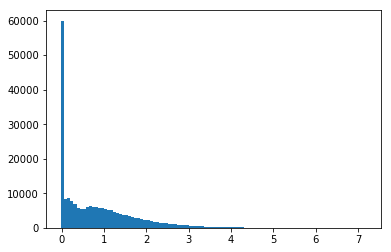

In [43]:
plt.hist(np.array(lst).mean(0).reshape([-1]),bins=100);

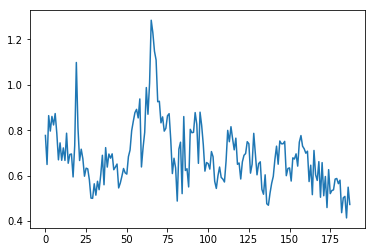

In [44]:
plt.plot(np.array(lst)[:,0,1200]);

In [45]:
for j in range(1680,1690):
    print j,np.nanmean(rawy[:,:,j],dtype=np.float),np.nanmean(y[:,:,j],dtype=np.float)

1680 1.68076379258 0.767920783369
1681 1.6817010969 0.767110917695
1682 1.62592518996 0.723749680765
1683 1.73977632686 0.821946088589
1684 1.71138398698 0.813116099178
1685 1.76363572066 0.845206885747
1686 1.69733310583 0.787718954939
1687 1.70009994492 0.789479112634
1688 nan 0.0
1689 nan 0.0


/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [46]:
for j in range(1680,1693):
    u=train_test[:,:,j]
    print j,np.nanmean(np.isnan(u),dtype=np.float),np.nanmean(u,dtype=np.float)

1680

 0.214168799558

 1.44372269188
1681

 0.214307312055

 1.45931544137
1682

 0.214909665763

 1.51048302947
1683

 0.214245709124

 1.53178569067
1684

 0.213926026297

 1.48184660123
1685

 0.215541127171

 1.47028653918
1686

 0.21783436214

 1.44358885612
1687

 0.218933428686

 1.38949529885
1688

 0.218410242899

 1.42089818029
1689

 0.219602403894

 1.40597877003
1690

 0.219217730603

 1.42916971669
1691

 0.219514202549

 1.43175472269
1692

 0.219279960855

 1.43727345125


In [47]:
np.mean(y[:,0,1688],dtype=np.float),np.mean(y[:,0,1686],dtype=np.float),np.mean(y[:,0,1687],dtype=np.float)

(0.0, 0.13274016203703703, 0.14341001157407407)

(54, 4100) 0.849059


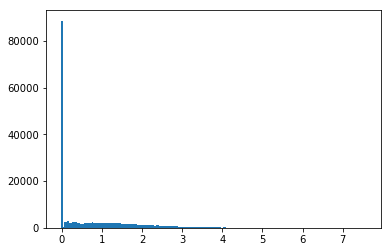

In [48]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1187]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.819318


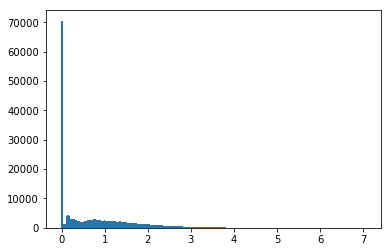

In [49]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1687]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.860932


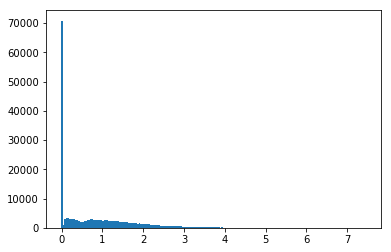

In [50]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.837057


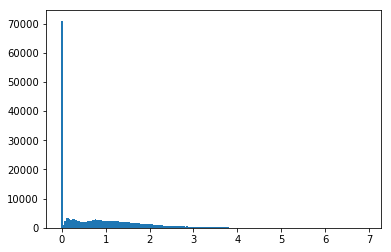

In [51]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1689]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

In [52]:
np.mean(isnan(train_test[:,:,1688]),dtype=np.float)

0.21841024289872529

In [53]:
np.mean(isnan(train_test[:,:,1687]),dtype=np.float)

0.21893342868613871

In [54]:
np.mean(isnan(train_test[:,:,1689]),dtype=np.float)

0.21960240389440933

(54, 4100) 0.860932


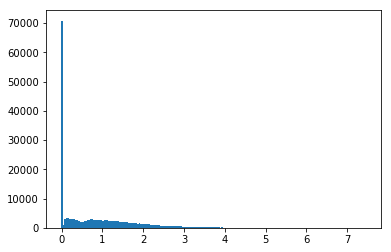

In [55]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);
pickle.dump(yy_pred3,open(a.name+".alt.pred",'wb'))

In [56]:
c=np.arange(60).reshape([3,4,5])

In [57]:
(c.reshape([-1,5]).reshape([3,4,5])==c).all()

True